#### Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.models as models
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import train
import util

'''Set parameters'''
torch.manual_seed(1) # set the random seed
use_cuda = True # Use cuda
batch_size = 16
num_workers = 0

'''Check GPU'''
print(torch.cuda.get_device_name(torch.cuda.current_device()))

GeForce RTX 2060


#### Visualize some data from the training set
- Also check if they have been normalized

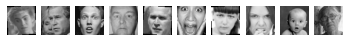

In [2]:
#load tensors
master_path = '../ProcessedData/cutoff12000/'
dataset = torchvision.datasets.DatasetFolder(master_path + 'train', loader=torch.load, extensions=('.tensor'))
# Prepare Dataloader
train_loader = torch.utils.data.DataLoader(dataset, batch_size=1, num_workers=num_workers, shuffle=True)

# Verification Step - obtain one batch of imgs
dataiter = iter(train_loader)

# Visualize 5 images
fig = plt.figure()
for i in range(10):
    imgs, labels = dataiter.next()
    for img in imgs:
        img_np = np.asarray((img.transpose(0,1)).transpose(1,2))
        plt.subplot(1, 10, i+1)    
        plt.imshow(img_np)
        plt.axis('off')

#### Load data

In [3]:
#load tensors
master_path = '../ProcessedData/cutoff12000/'

train_dataset = torchvision.datasets.DatasetFolder(master_path + 'train', loader=torch.load, extensions=('.tensor'))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)

val_dataset = torchvision.datasets.DatasetFolder(master_path + 'validate', loader=torch.load, extensions=('.tensor'))
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)

test_dataset = torchvision.datasets.DatasetFolder(master_path + 'test', loader=torch.load, extensions=('.tensor'))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)

In [4]:
print(train_dataset)
print(val_dataset)
print(test_dataset)

Dataset DatasetFolder
    Number of datapoints: 72000
    Root location: ../ProcessedData/cutoff12000/train
Dataset DatasetFolder
    Number of datapoints: 7322
    Root location: ../ProcessedData/cutoff12000/validate
Dataset DatasetFolder
    Number of datapoints: 7324
    Root location: ../ProcessedData/cutoff12000/test


#### Train our NN

Iteration:  1 Train acc:   0.31  Train loss:  0.11106037  Time Elapsed:   1.08 s 
Iteration:  2 Train acc:   0.19  Train loss:  0.11077602  Time Elapsed:   1.12 s 
Iteration:  3 Train acc:   0.12  Train loss:  0.11280206  Time Elapsed:   1.16 s 
Iteration:  4 Train acc:   0.12  Train loss:  0.11589325  Time Elapsed:   1.20 s 
Iteration:  5 Train acc:   0.06  Train loss:  0.11415900  Time Elapsed:   1.24 s 
Iteration:  6 Train acc:   0.19  Train loss:  0.11290816  Time Elapsed:   1.27 s 
Iteration:  7 Train acc:   0.12  Train loss:  0.11371597  Time Elapsed:   1.31 s 
Iteration:  8 Train acc:   0.12  Train loss:  0.11289342  Time Elapsed:   1.34 s 
Iteration:  9 Train acc:   0.12  Train loss:  0.11222729  Time Elapsed:   1.37 s 
Iteration:  10 Train acc:   0.12  Train loss:  0.11282808  Time Elapsed:   1.41 s 
Iteration:  11 Train acc:   0.19  Train loss:  0.11055284  Time Elapsed:   1.44 s 
Iteration:  12 Train acc:   0.31  Train loss:  0.10884096  Time Elapsed:   1.47 s 
Iteration:  1

Iteration:  103 Train acc:   0.25  Train loss:  0.11299816  Time Elapsed:   4.52 s 
Iteration:  104 Train acc:   0.25  Train loss:  0.11305743  Time Elapsed:   4.56 s 
Iteration:  105 Train acc:   0.25  Train loss:  0.11072750  Time Elapsed:   4.59 s 
Iteration:  106 Train acc:   0.19  Train loss:  0.11175776  Time Elapsed:   4.63 s 
Iteration:  107 Train acc:   0.06  Train loss:  0.11301308  Time Elapsed:   4.66 s 
Iteration:  108 Train acc:   0.31  Train loss:  0.11079101  Time Elapsed:   4.69 s 
Iteration:  109 Train acc:   0.12  Train loss:  0.11190429  Time Elapsed:   4.72 s 
Iteration:  110 Train acc:   0.06  Train loss:  0.11615638  Time Elapsed:   4.76 s 
Iteration:  111 Train acc:   0.25  Train loss:  0.11434724  Time Elapsed:   4.79 s 
Iteration:  112 Train acc:   0.19  Train loss:  0.11475113  Time Elapsed:   4.83 s 
Iteration:  113 Train acc:   0.25  Train loss:  0.11121641  Time Elapsed:   4.86 s 
Iteration:  114 Train acc:   0.25  Train loss:  0.11071388  Time Elapsed:   

Iteration:  206 Train acc:   0.25  Train loss:  0.10976885  Time Elapsed:   8.01 s 
Iteration:  207 Train acc:   0.19  Train loss:  0.11035520  Time Elapsed:   8.05 s 
Iteration:  208 Train acc:   0.25  Train loss:  0.11276117  Time Elapsed:   8.08 s 
Iteration:  209 Train acc:   0.19  Train loss:  0.11264347  Time Elapsed:   8.11 s 
Iteration:  210 Train acc:   0.19  Train loss:  0.11009592  Time Elapsed:   8.15 s 
Iteration:  211 Train acc:   0.38  Train loss:  0.11213845  Time Elapsed:   8.18 s 
Iteration:  212 Train acc:   0.12  Train loss:  0.11376023  Time Elapsed:   8.22 s 
Iteration:  213 Train acc:   0.25  Train loss:  0.11216167  Time Elapsed:   8.25 s 
Iteration:  214 Train acc:   0.19  Train loss:  0.11120689  Time Elapsed:   8.29 s 
Iteration:  215 Train acc:   0.06  Train loss:  0.11673812  Time Elapsed:   8.32 s 
Iteration:  216 Train acc:   0.12  Train loss:  0.11401764  Time Elapsed:   8.35 s 
Iteration:  217 Train acc:   0.00  Train loss:  0.11234567  Time Elapsed:   

Iteration:  308 Train acc:   0.31  Train loss:  0.11086444  Time Elapsed:  11.51 s 
Iteration:  309 Train acc:   0.25  Train loss:  0.10891312  Time Elapsed:  11.54 s 
Iteration:  310 Train acc:   0.19  Train loss:  0.11008567  Time Elapsed:  11.58 s 
Iteration:  311 Train acc:   0.25  Train loss:  0.10842542  Time Elapsed:  11.61 s 
Iteration:  312 Train acc:   0.12  Train loss:  0.11125741  Time Elapsed:  11.64 s 
Iteration:  313 Train acc:   0.25  Train loss:  0.11258543  Time Elapsed:  11.68 s 
Iteration:  314 Train acc:   0.12  Train loss:  0.11245952  Time Elapsed:  11.71 s 
Iteration:  315 Train acc:   0.12  Train loss:  0.11381915  Time Elapsed:  11.74 s 
Iteration:  316 Train acc:   0.06  Train loss:  0.11494238  Time Elapsed:  11.78 s 
Iteration:  317 Train acc:   0.12  Train loss:  0.11342993  Time Elapsed:  11.81 s 
Iteration:  318 Train acc:   0.12  Train loss:  0.11189219  Time Elapsed:  11.84 s 
Iteration:  319 Train acc:   0.25  Train loss:  0.11203882  Time Elapsed:  1

Iteration:  410 Train acc:   0.25  Train loss:  0.11038556  Time Elapsed:  14.96 s 
Iteration:  411 Train acc:   0.25  Train loss:  0.11205571  Time Elapsed:  14.99 s 
Iteration:  412 Train acc:   0.12  Train loss:  0.11287238  Time Elapsed:  15.03 s 
Iteration:  413 Train acc:   0.19  Train loss:  0.11157256  Time Elapsed:  15.07 s 
Iteration:  414 Train acc:   0.19  Train loss:  0.11083397  Time Elapsed:  15.10 s 
Iteration:  415 Train acc:   0.12  Train loss:  0.11287809  Time Elapsed:  15.14 s 
Iteration:  416 Train acc:   0.12  Train loss:  0.11328787  Time Elapsed:  15.17 s 
Iteration:  417 Train acc:   0.06  Train loss:  0.11140811  Time Elapsed:  15.21 s 
Iteration:  418 Train acc:   0.12  Train loss:  0.11268534  Time Elapsed:  15.24 s 
Iteration:  419 Train acc:   0.19  Train loss:  0.11012111  Time Elapsed:  15.28 s 
Iteration:  420 Train acc:   0.38  Train loss:  0.10968555  Time Elapsed:  15.31 s 
Iteration:  421 Train acc:   0.31  Train loss:  0.11236078  Time Elapsed:  1

Iteration:  508 Train acc:   0.38  Train loss:  0.10920553  Time Elapsed:  18.38 s 
Iteration:  509 Train acc:   0.12  Train loss:  0.11284698  Time Elapsed:  18.41 s 
Iteration:  510 Train acc:   0.12  Train loss:  0.11182883  Time Elapsed:  18.44 s 
Iteration:  511 Train acc:   0.19  Train loss:  0.11367426  Time Elapsed:  18.48 s 
Iteration:  512 Train acc:   0.19  Train loss:  0.11189278  Time Elapsed:  18.51 s 
Iteration:  513 Train acc:   0.25  Train loss:  0.11298736  Time Elapsed:  18.54 s 
Iteration:  514 Train acc:   0.31  Train loss:  0.10975745  Time Elapsed:  18.57 s 
Iteration:  515 Train acc:   0.19  Train loss:  0.11010219  Time Elapsed:  18.61 s 
Iteration:  516 Train acc:   0.31  Train loss:  0.11061916  Time Elapsed:  18.64 s 
Iteration:  517 Train acc:   0.19  Train loss:  0.11012378  Time Elapsed:  18.68 s 
Iteration:  518 Train acc:   0.12  Train loss:  0.11100686  Time Elapsed:  18.71 s 
Iteration:  519 Train acc:   0.19  Train loss:  0.11096060  Time Elapsed:  1

Iteration:  609 Train acc:   0.25  Train loss:  0.11388752  Time Elapsed:  21.81 s 
Iteration:  610 Train acc:   0.12  Train loss:  0.11262982  Time Elapsed:  21.84 s 
Iteration:  611 Train acc:   0.31  Train loss:  0.10905091  Time Elapsed:  21.88 s 
Iteration:  612 Train acc:   0.12  Train loss:  0.11216631  Time Elapsed:  21.91 s 
Iteration:  613 Train acc:   0.31  Train loss:  0.10836732  Time Elapsed:  21.95 s 
Iteration:  614 Train acc:   0.19  Train loss:  0.11191975  Time Elapsed:  21.98 s 
Iteration:  615 Train acc:   0.25  Train loss:  0.10996009  Time Elapsed:  22.01 s 
Iteration:  616 Train acc:   0.12  Train loss:  0.11384553  Time Elapsed:  22.05 s 
Iteration:  617 Train acc:   0.12  Train loss:  0.11345404  Time Elapsed:  22.09 s 
Iteration:  618 Train acc:   0.06  Train loss:  0.11336212  Time Elapsed:  22.12 s 
Iteration:  619 Train acc:   0.19  Train loss:  0.11160413  Time Elapsed:  22.16 s 
Iteration:  620 Train acc:   0.06  Train loss:  0.11126530  Time Elapsed:  2

Iteration:  711 Train acc:   0.31  Train loss:  0.10959885  Time Elapsed:  25.26 s 
Iteration:  712 Train acc:   0.25  Train loss:  0.11048151  Time Elapsed:  25.29 s 
Iteration:  713 Train acc:   0.12  Train loss:  0.11256935  Time Elapsed:  25.33 s 
Iteration:  714 Train acc:   0.12  Train loss:  0.11202513  Time Elapsed:  25.36 s 
Iteration:  715 Train acc:   0.19  Train loss:  0.11126919  Time Elapsed:  25.39 s 
Iteration:  716 Train acc:   0.19  Train loss:  0.11111139  Time Elapsed:  25.42 s 
Iteration:  717 Train acc:   0.31  Train loss:  0.11179223  Time Elapsed:  25.46 s 
Iteration:  718 Train acc:   0.25  Train loss:  0.11146299  Time Elapsed:  25.49 s 
Iteration:  719 Train acc:   0.19  Train loss:  0.11284995  Time Elapsed:  25.53 s 
Iteration:  720 Train acc:   0.00  Train loss:  0.11430116  Time Elapsed:  25.56 s 
Iteration:  721 Train acc:   0.12  Train loss:  0.11132058  Time Elapsed:  25.59 s 
Iteration:  722 Train acc:   0.19  Train loss:  0.11240686  Time Elapsed:  2

Iteration:  810 Train acc:   0.31  Train loss:  0.10955384  Time Elapsed:  28.55 s 
Iteration:  811 Train acc:   0.06  Train loss:  0.11237622  Time Elapsed:  28.59 s 
Iteration:  812 Train acc:   0.06  Train loss:  0.11342531  Time Elapsed:  28.62 s 
Iteration:  813 Train acc:   0.06  Train loss:  0.11355667  Time Elapsed:  28.65 s 
Iteration:  814 Train acc:   0.12  Train loss:  0.11164172  Time Elapsed:  28.68 s 
Iteration:  815 Train acc:   0.19  Train loss:  0.11331652  Time Elapsed:  28.72 s 
Iteration:  816 Train acc:   0.12  Train loss:  0.11412441  Time Elapsed:  28.75 s 
Iteration:  817 Train acc:   0.12  Train loss:  0.11209921  Time Elapsed:  28.79 s 
Iteration:  818 Train acc:   0.12  Train loss:  0.11264254  Time Elapsed:  28.82 s 
Iteration:  819 Train acc:   0.25  Train loss:  0.11118968  Time Elapsed:  28.85 s 
Iteration:  820 Train acc:   0.06  Train loss:  0.11242322  Time Elapsed:  28.88 s 
Iteration:  821 Train acc:   0.12  Train loss:  0.11158550  Time Elapsed:  2

Iteration:  909 Train acc:   0.06  Train loss:  0.11101475  Time Elapsed:  31.85 s 
Iteration:  910 Train acc:   0.06  Train loss:  0.11222316  Time Elapsed:  31.89 s 
Iteration:  911 Train acc:   0.19  Train loss:  0.11119136  Time Elapsed:  31.92 s 
Iteration:  912 Train acc:   0.12  Train loss:  0.11504722  Time Elapsed:  31.95 s 
Iteration:  913 Train acc:   0.06  Train loss:  0.11483788  Time Elapsed:  31.98 s 
Iteration:  914 Train acc:   0.25  Train loss:  0.11010528  Time Elapsed:  32.02 s 
Iteration:  915 Train acc:   0.25  Train loss:  0.11056084  Time Elapsed:  32.05 s 
Iteration:  916 Train acc:   0.12  Train loss:  0.11363955  Time Elapsed:  32.08 s 
Iteration:  917 Train acc:   0.19  Train loss:  0.11330539  Time Elapsed:  32.12 s 
Iteration:  918 Train acc:   0.19  Train loss:  0.11274032  Time Elapsed:  32.15 s 
Iteration:  919 Train acc:   0.25  Train loss:  0.10864554  Time Elapsed:  32.18 s 
Iteration:  920 Train acc:   0.19  Train loss:  0.10958579  Time Elapsed:  3

Iteration:  1012 Train acc:   0.25  Train loss:  0.11037373  Time Elapsed:  35.28 s 
Iteration:  1013 Train acc:   0.19  Train loss:  0.11231430  Time Elapsed:  35.32 s 
Iteration:  1014 Train acc:   0.06  Train loss:  0.11056767  Time Elapsed:  35.35 s 
Iteration:  1015 Train acc:   0.25  Train loss:  0.11120063  Time Elapsed:  35.38 s 
Iteration:  1016 Train acc:   0.25  Train loss:  0.11020085  Time Elapsed:  35.42 s 
Iteration:  1017 Train acc:   0.12  Train loss:  0.11054718  Time Elapsed:  35.45 s 
Iteration:  1018 Train acc:   0.31  Train loss:  0.11148740  Time Elapsed:  35.48 s 
Iteration:  1019 Train acc:   0.12  Train loss:  0.11119577  Time Elapsed:  35.52 s 
Iteration:  1020 Train acc:   0.06  Train loss:  0.11269397  Time Elapsed:  35.55 s 
Iteration:  1021 Train acc:   0.38  Train loss:  0.10529900  Time Elapsed:  35.59 s 
Iteration:  1022 Train acc:   0.25  Train loss:  0.10949335  Time Elapsed:  35.62 s 
Iteration:  1023 Train acc:   0.06  Train loss:  0.11098745  Time

Iteration:  1111 Train acc:   0.25  Train loss:  0.11212055  Time Elapsed:  38.58 s 
Iteration:  1112 Train acc:   0.31  Train loss:  0.11139110  Time Elapsed:  38.62 s 
Iteration:  1113 Train acc:   0.19  Train loss:  0.11070556  Time Elapsed:  38.65 s 
Iteration:  1114 Train acc:   0.25  Train loss:  0.10780998  Time Elapsed:  38.68 s 
Iteration:  1115 Train acc:   0.19  Train loss:  0.11248279  Time Elapsed:  38.72 s 
Iteration:  1116 Train acc:   0.31  Train loss:  0.10983395  Time Elapsed:  38.75 s 
Iteration:  1117 Train acc:   0.06  Train loss:  0.11057287  Time Elapsed:  38.78 s 
Iteration:  1118 Train acc:   0.25  Train loss:  0.11033343  Time Elapsed:  38.82 s 
Iteration:  1119 Train acc:   0.25  Train loss:  0.11098436  Time Elapsed:  38.85 s 
Iteration:  1120 Train acc:   0.19  Train loss:  0.10980535  Time Elapsed:  38.88 s 
Iteration:  1121 Train acc:   0.12  Train loss:  0.11355067  Time Elapsed:  38.92 s 
Iteration:  1122 Train acc:   0.12  Train loss:  0.11081247  Time

Iteration:  1209 Train acc:   0.25  Train loss:  0.11063132  Time Elapsed:  41.84 s 
Iteration:  1210 Train acc:   0.31  Train loss:  0.10894263  Time Elapsed:  41.88 s 
Iteration:  1211 Train acc:   0.25  Train loss:  0.11054051  Time Elapsed:  41.91 s 
Iteration:  1212 Train acc:   0.06  Train loss:  0.11726017  Time Elapsed:  41.94 s 
Iteration:  1213 Train acc:   0.19  Train loss:  0.10922160  Time Elapsed:  41.98 s 
Iteration:  1214 Train acc:   0.19  Train loss:  0.10997560  Time Elapsed:  42.01 s 
Iteration:  1215 Train acc:   0.25  Train loss:  0.11093033  Time Elapsed:  42.04 s 
Iteration:  1216 Train acc:   0.31  Train loss:  0.10745209  Time Elapsed:  42.08 s 
Iteration:  1217 Train acc:   0.19  Train loss:  0.11241783  Time Elapsed:  42.11 s 
Iteration:  1218 Train acc:   0.19  Train loss:  0.11075919  Time Elapsed:  42.14 s 
Iteration:  1219 Train acc:   0.38  Train loss:  0.10974905  Time Elapsed:  42.18 s 
Iteration:  1220 Train acc:   0.12  Train loss:  0.11279785  Time

Iteration:  1307 Train acc:   0.31  Train loss:  0.10849813  Time Elapsed:  45.10 s 
Iteration:  1308 Train acc:   0.19  Train loss:  0.10869765  Time Elapsed:  45.13 s 
Iteration:  1309 Train acc:   0.25  Train loss:  0.10902581  Time Elapsed:  45.17 s 
Iteration:  1310 Train acc:   0.19  Train loss:  0.10817639  Time Elapsed:  45.20 s 
Iteration:  1311 Train acc:   0.38  Train loss:  0.11085248  Time Elapsed:  45.23 s 
Iteration:  1312 Train acc:   0.31  Train loss:  0.11005821  Time Elapsed:  45.27 s 
Iteration:  1313 Train acc:   0.00  Train loss:  0.11352138  Time Elapsed:  45.30 s 
Iteration:  1314 Train acc:   0.25  Train loss:  0.10911237  Time Elapsed:  45.33 s 
Iteration:  1315 Train acc:   0.31  Train loss:  0.10860393  Time Elapsed:  45.37 s 
Iteration:  1316 Train acc:   0.25  Train loss:  0.11098664  Time Elapsed:  45.40 s 
Iteration:  1317 Train acc:   0.12  Train loss:  0.11530721  Time Elapsed:  45.43 s 
Iteration:  1318 Train acc:   0.12  Train loss:  0.10669309  Time

Iteration:  1409 Train acc:   0.12  Train loss:  0.11248237  Time Elapsed:  48.50 s 
Iteration:  1410 Train acc:   0.25  Train loss:  0.11236300  Time Elapsed:  48.54 s 
Iteration:  1411 Train acc:   0.12  Train loss:  0.11147414  Time Elapsed:  48.57 s 
Iteration:  1412 Train acc:   0.25  Train loss:  0.11215165  Time Elapsed:  48.60 s 
Iteration:  1413 Train acc:   0.19  Train loss:  0.11137326  Time Elapsed:  48.64 s 
Iteration:  1414 Train acc:   0.25  Train loss:  0.10871033  Time Elapsed:  48.67 s 
Iteration:  1415 Train acc:   0.19  Train loss:  0.10864463  Time Elapsed:  48.70 s 
Iteration:  1416 Train acc:   0.25  Train loss:  0.11042380  Time Elapsed:  48.74 s 
Iteration:  1417 Train acc:   0.38  Train loss:  0.10546888  Time Elapsed:  48.77 s 
Iteration:  1418 Train acc:   0.25  Train loss:  0.10742683  Time Elapsed:  48.80 s 
Iteration:  1419 Train acc:   0.19  Train loss:  0.11054744  Time Elapsed:  48.84 s 
Iteration:  1420 Train acc:   0.19  Train loss:  0.11209309  Time

Iteration:  1507 Train acc:   0.25  Train loss:  0.10713778  Time Elapsed:  51.77 s 
Iteration:  1508 Train acc:   0.12  Train loss:  0.11432578  Time Elapsed:  51.80 s 
Iteration:  1509 Train acc:   0.19  Train loss:  0.10985382  Time Elapsed:  51.83 s 
Iteration:  1510 Train acc:   0.12  Train loss:  0.11025856  Time Elapsed:  51.87 s 
Iteration:  1511 Train acc:   0.38  Train loss:  0.11069588  Time Elapsed:  51.90 s 
Iteration:  1512 Train acc:   0.12  Train loss:  0.11071405  Time Elapsed:  51.93 s 
Iteration:  1513 Train acc:   0.31  Train loss:  0.10697366  Time Elapsed:  51.97 s 
Iteration:  1514 Train acc:   0.25  Train loss:  0.10990855  Time Elapsed:  52.00 s 
Iteration:  1515 Train acc:   0.19  Train loss:  0.11225604  Time Elapsed:  52.03 s 
Iteration:  1516 Train acc:   0.06  Train loss:  0.11243212  Time Elapsed:  52.07 s 
Iteration:  1517 Train acc:   0.12  Train loss:  0.10898384  Time Elapsed:  52.10 s 
Iteration:  1518 Train acc:   0.31  Train loss:  0.11059058  Time

Iteration:  1606 Train acc:   0.25  Train loss:  0.10613216  Time Elapsed:  55.06 s 
Iteration:  1607 Train acc:   0.38  Train loss:  0.10564942  Time Elapsed:  55.09 s 
Iteration:  1608 Train acc:   0.25  Train loss:  0.10806134  Time Elapsed:  55.12 s 
Iteration:  1609 Train acc:   0.25  Train loss:  0.10647723  Time Elapsed:  55.16 s 
Iteration:  1610 Train acc:   0.25  Train loss:  0.11222914  Time Elapsed:  55.19 s 
Iteration:  1611 Train acc:   0.19  Train loss:  0.11055077  Time Elapsed:  55.22 s 
Iteration:  1612 Train acc:   0.19  Train loss:  0.11265965  Time Elapsed:  55.26 s 
Iteration:  1613 Train acc:   0.00  Train loss:  0.11011156  Time Elapsed:  55.29 s 
Iteration:  1614 Train acc:   0.19  Train loss:  0.10980298  Time Elapsed:  55.32 s 
Iteration:  1615 Train acc:   0.19  Train loss:  0.10746496  Time Elapsed:  55.36 s 
Iteration:  1616 Train acc:   0.12  Train loss:  0.11620875  Time Elapsed:  55.39 s 
Iteration:  1617 Train acc:   0.25  Train loss:  0.10866050  Time

Iteration:  1708 Train acc:   0.25  Train loss:  0.10947929  Time Elapsed:  58.47 s 
Iteration:  1709 Train acc:   0.19  Train loss:  0.10882467  Time Elapsed:  58.51 s 
Iteration:  1710 Train acc:   0.19  Train loss:  0.10899384  Time Elapsed:  58.54 s 
Iteration:  1711 Train acc:   0.31  Train loss:  0.10670380  Time Elapsed:  58.57 s 
Iteration:  1712 Train acc:   0.38  Train loss:  0.10728689  Time Elapsed:  58.61 s 
Iteration:  1713 Train acc:   0.31  Train loss:  0.10992894  Time Elapsed:  58.64 s 
Iteration:  1714 Train acc:   0.19  Train loss:  0.10788821  Time Elapsed:  58.67 s 
Iteration:  1715 Train acc:   0.31  Train loss:  0.10467182  Time Elapsed:  58.71 s 
Iteration:  1716 Train acc:   0.31  Train loss:  0.10642539  Time Elapsed:  58.74 s 
Iteration:  1717 Train acc:   0.31  Train loss:  0.10890289  Time Elapsed:  58.77 s 
Iteration:  1718 Train acc:   0.38  Train loss:  0.10710683  Time Elapsed:  58.81 s 
Iteration:  1719 Train acc:   0.31  Train loss:  0.10890315  Time

Iteration:  1807 Train acc:   0.38  Train loss:  0.10854228  Time Elapsed:  61.77 s 
Iteration:  1808 Train acc:   0.12  Train loss:  0.11131942  Time Elapsed:  61.80 s 
Iteration:  1809 Train acc:   0.25  Train loss:  0.10769072  Time Elapsed:  61.83 s 
Iteration:  1810 Train acc:   0.31  Train loss:  0.11115909  Time Elapsed:  61.87 s 
Iteration:  1811 Train acc:   0.12  Train loss:  0.11500061  Time Elapsed:  61.90 s 
Iteration:  1812 Train acc:   0.06  Train loss:  0.10928752  Time Elapsed:  61.93 s 
Iteration:  1813 Train acc:   0.25  Train loss:  0.10813132  Time Elapsed:  61.97 s 
Iteration:  1814 Train acc:   0.19  Train loss:  0.10912272  Time Elapsed:  62.00 s 
Iteration:  1815 Train acc:   0.56  Train loss:  0.10545412  Time Elapsed:  62.04 s 
Iteration:  1816 Train acc:   0.06  Train loss:  0.11321022  Time Elapsed:  62.07 s 
Iteration:  1817 Train acc:   0.19  Train loss:  0.11026004  Time Elapsed:  62.10 s 
Iteration:  1818 Train acc:   0.25  Train loss:  0.11235512  Time

Iteration:  1904 Train acc:   0.31  Train loss:  0.10601308  Time Elapsed:  65.00 s 
Iteration:  1905 Train acc:   0.25  Train loss:  0.10983394  Time Elapsed:  65.03 s 
Iteration:  1906 Train acc:   0.12  Train loss:  0.11181259  Time Elapsed:  65.07 s 
Iteration:  1907 Train acc:   0.25  Train loss:  0.11124165  Time Elapsed:  65.10 s 
Iteration:  1908 Train acc:   0.12  Train loss:  0.10750913  Time Elapsed:  65.13 s 
Iteration:  1909 Train acc:   0.25  Train loss:  0.10804205  Time Elapsed:  65.17 s 
Iteration:  1910 Train acc:   0.25  Train loss:  0.10892300  Time Elapsed:  65.20 s 
Iteration:  1911 Train acc:   0.31  Train loss:  0.10546713  Time Elapsed:  65.23 s 
Iteration:  1912 Train acc:   0.25  Train loss:  0.10545586  Time Elapsed:  65.27 s 
Iteration:  1913 Train acc:   0.44  Train loss:  0.09859121  Time Elapsed:  65.30 s 
Iteration:  1914 Train acc:   0.31  Train loss:  0.10857549  Time Elapsed:  65.33 s 
Iteration:  1915 Train acc:   0.19  Train loss:  0.11295201  Time

Iteration:  2006 Train acc:   0.19  Train loss:  0.10576872  Time Elapsed:  68.40 s 
Iteration:  2007 Train acc:   0.25  Train loss:  0.10939182  Time Elapsed:  68.43 s 
Iteration:  2008 Train acc:   0.25  Train loss:  0.10898618  Time Elapsed:  68.47 s 
Iteration:  2009 Train acc:   0.38  Train loss:  0.10264981  Time Elapsed:  68.50 s 
Iteration:  2010 Train acc:   0.12  Train loss:  0.10862486  Time Elapsed:  68.53 s 
Iteration:  2011 Train acc:   0.31  Train loss:  0.10381442  Time Elapsed:  68.56 s 
Iteration:  2012 Train acc:   0.19  Train loss:  0.10926821  Time Elapsed:  68.60 s 
Iteration:  2013 Train acc:   0.31  Train loss:  0.10557246  Time Elapsed:  68.63 s 
Iteration:  2014 Train acc:   0.06  Train loss:  0.11178213  Time Elapsed:  68.67 s 
Iteration:  2015 Train acc:   0.19  Train loss:  0.10869941  Time Elapsed:  68.70 s 
Iteration:  2016 Train acc:   0.31  Train loss:  0.10491730  Time Elapsed:  68.73 s 
Iteration:  2017 Train acc:   0.19  Train loss:  0.11001205  Time

Iteration:  2104 Train acc:   0.19  Train loss:  0.11215152  Time Elapsed:  71.67 s 
Iteration:  2105 Train acc:   0.19  Train loss:  0.11035975  Time Elapsed:  71.70 s 
Iteration:  2106 Train acc:   0.38  Train loss:  0.09940726  Time Elapsed:  71.74 s 
Iteration:  2107 Train acc:   0.12  Train loss:  0.11126627  Time Elapsed:  71.77 s 
Iteration:  2108 Train acc:   0.19  Train loss:  0.11240039  Time Elapsed:  71.80 s 
Iteration:  2109 Train acc:   0.19  Train loss:  0.10479595  Time Elapsed:  71.84 s 
Iteration:  2110 Train acc:   0.31  Train loss:  0.10242946  Time Elapsed:  71.87 s 
Iteration:  2111 Train acc:   0.44  Train loss:  0.10739152  Time Elapsed:  71.90 s 
Iteration:  2112 Train acc:   0.31  Train loss:  0.11106926  Time Elapsed:  71.94 s 
Iteration:  2113 Train acc:   0.38  Train loss:  0.10460715  Time Elapsed:  71.97 s 
Iteration:  2114 Train acc:   0.44  Train loss:  0.10457870  Time Elapsed:  72.00 s 
Iteration:  2115 Train acc:   0.50  Train loss:  0.10112199  Time

Iteration:  2201 Train acc:   0.25  Train loss:  0.11201169  Time Elapsed:  74.90 s 
Iteration:  2202 Train acc:   0.19  Train loss:  0.10399110  Time Elapsed:  74.93 s 
Iteration:  2203 Train acc:   0.25  Train loss:  0.10855427  Time Elapsed:  74.97 s 
Iteration:  2204 Train acc:   0.19  Train loss:  0.10326960  Time Elapsed:  75.00 s 
Iteration:  2205 Train acc:   0.38  Train loss:  0.10036299  Time Elapsed:  75.03 s 
Iteration:  2206 Train acc:   0.38  Train loss:  0.10441703  Time Elapsed:  75.07 s 
Iteration:  2207 Train acc:   0.31  Train loss:  0.10190645  Time Elapsed:  75.10 s 
Iteration:  2208 Train acc:   0.38  Train loss:  0.11143471  Time Elapsed:  75.13 s 
Iteration:  2209 Train acc:   0.19  Train loss:  0.10522544  Time Elapsed:  75.17 s 
Iteration:  2210 Train acc:   0.25  Train loss:  0.10387139  Time Elapsed:  75.20 s 
Iteration:  2211 Train acc:   0.31  Train loss:  0.10165242  Time Elapsed:  75.23 s 
Iteration:  2212 Train acc:   0.31  Train loss:  0.10861298  Time

Iteration:  2298 Train acc:   0.12  Train loss:  0.10429944  Time Elapsed:  78.13 s 
Iteration:  2299 Train acc:   0.31  Train loss:  0.10739353  Time Elapsed:  78.16 s 
Iteration:  2300 Train acc:   0.12  Train loss:  0.11634322  Time Elapsed:  78.20 s 
Iteration:  2301 Train acc:   0.06  Train loss:  0.11570856  Time Elapsed:  78.23 s 
Iteration:  2302 Train acc:   0.25  Train loss:  0.10903565  Time Elapsed:  78.26 s 
Iteration:  2303 Train acc:   0.56  Train loss:  0.10332970  Time Elapsed:  78.30 s 
Iteration:  2304 Train acc:   0.38  Train loss:  0.11122959  Time Elapsed:  78.33 s 
Iteration:  2305 Train acc:   0.25  Train loss:  0.10311393  Time Elapsed:  78.37 s 
Iteration:  2306 Train acc:   0.44  Train loss:  0.10178614  Time Elapsed:  78.40 s 
Iteration:  2307 Train acc:   0.19  Train loss:  0.10623136  Time Elapsed:  78.43 s 
Iteration:  2308 Train acc:   0.38  Train loss:  0.09758264  Time Elapsed:  78.46 s 
Iteration:  2309 Train acc:   0.25  Train loss:  0.10585143  Time

Iteration:  2400 Train acc:   0.38  Train loss:  0.10303730  Time Elapsed:  81.53 s 
Iteration:  2401 Train acc:   0.38  Train loss:  0.10139796  Time Elapsed:  81.57 s 
Iteration:  2402 Train acc:   0.31  Train loss:  0.10124777  Time Elapsed:  81.60 s 
Iteration:  2403 Train acc:   0.12  Train loss:  0.11401051  Time Elapsed:  81.63 s 
Iteration:  2404 Train acc:   0.50  Train loss:  0.09930295  Time Elapsed:  81.67 s 
Iteration:  2405 Train acc:   0.25  Train loss:  0.10605008  Time Elapsed:  81.70 s 
Iteration:  2406 Train acc:   0.44  Train loss:  0.10367077  Time Elapsed:  81.73 s 
Iteration:  2407 Train acc:   0.62  Train loss:  0.09188107  Time Elapsed:  81.77 s 
Iteration:  2408 Train acc:   0.38  Train loss:  0.09919883  Time Elapsed:  81.80 s 
Iteration:  2409 Train acc:   0.19  Train loss:  0.10587794  Time Elapsed:  81.83 s 
Iteration:  2410 Train acc:   0.25  Train loss:  0.09891862  Time Elapsed:  81.87 s 
Iteration:  2411 Train acc:   0.31  Train loss:  0.10270730  Time

Iteration:  2498 Train acc:   0.31  Train loss:  0.09959175  Time Elapsed:  84.80 s 
Iteration:  2499 Train acc:   0.44  Train loss:  0.09772683  Time Elapsed:  84.83 s 
Iteration:  2500 Train acc:   0.38  Train loss:  0.09950049  Time Elapsed:  84.87 s 
Iteration:  2501 Train acc:   0.31  Train loss:  0.11242840  Time Elapsed:  84.90 s 
Iteration:  2502 Train acc:   0.06  Train loss:  0.11475194  Time Elapsed:  84.93 s 
Iteration:  2503 Train acc:   0.50  Train loss:  0.09222335  Time Elapsed:  84.97 s 
Iteration:  2504 Train acc:   0.25  Train loss:  0.10874606  Time Elapsed:  85.00 s 
Iteration:  2505 Train acc:   0.38  Train loss:  0.10354215  Time Elapsed:  85.04 s 
Iteration:  2506 Train acc:   0.44  Train loss:  0.09888290  Time Elapsed:  85.07 s 
Iteration:  2507 Train acc:   0.19  Train loss:  0.11107747  Time Elapsed:  85.10 s 
Iteration:  2508 Train acc:   0.25  Train loss:  0.11057584  Time Elapsed:  85.14 s 
Iteration:  2509 Train acc:   0.38  Train loss:  0.10698176  Time

Iteration:  2595 Train acc:   0.31  Train loss:  0.09740554  Time Elapsed:  88.03 s 
Iteration:  2596 Train acc:   0.31  Train loss:  0.10792756  Time Elapsed:  88.07 s 
Iteration:  2597 Train acc:   0.25  Train loss:  0.10526945  Time Elapsed:  88.10 s 
Iteration:  2598 Train acc:   0.06  Train loss:  0.10756543  Time Elapsed:  88.13 s 
Iteration:  2599 Train acc:   0.31  Train loss:  0.10133738  Time Elapsed:  88.17 s 
Iteration:  2600 Train acc:   0.25  Train loss:  0.12222196  Time Elapsed:  88.20 s 
Iteration:  2601 Train acc:   0.31  Train loss:  0.11373974  Time Elapsed:  88.23 s 
Iteration:  2602 Train acc:   0.19  Train loss:  0.10187542  Time Elapsed:  88.27 s 
Iteration:  2603 Train acc:   0.50  Train loss:  0.10092491  Time Elapsed:  88.30 s 
Iteration:  2604 Train acc:   0.38  Train loss:  0.09341788  Time Elapsed:  88.33 s 
Iteration:  2605 Train acc:   0.25  Train loss:  0.11419808  Time Elapsed:  88.37 s 
Iteration:  2606 Train acc:   0.44  Train loss:  0.10756737  Time

Iteration:  2692 Train acc:   0.38  Train loss:  0.09412183  Time Elapsed:  91.26 s 
Iteration:  2693 Train acc:   0.31  Train loss:  0.10166861  Time Elapsed:  91.30 s 
Iteration:  2694 Train acc:   0.31  Train loss:  0.10198703  Time Elapsed:  91.33 s 
Iteration:  2695 Train acc:   0.31  Train loss:  0.10154237  Time Elapsed:  91.36 s 
Iteration:  2696 Train acc:   0.38  Train loss:  0.10450398  Time Elapsed:  91.40 s 
Iteration:  2697 Train acc:   0.44  Train loss:  0.10113592  Time Elapsed:  91.43 s 
Iteration:  2698 Train acc:   0.31  Train loss:  0.10286908  Time Elapsed:  91.46 s 
Iteration:  2699 Train acc:   0.44  Train loss:  0.09840835  Time Elapsed:  91.50 s 
Iteration:  2700 Train acc:   0.31  Train loss:  0.10086235  Time Elapsed:  91.53 s 
Iteration:  2701 Train acc:   0.38  Train loss:  0.09589711  Time Elapsed:  91.57 s 
Iteration:  2702 Train acc:   0.56  Train loss:  0.09471377  Time Elapsed:  91.60 s 
Iteration:  2703 Train acc:   0.25  Train loss:  0.11497873  Time

Iteration:  2792 Train acc:   0.19  Train loss:  0.10820623  Time Elapsed:  94.60 s 
Iteration:  2793 Train acc:   0.25  Train loss:  0.10116752  Time Elapsed:  94.63 s 
Iteration:  2794 Train acc:   0.38  Train loss:  0.10107908  Time Elapsed:  94.67 s 
Iteration:  2795 Train acc:   0.31  Train loss:  0.10299132  Time Elapsed:  94.70 s 
Iteration:  2796 Train acc:   0.50  Train loss:  0.09729867  Time Elapsed:  94.73 s 
Iteration:  2797 Train acc:   0.19  Train loss:  0.10698928  Time Elapsed:  94.77 s 
Iteration:  2798 Train acc:   0.31  Train loss:  0.10675955  Time Elapsed:  94.80 s 
Iteration:  2799 Train acc:   0.31  Train loss:  0.10609515  Time Elapsed:  94.83 s 
Iteration:  2800 Train acc:   0.31  Train loss:  0.10129289  Time Elapsed:  94.87 s 
Iteration:  2801 Train acc:   0.25  Train loss:  0.10339133  Time Elapsed:  94.90 s 
Iteration:  2802 Train acc:   0.12  Train loss:  0.10366615  Time Elapsed:  94.93 s 
Iteration:  2803 Train acc:   0.38  Train loss:  0.09507641  Time

Iteration:  2890 Train acc:   0.25  Train loss:  0.10770524  Time Elapsed:  97.87 s 
Iteration:  2891 Train acc:   0.31  Train loss:  0.11424423  Time Elapsed:  97.90 s 
Iteration:  2892 Train acc:   0.25  Train loss:  0.09731536  Time Elapsed:  97.93 s 
Iteration:  2893 Train acc:   0.50  Train loss:  0.10107788  Time Elapsed:  97.97 s 
Iteration:  2894 Train acc:   0.25  Train loss:  0.10725400  Time Elapsed:  98.00 s 
Iteration:  2895 Train acc:   0.38  Train loss:  0.09601353  Time Elapsed:  98.03 s 
Iteration:  2896 Train acc:   0.25  Train loss:  0.10813114  Time Elapsed:  98.07 s 
Iteration:  2897 Train acc:   0.44  Train loss:  0.09910562  Time Elapsed:  98.10 s 
Iteration:  2898 Train acc:   0.25  Train loss:  0.10357457  Time Elapsed:  98.13 s 
Iteration:  2899 Train acc:   0.31  Train loss:  0.09508618  Time Elapsed:  98.17 s 
Iteration:  2900 Train acc:   0.25  Train loss:  0.10672350  Time Elapsed:  98.20 s 
Iteration:  2901 Train acc:   0.25  Train loss:  0.10299337  Time

Iteration:  2987 Train acc:   0.31  Train loss:  0.10238625  Time Elapsed:  101.10 s 
Iteration:  2988 Train acc:   0.38  Train loss:  0.10584827  Time Elapsed:  101.13 s 
Iteration:  2989 Train acc:   0.44  Train loss:  0.09402563  Time Elapsed:  101.17 s 
Iteration:  2990 Train acc:   0.25  Train loss:  0.10435043  Time Elapsed:  101.20 s 
Iteration:  2991 Train acc:   0.25  Train loss:  0.11265539  Time Elapsed:  101.23 s 
Iteration:  2992 Train acc:   0.31  Train loss:  0.10186416  Time Elapsed:  101.26 s 
Iteration:  2993 Train acc:   0.38  Train loss:  0.09627301  Time Elapsed:  101.30 s 
Iteration:  2994 Train acc:   0.12  Train loss:  0.11818626  Time Elapsed:  101.33 s 
Iteration:  2995 Train acc:   0.25  Train loss:  0.10350175  Time Elapsed:  101.37 s 
Iteration:  2996 Train acc:   0.38  Train loss:  0.10017502  Time Elapsed:  101.40 s 
Iteration:  2997 Train acc:   0.38  Train loss:  0.10329618  Time Elapsed:  101.43 s 
Iteration:  2998 Train acc:   0.38  Train loss:  0.109

Iteration:  3084 Train acc:   0.25  Train loss:  0.10841528  Time Elapsed:  104.33 s 
Iteration:  3085 Train acc:   0.38  Train loss:  0.09995305  Time Elapsed:  104.36 s 
Iteration:  3086 Train acc:   0.38  Train loss:  0.09957927  Time Elapsed:  104.39 s 
Iteration:  3087 Train acc:   0.50  Train loss:  0.09570424  Time Elapsed:  104.43 s 
Iteration:  3088 Train acc:   0.31  Train loss:  0.10140245  Time Elapsed:  104.46 s 
Iteration:  3089 Train acc:   0.31  Train loss:  0.09928650  Time Elapsed:  104.49 s 
Iteration:  3090 Train acc:   0.38  Train loss:  0.09500815  Time Elapsed:  104.53 s 
Iteration:  3091 Train acc:   0.31  Train loss:  0.10045451  Time Elapsed:  104.56 s 
Iteration:  3092 Train acc:   0.56  Train loss:  0.09262783  Time Elapsed:  104.59 s 
Iteration:  3093 Train acc:   0.44  Train loss:  0.09689239  Time Elapsed:  104.63 s 
Iteration:  3094 Train acc:   0.50  Train loss:  0.09432011  Time Elapsed:  104.66 s 
Iteration:  3095 Train acc:   0.50  Train loss:  0.089

Iteration:  3181 Train acc:   0.12  Train loss:  0.10985754  Time Elapsed:  107.55 s 
Iteration:  3182 Train acc:   0.50  Train loss:  0.10331488  Time Elapsed:  107.59 s 
Iteration:  3183 Train acc:   0.44  Train loss:  0.09765550  Time Elapsed:  107.62 s 
Iteration:  3184 Train acc:   0.31  Train loss:  0.09845801  Time Elapsed:  107.65 s 
Iteration:  3185 Train acc:   0.25  Train loss:  0.10107587  Time Elapsed:  107.69 s 
Iteration:  3186 Train acc:   0.44  Train loss:  0.09630527  Time Elapsed:  107.72 s 
Iteration:  3187 Train acc:   0.50  Train loss:  0.08676291  Time Elapsed:  107.75 s 
Iteration:  3188 Train acc:   0.19  Train loss:  0.10710512  Time Elapsed:  107.79 s 
Iteration:  3189 Train acc:   0.31  Train loss:  0.10001767  Time Elapsed:  107.82 s 
Iteration:  3190 Train acc:   0.19  Train loss:  0.10217457  Time Elapsed:  107.85 s 
Iteration:  3191 Train acc:   0.50  Train loss:  0.09194966  Time Elapsed:  107.89 s 
Iteration:  3192 Train acc:   0.38  Train loss:  0.099

Iteration:  3278 Train acc:   0.69  Train loss:  0.08722281  Time Elapsed:  110.78 s 
Iteration:  3279 Train acc:   0.50  Train loss:  0.10350110  Time Elapsed:  110.82 s 
Iteration:  3280 Train acc:   0.38  Train loss:  0.10345532  Time Elapsed:  110.85 s 
Iteration:  3281 Train acc:   0.19  Train loss:  0.11599200  Time Elapsed:  110.88 s 
Iteration:  3282 Train acc:   0.12  Train loss:  0.10049906  Time Elapsed:  110.92 s 
Iteration:  3283 Train acc:   0.44  Train loss:  0.10078745  Time Elapsed:  110.95 s 
Iteration:  3284 Train acc:   0.25  Train loss:  0.10109693  Time Elapsed:  110.98 s 
Iteration:  3285 Train acc:   0.44  Train loss:  0.09402729  Time Elapsed:  111.02 s 
Iteration:  3286 Train acc:   0.31  Train loss:  0.09539631  Time Elapsed:  111.05 s 
Iteration:  3287 Train acc:   0.38  Train loss:  0.11105920  Time Elapsed:  111.09 s 
Iteration:  3288 Train acc:   0.31  Train loss:  0.10598691  Time Elapsed:  111.12 s 
Iteration:  3289 Train acc:   0.44  Train loss:  0.089

Iteration:  3376 Train acc:   0.19  Train loss:  0.10076748  Time Elapsed:  114.05 s 
Iteration:  3377 Train acc:   0.31  Train loss:  0.10490824  Time Elapsed:  114.08 s 
Iteration:  3378 Train acc:   0.31  Train loss:  0.09757287  Time Elapsed:  114.12 s 
Iteration:  3379 Train acc:   0.31  Train loss:  0.09492442  Time Elapsed:  114.15 s 
Iteration:  3380 Train acc:   0.38  Train loss:  0.10287404  Time Elapsed:  114.18 s 
Iteration:  3381 Train acc:   0.38  Train loss:  0.09528579  Time Elapsed:  114.21 s 
Iteration:  3382 Train acc:   0.25  Train loss:  0.09659066  Time Elapsed:  114.25 s 
Iteration:  3383 Train acc:   0.25  Train loss:  0.10944532  Time Elapsed:  114.28 s 
Iteration:  3384 Train acc:   0.25  Train loss:  0.10634469  Time Elapsed:  114.32 s 
Iteration:  3385 Train acc:   0.38  Train loss:  0.10397773  Time Elapsed:  114.35 s 
Iteration:  3386 Train acc:   0.19  Train loss:  0.09923378  Time Elapsed:  114.38 s 
Iteration:  3387 Train acc:   0.06  Train loss:  0.129

Iteration:  3477 Train acc:   0.38  Train loss:  0.09655457  Time Elapsed:  117.41 s 
Iteration:  3478 Train acc:   0.50  Train loss:  0.09189102  Time Elapsed:  117.44 s 
Iteration:  3479 Train acc:   0.25  Train loss:  0.10392353  Time Elapsed:  117.48 s 
Iteration:  3480 Train acc:   0.50  Train loss:  0.10147017  Time Elapsed:  117.51 s 
Iteration:  3481 Train acc:   0.25  Train loss:  0.09709562  Time Elapsed:  117.54 s 
Iteration:  3482 Train acc:   0.44  Train loss:  0.08685698  Time Elapsed:  117.58 s 
Iteration:  3483 Train acc:   0.38  Train loss:  0.09970231  Time Elapsed:  117.61 s 
Iteration:  3484 Train acc:   0.25  Train loss:  0.09491184  Time Elapsed:  117.64 s 
Iteration:  3485 Train acc:   0.31  Train loss:  0.09419985  Time Elapsed:  117.68 s 
Iteration:  3486 Train acc:   0.38  Train loss:  0.09064360  Time Elapsed:  117.71 s 
Iteration:  3487 Train acc:   0.44  Train loss:  0.09410950  Time Elapsed:  117.74 s 
Iteration:  3488 Train acc:   0.38  Train loss:  0.097

Iteration:  3577 Train acc:   0.12  Train loss:  0.10386223  Time Elapsed:  120.75 s 
Iteration:  3578 Train acc:   0.31  Train loss:  0.10224316  Time Elapsed:  120.79 s 
Iteration:  3579 Train acc:   0.31  Train loss:  0.10243657  Time Elapsed:  120.82 s 
Iteration:  3580 Train acc:   0.31  Train loss:  0.09324405  Time Elapsed:  120.85 s 
Iteration:  3581 Train acc:   0.31  Train loss:  0.10619634  Time Elapsed:  120.88 s 
Iteration:  3582 Train acc:   0.44  Train loss:  0.10123823  Time Elapsed:  120.92 s 
Iteration:  3583 Train acc:   0.19  Train loss:  0.09923366  Time Elapsed:  120.95 s 
Iteration:  3584 Train acc:   0.19  Train loss:  0.10868113  Time Elapsed:  120.98 s 
Iteration:  3585 Train acc:   0.31  Train loss:  0.09285752  Time Elapsed:  121.02 s 
Iteration:  3586 Train acc:   0.62  Train loss:  0.08582490  Time Elapsed:  121.05 s 
Iteration:  3587 Train acc:   0.38  Train loss:  0.09409558  Time Elapsed:  121.08 s 
Iteration:  3588 Train acc:   0.56  Train loss:  0.093

Iteration:  3675 Train acc:   0.25  Train loss:  0.10275814  Time Elapsed:  124.02 s 
Iteration:  3676 Train acc:   0.56  Train loss:  0.09189612  Time Elapsed:  124.05 s 
Iteration:  3677 Train acc:   0.06  Train loss:  0.11559439  Time Elapsed:  124.08 s 
Iteration:  3678 Train acc:   0.25  Train loss:  0.10656080  Time Elapsed:  124.12 s 
Iteration:  3679 Train acc:   0.25  Train loss:  0.10899357  Time Elapsed:  124.15 s 
Iteration:  3680 Train acc:   0.31  Train loss:  0.09769673  Time Elapsed:  124.18 s 
Iteration:  3681 Train acc:   0.38  Train loss:  0.09166472  Time Elapsed:  124.22 s 
Iteration:  3682 Train acc:   0.38  Train loss:  0.09330806  Time Elapsed:  124.25 s 
Iteration:  3683 Train acc:   0.31  Train loss:  0.10412343  Time Elapsed:  124.28 s 
Iteration:  3684 Train acc:   0.56  Train loss:  0.08114071  Time Elapsed:  124.32 s 
Iteration:  3685 Train acc:   0.38  Train loss:  0.10279282  Time Elapsed:  124.35 s 
Iteration:  3686 Train acc:   0.38  Train loss:  0.098

Iteration:  3774 Train acc:   0.31  Train loss:  0.09213188  Time Elapsed:  127.31 s 
Iteration:  3775 Train acc:   0.50  Train loss:  0.10066323  Time Elapsed:  127.35 s 
Iteration:  3776 Train acc:   0.31  Train loss:  0.09864443  Time Elapsed:  127.38 s 
Iteration:  3777 Train acc:   0.56  Train loss:  0.08605085  Time Elapsed:  127.41 s 
Iteration:  3778 Train acc:   0.25  Train loss:  0.11347657  Time Elapsed:  127.45 s 
Iteration:  3779 Train acc:   0.31  Train loss:  0.09293505  Time Elapsed:  127.48 s 
Iteration:  3780 Train acc:   0.44  Train loss:  0.10442028  Time Elapsed:  127.51 s 
Iteration:  3781 Train acc:   0.31  Train loss:  0.09938549  Time Elapsed:  127.55 s 
Iteration:  3782 Train acc:   0.31  Train loss:  0.09358089  Time Elapsed:  127.58 s 
Iteration:  3783 Train acc:   0.38  Train loss:  0.09278941  Time Elapsed:  127.61 s 
Iteration:  3784 Train acc:   0.12  Train loss:  0.10516591  Time Elapsed:  127.65 s 
Iteration:  3785 Train acc:   0.38  Train loss:  0.099

Iteration:  3871 Train acc:   0.38  Train loss:  0.10860759  Time Elapsed:  130.54 s 
Iteration:  3872 Train acc:   0.19  Train loss:  0.11093297  Time Elapsed:  130.58 s 
Iteration:  3873 Train acc:   0.38  Train loss:  0.09075321  Time Elapsed:  130.61 s 
Iteration:  3874 Train acc:   0.31  Train loss:  0.09938964  Time Elapsed:  130.64 s 
Iteration:  3875 Train acc:   0.31  Train loss:  0.09769309  Time Elapsed:  130.68 s 
Iteration:  3876 Train acc:   0.38  Train loss:  0.09314844  Time Elapsed:  130.71 s 
Iteration:  3877 Train acc:   0.25  Train loss:  0.11461551  Time Elapsed:  130.74 s 
Iteration:  3878 Train acc:   0.38  Train loss:  0.09449601  Time Elapsed:  130.78 s 
Iteration:  3879 Train acc:   0.38  Train loss:  0.10378136  Time Elapsed:  130.81 s 
Iteration:  3880 Train acc:   0.31  Train loss:  0.10382263  Time Elapsed:  130.84 s 
Iteration:  3881 Train acc:   0.62  Train loss:  0.09724244  Time Elapsed:  130.88 s 
Iteration:  3882 Train acc:   0.19  Train loss:  0.095

Iteration:  3970 Train acc:   0.25  Train loss:  0.11845868  Time Elapsed:  133.84 s 
Iteration:  3971 Train acc:   0.44  Train loss:  0.08831477  Time Elapsed:  133.88 s 
Iteration:  3972 Train acc:   0.50  Train loss:  0.09170415  Time Elapsed:  133.91 s 
Iteration:  3973 Train acc:   0.06  Train loss:  0.12975763  Time Elapsed:  133.95 s 
Iteration:  3974 Train acc:   0.50  Train loss:  0.08903616  Time Elapsed:  133.98 s 
Iteration:  3975 Train acc:   0.25  Train loss:  0.09729238  Time Elapsed:  134.01 s 
Iteration:  3976 Train acc:   0.19  Train loss:  0.09924416  Time Elapsed:  134.04 s 
Iteration:  3977 Train acc:   0.12  Train loss:  0.11254147  Time Elapsed:  134.08 s 
Iteration:  3978 Train acc:   0.50  Train loss:  0.09114932  Time Elapsed:  134.11 s 
Iteration:  3979 Train acc:   0.25  Train loss:  0.10378068  Time Elapsed:  134.15 s 
Iteration:  3980 Train acc:   0.38  Train loss:  0.09502992  Time Elapsed:  134.18 s 
Iteration:  3981 Train acc:   0.38  Train loss:  0.105

Iteration:  4070 Train acc:   0.25  Train loss:  0.10662821  Time Elapsed:  137.17 s 
Iteration:  4071 Train acc:   0.44  Train loss:  0.09161430  Time Elapsed:  137.21 s 
Iteration:  4072 Train acc:   0.25  Train loss:  0.10140076  Time Elapsed:  137.24 s 
Iteration:  4073 Train acc:   0.31  Train loss:  0.09217609  Time Elapsed:  137.27 s 
Iteration:  4074 Train acc:   0.31  Train loss:  0.10571599  Time Elapsed:  137.30 s 
Iteration:  4075 Train acc:   0.50  Train loss:  0.08968246  Time Elapsed:  137.34 s 
Iteration:  4076 Train acc:   0.56  Train loss:  0.08950704  Time Elapsed:  137.37 s 
Iteration:  4077 Train acc:   0.25  Train loss:  0.10040689  Time Elapsed:  137.40 s 
Iteration:  4078 Train acc:   0.31  Train loss:  0.09765729  Time Elapsed:  137.44 s 
Iteration:  4079 Train acc:   0.50  Train loss:  0.09361453  Time Elapsed:  137.47 s 
Iteration:  4080 Train acc:   0.31  Train loss:  0.10331981  Time Elapsed:  137.50 s 
Iteration:  4081 Train acc:   0.44  Train loss:  0.104

Iteration:  4167 Train acc:   0.44  Train loss:  0.09726734  Time Elapsed:  140.40 s 
Iteration:  4168 Train acc:   0.31  Train loss:  0.09277402  Time Elapsed:  140.43 s 
Iteration:  4169 Train acc:   0.19  Train loss:  0.10252766  Time Elapsed:  140.47 s 
Iteration:  4170 Train acc:   0.38  Train loss:  0.09106440  Time Elapsed:  140.50 s 
Iteration:  4171 Train acc:   0.50  Train loss:  0.08397262  Time Elapsed:  140.53 s 
Iteration:  4172 Train acc:   0.50  Train loss:  0.08825910  Time Elapsed:  140.57 s 
Iteration:  4173 Train acc:   0.19  Train loss:  0.11297859  Time Elapsed:  140.60 s 
Iteration:  4174 Train acc:   0.69  Train loss:  0.08617596  Time Elapsed:  140.63 s 
Iteration:  4175 Train acc:   0.19  Train loss:  0.09892897  Time Elapsed:  140.67 s 
Iteration:  4176 Train acc:   0.12  Train loss:  0.11008921  Time Elapsed:  140.70 s 
Iteration:  4177 Train acc:   0.25  Train loss:  0.09330350  Time Elapsed:  140.73 s 
Iteration:  4178 Train acc:   0.56  Train loss:  0.083

Iteration:  4265 Train acc:   0.31  Train loss:  0.10043573  Time Elapsed:  143.67 s 
Iteration:  4266 Train acc:   0.50  Train loss:  0.09480564  Time Elapsed:  143.70 s 
Iteration:  4267 Train acc:   0.19  Train loss:  0.10665474  Time Elapsed:  143.73 s 
Iteration:  4268 Train acc:   0.31  Train loss:  0.09140050  Time Elapsed:  143.77 s 
Iteration:  4269 Train acc:   0.31  Train loss:  0.09224875  Time Elapsed:  143.80 s 
Iteration:  4270 Train acc:   0.44  Train loss:  0.08961472  Time Elapsed:  143.83 s 
Iteration:  4271 Train acc:   0.38  Train loss:  0.09513057  Time Elapsed:  143.86 s 
Iteration:  4272 Train acc:   0.38  Train loss:  0.08811188  Time Elapsed:  143.90 s 
Iteration:  4273 Train acc:   0.19  Train loss:  0.10840152  Time Elapsed:  143.93 s 
Iteration:  4274 Train acc:   0.19  Train loss:  0.10281440  Time Elapsed:  143.97 s 
Iteration:  4275 Train acc:   0.19  Train loss:  0.11263950  Time Elapsed:  144.00 s 
Iteration:  4276 Train acc:   0.31  Train loss:  0.101

Iteration:  4363 Train acc:   0.56  Train loss:  0.08424793  Time Elapsed:  146.93 s 
Iteration:  4364 Train acc:   0.12  Train loss:  0.10486997  Time Elapsed:  146.97 s 
Iteration:  4365 Train acc:   0.50  Train loss:  0.08094000  Time Elapsed:  147.00 s 
Iteration:  4366 Train acc:   0.38  Train loss:  0.08857314  Time Elapsed:  147.03 s 
Iteration:  4367 Train acc:   0.31  Train loss:  0.09202637  Time Elapsed:  147.07 s 
Iteration:  4368 Train acc:   0.25  Train loss:  0.09829722  Time Elapsed:  147.10 s 
Iteration:  4369 Train acc:   0.12  Train loss:  0.10934602  Time Elapsed:  147.13 s 
Iteration:  4370 Train acc:   0.25  Train loss:  0.09943350  Time Elapsed:  147.17 s 
Iteration:  4371 Train acc:   0.44  Train loss:  0.09163208  Time Elapsed:  147.20 s 
Iteration:  4372 Train acc:   0.50  Train loss:  0.09073203  Time Elapsed:  147.23 s 
Iteration:  4373 Train acc:   0.50  Train loss:  0.08502745  Time Elapsed:  147.27 s 
Iteration:  4374 Train acc:   0.19  Train loss:  0.105

Iteration:  4462 Train acc:   0.31  Train loss:  0.09737428  Time Elapsed:  150.23 s 
Iteration:  4463 Train acc:   0.12  Train loss:  0.12220220  Time Elapsed:  150.26 s 
Iteration:  4464 Train acc:   0.25  Train loss:  0.09332165  Time Elapsed:  150.30 s 
Iteration:  4465 Train acc:   0.50  Train loss:  0.08476723  Time Elapsed:  150.33 s 
Iteration:  4466 Train acc:   0.12  Train loss:  0.10780057  Time Elapsed:  150.36 s 
Iteration:  4467 Train acc:   0.25  Train loss:  0.10236669  Time Elapsed:  150.39 s 
Iteration:  4468 Train acc:   0.56  Train loss:  0.09682485  Time Elapsed:  150.43 s 
Iteration:  4469 Train acc:   0.19  Train loss:  0.09701750  Time Elapsed:  150.46 s 
Iteration:  4470 Train acc:   0.31  Train loss:  0.09297121  Time Elapsed:  150.49 s 
Iteration:  4471 Train acc:   0.31  Train loss:  0.09819964  Time Elapsed:  150.53 s 
Iteration:  4472 Train acc:   0.38  Train loss:  0.09492782  Time Elapsed:  150.56 s 
Iteration:  4473 Train acc:   0.25  Train loss:  0.098

Iteration:  4561 Train acc:   0.38  Train loss:  0.09251900  Time Elapsed:  163.00 s 
Iteration:  4562 Train acc:   0.38  Train loss:  0.09536200  Time Elapsed:  163.03 s 
Iteration:  4563 Train acc:   0.44  Train loss:  0.10109325  Time Elapsed:  163.07 s 
Iteration:  4564 Train acc:   0.31  Train loss:  0.10071193  Time Elapsed:  163.10 s 
Iteration:  4565 Train acc:   0.25  Train loss:  0.10156809  Time Elapsed:  163.13 s 
Iteration:  4566 Train acc:   0.62  Train loss:  0.08357325  Time Elapsed:  163.17 s 
Iteration:  4567 Train acc:   0.25  Train loss:  0.10017789  Time Elapsed:  163.20 s 
Iteration:  4568 Train acc:   0.38  Train loss:  0.09195830  Time Elapsed:  163.23 s 
Iteration:  4569 Train acc:   0.25  Train loss:  0.09662278  Time Elapsed:  163.27 s 
Iteration:  4570 Train acc:   0.44  Train loss:  0.09050910  Time Elapsed:  163.30 s 
Iteration:  4571 Train acc:   0.25  Train loss:  0.10080476  Time Elapsed:  163.33 s 
Iteration:  4572 Train acc:   0.50  Train loss:  0.083

Iteration:  4660 Train acc:   0.56  Train loss:  0.07505385  Time Elapsed:  166.30 s 
Iteration:  4661 Train acc:   0.44  Train loss:  0.10501654  Time Elapsed:  166.34 s 
Iteration:  4662 Train acc:   0.44  Train loss:  0.08858063  Time Elapsed:  166.37 s 
Iteration:  4663 Train acc:   0.31  Train loss:  0.09445723  Time Elapsed:  166.40 s 
Iteration:  4664 Train acc:   0.44  Train loss:  0.08300425  Time Elapsed:  166.44 s 
Iteration:  4665 Train acc:   0.25  Train loss:  0.10018063  Time Elapsed:  166.47 s 
Iteration:  4666 Train acc:   0.44  Train loss:  0.08778158  Time Elapsed:  166.50 s 
Iteration:  4667 Train acc:   0.25  Train loss:  0.09972773  Time Elapsed:  166.54 s 
Iteration:  4668 Train acc:   0.31  Train loss:  0.09185819  Time Elapsed:  166.57 s 
Iteration:  4669 Train acc:   0.31  Train loss:  0.09038949  Time Elapsed:  166.60 s 
Iteration:  4670 Train acc:   0.19  Train loss:  0.09192284  Time Elapsed:  166.64 s 
Iteration:  4671 Train acc:   0.31  Train loss:  0.108

Iteration:  4758 Train acc:   0.38  Train loss:  0.09453680  Time Elapsed:  169.57 s 
Iteration:  4759 Train acc:   0.25  Train loss:  0.10217285  Time Elapsed:  169.60 s 
Iteration:  4760 Train acc:   0.50  Train loss:  0.08580671  Time Elapsed:  169.64 s 
Iteration:  4761 Train acc:   0.38  Train loss:  0.09824087  Time Elapsed:  169.67 s 
Iteration:  4762 Train acc:   0.38  Train loss:  0.08500075  Time Elapsed:  169.70 s 
Iteration:  4763 Train acc:   0.31  Train loss:  0.09280483  Time Elapsed:  169.73 s 
Iteration:  4764 Train acc:   0.25  Train loss:  0.10803152  Time Elapsed:  169.77 s 
Iteration:  4765 Train acc:   0.56  Train loss:  0.08540997  Time Elapsed:  169.80 s 
Iteration:  4766 Train acc:   0.38  Train loss:  0.08434161  Time Elapsed:  169.84 s 
Iteration:  4767 Train acc:   0.38  Train loss:  0.09702978  Time Elapsed:  169.87 s 
Iteration:  4768 Train acc:   0.38  Train loss:  0.08759168  Time Elapsed:  169.90 s 
Iteration:  4769 Train acc:   0.44  Train loss:  0.089

Iteration:  4859 Train acc:   0.38  Train loss:  0.09583132  Time Elapsed:  172.93 s 
Iteration:  4860 Train acc:   0.44  Train loss:  0.09237701  Time Elapsed:  172.97 s 
Iteration:  4861 Train acc:   0.62  Train loss:  0.08883765  Time Elapsed:  173.00 s 
Iteration:  4862 Train acc:   0.62  Train loss:  0.08241212  Time Elapsed:  173.03 s 
Iteration:  4863 Train acc:   0.19  Train loss:  0.11124270  Time Elapsed:  173.07 s 
Iteration:  4864 Train acc:   0.44  Train loss:  0.09228554  Time Elapsed:  173.10 s 
Iteration:  4865 Train acc:   0.19  Train loss:  0.09641271  Time Elapsed:  173.13 s 
Iteration:  4866 Train acc:   0.38  Train loss:  0.10262221  Time Elapsed:  173.17 s 
Iteration:  4867 Train acc:   0.31  Train loss:  0.09867432  Time Elapsed:  173.20 s 
Iteration:  4868 Train acc:   0.44  Train loss:  0.09049946  Time Elapsed:  173.23 s 
Iteration:  4869 Train acc:   0.19  Train loss:  0.10474293  Time Elapsed:  173.27 s 
Iteration:  4870 Train acc:   0.44  Train loss:  0.093

Iteration:  4956 Train acc:   0.44  Train loss:  0.09408958  Time Elapsed:  176.17 s 
Iteration:  4957 Train acc:   0.44  Train loss:  0.08454576  Time Elapsed:  176.21 s 
Iteration:  4958 Train acc:   0.50  Train loss:  0.09104300  Time Elapsed:  176.24 s 
Iteration:  4959 Train acc:   0.31  Train loss:  0.09455532  Time Elapsed:  176.27 s 
Iteration:  4960 Train acc:   0.38  Train loss:  0.10075048  Time Elapsed:  176.31 s 
Iteration:  4961 Train acc:   0.50  Train loss:  0.09254332  Time Elapsed:  176.34 s 
Iteration:  4962 Train acc:   0.44  Train loss:  0.07562887  Time Elapsed:  176.37 s 
Iteration:  4963 Train acc:   0.62  Train loss:  0.08648653  Time Elapsed:  176.41 s 
Iteration:  4964 Train acc:   0.31  Train loss:  0.08915723  Time Elapsed:  176.44 s 
Iteration:  4965 Train acc:   0.50  Train loss:  0.07126529  Time Elapsed:  176.47 s 
Iteration:  4966 Train acc:   0.38  Train loss:  0.08755997  Time Elapsed:  176.51 s 
Iteration:  4967 Train acc:   0.38  Train loss:  0.091

Iteration:  5053 Train acc:   0.50  Train loss:  0.08088965  Time Elapsed:  179.41 s 
Iteration:  5054 Train acc:   0.56  Train loss:  0.09963394  Time Elapsed:  179.44 s 
Iteration:  5055 Train acc:   0.38  Train loss:  0.08383681  Time Elapsed:  179.48 s 
Iteration:  5056 Train acc:   0.44  Train loss:  0.07877415  Time Elapsed:  179.51 s 
Iteration:  5057 Train acc:   0.44  Train loss:  0.07829105  Time Elapsed:  179.54 s 
Iteration:  5058 Train acc:   0.38  Train loss:  0.08664113  Time Elapsed:  179.58 s 
Iteration:  5059 Train acc:   0.31  Train loss:  0.09234402  Time Elapsed:  179.61 s 
Iteration:  5060 Train acc:   0.62  Train loss:  0.07881041  Time Elapsed:  179.64 s 
Iteration:  5061 Train acc:   0.38  Train loss:  0.09321657  Time Elapsed:  179.68 s 
Iteration:  5062 Train acc:   0.50  Train loss:  0.07723572  Time Elapsed:  179.71 s 
Iteration:  5063 Train acc:   0.31  Train loss:  0.10031626  Time Elapsed:  179.74 s 
Iteration:  5064 Train acc:   0.12  Train loss:  0.114

Iteration:  5150 Train acc:   0.31  Train loss:  0.09618907  Time Elapsed:  182.64 s 
Iteration:  5151 Train acc:   0.44  Train loss:  0.09174336  Time Elapsed:  182.67 s 
Iteration:  5152 Train acc:   0.44  Train loss:  0.07985176  Time Elapsed:  182.70 s 
Iteration:  5153 Train acc:   0.38  Train loss:  0.09886788  Time Elapsed:  182.74 s 
Iteration:  5154 Train acc:   0.31  Train loss:  0.10571243  Time Elapsed:  182.77 s 
Iteration:  5155 Train acc:   0.44  Train loss:  0.10112381  Time Elapsed:  182.80 s 
Iteration:  5156 Train acc:   0.25  Train loss:  0.09823579  Time Elapsed:  182.84 s 
Iteration:  5157 Train acc:   0.38  Train loss:  0.09256375  Time Elapsed:  182.87 s 
Iteration:  5158 Train acc:   0.38  Train loss:  0.09482844  Time Elapsed:  182.90 s 
Iteration:  5159 Train acc:   0.31  Train loss:  0.10462295  Time Elapsed:  182.94 s 
Iteration:  5160 Train acc:   0.31  Train loss:  0.09045572  Time Elapsed:  182.97 s 
Iteration:  5161 Train acc:   0.25  Train loss:  0.102

Iteration:  5249 Train acc:   0.50  Train loss:  0.08747177  Time Elapsed:  185.93 s 
Iteration:  5250 Train acc:   0.50  Train loss:  0.08253738  Time Elapsed:  185.97 s 
Iteration:  5251 Train acc:   0.50  Train loss:  0.07454434  Time Elapsed:  186.00 s 
Iteration:  5252 Train acc:   0.31  Train loss:  0.09260074  Time Elapsed:  186.03 s 
Iteration:  5253 Train acc:   0.56  Train loss:  0.07873995  Time Elapsed:  186.07 s 
Iteration:  5254 Train acc:   0.56  Train loss:  0.07536528  Time Elapsed:  186.10 s 
Iteration:  5255 Train acc:   0.56  Train loss:  0.07983276  Time Elapsed:  186.13 s 
Iteration:  5256 Train acc:   0.19  Train loss:  0.09790321  Time Elapsed:  186.17 s 
Iteration:  5257 Train acc:   0.38  Train loss:  0.10160814  Time Elapsed:  186.20 s 
Iteration:  5258 Train acc:   0.38  Train loss:  0.08234659  Time Elapsed:  186.23 s 
Iteration:  5259 Train acc:   0.31  Train loss:  0.09854597  Time Elapsed:  186.27 s 
Iteration:  5260 Train acc:   0.50  Train loss:  0.086

Iteration:  5350 Train acc:   0.12  Train loss:  0.11037400  Time Elapsed:  189.30 s 
Iteration:  5351 Train acc:   0.38  Train loss:  0.08317371  Time Elapsed:  189.33 s 
Iteration:  5352 Train acc:   0.31  Train loss:  0.10829474  Time Elapsed:  189.37 s 
Iteration:  5353 Train acc:   0.31  Train loss:  0.09691311  Time Elapsed:  189.40 s 
Iteration:  5354 Train acc:   0.50  Train loss:  0.08993086  Time Elapsed:  189.43 s 
Iteration:  5355 Train acc:   0.38  Train loss:  0.09234211  Time Elapsed:  189.46 s 
Iteration:  5356 Train acc:   0.31  Train loss:  0.11015928  Time Elapsed:  189.50 s 
Iteration:  5357 Train acc:   0.44  Train loss:  0.08794393  Time Elapsed:  189.53 s 
Iteration:  5358 Train acc:   0.56  Train loss:  0.08421425  Time Elapsed:  189.56 s 
Iteration:  5359 Train acc:   0.44  Train loss:  0.09464326  Time Elapsed:  189.60 s 
Iteration:  5360 Train acc:   0.38  Train loss:  0.08056406  Time Elapsed:  189.63 s 
Iteration:  5361 Train acc:   0.50  Train loss:  0.081

Iteration:  5448 Train acc:   0.44  Train loss:  0.08826470  Time Elapsed:  192.57 s 
Iteration:  5449 Train acc:   0.50  Train loss:  0.08863449  Time Elapsed:  192.60 s 
Iteration:  5450 Train acc:   0.62  Train loss:  0.08288912  Time Elapsed:  192.64 s 
Iteration:  5451 Train acc:   0.38  Train loss:  0.08869281  Time Elapsed:  192.67 s 
Iteration:  5452 Train acc:   0.31  Train loss:  0.09707044  Time Elapsed:  192.70 s 
Iteration:  5453 Train acc:   0.38  Train loss:  0.09298842  Time Elapsed:  192.73 s 
Iteration:  5454 Train acc:   0.56  Train loss:  0.08223447  Time Elapsed:  192.77 s 
Iteration:  5455 Train acc:   0.31  Train loss:  0.10419888  Time Elapsed:  192.80 s 
Iteration:  5456 Train acc:   0.38  Train loss:  0.09516960  Time Elapsed:  192.84 s 
Iteration:  5457 Train acc:   0.50  Train loss:  0.09273719  Time Elapsed:  192.87 s 
Iteration:  5458 Train acc:   0.50  Train loss:  0.07629997  Time Elapsed:  192.90 s 
Iteration:  5459 Train acc:   0.44  Train loss:  0.086

Iteration:  5548 Train acc:   0.44  Train loss:  0.07858065  Time Elapsed:  195.90 s 
Iteration:  5549 Train acc:   0.38  Train loss:  0.09515597  Time Elapsed:  195.93 s 
Iteration:  5550 Train acc:   0.38  Train loss:  0.07821429  Time Elapsed:  195.97 s 
Iteration:  5551 Train acc:   0.25  Train loss:  0.10196202  Time Elapsed:  196.00 s 
Iteration:  5552 Train acc:   0.56  Train loss:  0.08089495  Time Elapsed:  196.03 s 
Iteration:  5553 Train acc:   0.38  Train loss:  0.09813580  Time Elapsed:  196.07 s 
Iteration:  5554 Train acc:   0.31  Train loss:  0.08555108  Time Elapsed:  196.10 s 
Iteration:  5555 Train acc:   0.31  Train loss:  0.11047372  Time Elapsed:  196.13 s 
Iteration:  5556 Train acc:   0.38  Train loss:  0.10511947  Time Elapsed:  196.17 s 
Iteration:  5557 Train acc:   0.38  Train loss:  0.09583589  Time Elapsed:  196.20 s 
Iteration:  5558 Train acc:   0.56  Train loss:  0.07555916  Time Elapsed:  196.23 s 
Iteration:  5559 Train acc:   0.38  Train loss:  0.094

Iteration:  5645 Train acc:   0.56  Train loss:  0.08847978  Time Elapsed:  199.13 s 
Iteration:  5646 Train acc:   0.25  Train loss:  0.09971765  Time Elapsed:  199.16 s 
Iteration:  5647 Train acc:   0.31  Train loss:  0.09685852  Time Elapsed:  199.20 s 
Iteration:  5648 Train acc:   0.50  Train loss:  0.10103816  Time Elapsed:  199.23 s 
Iteration:  5649 Train acc:   0.62  Train loss:  0.07104357  Time Elapsed:  199.27 s 
Iteration:  5650 Train acc:   0.38  Train loss:  0.08816616  Time Elapsed:  199.30 s 
Iteration:  5651 Train acc:   0.50  Train loss:  0.09374940  Time Elapsed:  199.33 s 
Iteration:  5652 Train acc:   0.38  Train loss:  0.08937058  Time Elapsed:  199.37 s 
Iteration:  5653 Train acc:   0.50  Train loss:  0.08941958  Time Elapsed:  199.40 s 
Iteration:  5654 Train acc:   0.62  Train loss:  0.09563896  Time Elapsed:  199.43 s 
Iteration:  5655 Train acc:   0.50  Train loss:  0.07899004  Time Elapsed:  199.47 s 
Iteration:  5656 Train acc:   0.25  Train loss:  0.101

Iteration:  5742 Train acc:   0.44  Train loss:  0.08031854  Time Elapsed:  202.37 s 
Iteration:  5743 Train acc:   0.44  Train loss:  0.10048688  Time Elapsed:  202.40 s 
Iteration:  5744 Train acc:   0.44  Train loss:  0.08942702  Time Elapsed:  202.43 s 
Iteration:  5745 Train acc:   0.31  Train loss:  0.11359450  Time Elapsed:  202.47 s 
Iteration:  5746 Train acc:   0.31  Train loss:  0.11737561  Time Elapsed:  202.50 s 
Iteration:  5747 Train acc:   0.56  Train loss:  0.07260846  Time Elapsed:  202.53 s 
Iteration:  5748 Train acc:   0.25  Train loss:  0.12534720  Time Elapsed:  202.57 s 
Iteration:  5749 Train acc:   0.56  Train loss:  0.07647789  Time Elapsed:  202.60 s 
Iteration:  5750 Train acc:   0.62  Train loss:  0.09614600  Time Elapsed:  202.64 s 
Iteration:  5751 Train acc:   0.75  Train loss:  0.07983193  Time Elapsed:  202.67 s 
Iteration:  5752 Train acc:   0.38  Train loss:  0.09161726  Time Elapsed:  202.70 s 
Iteration:  5753 Train acc:   0.44  Train loss:  0.089

Iteration:  5843 Train acc:   0.38  Train loss:  0.08226044  Time Elapsed:  205.73 s 
Iteration:  5844 Train acc:   0.62  Train loss:  0.09084016  Time Elapsed:  205.76 s 
Iteration:  5845 Train acc:   0.38  Train loss:  0.09021765  Time Elapsed:  205.80 s 
Iteration:  5846 Train acc:   0.31  Train loss:  0.10350443  Time Elapsed:  205.83 s 
Iteration:  5847 Train acc:   0.25  Train loss:  0.10697147  Time Elapsed:  205.87 s 
Iteration:  5848 Train acc:   0.19  Train loss:  0.10968565  Time Elapsed:  205.90 s 
Iteration:  5849 Train acc:   0.19  Train loss:  0.12652120  Time Elapsed:  205.93 s 
Iteration:  5850 Train acc:   0.19  Train loss:  0.10060542  Time Elapsed:  205.97 s 
Iteration:  5851 Train acc:   0.50  Train loss:  0.07918338  Time Elapsed:  206.00 s 
Iteration:  5852 Train acc:   0.50  Train loss:  0.09679930  Time Elapsed:  206.03 s 
Iteration:  5853 Train acc:   0.44  Train loss:  0.08734277  Time Elapsed:  206.07 s 
Iteration:  5854 Train acc:   0.31  Train loss:  0.096

Iteration:  5940 Train acc:   0.44  Train loss:  0.08191489  Time Elapsed:  208.97 s 
Iteration:  5941 Train acc:   0.31  Train loss:  0.09838820  Time Elapsed:  209.00 s 
Iteration:  5942 Train acc:   0.12  Train loss:  0.10231136  Time Elapsed:  209.03 s 
Iteration:  5943 Train acc:   0.38  Train loss:  0.08674286  Time Elapsed:  209.07 s 
Iteration:  5944 Train acc:   0.38  Train loss:  0.09376324  Time Elapsed:  209.10 s 
Iteration:  5945 Train acc:   0.56  Train loss:  0.07978426  Time Elapsed:  209.13 s 
Iteration:  5946 Train acc:   0.69  Train loss:  0.08089324  Time Elapsed:  209.17 s 
Iteration:  5947 Train acc:   0.50  Train loss:  0.08386922  Time Elapsed:  209.20 s 
Iteration:  5948 Train acc:   0.50  Train loss:  0.07392191  Time Elapsed:  209.23 s 
Iteration:  5949 Train acc:   0.38  Train loss:  0.09310392  Time Elapsed:  209.27 s 
Iteration:  5950 Train acc:   0.44  Train loss:  0.07918274  Time Elapsed:  209.30 s 
Iteration:  5951 Train acc:   0.38  Train loss:  0.083

Iteration:  6040 Train acc:   0.50  Train loss:  0.08439821  Time Elapsed:  212.30 s 
Iteration:  6041 Train acc:   0.19  Train loss:  0.10008214  Time Elapsed:  212.33 s 
Iteration:  6042 Train acc:   0.56  Train loss:  0.07374681  Time Elapsed:  212.37 s 
Iteration:  6043 Train acc:   0.50  Train loss:  0.08012206  Time Elapsed:  212.40 s 
Iteration:  6044 Train acc:   0.25  Train loss:  0.09832302  Time Elapsed:  212.43 s 
Iteration:  6045 Train acc:   0.38  Train loss:  0.09180502  Time Elapsed:  212.47 s 
Iteration:  6046 Train acc:   0.50  Train loss:  0.08515770  Time Elapsed:  212.50 s 
Iteration:  6047 Train acc:   0.62  Train loss:  0.08231076  Time Elapsed:  212.53 s 
Iteration:  6048 Train acc:   0.50  Train loss:  0.08513147  Time Elapsed:  212.57 s 
Iteration:  6049 Train acc:   0.44  Train loss:  0.08810489  Time Elapsed:  212.60 s 
Iteration:  6050 Train acc:   0.38  Train loss:  0.10760851  Time Elapsed:  212.63 s 
Iteration:  6051 Train acc:   0.50  Train loss:  0.089

Iteration:  6139 Train acc:   0.38  Train loss:  0.09333926  Time Elapsed:  215.60 s 
Iteration:  6140 Train acc:   0.38  Train loss:  0.10149601  Time Elapsed:  215.63 s 
Iteration:  6141 Train acc:   0.38  Train loss:  0.08671889  Time Elapsed:  215.67 s 
Iteration:  6142 Train acc:   0.56  Train loss:  0.07665274  Time Elapsed:  215.70 s 
Iteration:  6143 Train acc:   0.25  Train loss:  0.11520271  Time Elapsed:  215.73 s 
Iteration:  6144 Train acc:   0.44  Train loss:  0.08740057  Time Elapsed:  215.77 s 
Iteration:  6145 Train acc:   0.25  Train loss:  0.09617280  Time Elapsed:  215.80 s 
Iteration:  6146 Train acc:   0.56  Train loss:  0.08110482  Time Elapsed:  215.83 s 
Iteration:  6147 Train acc:   0.38  Train loss:  0.08983308  Time Elapsed:  215.87 s 
Iteration:  6148 Train acc:   0.31  Train loss:  0.10850023  Time Elapsed:  215.90 s 
Iteration:  6149 Train acc:   0.44  Train loss:  0.08585484  Time Elapsed:  215.93 s 
Iteration:  6150 Train acc:   0.44  Train loss:  0.084

Iteration:  6237 Train acc:   0.56  Train loss:  0.08507192  Time Elapsed:  218.87 s 
Iteration:  6238 Train acc:   0.62  Train loss:  0.08973496  Time Elapsed:  218.90 s 
Iteration:  6239 Train acc:   0.31  Train loss:  0.08660871  Time Elapsed:  218.93 s 
Iteration:  6240 Train acc:   0.38  Train loss:  0.10133332  Time Elapsed:  218.97 s 
Iteration:  6241 Train acc:   0.31  Train loss:  0.09247749  Time Elapsed:  219.00 s 
Iteration:  6242 Train acc:   0.50  Train loss:  0.08677895  Time Elapsed:  219.03 s 
Iteration:  6243 Train acc:   0.56  Train loss:  0.07828298  Time Elapsed:  219.07 s 
Iteration:  6244 Train acc:   0.44  Train loss:  0.07801042  Time Elapsed:  219.10 s 
Iteration:  6245 Train acc:   0.50  Train loss:  0.07748508  Time Elapsed:  219.13 s 
Iteration:  6246 Train acc:   0.44  Train loss:  0.07221234  Time Elapsed:  219.17 s 
Iteration:  6247 Train acc:   0.31  Train loss:  0.09901275  Time Elapsed:  219.20 s 
Iteration:  6248 Train acc:   0.62  Train loss:  0.086

Iteration:  6333 Train acc:   0.50  Train loss:  0.08365587  Time Elapsed:  222.07 s 
Iteration:  6334 Train acc:   0.50  Train loss:  0.08717417  Time Elapsed:  222.10 s 
Iteration:  6335 Train acc:   0.56  Train loss:  0.07775746  Time Elapsed:  222.13 s 
Iteration:  6336 Train acc:   0.31  Train loss:  0.08907391  Time Elapsed:  222.17 s 
Iteration:  6337 Train acc:   0.31  Train loss:  0.09108435  Time Elapsed:  222.20 s 
Iteration:  6338 Train acc:   0.56  Train loss:  0.09028836  Time Elapsed:  222.23 s 
Iteration:  6339 Train acc:   0.44  Train loss:  0.10201728  Time Elapsed:  222.27 s 
Iteration:  6340 Train acc:   0.44  Train loss:  0.09796637  Time Elapsed:  222.30 s 
Iteration:  6341 Train acc:   0.62  Train loss:  0.07403219  Time Elapsed:  222.33 s 
Iteration:  6342 Train acc:   0.50  Train loss:  0.07819573  Time Elapsed:  222.37 s 
Iteration:  6343 Train acc:   0.44  Train loss:  0.11129683  Time Elapsed:  222.40 s 
Iteration:  6344 Train acc:   0.38  Train loss:  0.087

Iteration:  6430 Train acc:   0.62  Train loss:  0.07296387  Time Elapsed:  225.30 s 
Iteration:  6431 Train acc:   0.31  Train loss:  0.09900377  Time Elapsed:  225.34 s 
Iteration:  6432 Train acc:   0.62  Train loss:  0.06104021  Time Elapsed:  225.37 s 
Iteration:  6433 Train acc:   0.50  Train loss:  0.08531886  Time Elapsed:  225.40 s 
Iteration:  6434 Train acc:   0.25  Train loss:  0.09423190  Time Elapsed:  225.43 s 
Iteration:  6435 Train acc:   0.62  Train loss:  0.07005403  Time Elapsed:  225.47 s 
Iteration:  6436 Train acc:   0.50  Train loss:  0.08680253  Time Elapsed:  225.50 s 
Iteration:  6437 Train acc:   0.44  Train loss:  0.08954667  Time Elapsed:  225.53 s 
Iteration:  6438 Train acc:   0.38  Train loss:  0.08207416  Time Elapsed:  225.57 s 
Iteration:  6439 Train acc:   0.50  Train loss:  0.09364355  Time Elapsed:  225.60 s 
Iteration:  6440 Train acc:   0.38  Train loss:  0.08633067  Time Elapsed:  225.63 s 
Iteration:  6441 Train acc:   0.56  Train loss:  0.072

Iteration:  6530 Train acc:   0.50  Train loss:  0.08699417  Time Elapsed:  228.63 s 
Iteration:  6531 Train acc:   0.56  Train loss:  0.08139144  Time Elapsed:  228.67 s 
Iteration:  6532 Train acc:   0.31  Train loss:  0.08590187  Time Elapsed:  228.70 s 
Iteration:  6533 Train acc:   0.50  Train loss:  0.08601411  Time Elapsed:  228.73 s 
Iteration:  6534 Train acc:   0.44  Train loss:  0.09040634  Time Elapsed:  228.77 s 
Iteration:  6535 Train acc:   0.38  Train loss:  0.11420180  Time Elapsed:  228.80 s 
Iteration:  6536 Train acc:   0.44  Train loss:  0.08374658  Time Elapsed:  228.83 s 
Iteration:  6537 Train acc:   0.50  Train loss:  0.09755809  Time Elapsed:  228.87 s 
Iteration:  6538 Train acc:   0.31  Train loss:  0.09558480  Time Elapsed:  228.90 s 
Iteration:  6539 Train acc:   0.56  Train loss:  0.07709335  Time Elapsed:  228.93 s 
Iteration:  6540 Train acc:   0.56  Train loss:  0.08604541  Time Elapsed:  228.97 s 
Iteration:  6541 Train acc:   0.75  Train loss:  0.060

Iteration:  6631 Train acc:   0.50  Train loss:  0.08296399  Time Elapsed:  232.00 s 
Iteration:  6632 Train acc:   0.31  Train loss:  0.09414464  Time Elapsed:  232.03 s 
Iteration:  6633 Train acc:   0.56  Train loss:  0.08633694  Time Elapsed:  232.07 s 
Iteration:  6634 Train acc:   0.38  Train loss:  0.08176097  Time Elapsed:  232.10 s 
Iteration:  6635 Train acc:   0.56  Train loss:  0.09538043  Time Elapsed:  232.13 s 
Iteration:  6636 Train acc:   0.50  Train loss:  0.08196577  Time Elapsed:  232.17 s 
Iteration:  6637 Train acc:   0.44  Train loss:  0.09505697  Time Elapsed:  232.20 s 
Iteration:  6638 Train acc:   0.44  Train loss:  0.08848851  Time Elapsed:  232.23 s 
Iteration:  6639 Train acc:   0.44  Train loss:  0.07430140  Time Elapsed:  232.27 s 
Iteration:  6640 Train acc:   0.50  Train loss:  0.09609850  Time Elapsed:  232.30 s 
Iteration:  6641 Train acc:   0.62  Train loss:  0.08000439  Time Elapsed:  232.33 s 
Iteration:  6642 Train acc:   0.81  Train loss:  0.068

Iteration:  6729 Train acc:   0.56  Train loss:  0.07536168  Time Elapsed:  235.27 s 
Iteration:  6730 Train acc:   0.50  Train loss:  0.08542356  Time Elapsed:  235.30 s 
Iteration:  6731 Train acc:   0.44  Train loss:  0.09018701  Time Elapsed:  235.34 s 
Iteration:  6732 Train acc:   0.31  Train loss:  0.09099369  Time Elapsed:  235.37 s 
Iteration:  6733 Train acc:   0.50  Train loss:  0.09295981  Time Elapsed:  235.40 s 
Iteration:  6734 Train acc:   0.56  Train loss:  0.07131920  Time Elapsed:  235.44 s 
Iteration:  6735 Train acc:   0.56  Train loss:  0.08623553  Time Elapsed:  235.47 s 
Iteration:  6736 Train acc:   0.44  Train loss:  0.09742117  Time Elapsed:  235.50 s 
Iteration:  6737 Train acc:   0.50  Train loss:  0.08433910  Time Elapsed:  235.54 s 
Iteration:  6738 Train acc:   0.44  Train loss:  0.09993777  Time Elapsed:  235.57 s 
Iteration:  6739 Train acc:   0.56  Train loss:  0.07799976  Time Elapsed:  235.60 s 
Iteration:  6740 Train acc:   0.56  Train loss:  0.071

Iteration:  6827 Train acc:   0.50  Train loss:  0.07863498  Time Elapsed:  238.53 s 
Iteration:  6828 Train acc:   0.44  Train loss:  0.07776973  Time Elapsed:  238.57 s 
Iteration:  6829 Train acc:   0.31  Train loss:  0.07917204  Time Elapsed:  238.60 s 
Iteration:  6830 Train acc:   0.56  Train loss:  0.08422065  Time Elapsed:  238.63 s 
Iteration:  6831 Train acc:   0.56  Train loss:  0.09476308  Time Elapsed:  238.67 s 
Iteration:  6832 Train acc:   0.50  Train loss:  0.08261962  Time Elapsed:  238.70 s 
Iteration:  6833 Train acc:   0.19  Train loss:  0.11397798  Time Elapsed:  238.73 s 
Iteration:  6834 Train acc:   0.50  Train loss:  0.08258284  Time Elapsed:  238.77 s 
Iteration:  6835 Train acc:   0.44  Train loss:  0.08403487  Time Elapsed:  238.80 s 
Iteration:  6836 Train acc:   0.44  Train loss:  0.08288592  Time Elapsed:  238.83 s 
Iteration:  6837 Train acc:   0.38  Train loss:  0.10180211  Time Elapsed:  238.87 s 
Iteration:  6838 Train acc:   0.50  Train loss:  0.084

Iteration:  6927 Train acc:   0.50  Train loss:  0.07734633  Time Elapsed:  241.86 s 
Iteration:  6928 Train acc:   0.44  Train loss:  0.08416065  Time Elapsed:  241.90 s 
Iteration:  6929 Train acc:   0.62  Train loss:  0.07345838  Time Elapsed:  241.93 s 
Iteration:  6930 Train acc:   0.44  Train loss:  0.09578429  Time Elapsed:  241.97 s 
Iteration:  6931 Train acc:   0.50  Train loss:  0.08092647  Time Elapsed:  242.00 s 
Iteration:  6932 Train acc:   0.38  Train loss:  0.09212861  Time Elapsed:  242.03 s 
Iteration:  6933 Train acc:   0.62  Train loss:  0.06967047  Time Elapsed:  242.07 s 
Iteration:  6934 Train acc:   0.56  Train loss:  0.07460131  Time Elapsed:  242.10 s 
Iteration:  6935 Train acc:   0.44  Train loss:  0.08634502  Time Elapsed:  242.13 s 
Iteration:  6936 Train acc:   0.44  Train loss:  0.08115839  Time Elapsed:  242.17 s 
Iteration:  6937 Train acc:   0.44  Train loss:  0.10603002  Time Elapsed:  242.20 s 
Iteration:  6938 Train acc:   0.44  Train loss:  0.077

Iteration:  7024 Train acc:   0.50  Train loss:  0.07691845  Time Elapsed:  245.10 s 
Iteration:  7025 Train acc:   0.44  Train loss:  0.07346234  Time Elapsed:  245.13 s 
Iteration:  7026 Train acc:   0.62  Train loss:  0.10150591  Time Elapsed:  245.17 s 
Iteration:  7027 Train acc:   0.38  Train loss:  0.09210664  Time Elapsed:  245.20 s 
Iteration:  7028 Train acc:   0.38  Train loss:  0.10441055  Time Elapsed:  245.23 s 
Iteration:  7029 Train acc:   0.50  Train loss:  0.08598872  Time Elapsed:  245.27 s 
Iteration:  7030 Train acc:   0.25  Train loss:  0.10186538  Time Elapsed:  245.30 s 
Iteration:  7031 Train acc:   0.50  Train loss:  0.07346478  Time Elapsed:  245.33 s 
Iteration:  7032 Train acc:   0.62  Train loss:  0.07348459  Time Elapsed:  245.37 s 
Iteration:  7033 Train acc:   0.31  Train loss:  0.10065720  Time Elapsed:  245.40 s 
Iteration:  7034 Train acc:   0.69  Train loss:  0.08424329  Time Elapsed:  245.43 s 
Iteration:  7035 Train acc:   0.31  Train loss:  0.099

Iteration:  7124 Train acc:   0.56  Train loss:  0.07691833  Time Elapsed:  248.43 s 
Iteration:  7125 Train acc:   0.38  Train loss:  0.08255804  Time Elapsed:  248.47 s 
Iteration:  7126 Train acc:   0.31  Train loss:  0.09473746  Time Elapsed:  248.50 s 
Iteration:  7127 Train acc:   0.50  Train loss:  0.08495755  Time Elapsed:  248.53 s 
Iteration:  7128 Train acc:   0.19  Train loss:  0.10331911  Time Elapsed:  248.57 s 
Iteration:  7129 Train acc:   0.56  Train loss:  0.09102995  Time Elapsed:  248.60 s 
Iteration:  7130 Train acc:   0.62  Train loss:  0.07210974  Time Elapsed:  248.63 s 
Iteration:  7131 Train acc:   0.38  Train loss:  0.08869664  Time Elapsed:  248.67 s 
Iteration:  7132 Train acc:   0.50  Train loss:  0.08488309  Time Elapsed:  248.70 s 
Iteration:  7133 Train acc:   0.50  Train loss:  0.07487624  Time Elapsed:  248.73 s 
Iteration:  7134 Train acc:   0.50  Train loss:  0.09500697  Time Elapsed:  248.77 s 
Iteration:  7135 Train acc:   0.50  Train loss:  0.073

Iteration:  7222 Train acc:   0.31  Train loss:  0.10122666  Time Elapsed:  251.70 s 
Iteration:  7223 Train acc:   0.56  Train loss:  0.08162639  Time Elapsed:  251.73 s 
Iteration:  7224 Train acc:   0.31  Train loss:  0.08254559  Time Elapsed:  251.76 s 
Iteration:  7225 Train acc:   0.62  Train loss:  0.07111868  Time Elapsed:  251.80 s 
Iteration:  7226 Train acc:   0.62  Train loss:  0.08716626  Time Elapsed:  251.83 s 
Iteration:  7227 Train acc:   0.38  Train loss:  0.08514673  Time Elapsed:  251.86 s 
Iteration:  7228 Train acc:   0.50  Train loss:  0.08995242  Time Elapsed:  251.90 s 
Iteration:  7229 Train acc:   0.31  Train loss:  0.10455333  Time Elapsed:  251.93 s 
Iteration:  7230 Train acc:   0.50  Train loss:  0.08921277  Time Elapsed:  251.96 s 
Iteration:  7231 Train acc:   0.38  Train loss:  0.10235488  Time Elapsed:  252.00 s 
Iteration:  7232 Train acc:   0.31  Train loss:  0.08579712  Time Elapsed:  252.03 s 
Iteration:  7233 Train acc:   0.56  Train loss:  0.092

Iteration:  7320 Train acc:   0.50  Train loss:  0.08269803  Time Elapsed:  254.96 s 
Iteration:  7321 Train acc:   0.31  Train loss:  0.10624826  Time Elapsed:  254.99 s 
Iteration:  7322 Train acc:   0.31  Train loss:  0.10182156  Time Elapsed:  255.03 s 
Iteration:  7323 Train acc:   0.69  Train loss:  0.07335940  Time Elapsed:  255.06 s 
Iteration:  7324 Train acc:   0.25  Train loss:  0.08459567  Time Elapsed:  255.09 s 
Iteration:  7325 Train acc:   0.50  Train loss:  0.06506006  Time Elapsed:  255.13 s 
Iteration:  7326 Train acc:   0.62  Train loss:  0.06780270  Time Elapsed:  255.16 s 
Iteration:  7327 Train acc:   0.50  Train loss:  0.08116993  Time Elapsed:  255.19 s 
Iteration:  7328 Train acc:   0.38  Train loss:  0.08018043  Time Elapsed:  255.23 s 
Iteration:  7329 Train acc:   0.31  Train loss:  0.10105644  Time Elapsed:  255.26 s 
Iteration:  7330 Train acc:   0.44  Train loss:  0.08099143  Time Elapsed:  255.29 s 
Iteration:  7331 Train acc:   0.44  Train loss:  0.087

Iteration:  7420 Train acc:   0.44  Train loss:  0.08271342  Time Elapsed:  258.29 s 
Iteration:  7421 Train acc:   0.56  Train loss:  0.07608725  Time Elapsed:  258.33 s 
Iteration:  7422 Train acc:   0.31  Train loss:  0.08433285  Time Elapsed:  258.36 s 
Iteration:  7423 Train acc:   0.50  Train loss:  0.08203323  Time Elapsed:  258.39 s 
Iteration:  7424 Train acc:   0.31  Train loss:  0.08774475  Time Elapsed:  258.43 s 
Iteration:  7425 Train acc:   0.44  Train loss:  0.10547245  Time Elapsed:  258.46 s 
Iteration:  7426 Train acc:   0.31  Train loss:  0.10008080  Time Elapsed:  258.49 s 
Iteration:  7427 Train acc:   0.44  Train loss:  0.08024140  Time Elapsed:  258.53 s 
Iteration:  7428 Train acc:   0.56  Train loss:  0.09586032  Time Elapsed:  258.56 s 
Iteration:  7429 Train acc:   0.25  Train loss:  0.08960148  Time Elapsed:  258.59 s 
Iteration:  7430 Train acc:   0.44  Train loss:  0.08931186  Time Elapsed:  258.63 s 
Iteration:  7431 Train acc:   0.50  Train loss:  0.079

Iteration:  7521 Train acc:   0.50  Train loss:  0.09817106  Time Elapsed:  261.66 s 
Iteration:  7522 Train acc:   0.44  Train loss:  0.09494747  Time Elapsed:  261.69 s 
Iteration:  7523 Train acc:   0.50  Train loss:  0.07199854  Time Elapsed:  261.73 s 
Iteration:  7524 Train acc:   0.69  Train loss:  0.06964905  Time Elapsed:  261.76 s 
Iteration:  7525 Train acc:   0.62  Train loss:  0.07931422  Time Elapsed:  261.79 s 
Iteration:  7526 Train acc:   0.56  Train loss:  0.08297600  Time Elapsed:  261.83 s 
Iteration:  7527 Train acc:   0.38  Train loss:  0.08192688  Time Elapsed:  261.86 s 
Iteration:  7528 Train acc:   0.50  Train loss:  0.08139528  Time Elapsed:  261.89 s 
Iteration:  7529 Train acc:   0.56  Train loss:  0.09014466  Time Elapsed:  261.93 s 
Iteration:  7530 Train acc:   0.62  Train loss:  0.07391988  Time Elapsed:  261.96 s 
Iteration:  7531 Train acc:   0.19  Train loss:  0.10444956  Time Elapsed:  261.99 s 
Iteration:  7532 Train acc:   0.25  Train loss:  0.092

Iteration:  7618 Train acc:   0.56  Train loss:  0.09681590  Time Elapsed:  264.89 s 
Iteration:  7619 Train acc:   0.50  Train loss:  0.08179229  Time Elapsed:  264.92 s 
Iteration:  7620 Train acc:   0.19  Train loss:  0.10466115  Time Elapsed:  264.95 s 
Iteration:  7621 Train acc:   0.56  Train loss:  0.06827016  Time Elapsed:  264.99 s 
Iteration:  7622 Train acc:   0.62  Train loss:  0.08638439  Time Elapsed:  265.02 s 
Iteration:  7623 Train acc:   0.31  Train loss:  0.09324643  Time Elapsed:  265.05 s 
Iteration:  7624 Train acc:   0.56  Train loss:  0.09101742  Time Elapsed:  265.09 s 
Iteration:  7625 Train acc:   0.38  Train loss:  0.09794793  Time Elapsed:  265.12 s 
Iteration:  7626 Train acc:   0.56  Train loss:  0.08572794  Time Elapsed:  265.15 s 
Iteration:  7627 Train acc:   0.50  Train loss:  0.08544764  Time Elapsed:  265.19 s 
Iteration:  7628 Train acc:   0.44  Train loss:  0.07988527  Time Elapsed:  265.22 s 
Iteration:  7629 Train acc:   0.56  Train loss:  0.074

Iteration:  7715 Train acc:   0.31  Train loss:  0.07730534  Time Elapsed:  268.17 s 
Iteration:  7716 Train acc:   0.56  Train loss:  0.07483134  Time Elapsed:  268.20 s 
Iteration:  7717 Train acc:   0.50  Train loss:  0.08766427  Time Elapsed:  268.23 s 
Iteration:  7718 Train acc:   0.38  Train loss:  0.07531660  Time Elapsed:  268.27 s 
Iteration:  7719 Train acc:   0.31  Train loss:  0.07954847  Time Elapsed:  268.30 s 
Iteration:  7720 Train acc:   0.44  Train loss:  0.06891308  Time Elapsed:  268.33 s 
Iteration:  7721 Train acc:   0.62  Train loss:  0.07029685  Time Elapsed:  268.37 s 
Iteration:  7722 Train acc:   0.50  Train loss:  0.07884181  Time Elapsed:  268.40 s 
Iteration:  7723 Train acc:   0.31  Train loss:  0.10230738  Time Elapsed:  268.43 s 
Iteration:  7724 Train acc:   0.38  Train loss:  0.08894645  Time Elapsed:  268.47 s 
Iteration:  7725 Train acc:   0.69  Train loss:  0.08151701  Time Elapsed:  268.50 s 
Iteration:  7726 Train acc:   0.38  Train loss:  0.097

Iteration:  7815 Train acc:   0.50  Train loss:  0.08827465  Time Elapsed:  271.51 s 
Iteration:  7816 Train acc:   0.69  Train loss:  0.06609555  Time Elapsed:  271.54 s 
Iteration:  7817 Train acc:   0.38  Train loss:  0.08621287  Time Elapsed:  271.57 s 
Iteration:  7818 Train acc:   0.62  Train loss:  0.07611481  Time Elapsed:  271.61 s 
Iteration:  7819 Train acc:   0.44  Train loss:  0.08294820  Time Elapsed:  271.64 s 
Iteration:  7820 Train acc:   0.38  Train loss:  0.08935705  Time Elapsed:  271.67 s 
Iteration:  7821 Train acc:   0.38  Train loss:  0.08249108  Time Elapsed:  271.71 s 
Iteration:  7822 Train acc:   0.44  Train loss:  0.09197981  Time Elapsed:  271.74 s 
Iteration:  7823 Train acc:   0.31  Train loss:  0.09903546  Time Elapsed:  271.77 s 
Iteration:  7824 Train acc:   0.38  Train loss:  0.09848878  Time Elapsed:  271.81 s 
Iteration:  7825 Train acc:   0.44  Train loss:  0.10197338  Time Elapsed:  271.84 s 
Iteration:  7826 Train acc:   0.31  Train loss:  0.092

Iteration:  7915 Train acc:   0.62  Train loss:  0.07873461  Time Elapsed:  274.84 s 
Iteration:  7916 Train acc:   0.19  Train loss:  0.10213625  Time Elapsed:  274.87 s 
Iteration:  7917 Train acc:   0.38  Train loss:  0.09404612  Time Elapsed:  274.91 s 
Iteration:  7918 Train acc:   0.50  Train loss:  0.09093559  Time Elapsed:  274.94 s 
Iteration:  7919 Train acc:   0.50  Train loss:  0.08831967  Time Elapsed:  274.97 s 
Iteration:  7920 Train acc:   0.44  Train loss:  0.07402359  Time Elapsed:  275.00 s 
Iteration:  7921 Train acc:   0.44  Train loss:  0.07902684  Time Elapsed:  275.04 s 
Iteration:  7922 Train acc:   0.50  Train loss:  0.07335563  Time Elapsed:  275.07 s 
Iteration:  7923 Train acc:   0.50  Train loss:  0.07835950  Time Elapsed:  275.10 s 
Iteration:  7924 Train acc:   0.44  Train loss:  0.09362976  Time Elapsed:  275.14 s 
Iteration:  7925 Train acc:   0.75  Train loss:  0.06607472  Time Elapsed:  275.17 s 
Iteration:  7926 Train acc:   0.62  Train loss:  0.075

Iteration:  8011 Train acc:   0.38  Train loss:  0.07854331  Time Elapsed:  278.03 s 
Iteration:  8012 Train acc:   0.44  Train loss:  0.08714879  Time Elapsed:  278.07 s 
Iteration:  8013 Train acc:   0.50  Train loss:  0.08213317  Time Elapsed:  278.10 s 
Iteration:  8014 Train acc:   0.56  Train loss:  0.07951384  Time Elapsed:  278.13 s 
Iteration:  8015 Train acc:   0.44  Train loss:  0.08767060  Time Elapsed:  278.17 s 
Iteration:  8016 Train acc:   0.62  Train loss:  0.05483016  Time Elapsed:  278.20 s 
Iteration:  8017 Train acc:   0.38  Train loss:  0.08003242  Time Elapsed:  278.23 s 
Iteration:  8018 Train acc:   0.38  Train loss:  0.09180576  Time Elapsed:  278.27 s 
Iteration:  8019 Train acc:   0.44  Train loss:  0.09322407  Time Elapsed:  278.30 s 
Iteration:  8020 Train acc:   0.38  Train loss:  0.08848841  Time Elapsed:  278.33 s 
Iteration:  8021 Train acc:   0.38  Train loss:  0.09212834  Time Elapsed:  278.37 s 
Iteration:  8022 Train acc:   0.62  Train loss:  0.082

Iteration:  8109 Train acc:   0.69  Train loss:  0.06797929  Time Elapsed:  281.30 s 
Iteration:  8110 Train acc:   0.38  Train loss:  0.08667789  Time Elapsed:  281.33 s 
Iteration:  8111 Train acc:   0.38  Train loss:  0.09252774  Time Elapsed:  281.37 s 
Iteration:  8112 Train acc:   0.50  Train loss:  0.07478970  Time Elapsed:  281.40 s 
Iteration:  8113 Train acc:   0.44  Train loss:  0.07817928  Time Elapsed:  281.43 s 
Iteration:  8114 Train acc:   0.56  Train loss:  0.07156101  Time Elapsed:  281.47 s 
Iteration:  8115 Train acc:   0.69  Train loss:  0.06387798  Time Elapsed:  281.50 s 
Iteration:  8116 Train acc:   0.56  Train loss:  0.07299715  Time Elapsed:  281.54 s 
Iteration:  8117 Train acc:   0.31  Train loss:  0.08807447  Time Elapsed:  281.57 s 
Iteration:  8118 Train acc:   0.31  Train loss:  0.10120229  Time Elapsed:  281.60 s 
Iteration:  8119 Train acc:   0.50  Train loss:  0.06917055  Time Elapsed:  281.64 s 
Iteration:  8120 Train acc:   0.56  Train loss:  0.068

Iteration:  8206 Train acc:   0.31  Train loss:  0.09547517  Time Elapsed:  284.53 s 
Iteration:  8207 Train acc:   0.38  Train loss:  0.08455271  Time Elapsed:  284.57 s 
Iteration:  8208 Train acc:   0.62  Train loss:  0.06852005  Time Elapsed:  284.60 s 
Iteration:  8209 Train acc:   0.44  Train loss:  0.09012444  Time Elapsed:  284.63 s 
Iteration:  8210 Train acc:   0.38  Train loss:  0.09394962  Time Elapsed:  284.67 s 
Iteration:  8211 Train acc:   0.44  Train loss:  0.08388225  Time Elapsed:  284.70 s 
Iteration:  8212 Train acc:   0.31  Train loss:  0.10734113  Time Elapsed:  284.73 s 
Iteration:  8213 Train acc:   0.44  Train loss:  0.08297896  Time Elapsed:  284.77 s 
Iteration:  8214 Train acc:   0.50  Train loss:  0.07858742  Time Elapsed:  284.80 s 
Iteration:  8215 Train acc:   0.31  Train loss:  0.08439856  Time Elapsed:  284.83 s 
Iteration:  8216 Train acc:   0.56  Train loss:  0.07661349  Time Elapsed:  284.87 s 
Iteration:  8217 Train acc:   0.62  Train loss:  0.070

Iteration:  8302 Train acc:   0.69  Train loss:  0.07510258  Time Elapsed:  287.73 s 
Iteration:  8303 Train acc:   0.25  Train loss:  0.09542256  Time Elapsed:  287.77 s 
Iteration:  8304 Train acc:   0.44  Train loss:  0.08925468  Time Elapsed:  287.80 s 
Iteration:  8305 Train acc:   0.50  Train loss:  0.08884058  Time Elapsed:  287.83 s 
Iteration:  8306 Train acc:   0.44  Train loss:  0.07286439  Time Elapsed:  287.87 s 
Iteration:  8307 Train acc:   0.56  Train loss:  0.07632538  Time Elapsed:  287.90 s 
Iteration:  8308 Train acc:   0.38  Train loss:  0.10057300  Time Elapsed:  287.93 s 
Iteration:  8309 Train acc:   0.50  Train loss:  0.07331958  Time Elapsed:  287.97 s 
Iteration:  8310 Train acc:   0.38  Train loss:  0.09611463  Time Elapsed:  288.00 s 
Iteration:  8311 Train acc:   0.50  Train loss:  0.08047334  Time Elapsed:  288.04 s 
Iteration:  8312 Train acc:   0.50  Train loss:  0.08204953  Time Elapsed:  288.07 s 
Iteration:  8313 Train acc:   0.38  Train loss:  0.101

Iteration:  8400 Train acc:   0.38  Train loss:  0.09181513  Time Elapsed:  291.00 s 
Iteration:  8401 Train acc:   0.69  Train loss:  0.06412541  Time Elapsed:  291.03 s 
Iteration:  8402 Train acc:   0.50  Train loss:  0.07863397  Time Elapsed:  291.07 s 
Iteration:  8403 Train acc:   0.69  Train loss:  0.06906106  Time Elapsed:  291.10 s 
Iteration:  8404 Train acc:   0.56  Train loss:  0.07183333  Time Elapsed:  291.13 s 
Iteration:  8405 Train acc:   0.75  Train loss:  0.05658772  Time Elapsed:  291.17 s 
Iteration:  8406 Train acc:   0.56  Train loss:  0.07937898  Time Elapsed:  291.20 s 
Iteration:  8407 Train acc:   0.56  Train loss:  0.06685538  Time Elapsed:  291.23 s 
Iteration:  8408 Train acc:   0.31  Train loss:  0.10296886  Time Elapsed:  291.27 s 
Iteration:  8409 Train acc:   0.31  Train loss:  0.10715956  Time Elapsed:  291.30 s 
Iteration:  8410 Train acc:   0.62  Train loss:  0.08923738  Time Elapsed:  291.33 s 
Iteration:  8411 Train acc:   0.50  Train loss:  0.074

Iteration:  8497 Train acc:   0.50  Train loss:  0.08858282  Time Elapsed:  294.24 s 
Iteration:  8498 Train acc:   0.62  Train loss:  0.06930919  Time Elapsed:  294.27 s 
Iteration:  8499 Train acc:   0.25  Train loss:  0.11353347  Time Elapsed:  294.30 s 
Iteration:  8500 Train acc:   0.50  Train loss:  0.08215995  Time Elapsed:  294.34 s 
Iteration:  8501 Train acc:   0.38  Train loss:  0.08485172  Time Elapsed:  294.37 s 
Iteration:  8502 Train acc:   0.50  Train loss:  0.08178172  Time Elapsed:  294.40 s 
Iteration:  8503 Train acc:   0.31  Train loss:  0.09173583  Time Elapsed:  294.44 s 
Iteration:  8504 Train acc:   0.44  Train loss:  0.08159965  Time Elapsed:  294.47 s 
Iteration:  8505 Train acc:   0.38  Train loss:  0.09520289  Time Elapsed:  294.50 s 
Iteration:  8506 Train acc:   0.31  Train loss:  0.10608425  Time Elapsed:  294.54 s 
Iteration:  8507 Train acc:   0.44  Train loss:  0.09236381  Time Elapsed:  294.57 s 
Iteration:  8508 Train acc:   0.62  Train loss:  0.061

Iteration:  8595 Train acc:   0.56  Train loss:  0.07503204  Time Elapsed:  297.51 s 
Iteration:  8596 Train acc:   0.56  Train loss:  0.06825734  Time Elapsed:  297.54 s 
Iteration:  8597 Train acc:   0.50  Train loss:  0.08519528  Time Elapsed:  297.58 s 
Iteration:  8598 Train acc:   0.56  Train loss:  0.08696970  Time Elapsed:  297.61 s 
Iteration:  8599 Train acc:   0.31  Train loss:  0.09940608  Time Elapsed:  297.65 s 
Iteration:  8600 Train acc:   0.44  Train loss:  0.08398563  Time Elapsed:  297.68 s 
Iteration:  8601 Train acc:   0.56  Train loss:  0.09671836  Time Elapsed:  297.72 s 
Iteration:  8602 Train acc:   0.50  Train loss:  0.07197260  Time Elapsed:  297.75 s 
Iteration:  8603 Train acc:   0.50  Train loss:  0.07552925  Time Elapsed:  297.78 s 
Iteration:  8604 Train acc:   0.25  Train loss:  0.12714468  Time Elapsed:  297.82 s 
Iteration:  8605 Train acc:   0.56  Train loss:  0.07819855  Time Elapsed:  297.85 s 
Iteration:  8606 Train acc:   0.69  Train loss:  0.056

Iteration:  8694 Train acc:   0.50  Train loss:  0.08092601  Time Elapsed:  300.82 s 
Iteration:  8695 Train acc:   0.31  Train loss:  0.09077844  Time Elapsed:  300.85 s 
Iteration:  8696 Train acc:   0.69  Train loss:  0.06211926  Time Elapsed:  300.88 s 
Iteration:  8697 Train acc:   0.38  Train loss:  0.09818794  Time Elapsed:  300.92 s 
Iteration:  8698 Train acc:   0.44  Train loss:  0.08731324  Time Elapsed:  300.95 s 
Iteration:  8699 Train acc:   0.62  Train loss:  0.07710545  Time Elapsed:  300.98 s 
Iteration:  8700 Train acc:   0.56  Train loss:  0.09857138  Time Elapsed:  301.02 s 
Iteration:  8701 Train acc:   0.69  Train loss:  0.06469122  Time Elapsed:  301.05 s 
Iteration:  8702 Train acc:   0.69  Train loss:  0.07483405  Time Elapsed:  301.08 s 
Iteration:  8703 Train acc:   0.81  Train loss:  0.06350452  Time Elapsed:  301.12 s 
Iteration:  8704 Train acc:   0.38  Train loss:  0.07087558  Time Elapsed:  301.15 s 
Iteration:  8705 Train acc:   0.44  Train loss:  0.083

Iteration:  8794 Train acc:   0.38  Train loss:  0.08222532  Time Elapsed:  304.15 s 
Iteration:  8795 Train acc:   0.44  Train loss:  0.09409310  Time Elapsed:  304.18 s 
Iteration:  8796 Train acc:   0.44  Train loss:  0.07943426  Time Elapsed:  304.22 s 
Iteration:  8797 Train acc:   0.56  Train loss:  0.09477805  Time Elapsed:  304.25 s 
Iteration:  8798 Train acc:   0.50  Train loss:  0.07628267  Time Elapsed:  304.28 s 
Iteration:  8799 Train acc:   0.62  Train loss:  0.07009675  Time Elapsed:  304.32 s 
Iteration:  8800 Train acc:   0.38  Train loss:  0.11031834  Time Elapsed:  304.35 s 
Iteration:  8801 Train acc:   0.56  Train loss:  0.06855485  Time Elapsed:  304.38 s 
Iteration:  8802 Train acc:   0.50  Train loss:  0.09315021  Time Elapsed:  304.42 s 
Iteration:  8803 Train acc:   0.56  Train loss:  0.06592892  Time Elapsed:  304.45 s 
Iteration:  8804 Train acc:   0.38  Train loss:  0.08660930  Time Elapsed:  304.48 s 
Iteration:  8805 Train acc:   0.38  Train loss:  0.100

Iteration:  8891 Train acc:   0.50  Train loss:  0.07585742  Time Elapsed:  307.39 s 
Iteration:  8892 Train acc:   0.19  Train loss:  0.09590920  Time Elapsed:  307.42 s 
Iteration:  8893 Train acc:   0.44  Train loss:  0.08142158  Time Elapsed:  307.45 s 
Iteration:  8894 Train acc:   0.50  Train loss:  0.08976582  Time Elapsed:  307.49 s 
Iteration:  8895 Train acc:   0.62  Train loss:  0.07286600  Time Elapsed:  307.52 s 
Iteration:  8896 Train acc:   0.50  Train loss:  0.07660786  Time Elapsed:  307.55 s 
Iteration:  8897 Train acc:   0.69  Train loss:  0.07099071  Time Elapsed:  307.59 s 
Iteration:  8898 Train acc:   0.44  Train loss:  0.09408901  Time Elapsed:  307.62 s 
Iteration:  8899 Train acc:   0.62  Train loss:  0.06287172  Time Elapsed:  307.65 s 
Iteration:  8900 Train acc:   0.69  Train loss:  0.06536905  Time Elapsed:  307.69 s 
Iteration:  8901 Train acc:   0.62  Train loss:  0.08425562  Time Elapsed:  307.72 s 
Iteration:  8902 Train acc:   0.69  Train loss:  0.068

Iteration:  8988 Train acc:   0.50  Train loss:  0.07508917  Time Elapsed:  310.62 s 
Iteration:  8989 Train acc:   0.50  Train loss:  0.07219217  Time Elapsed:  310.65 s 
Iteration:  8990 Train acc:   0.56  Train loss:  0.06850248  Time Elapsed:  310.69 s 
Iteration:  8991 Train acc:   0.31  Train loss:  0.09764550  Time Elapsed:  310.72 s 
Iteration:  8992 Train acc:   0.50  Train loss:  0.07065901  Time Elapsed:  310.75 s 
Iteration:  8993 Train acc:   0.44  Train loss:  0.09061250  Time Elapsed:  310.79 s 
Iteration:  8994 Train acc:   0.62  Train loss:  0.07313310  Time Elapsed:  310.82 s 
Iteration:  8995 Train acc:   0.44  Train loss:  0.10524034  Time Elapsed:  310.85 s 
Iteration:  8996 Train acc:   0.62  Train loss:  0.06551091  Time Elapsed:  310.89 s 
Iteration:  8997 Train acc:   0.44  Train loss:  0.09109826  Time Elapsed:  310.92 s 
Iteration:  8998 Train acc:   0.50  Train loss:  0.07564627  Time Elapsed:  310.95 s 
Iteration:  8999 Train acc:   0.56  Train loss:  0.069

Iteration:  9082 Train acc:   0.31  Train loss:  0.08511573  Time Elapsed:  323.22 s 
Iteration:  9083 Train acc:   0.69  Train loss:  0.08242984  Time Elapsed:  323.25 s 
Iteration:  9084 Train acc:   0.50  Train loss:  0.08174898  Time Elapsed:  323.29 s 
Iteration:  9085 Train acc:   0.56  Train loss:  0.09462165  Time Elapsed:  323.32 s 
Iteration:  9086 Train acc:   0.44  Train loss:  0.10624490  Time Elapsed:  323.36 s 
Iteration:  9087 Train acc:   0.50  Train loss:  0.07500947  Time Elapsed:  323.39 s 
Iteration:  9088 Train acc:   0.44  Train loss:  0.08897477  Time Elapsed:  323.42 s 
Iteration:  9089 Train acc:   0.31  Train loss:  0.10327394  Time Elapsed:  323.46 s 
Iteration:  9090 Train acc:   0.44  Train loss:  0.08219437  Time Elapsed:  323.49 s 
Iteration:  9091 Train acc:   0.38  Train loss:  0.08558428  Time Elapsed:  323.52 s 
Iteration:  9092 Train acc:   0.62  Train loss:  0.06349761  Time Elapsed:  323.56 s 
Iteration:  9093 Train acc:   0.38  Train loss:  0.098

Iteration:  9181 Train acc:   0.50  Train loss:  0.07007618  Time Elapsed:  326.52 s 
Iteration:  9182 Train acc:   0.56  Train loss:  0.06996586  Time Elapsed:  326.55 s 
Iteration:  9183 Train acc:   0.31  Train loss:  0.10697325  Time Elapsed:  326.59 s 
Iteration:  9184 Train acc:   0.56  Train loss:  0.07143206  Time Elapsed:  326.62 s 
Iteration:  9185 Train acc:   0.56  Train loss:  0.06772988  Time Elapsed:  326.65 s 
Iteration:  9186 Train acc:   0.69  Train loss:  0.07271314  Time Elapsed:  326.69 s 
Iteration:  9187 Train acc:   0.56  Train loss:  0.08008770  Time Elapsed:  326.72 s 
Iteration:  9188 Train acc:   0.31  Train loss:  0.08358274  Time Elapsed:  326.75 s 
Iteration:  9189 Train acc:   0.31  Train loss:  0.10085496  Time Elapsed:  326.79 s 
Iteration:  9190 Train acc:   0.69  Train loss:  0.07076186  Time Elapsed:  326.82 s 
Iteration:  9191 Train acc:   0.44  Train loss:  0.09614358  Time Elapsed:  326.85 s 
Iteration:  9192 Train acc:   0.25  Train loss:  0.093

Iteration:  9280 Train acc:   0.44  Train loss:  0.07288495  Time Elapsed:  329.82 s 
Iteration:  9281 Train acc:   0.69  Train loss:  0.05843890  Time Elapsed:  329.85 s 
Iteration:  9282 Train acc:   0.38  Train loss:  0.07996825  Time Elapsed:  329.88 s 
Iteration:  9283 Train acc:   0.50  Train loss:  0.11335029  Time Elapsed:  329.92 s 
Iteration:  9284 Train acc:   0.31  Train loss:  0.07828124  Time Elapsed:  329.95 s 
Iteration:  9285 Train acc:   0.62  Train loss:  0.06706657  Time Elapsed:  329.98 s 
Iteration:  9286 Train acc:   0.62  Train loss:  0.07579067  Time Elapsed:  330.02 s 
Iteration:  9287 Train acc:   0.44  Train loss:  0.08722994  Time Elapsed:  330.05 s 
Iteration:  9288 Train acc:   0.50  Train loss:  0.09829965  Time Elapsed:  330.08 s 
Iteration:  9289 Train acc:   0.56  Train loss:  0.07923316  Time Elapsed:  330.12 s 
Iteration:  9290 Train acc:   0.50  Train loss:  0.08059996  Time Elapsed:  330.15 s 
Iteration:  9291 Train acc:   0.38  Train loss:  0.096

Iteration:  9379 Train acc:   0.19  Train loss:  0.13394926  Time Elapsed:  333.12 s 
Iteration:  9380 Train acc:   0.38  Train loss:  0.08942258  Time Elapsed:  333.15 s 
Iteration:  9381 Train acc:   0.31  Train loss:  0.09864517  Time Elapsed:  333.18 s 
Iteration:  9382 Train acc:   0.50  Train loss:  0.08098543  Time Elapsed:  333.22 s 
Iteration:  9383 Train acc:   0.44  Train loss:  0.08866550  Time Elapsed:  333.25 s 
Iteration:  9384 Train acc:   0.56  Train loss:  0.07533209  Time Elapsed:  333.28 s 
Iteration:  9385 Train acc:   0.38  Train loss:  0.10663288  Time Elapsed:  333.32 s 
Iteration:  9386 Train acc:   0.69  Train loss:  0.07970888  Time Elapsed:  333.35 s 
Iteration:  9387 Train acc:   0.75  Train loss:  0.05770221  Time Elapsed:  333.38 s 
Iteration:  9388 Train acc:   0.44  Train loss:  0.07973573  Time Elapsed:  333.42 s 
Iteration:  9389 Train acc:   0.56  Train loss:  0.08216916  Time Elapsed:  333.45 s 
Iteration:  9390 Train acc:   0.25  Train loss:  0.098

Iteration:  9475 Train acc:   0.56  Train loss:  0.08557681  Time Elapsed:  336.31 s 
Iteration:  9476 Train acc:   0.50  Train loss:  0.08166014  Time Elapsed:  336.35 s 
Iteration:  9477 Train acc:   0.38  Train loss:  0.09307694  Time Elapsed:  336.38 s 
Iteration:  9478 Train acc:   0.88  Train loss:  0.05017707  Time Elapsed:  336.42 s 
Iteration:  9479 Train acc:   0.50  Train loss:  0.07547854  Time Elapsed:  336.45 s 
Iteration:  9480 Train acc:   0.50  Train loss:  0.07752279  Time Elapsed:  336.48 s 
Iteration:  9481 Train acc:   0.31  Train loss:  0.08119101  Time Elapsed:  336.51 s 
Iteration:  9482 Train acc:   0.81  Train loss:  0.05229484  Time Elapsed:  336.55 s 
Iteration:  9483 Train acc:   0.44  Train loss:  0.07641570  Time Elapsed:  336.58 s 
Iteration:  9484 Train acc:   0.38  Train loss:  0.09151620  Time Elapsed:  336.62 s 
Iteration:  9485 Train acc:   0.50  Train loss:  0.07329501  Time Elapsed:  336.65 s 
Iteration:  9486 Train acc:   0.56  Train loss:  0.059

Iteration:  9574 Train acc:   0.44  Train loss:  0.08161997  Time Elapsed:  339.62 s 
Iteration:  9575 Train acc:   0.50  Train loss:  0.08091190  Time Elapsed:  339.65 s 
Iteration:  9576 Train acc:   0.62  Train loss:  0.06744278  Time Elapsed:  339.68 s 
Iteration:  9577 Train acc:   0.31  Train loss:  0.10933567  Time Elapsed:  339.72 s 
Iteration:  9578 Train acc:   0.31  Train loss:  0.08501733  Time Elapsed:  339.75 s 
Iteration:  9579 Train acc:   0.56  Train loss:  0.06935707  Time Elapsed:  339.78 s 
Iteration:  9580 Train acc:   0.31  Train loss:  0.08887039  Time Elapsed:  339.82 s 
Iteration:  9581 Train acc:   0.31  Train loss:  0.09249599  Time Elapsed:  339.85 s 
Iteration:  9582 Train acc:   0.50  Train loss:  0.08479613  Time Elapsed:  339.88 s 
Iteration:  9583 Train acc:   0.62  Train loss:  0.06795773  Time Elapsed:  339.92 s 
Iteration:  9584 Train acc:   0.31  Train loss:  0.08013491  Time Elapsed:  339.95 s 
Iteration:  9585 Train acc:   0.31  Train loss:  0.101

Iteration:  9673 Train acc:   0.69  Train loss:  0.05235172  Time Elapsed:  342.92 s 
Iteration:  9674 Train acc:   0.38  Train loss:  0.09170503  Time Elapsed:  342.95 s 
Iteration:  9675 Train acc:   0.31  Train loss:  0.08402666  Time Elapsed:  342.99 s 
Iteration:  9676 Train acc:   0.31  Train loss:  0.09344161  Time Elapsed:  343.02 s 
Iteration:  9677 Train acc:   0.75  Train loss:  0.06333438  Time Elapsed:  343.05 s 
Iteration:  9678 Train acc:   0.38  Train loss:  0.09977232  Time Elapsed:  343.09 s 
Iteration:  9679 Train acc:   0.50  Train loss:  0.07967395  Time Elapsed:  343.12 s 
Iteration:  9680 Train acc:   0.62  Train loss:  0.06596202  Time Elapsed:  343.15 s 
Iteration:  9681 Train acc:   0.31  Train loss:  0.08815797  Time Elapsed:  343.19 s 
Iteration:  9682 Train acc:   0.44  Train loss:  0.09101759  Time Elapsed:  343.22 s 
Iteration:  9683 Train acc:   0.50  Train loss:  0.08859254  Time Elapsed:  343.25 s 
Iteration:  9684 Train acc:   0.56  Train loss:  0.080

Iteration:  9771 Train acc:   0.38  Train loss:  0.08121476  Time Elapsed:  346.18 s 
Iteration:  9772 Train acc:   0.56  Train loss:  0.06515195  Time Elapsed:  346.22 s 
Iteration:  9773 Train acc:   0.62  Train loss:  0.07205987  Time Elapsed:  346.25 s 
Iteration:  9774 Train acc:   0.50  Train loss:  0.06381411  Time Elapsed:  346.28 s 
Iteration:  9775 Train acc:   0.44  Train loss:  0.07908177  Time Elapsed:  346.32 s 
Iteration:  9776 Train acc:   0.44  Train loss:  0.08988835  Time Elapsed:  346.35 s 
Iteration:  9777 Train acc:   0.50  Train loss:  0.07997813  Time Elapsed:  346.38 s 
Iteration:  9778 Train acc:   0.44  Train loss:  0.06845747  Time Elapsed:  346.42 s 
Iteration:  9779 Train acc:   0.62  Train loss:  0.06225639  Time Elapsed:  346.45 s 
Iteration:  9780 Train acc:   0.38  Train loss:  0.08231666  Time Elapsed:  346.48 s 
Iteration:  9781 Train acc:   0.31  Train loss:  0.09244016  Time Elapsed:  346.52 s 
Iteration:  9782 Train acc:   0.56  Train loss:  0.073

Iteration:  9869 Train acc:   0.50  Train loss:  0.07727893  Time Elapsed:  349.44 s 
Iteration:  9870 Train acc:   0.38  Train loss:  0.07732224  Time Elapsed:  349.48 s 
Iteration:  9871 Train acc:   0.69  Train loss:  0.07602624  Time Elapsed:  349.51 s 
Iteration:  9872 Train acc:   0.31  Train loss:  0.09315263  Time Elapsed:  349.54 s 
Iteration:  9873 Train acc:   0.62  Train loss:  0.06940416  Time Elapsed:  349.58 s 
Iteration:  9874 Train acc:   0.56  Train loss:  0.05902443  Time Elapsed:  349.61 s 
Iteration:  9875 Train acc:   0.62  Train loss:  0.06897084  Time Elapsed:  349.64 s 
Iteration:  9876 Train acc:   0.50  Train loss:  0.07956847  Time Elapsed:  349.68 s 
Iteration:  9877 Train acc:   0.62  Train loss:  0.08766511  Time Elapsed:  349.71 s 
Iteration:  9878 Train acc:   0.44  Train loss:  0.09104500  Time Elapsed:  349.74 s 
Iteration:  9879 Train acc:   0.62  Train loss:  0.08491386  Time Elapsed:  349.78 s 
Iteration:  9880 Train acc:   0.38  Train loss:  0.087

Iteration:  9967 Train acc:   0.38  Train loss:  0.08706699  Time Elapsed:  352.70 s 
Iteration:  9968 Train acc:   0.50  Train loss:  0.07167618  Time Elapsed:  352.73 s 
Iteration:  9969 Train acc:   0.62  Train loss:  0.05879933  Time Elapsed:  352.77 s 
Iteration:  9970 Train acc:   0.44  Train loss:  0.09058604  Time Elapsed:  352.80 s 
Iteration:  9971 Train acc:   0.62  Train loss:  0.06877864  Time Elapsed:  352.83 s 
Iteration:  9972 Train acc:   0.44  Train loss:  0.08912671  Time Elapsed:  352.87 s 
Iteration:  9973 Train acc:   0.44  Train loss:  0.08087469  Time Elapsed:  352.90 s 
Iteration:  9974 Train acc:   0.75  Train loss:  0.05805824  Time Elapsed:  352.93 s 
Iteration:  9975 Train acc:   0.56  Train loss:  0.07611261  Time Elapsed:  352.97 s 
Iteration:  9976 Train acc:   0.62  Train loss:  0.07292343  Time Elapsed:  353.00 s 
Iteration:  9977 Train acc:   0.56  Train loss:  0.06417202  Time Elapsed:  353.03 s 
Iteration:  9978 Train acc:   0.56  Train loss:  0.077

Iteration:  10063 Train acc:   0.62  Train loss:  0.07282584  Time Elapsed:  355.90 s 
Iteration:  10064 Train acc:   0.31  Train loss:  0.09461132  Time Elapsed:  355.94 s 
Iteration:  10065 Train acc:   0.38  Train loss:  0.10640761  Time Elapsed:  355.97 s 
Iteration:  10066 Train acc:   0.62  Train loss:  0.06766129  Time Elapsed:  356.00 s 
Iteration:  10067 Train acc:   0.38  Train loss:  0.09079538  Time Elapsed:  356.04 s 
Iteration:  10068 Train acc:   0.50  Train loss:  0.07189241  Time Elapsed:  356.07 s 
Iteration:  10069 Train acc:   0.50  Train loss:  0.08624332  Time Elapsed:  356.10 s 
Iteration:  10070 Train acc:   0.50  Train loss:  0.08098877  Time Elapsed:  356.14 s 
Iteration:  10071 Train acc:   0.56  Train loss:  0.07328890  Time Elapsed:  356.17 s 
Iteration:  10072 Train acc:   0.81  Train loss:  0.05901345  Time Elapsed:  356.20 s 
Iteration:  10073 Train acc:   0.50  Train loss:  0.08626547  Time Elapsed:  356.24 s 
Iteration:  10074 Train acc:   0.56  Train 

Iteration:  10161 Train acc:   0.44  Train loss:  0.07138651  Time Elapsed:  359.16 s 
Iteration:  10162 Train acc:   0.62  Train loss:  0.06816526  Time Elapsed:  359.20 s 
Iteration:  10163 Train acc:   0.56  Train loss:  0.07413971  Time Elapsed:  359.23 s 
Iteration:  10164 Train acc:   0.44  Train loss:  0.07780250  Time Elapsed:  359.26 s 
Iteration:  10165 Train acc:   0.56  Train loss:  0.07194022  Time Elapsed:  359.30 s 
Iteration:  10166 Train acc:   0.62  Train loss:  0.07134599  Time Elapsed:  359.33 s 
Iteration:  10167 Train acc:   0.69  Train loss:  0.05899663  Time Elapsed:  359.36 s 
Iteration:  10168 Train acc:   0.38  Train loss:  0.08139315  Time Elapsed:  359.40 s 
Iteration:  10169 Train acc:   0.69  Train loss:  0.07499824  Time Elapsed:  359.43 s 
Iteration:  10170 Train acc:   0.38  Train loss:  0.07694078  Time Elapsed:  359.46 s 
Iteration:  10171 Train acc:   0.62  Train loss:  0.06406739  Time Elapsed:  359.50 s 
Iteration:  10172 Train acc:   0.31  Train 

Iteration:  10257 Train acc:   0.56  Train loss:  0.06813401  Time Elapsed:  362.37 s 
Iteration:  10258 Train acc:   0.44  Train loss:  0.08766604  Time Elapsed:  362.40 s 
Iteration:  10259 Train acc:   0.38  Train loss:  0.09287973  Time Elapsed:  362.43 s 
Iteration:  10260 Train acc:   0.50  Train loss:  0.10132996  Time Elapsed:  362.47 s 
Iteration:  10261 Train acc:   0.50  Train loss:  0.07583970  Time Elapsed:  362.50 s 
Iteration:  10262 Train acc:   0.56  Train loss:  0.08263789  Time Elapsed:  362.53 s 
Iteration:  10263 Train acc:   0.31  Train loss:  0.08861428  Time Elapsed:  362.56 s 
Iteration:  10264 Train acc:   0.56  Train loss:  0.07461306  Time Elapsed:  362.60 s 
Iteration:  10265 Train acc:   0.81  Train loss:  0.06185395  Time Elapsed:  362.63 s 
Iteration:  10266 Train acc:   0.81  Train loss:  0.05842878  Time Elapsed:  362.66 s 
Iteration:  10267 Train acc:   0.62  Train loss:  0.05525690  Time Elapsed:  362.70 s 
Iteration:  10268 Train acc:   0.56  Train 

Iteration:  10355 Train acc:   0.62  Train loss:  0.05921346  Time Elapsed:  365.63 s 
Iteration:  10356 Train acc:   0.62  Train loss:  0.06494194  Time Elapsed:  365.67 s 
Iteration:  10357 Train acc:   0.56  Train loss:  0.07021135  Time Elapsed:  365.70 s 
Iteration:  10358 Train acc:   0.50  Train loss:  0.07274722  Time Elapsed:  365.73 s 
Iteration:  10359 Train acc:   0.38  Train loss:  0.08861402  Time Elapsed:  365.77 s 
Iteration:  10360 Train acc:   0.25  Train loss:  0.08799386  Time Elapsed:  365.80 s 
Iteration:  10361 Train acc:   0.50  Train loss:  0.06776312  Time Elapsed:  365.83 s 
Iteration:  10362 Train acc:   0.44  Train loss:  0.08450510  Time Elapsed:  365.87 s 
Iteration:  10363 Train acc:   0.44  Train loss:  0.07509981  Time Elapsed:  365.90 s 
Iteration:  10364 Train acc:   0.44  Train loss:  0.09572343  Time Elapsed:  365.93 s 
Iteration:  10365 Train acc:   0.69  Train loss:  0.06229703  Time Elapsed:  365.97 s 
Iteration:  10366 Train acc:   0.38  Train 

Iteration:  10453 Train acc:   0.44  Train loss:  0.08813370  Time Elapsed:  368.90 s 
Iteration:  10454 Train acc:   0.38  Train loss:  0.08773563  Time Elapsed:  368.93 s 
Iteration:  10455 Train acc:   0.50  Train loss:  0.06993125  Time Elapsed:  368.97 s 
Iteration:  10456 Train acc:   0.69  Train loss:  0.06193814  Time Elapsed:  369.00 s 
Iteration:  10457 Train acc:   0.44  Train loss:  0.09564088  Time Elapsed:  369.03 s 
Iteration:  10458 Train acc:   0.69  Train loss:  0.06319008  Time Elapsed:  369.07 s 
Iteration:  10459 Train acc:   0.38  Train loss:  0.08560127  Time Elapsed:  369.10 s 
Iteration:  10460 Train acc:   0.56  Train loss:  0.07641289  Time Elapsed:  369.13 s 
Iteration:  10461 Train acc:   0.56  Train loss:  0.06758270  Time Elapsed:  369.17 s 
Iteration:  10462 Train acc:   0.44  Train loss:  0.07824151  Time Elapsed:  369.20 s 
Iteration:  10463 Train acc:   0.75  Train loss:  0.05909166  Time Elapsed:  369.23 s 
Iteration:  10464 Train acc:   0.50  Train 

Iteration:  10552 Train acc:   0.31  Train loss:  0.08950856  Time Elapsed:  372.21 s 
Iteration:  10553 Train acc:   0.50  Train loss:  0.10108114  Time Elapsed:  372.24 s 
Iteration:  10554 Train acc:   0.31  Train loss:  0.09402245  Time Elapsed:  372.27 s 
Iteration:  10555 Train acc:   0.62  Train loss:  0.06914583  Time Elapsed:  372.31 s 
Iteration:  10556 Train acc:   0.50  Train loss:  0.07714499  Time Elapsed:  372.34 s 
Iteration:  10557 Train acc:   0.44  Train loss:  0.08450241  Time Elapsed:  372.37 s 
Iteration:  10558 Train acc:   0.56  Train loss:  0.07353932  Time Elapsed:  372.40 s 
Iteration:  10559 Train acc:   0.56  Train loss:  0.06274866  Time Elapsed:  372.44 s 
Iteration:  10560 Train acc:   0.69  Train loss:  0.06231315  Time Elapsed:  372.47 s 
Iteration:  10561 Train acc:   0.62  Train loss:  0.06999021  Time Elapsed:  372.51 s 
Iteration:  10562 Train acc:   0.38  Train loss:  0.09589824  Time Elapsed:  372.54 s 
Iteration:  10563 Train acc:   0.56  Train 

Iteration:  10649 Train acc:   0.62  Train loss:  0.06661063  Time Elapsed:  375.43 s 
Iteration:  10650 Train acc:   0.31  Train loss:  0.09249362  Time Elapsed:  375.47 s 
Iteration:  10651 Train acc:   0.25  Train loss:  0.10014373  Time Elapsed:  375.50 s 
Iteration:  10652 Train acc:   0.56  Train loss:  0.07574952  Time Elapsed:  375.54 s 
Iteration:  10653 Train acc:   0.56  Train loss:  0.07164802  Time Elapsed:  375.57 s 
Iteration:  10654 Train acc:   0.44  Train loss:  0.06716163  Time Elapsed:  375.60 s 
Iteration:  10655 Train acc:   0.62  Train loss:  0.08718211  Time Elapsed:  375.63 s 
Iteration:  10656 Train acc:   0.44  Train loss:  0.08487780  Time Elapsed:  375.67 s 
Iteration:  10657 Train acc:   0.50  Train loss:  0.12621303  Time Elapsed:  375.70 s 
Iteration:  10658 Train acc:   0.44  Train loss:  0.07026388  Time Elapsed:  375.73 s 
Iteration:  10659 Train acc:   0.38  Train loss:  0.08206823  Time Elapsed:  375.77 s 
Iteration:  10660 Train acc:   0.56  Train 

Iteration:  10748 Train acc:   0.56  Train loss:  0.07445916  Time Elapsed:  378.74 s 
Iteration:  10749 Train acc:   0.56  Train loss:  0.07038719  Time Elapsed:  378.77 s 
Iteration:  10750 Train acc:   0.75  Train loss:  0.05389496  Time Elapsed:  378.80 s 
Iteration:  10751 Train acc:   0.38  Train loss:  0.08148983  Time Elapsed:  378.84 s 
Iteration:  10752 Train acc:   0.62  Train loss:  0.07482754  Time Elapsed:  378.87 s 
Iteration:  10753 Train acc:   0.56  Train loss:  0.07306542  Time Elapsed:  378.90 s 
Iteration:  10754 Train acc:   0.62  Train loss:  0.05069080  Time Elapsed:  378.94 s 
Iteration:  10755 Train acc:   0.56  Train loss:  0.06380688  Time Elapsed:  378.97 s 
Iteration:  10756 Train acc:   0.56  Train loss:  0.05419394  Time Elapsed:  379.00 s 
Iteration:  10757 Train acc:   0.38  Train loss:  0.07881875  Time Elapsed:  379.04 s 
Iteration:  10758 Train acc:   0.62  Train loss:  0.05432042  Time Elapsed:  379.07 s 
Iteration:  10759 Train acc:   0.56  Train 

Iteration:  10846 Train acc:   0.50  Train loss:  0.07685572  Time Elapsed:  382.00 s 
Iteration:  10847 Train acc:   0.69  Train loss:  0.07752560  Time Elapsed:  382.04 s 
Iteration:  10848 Train acc:   0.50  Train loss:  0.08507303  Time Elapsed:  382.07 s 
Iteration:  10849 Train acc:   0.44  Train loss:  0.07310466  Time Elapsed:  382.10 s 
Iteration:  10850 Train acc:   0.44  Train loss:  0.08191967  Time Elapsed:  382.13 s 
Iteration:  10851 Train acc:   0.44  Train loss:  0.09612340  Time Elapsed:  382.17 s 
Iteration:  10852 Train acc:   0.62  Train loss:  0.06467198  Time Elapsed:  382.20 s 
Iteration:  10853 Train acc:   0.31  Train loss:  0.10650849  Time Elapsed:  382.24 s 
Iteration:  10854 Train acc:   0.56  Train loss:  0.07470996  Time Elapsed:  382.27 s 
Iteration:  10855 Train acc:   0.50  Train loss:  0.08828726  Time Elapsed:  382.30 s 
Iteration:  10856 Train acc:   0.56  Train loss:  0.05949258  Time Elapsed:  382.34 s 
Iteration:  10857 Train acc:   0.56  Train 

Iteration:  10944 Train acc:   0.62  Train loss:  0.06851682  Time Elapsed:  385.27 s 
Iteration:  10945 Train acc:   0.38  Train loss:  0.09013340  Time Elapsed:  385.30 s 
Iteration:  10946 Train acc:   0.62  Train loss:  0.07283652  Time Elapsed:  385.33 s 
Iteration:  10947 Train acc:   0.31  Train loss:  0.08719314  Time Elapsed:  385.37 s 
Iteration:  10948 Train acc:   0.44  Train loss:  0.09420045  Time Elapsed:  385.40 s 
Iteration:  10949 Train acc:   0.62  Train loss:  0.05363717  Time Elapsed:  385.43 s 
Iteration:  10950 Train acc:   0.31  Train loss:  0.09563264  Time Elapsed:  385.47 s 
Iteration:  10951 Train acc:   0.75  Train loss:  0.06557123  Time Elapsed:  385.50 s 
Iteration:  10952 Train acc:   0.50  Train loss:  0.07890370  Time Elapsed:  385.53 s 
Iteration:  10953 Train acc:   0.44  Train loss:  0.09226427  Time Elapsed:  385.57 s 
Iteration:  10954 Train acc:   0.75  Train loss:  0.05657934  Time Elapsed:  385.60 s 
Iteration:  10955 Train acc:   0.56  Train 

Iteration:  11044 Train acc:   0.56  Train loss:  0.07047217  Time Elapsed:  388.60 s 
Iteration:  11045 Train acc:   0.31  Train loss:  0.10533740  Time Elapsed:  388.63 s 
Iteration:  11046 Train acc:   0.62  Train loss:  0.07213926  Time Elapsed:  388.67 s 
Iteration:  11047 Train acc:   0.31  Train loss:  0.07979695  Time Elapsed:  388.70 s 
Iteration:  11048 Train acc:   0.44  Train loss:  0.08754027  Time Elapsed:  388.73 s 
Iteration:  11049 Train acc:   0.69  Train loss:  0.06817117  Time Elapsed:  388.77 s 
Iteration:  11050 Train acc:   0.50  Train loss:  0.06636411  Time Elapsed:  388.80 s 
Iteration:  11051 Train acc:   0.75  Train loss:  0.05475080  Time Elapsed:  388.83 s 
Iteration:  11052 Train acc:   0.38  Train loss:  0.07769234  Time Elapsed:  388.87 s 
Iteration:  11053 Train acc:   0.44  Train loss:  0.08790846  Time Elapsed:  388.90 s 
Iteration:  11054 Train acc:   0.69  Train loss:  0.05666976  Time Elapsed:  388.93 s 
Iteration:  11055 Train acc:   0.50  Train 

Iteration:  11139 Train acc:   0.38  Train loss:  0.12076543  Time Elapsed:  391.77 s 
Iteration:  11140 Train acc:   0.75  Train loss:  0.05377004  Time Elapsed:  391.80 s 
Iteration:  11141 Train acc:   0.62  Train loss:  0.07456871  Time Elapsed:  391.84 s 
Iteration:  11142 Train acc:   0.56  Train loss:  0.08157977  Time Elapsed:  391.87 s 
Iteration:  11143 Train acc:   0.44  Train loss:  0.07416581  Time Elapsed:  391.90 s 
Iteration:  11144 Train acc:   0.44  Train loss:  0.08037947  Time Elapsed:  391.94 s 
Iteration:  11145 Train acc:   0.44  Train loss:  0.07154620  Time Elapsed:  391.97 s 
Iteration:  11146 Train acc:   0.50  Train loss:  0.06360979  Time Elapsed:  392.00 s 
Iteration:  11147 Train acc:   0.31  Train loss:  0.08376092  Time Elapsed:  392.04 s 
Iteration:  11148 Train acc:   0.31  Train loss:  0.09236854  Time Elapsed:  392.07 s 
Iteration:  11149 Train acc:   0.75  Train loss:  0.04771645  Time Elapsed:  392.10 s 
Iteration:  11150 Train acc:   0.38  Train 

Iteration:  11236 Train acc:   0.44  Train loss:  0.06809743  Time Elapsed:  395.00 s 
Iteration:  11237 Train acc:   0.62  Train loss:  0.09080756  Time Elapsed:  395.03 s 
Iteration:  11238 Train acc:   0.50  Train loss:  0.08606278  Time Elapsed:  395.06 s 
Iteration:  11239 Train acc:   0.69  Train loss:  0.07284470  Time Elapsed:  395.10 s 
Iteration:  11240 Train acc:   0.62  Train loss:  0.07331818  Time Elapsed:  395.13 s 
Iteration:  11241 Train acc:   0.69  Train loss:  0.06669584  Time Elapsed:  395.16 s 
Iteration:  11242 Train acc:   0.62  Train loss:  0.06667163  Time Elapsed:  395.20 s 
Iteration:  11243 Train acc:   0.38  Train loss:  0.08078276  Time Elapsed:  395.23 s 
Iteration:  11244 Train acc:   0.44  Train loss:  0.07906677  Time Elapsed:  395.26 s 
Iteration:  11245 Train acc:   0.56  Train loss:  0.06635975  Time Elapsed:  395.30 s 
Iteration:  11246 Train acc:   0.62  Train loss:  0.06702675  Time Elapsed:  395.33 s 
Iteration:  11247 Train acc:   0.31  Train 

Iteration:  11334 Train acc:   0.56  Train loss:  0.06467450  Time Elapsed:  398.25 s 
Iteration:  11335 Train acc:   0.50  Train loss:  0.10246279  Time Elapsed:  398.29 s 
Iteration:  11336 Train acc:   0.50  Train loss:  0.06539614  Time Elapsed:  398.32 s 
Iteration:  11337 Train acc:   0.56  Train loss:  0.08850242  Time Elapsed:  398.36 s 
Iteration:  11338 Train acc:   0.75  Train loss:  0.05102310  Time Elapsed:  398.39 s 
Iteration:  11339 Train acc:   0.62  Train loss:  0.05675251  Time Elapsed:  398.42 s 
Iteration:  11340 Train acc:   0.25  Train loss:  0.09488974  Time Elapsed:  398.45 s 
Iteration:  11341 Train acc:   0.50  Train loss:  0.08290742  Time Elapsed:  398.49 s 
Iteration:  11342 Train acc:   0.75  Train loss:  0.06267948  Time Elapsed:  398.52 s 
Iteration:  11343 Train acc:   0.44  Train loss:  0.07765833  Time Elapsed:  398.55 s 
Iteration:  11344 Train acc:   0.62  Train loss:  0.07144086  Time Elapsed:  398.59 s 
Iteration:  11345 Train acc:   0.62  Train 

Iteration:  11430 Train acc:   0.56  Train loss:  0.08704198  Time Elapsed:  401.45 s 
Iteration:  11431 Train acc:   0.50  Train loss:  0.06862147  Time Elapsed:  401.48 s 
Iteration:  11432 Train acc:   0.31  Train loss:  0.10736901  Time Elapsed:  401.52 s 
Iteration:  11433 Train acc:   0.50  Train loss:  0.07200195  Time Elapsed:  401.55 s 
Iteration:  11434 Train acc:   0.56  Train loss:  0.09351633  Time Elapsed:  401.58 s 
Iteration:  11435 Train acc:   0.56  Train loss:  0.07566407  Time Elapsed:  401.62 s 
Iteration:  11436 Train acc:   0.38  Train loss:  0.06925503  Time Elapsed:  401.65 s 
Iteration:  11437 Train acc:   0.50  Train loss:  0.06289812  Time Elapsed:  401.68 s 
Iteration:  11438 Train acc:   0.69  Train loss:  0.05968437  Time Elapsed:  401.72 s 
Iteration:  11439 Train acc:   0.69  Train loss:  0.05874817  Time Elapsed:  401.75 s 
Iteration:  11440 Train acc:   0.56  Train loss:  0.06835862  Time Elapsed:  401.78 s 
Iteration:  11441 Train acc:   0.56  Train 

Iteration:  11529 Train acc:   0.44  Train loss:  0.07316922  Time Elapsed:  404.75 s 
Iteration:  11530 Train acc:   0.50  Train loss:  0.07690810  Time Elapsed:  404.78 s 
Iteration:  11531 Train acc:   0.62  Train loss:  0.06822573  Time Elapsed:  404.82 s 
Iteration:  11532 Train acc:   0.69  Train loss:  0.05768824  Time Elapsed:  404.85 s 
Iteration:  11533 Train acc:   0.62  Train loss:  0.04997393  Time Elapsed:  404.88 s 
Iteration:  11534 Train acc:   0.44  Train loss:  0.07269122  Time Elapsed:  404.92 s 
Iteration:  11535 Train acc:   0.50  Train loss:  0.09256182  Time Elapsed:  404.95 s 
Iteration:  11536 Train acc:   0.50  Train loss:  0.06973206  Time Elapsed:  404.98 s 
Iteration:  11537 Train acc:   0.69  Train loss:  0.06961258  Time Elapsed:  405.02 s 
Iteration:  11538 Train acc:   0.56  Train loss:  0.07251907  Time Elapsed:  405.05 s 
Iteration:  11539 Train acc:   0.56  Train loss:  0.08570066  Time Elapsed:  405.08 s 
Iteration:  11540 Train acc:   0.69  Train 

Iteration:  11625 Train acc:   0.62  Train loss:  0.06055399  Time Elapsed:  407.95 s 
Iteration:  11626 Train acc:   0.44  Train loss:  0.07776414  Time Elapsed:  407.98 s 
Iteration:  11627 Train acc:   0.56  Train loss:  0.06356467  Time Elapsed:  408.02 s 
Iteration:  11628 Train acc:   0.50  Train loss:  0.07200062  Time Elapsed:  408.05 s 
Iteration:  11629 Train acc:   0.56  Train loss:  0.08270114  Time Elapsed:  408.08 s 
Iteration:  11630 Train acc:   0.19  Train loss:  0.09733865  Time Elapsed:  408.12 s 
Iteration:  11631 Train acc:   0.50  Train loss:  0.08551680  Time Elapsed:  408.15 s 
Iteration:  11632 Train acc:   0.50  Train loss:  0.07544886  Time Elapsed:  408.18 s 
Iteration:  11633 Train acc:   0.75  Train loss:  0.05393217  Time Elapsed:  408.22 s 
Iteration:  11634 Train acc:   0.69  Train loss:  0.05977034  Time Elapsed:  408.25 s 
Iteration:  11635 Train acc:   0.44  Train loss:  0.06896640  Time Elapsed:  408.28 s 
Iteration:  11636 Train acc:   0.38  Train 

Iteration:  11723 Train acc:   0.56  Train loss:  0.07488631  Time Elapsed:  411.22 s 
Iteration:  11724 Train acc:   0.50  Train loss:  0.08517039  Time Elapsed:  411.25 s 
Iteration:  11725 Train acc:   0.31  Train loss:  0.08953224  Time Elapsed:  411.28 s 
Iteration:  11726 Train acc:   0.38  Train loss:  0.09062162  Time Elapsed:  411.32 s 
Iteration:  11727 Train acc:   0.62  Train loss:  0.06207842  Time Elapsed:  411.35 s 
Iteration:  11728 Train acc:   0.38  Train loss:  0.08431069  Time Elapsed:  411.38 s 
Iteration:  11729 Train acc:   0.56  Train loss:  0.06849311  Time Elapsed:  411.41 s 
Iteration:  11730 Train acc:   0.56  Train loss:  0.07039230  Time Elapsed:  411.45 s 
Iteration:  11731 Train acc:   0.69  Train loss:  0.06932691  Time Elapsed:  411.48 s 
Iteration:  11732 Train acc:   0.56  Train loss:  0.05862096  Time Elapsed:  411.52 s 
Iteration:  11733 Train acc:   0.62  Train loss:  0.08138310  Time Elapsed:  411.55 s 
Iteration:  11734 Train acc:   0.50  Train 

Iteration:  11822 Train acc:   0.50  Train loss:  0.08602019  Time Elapsed:  414.51 s 
Iteration:  11823 Train acc:   0.69  Train loss:  0.06062105  Time Elapsed:  414.54 s 
Iteration:  11824 Train acc:   0.38  Train loss:  0.09573317  Time Elapsed:  414.58 s 
Iteration:  11825 Train acc:   0.62  Train loss:  0.07207952  Time Elapsed:  414.61 s 
Iteration:  11826 Train acc:   0.69  Train loss:  0.06909366  Time Elapsed:  414.64 s 
Iteration:  11827 Train acc:   0.69  Train loss:  0.06233884  Time Elapsed:  414.68 s 
Iteration:  11828 Train acc:   0.38  Train loss:  0.08713091  Time Elapsed:  414.71 s 
Iteration:  11829 Train acc:   0.62  Train loss:  0.06883898  Time Elapsed:  414.74 s 
Iteration:  11830 Train acc:   0.69  Train loss:  0.05358910  Time Elapsed:  414.78 s 
Iteration:  11831 Train acc:   0.56  Train loss:  0.06756587  Time Elapsed:  414.81 s 
Iteration:  11832 Train acc:   0.56  Train loss:  0.07152972  Time Elapsed:  414.84 s 
Iteration:  11833 Train acc:   0.44  Train 

Iteration:  11919 Train acc:   0.44  Train loss:  0.08323031  Time Elapsed:  417.76 s 
Iteration:  11920 Train acc:   0.56  Train loss:  0.07030940  Time Elapsed:  417.79 s 
Iteration:  11921 Train acc:   0.50  Train loss:  0.07359599  Time Elapsed:  417.83 s 
Iteration:  11922 Train acc:   0.50  Train loss:  0.09975509  Time Elapsed:  417.86 s 
Iteration:  11923 Train acc:   0.44  Train loss:  0.08566298  Time Elapsed:  417.89 s 
Iteration:  11924 Train acc:   0.25  Train loss:  0.09887263  Time Elapsed:  417.93 s 
Iteration:  11925 Train acc:   0.62  Train loss:  0.07513724  Time Elapsed:  417.96 s 
Iteration:  11926 Train acc:   0.50  Train loss:  0.08592076  Time Elapsed:  417.99 s 
Iteration:  11927 Train acc:   0.69  Train loss:  0.05175661  Time Elapsed:  418.03 s 
Iteration:  11928 Train acc:   0.50  Train loss:  0.09548660  Time Elapsed:  418.06 s 
Iteration:  11929 Train acc:   0.75  Train loss:  0.04825829  Time Elapsed:  418.09 s 
Iteration:  11930 Train acc:   0.38  Train 

Iteration:  12019 Train acc:   0.38  Train loss:  0.07815119  Time Elapsed:  421.09 s 
Iteration:  12020 Train acc:   0.62  Train loss:  0.06217863  Time Elapsed:  421.13 s 
Iteration:  12021 Train acc:   0.50  Train loss:  0.10440339  Time Elapsed:  421.16 s 
Iteration:  12022 Train acc:   0.50  Train loss:  0.07892693  Time Elapsed:  421.19 s 
Iteration:  12023 Train acc:   0.69  Train loss:  0.07582729  Time Elapsed:  421.23 s 
Iteration:  12024 Train acc:   0.56  Train loss:  0.07335396  Time Elapsed:  421.26 s 
Iteration:  12025 Train acc:   0.31  Train loss:  0.08863394  Time Elapsed:  421.29 s 
Iteration:  12026 Train acc:   0.81  Train loss:  0.05346007  Time Elapsed:  421.33 s 
Iteration:  12027 Train acc:   0.56  Train loss:  0.06591135  Time Elapsed:  421.36 s 
Iteration:  12028 Train acc:   0.69  Train loss:  0.06498300  Time Elapsed:  421.39 s 
Iteration:  12029 Train acc:   0.56  Train loss:  0.07800207  Time Elapsed:  421.43 s 
Iteration:  12030 Train acc:   0.69  Train 

Iteration:  12114 Train acc:   0.56  Train loss:  0.06488949  Time Elapsed:  424.25 s 
Iteration:  12115 Train acc:   0.50  Train loss:  0.07049333  Time Elapsed:  424.29 s 
Iteration:  12116 Train acc:   0.38  Train loss:  0.06661869  Time Elapsed:  424.32 s 
Iteration:  12117 Train acc:   0.44  Train loss:  0.08453807  Time Elapsed:  424.35 s 
Iteration:  12118 Train acc:   0.50  Train loss:  0.09818643  Time Elapsed:  424.39 s 
Iteration:  12119 Train acc:   0.56  Train loss:  0.09990654  Time Elapsed:  424.42 s 
Iteration:  12120 Train acc:   0.25  Train loss:  0.09371792  Time Elapsed:  424.45 s 
Iteration:  12121 Train acc:   0.69  Train loss:  0.06549637  Time Elapsed:  424.49 s 
Iteration:  12122 Train acc:   0.56  Train loss:  0.09064559  Time Elapsed:  424.52 s 
Iteration:  12123 Train acc:   0.44  Train loss:  0.07322448  Time Elapsed:  424.55 s 
Iteration:  12124 Train acc:   0.25  Train loss:  0.07753776  Time Elapsed:  424.58 s 
Iteration:  12125 Train acc:   0.69  Train 

Iteration:  12210 Train acc:   0.44  Train loss:  0.08438133  Time Elapsed:  427.45 s 
Iteration:  12211 Train acc:   0.44  Train loss:  0.08158822  Time Elapsed:  427.48 s 
Iteration:  12212 Train acc:   0.50  Train loss:  0.07988635  Time Elapsed:  427.51 s 
Iteration:  12213 Train acc:   0.56  Train loss:  0.07258072  Time Elapsed:  427.55 s 
Iteration:  12214 Train acc:   0.81  Train loss:  0.04594865  Time Elapsed:  427.58 s 
Iteration:  12215 Train acc:   0.50  Train loss:  0.07482348  Time Elapsed:  427.61 s 
Iteration:  12216 Train acc:   0.56  Train loss:  0.07566200  Time Elapsed:  427.65 s 
Iteration:  12217 Train acc:   0.62  Train loss:  0.07214396  Time Elapsed:  427.68 s 
Iteration:  12218 Train acc:   0.62  Train loss:  0.07363811  Time Elapsed:  427.72 s 
Iteration:  12219 Train acc:   0.38  Train loss:  0.07708885  Time Elapsed:  427.75 s 
Iteration:  12220 Train acc:   0.50  Train loss:  0.07431538  Time Elapsed:  427.78 s 
Iteration:  12221 Train acc:   0.50  Train 

Iteration:  12309 Train acc:   0.50  Train loss:  0.07090395  Time Elapsed:  430.76 s 
Iteration:  12310 Train acc:   0.44  Train loss:  0.08009604  Time Elapsed:  430.79 s 
Iteration:  12311 Train acc:   0.69  Train loss:  0.08232869  Time Elapsed:  430.82 s 
Iteration:  12312 Train acc:   0.56  Train loss:  0.08700585  Time Elapsed:  430.86 s 
Iteration:  12313 Train acc:   0.38  Train loss:  0.09588084  Time Elapsed:  430.89 s 
Iteration:  12314 Train acc:   0.44  Train loss:  0.07715975  Time Elapsed:  430.92 s 
Iteration:  12315 Train acc:   0.38  Train loss:  0.08157343  Time Elapsed:  430.96 s 
Iteration:  12316 Train acc:   0.62  Train loss:  0.06888157  Time Elapsed:  430.99 s 
Iteration:  12317 Train acc:   0.56  Train loss:  0.07975960  Time Elapsed:  431.02 s 
Iteration:  12318 Train acc:   0.69  Train loss:  0.06408531  Time Elapsed:  431.06 s 
Iteration:  12319 Train acc:   0.44  Train loss:  0.07273724  Time Elapsed:  431.09 s 
Iteration:  12320 Train acc:   0.44  Train 

Iteration:  12408 Train acc:   0.69  Train loss:  0.06786647  Time Elapsed:  434.05 s 
Iteration:  12409 Train acc:   0.62  Train loss:  0.08238657  Time Elapsed:  434.08 s 
Iteration:  12410 Train acc:   0.81  Train loss:  0.05700687  Time Elapsed:  434.12 s 
Iteration:  12411 Train acc:   0.69  Train loss:  0.05257253  Time Elapsed:  434.15 s 
Iteration:  12412 Train acc:   0.56  Train loss:  0.07492295  Time Elapsed:  434.18 s 
Iteration:  12413 Train acc:   0.50  Train loss:  0.08222223  Time Elapsed:  434.22 s 
Iteration:  12414 Train acc:   0.56  Train loss:  0.06926633  Time Elapsed:  434.25 s 
Iteration:  12415 Train acc:   0.38  Train loss:  0.09128264  Time Elapsed:  434.28 s 
Iteration:  12416 Train acc:   0.31  Train loss:  0.10525132  Time Elapsed:  434.32 s 
Iteration:  12417 Train acc:   0.44  Train loss:  0.07748134  Time Elapsed:  434.35 s 
Iteration:  12418 Train acc:   0.62  Train loss:  0.08174291  Time Elapsed:  434.38 s 
Iteration:  12419 Train acc:   0.62  Train 

Iteration:  12506 Train acc:   0.75  Train loss:  0.05306088  Time Elapsed:  437.32 s 
Iteration:  12507 Train acc:   0.50  Train loss:  0.08521604  Time Elapsed:  437.35 s 
Iteration:  12508 Train acc:   0.44  Train loss:  0.07979487  Time Elapsed:  437.39 s 
Iteration:  12509 Train acc:   0.69  Train loss:  0.06927183  Time Elapsed:  437.42 s 
Iteration:  12510 Train acc:   0.31  Train loss:  0.08756802  Time Elapsed:  437.45 s 
Iteration:  12511 Train acc:   0.31  Train loss:  0.10383753  Time Elapsed:  437.48 s 
Iteration:  12512 Train acc:   0.50  Train loss:  0.11231259  Time Elapsed:  437.52 s 
Iteration:  12513 Train acc:   0.56  Train loss:  0.07640576  Time Elapsed:  437.55 s 
Iteration:  12514 Train acc:   0.31  Train loss:  0.08489428  Time Elapsed:  437.58 s 
Iteration:  12515 Train acc:   0.69  Train loss:  0.06051186  Time Elapsed:  437.62 s 
Iteration:  12516 Train acc:   0.56  Train loss:  0.07800422  Time Elapsed:  437.65 s 
Iteration:  12517 Train acc:   0.69  Train 

Iteration:  12604 Train acc:   0.44  Train loss:  0.07891024  Time Elapsed:  440.57 s 
Iteration:  12605 Train acc:   0.38  Train loss:  0.09853681  Time Elapsed:  440.61 s 
Iteration:  12606 Train acc:   0.31  Train loss:  0.07635220  Time Elapsed:  440.64 s 
Iteration:  12607 Train acc:   0.56  Train loss:  0.05741279  Time Elapsed:  440.67 s 
Iteration:  12608 Train acc:   0.56  Train loss:  0.06772258  Time Elapsed:  440.71 s 
Iteration:  12609 Train acc:   0.44  Train loss:  0.07705060  Time Elapsed:  440.74 s 
Iteration:  12610 Train acc:   0.56  Train loss:  0.06595424  Time Elapsed:  440.77 s 
Iteration:  12611 Train acc:   0.69  Train loss:  0.06942374  Time Elapsed:  440.81 s 
Iteration:  12612 Train acc:   0.50  Train loss:  0.06597300  Time Elapsed:  440.84 s 
Iteration:  12613 Train acc:   0.50  Train loss:  0.07450542  Time Elapsed:  440.87 s 
Iteration:  12614 Train acc:   0.44  Train loss:  0.07798789  Time Elapsed:  440.91 s 
Iteration:  12615 Train acc:   0.38  Train 

Iteration:  12701 Train acc:   0.50  Train loss:  0.07587885  Time Elapsed:  443.80 s 
Iteration:  12702 Train acc:   0.56  Train loss:  0.07075930  Time Elapsed:  443.84 s 
Iteration:  12703 Train acc:   0.75  Train loss:  0.05397725  Time Elapsed:  443.87 s 
Iteration:  12704 Train acc:   0.50  Train loss:  0.07524075  Time Elapsed:  443.91 s 
Iteration:  12705 Train acc:   0.50  Train loss:  0.06769503  Time Elapsed:  443.94 s 
Iteration:  12706 Train acc:   0.31  Train loss:  0.09987940  Time Elapsed:  443.97 s 
Iteration:  12707 Train acc:   0.38  Train loss:  0.08326156  Time Elapsed:  444.00 s 
Iteration:  12708 Train acc:   0.50  Train loss:  0.06574824  Time Elapsed:  444.04 s 
Iteration:  12709 Train acc:   0.50  Train loss:  0.07597850  Time Elapsed:  444.07 s 
Iteration:  12710 Train acc:   0.44  Train loss:  0.07105046  Time Elapsed:  444.10 s 
Iteration:  12711 Train acc:   0.50  Train loss:  0.07297880  Time Elapsed:  444.14 s 
Iteration:  12712 Train acc:   0.62  Train 

Iteration:  12796 Train acc:   0.56  Train loss:  0.08216816  Time Elapsed:  446.97 s 
Iteration:  12797 Train acc:   0.50  Train loss:  0.06908190  Time Elapsed:  447.00 s 
Iteration:  12798 Train acc:   0.44  Train loss:  0.10351510  Time Elapsed:  447.04 s 
Iteration:  12799 Train acc:   0.38  Train loss:  0.08499799  Time Elapsed:  447.07 s 
Iteration:  12800 Train acc:   0.62  Train loss:  0.06849089  Time Elapsed:  447.10 s 
Iteration:  12801 Train acc:   0.44  Train loss:  0.07092489  Time Elapsed:  447.13 s 
Iteration:  12802 Train acc:   0.50  Train loss:  0.07616203  Time Elapsed:  447.17 s 
Iteration:  12803 Train acc:   0.56  Train loss:  0.11794733  Time Elapsed:  447.20 s 
Iteration:  12804 Train acc:   0.75  Train loss:  0.06216437  Time Elapsed:  447.23 s 
Iteration:  12805 Train acc:   0.50  Train loss:  0.08188163  Time Elapsed:  447.27 s 
Iteration:  12806 Train acc:   0.44  Train loss:  0.08999058  Time Elapsed:  447.30 s 
Iteration:  12807 Train acc:   0.38  Train 

Iteration:  12893 Train acc:   0.56  Train loss:  0.07605152  Time Elapsed:  450.20 s 
Iteration:  12894 Train acc:   0.69  Train loss:  0.05800186  Time Elapsed:  450.23 s 
Iteration:  12895 Train acc:   0.56  Train loss:  0.06792235  Time Elapsed:  450.27 s 
Iteration:  12896 Train acc:   0.56  Train loss:  0.05837767  Time Elapsed:  450.30 s 
Iteration:  12897 Train acc:   0.62  Train loss:  0.05601498  Time Elapsed:  450.33 s 
Iteration:  12898 Train acc:   0.75  Train loss:  0.06260686  Time Elapsed:  450.36 s 
Iteration:  12899 Train acc:   0.69  Train loss:  0.06218458  Time Elapsed:  450.40 s 
Iteration:  12900 Train acc:   0.62  Train loss:  0.05748487  Time Elapsed:  450.43 s 
Iteration:  12901 Train acc:   0.62  Train loss:  0.07038275  Time Elapsed:  450.47 s 
Iteration:  12902 Train acc:   0.31  Train loss:  0.10519613  Time Elapsed:  450.50 s 
Iteration:  12903 Train acc:   0.69  Train loss:  0.07463477  Time Elapsed:  450.53 s 
Iteration:  12904 Train acc:   0.75  Train 

Iteration:  12992 Train acc:   0.56  Train loss:  0.07338698  Time Elapsed:  453.50 s 
Iteration:  12993 Train acc:   0.56  Train loss:  0.06944804  Time Elapsed:  453.53 s 
Iteration:  12994 Train acc:   0.56  Train loss:  0.06357793  Time Elapsed:  453.57 s 
Iteration:  12995 Train acc:   0.56  Train loss:  0.05613731  Time Elapsed:  453.60 s 
Iteration:  12996 Train acc:   0.69  Train loss:  0.06657087  Time Elapsed:  453.63 s 
Iteration:  12997 Train acc:   0.62  Train loss:  0.06264133  Time Elapsed:  453.67 s 
Iteration:  12998 Train acc:   0.50  Train loss:  0.08112069  Time Elapsed:  453.70 s 
Iteration:  12999 Train acc:   0.75  Train loss:  0.06125023  Time Elapsed:  453.73 s 
Iteration:  13000 Train acc:   0.62  Train loss:  0.06312550  Time Elapsed:  453.77 s 
Iteration:  13001 Train acc:   0.56  Train loss:  0.06546855  Time Elapsed:  453.80 s 
Iteration:  13002 Train acc:   0.38  Train loss:  0.10851681  Time Elapsed:  453.83 s 
Iteration:  13003 Train acc:   0.31  Train 

Iteration:  13090 Train acc:   0.25  Train loss:  0.10214738  Time Elapsed:  456.77 s 
Iteration:  13091 Train acc:   0.75  Train loss:  0.05261511  Time Elapsed:  456.80 s 
Iteration:  13092 Train acc:   0.38  Train loss:  0.06974141  Time Elapsed:  456.83 s 
Iteration:  13093 Train acc:   0.56  Train loss:  0.06784628  Time Elapsed:  456.87 s 
Iteration:  13094 Train acc:   0.56  Train loss:  0.07014320  Time Elapsed:  456.90 s 
Iteration:  13095 Train acc:   0.50  Train loss:  0.06660764  Time Elapsed:  456.93 s 
Iteration:  13096 Train acc:   0.44  Train loss:  0.07344452  Time Elapsed:  456.97 s 
Iteration:  13097 Train acc:   0.38  Train loss:  0.07906676  Time Elapsed:  457.00 s 
Iteration:  13098 Train acc:   0.38  Train loss:  0.08698139  Time Elapsed:  457.03 s 
Iteration:  13099 Train acc:   0.56  Train loss:  0.06706594  Time Elapsed:  457.07 s 
Iteration:  13100 Train acc:   0.38  Train loss:  0.09222925  Time Elapsed:  457.10 s 
Iteration:  13101 Train acc:   0.69  Train 

Iteration:  13190 Train acc:   0.56  Train loss:  0.07162522  Time Elapsed:  460.10 s 
Iteration:  13191 Train acc:   0.75  Train loss:  0.06117549  Time Elapsed:  460.14 s 
Iteration:  13192 Train acc:   0.56  Train loss:  0.05915640  Time Elapsed:  460.17 s 
Iteration:  13193 Train acc:   0.69  Train loss:  0.06293116  Time Elapsed:  460.20 s 
Iteration:  13194 Train acc:   0.62  Train loss:  0.08037380  Time Elapsed:  460.23 s 
Iteration:  13195 Train acc:   0.50  Train loss:  0.08338964  Time Elapsed:  460.27 s 
Iteration:  13196 Train acc:   0.62  Train loss:  0.06758646  Time Elapsed:  460.30 s 
Iteration:  13197 Train acc:   0.44  Train loss:  0.09230658  Time Elapsed:  460.33 s 
Iteration:  13198 Train acc:   0.50  Train loss:  0.08030745  Time Elapsed:  460.37 s 
Iteration:  13199 Train acc:   0.56  Train loss:  0.06985291  Time Elapsed:  460.40 s 
Iteration:  13200 Train acc:   0.44  Train loss:  0.08924675  Time Elapsed:  460.43 s 
Iteration:  13201 Train acc:   0.69  Train 

Iteration:  13288 Train acc:   0.38  Train loss:  0.09782735  Time Elapsed:  463.36 s 
Iteration:  13289 Train acc:   0.69  Train loss:  0.08043191  Time Elapsed:  463.40 s 
Iteration:  13290 Train acc:   0.44  Train loss:  0.09570336  Time Elapsed:  463.43 s 
Iteration:  13291 Train acc:   0.62  Train loss:  0.06486505  Time Elapsed:  463.47 s 
Iteration:  13292 Train acc:   0.88  Train loss:  0.04735441  Time Elapsed:  463.50 s 
Iteration:  13293 Train acc:   0.56  Train loss:  0.06838321  Time Elapsed:  463.53 s 
Iteration:  13294 Train acc:   0.62  Train loss:  0.06154028  Time Elapsed:  463.56 s 
Iteration:  13295 Train acc:   0.50  Train loss:  0.07804941  Time Elapsed:  463.60 s 
Iteration:  13296 Train acc:   0.75  Train loss:  0.05125295  Time Elapsed:  463.63 s 
Iteration:  13297 Train acc:   0.50  Train loss:  0.09927765  Time Elapsed:  463.67 s 
Iteration:  13298 Train acc:   0.56  Train loss:  0.06388630  Time Elapsed:  463.70 s 
Iteration:  13299 Train acc:   0.69  Train 

Iteration:  13387 Train acc:   0.44  Train loss:  0.06593193  Time Elapsed:  466.66 s 
Iteration:  13388 Train acc:   0.38  Train loss:  0.08090536  Time Elapsed:  466.70 s 
Iteration:  13389 Train acc:   0.44  Train loss:  0.09130896  Time Elapsed:  466.73 s 
Iteration:  13390 Train acc:   0.44  Train loss:  0.07922997  Time Elapsed:  466.76 s 
Iteration:  13391 Train acc:   0.69  Train loss:  0.06885220  Time Elapsed:  466.80 s 
Iteration:  13392 Train acc:   0.56  Train loss:  0.08751202  Time Elapsed:  466.83 s 
Iteration:  13393 Train acc:   0.50  Train loss:  0.08868843  Time Elapsed:  466.86 s 
Iteration:  13394 Train acc:   0.56  Train loss:  0.07865529  Time Elapsed:  466.90 s 
Iteration:  13395 Train acc:   0.69  Train loss:  0.05148909  Time Elapsed:  466.93 s 
Iteration:  13396 Train acc:   0.44  Train loss:  0.08477544  Time Elapsed:  466.96 s 
Iteration:  13397 Train acc:   0.75  Train loss:  0.06059035  Time Elapsed:  467.00 s 
Iteration:  13398 Train acc:   0.31  Train 

Iteration:  13486 Train acc:   0.69  Train loss:  0.06384603  Time Elapsed:  469.96 s 
Iteration:  13487 Train acc:   0.44  Train loss:  0.08449611  Time Elapsed:  469.99 s 
Iteration:  13488 Train acc:   0.50  Train loss:  0.09720205  Time Elapsed:  470.02 s 
Iteration:  13489 Train acc:   0.75  Train loss:  0.04404632  Time Elapsed:  470.06 s 
Iteration:  13490 Train acc:   0.62  Train loss:  0.06526868  Time Elapsed:  470.09 s 
Iteration:  13491 Train acc:   0.81  Train loss:  0.04816923  Time Elapsed:  470.12 s 
Iteration:  13492 Train acc:   0.56  Train loss:  0.07275882  Time Elapsed:  470.15 s 
Iteration:  13493 Train acc:   0.44  Train loss:  0.06942687  Time Elapsed:  470.19 s 
Iteration:  13494 Train acc:   0.69  Train loss:  0.06001583  Time Elapsed:  470.22 s 
Iteration:  13495 Train acc:   0.50  Train loss:  0.08385156  Time Elapsed:  470.25 s 
Iteration:  13496 Train acc:   0.38  Train loss:  0.09178646  Time Elapsed:  470.29 s 
Iteration:  13497 Train acc:   0.50  Train 

Iteration:  13585 Train acc:   0.56  Train loss:  0.07433654  Time Elapsed:  482.73 s 
Iteration:  13586 Train acc:   0.38  Train loss:  0.10068899  Time Elapsed:  482.77 s 
Iteration:  13587 Train acc:   0.69  Train loss:  0.06124081  Time Elapsed:  482.80 s 
Iteration:  13588 Train acc:   0.56  Train loss:  0.06792787  Time Elapsed:  482.84 s 
Iteration:  13589 Train acc:   0.56  Train loss:  0.06114442  Time Elapsed:  482.87 s 
Iteration:  13590 Train acc:   0.44  Train loss:  0.09128762  Time Elapsed:  482.90 s 
Iteration:  13591 Train acc:   0.38  Train loss:  0.10641255  Time Elapsed:  482.93 s 
Iteration:  13592 Train acc:   0.69  Train loss:  0.05313814  Time Elapsed:  482.97 s 
Iteration:  13593 Train acc:   0.50  Train loss:  0.06739657  Time Elapsed:  483.00 s 
Iteration:  13594 Train acc:   0.62  Train loss:  0.06496362  Time Elapsed:  483.04 s 
Iteration:  13595 Train acc:   0.50  Train loss:  0.07237846  Time Elapsed:  483.07 s 
Iteration:  13596 Train acc:   0.38  Train 

Iteration:  13680 Train acc:   0.56  Train loss:  0.06321368  Time Elapsed:  485.90 s 
Iteration:  13681 Train acc:   0.50  Train loss:  0.07493985  Time Elapsed:  485.93 s 
Iteration:  13682 Train acc:   0.75  Train loss:  0.06221777  Time Elapsed:  485.97 s 
Iteration:  13683 Train acc:   0.62  Train loss:  0.06450121  Time Elapsed:  486.00 s 
Iteration:  13684 Train acc:   0.44  Train loss:  0.08856990  Time Elapsed:  486.03 s 
Iteration:  13685 Train acc:   0.75  Train loss:  0.04661941  Time Elapsed:  486.07 s 
Iteration:  13686 Train acc:   0.56  Train loss:  0.06737397  Time Elapsed:  486.10 s 
Iteration:  13687 Train acc:   0.56  Train loss:  0.06325482  Time Elapsed:  486.13 s 
Iteration:  13688 Train acc:   0.50  Train loss:  0.06905515  Time Elapsed:  486.17 s 
Iteration:  13689 Train acc:   0.62  Train loss:  0.05357712  Time Elapsed:  486.20 s 
Iteration:  13690 Train acc:   0.50  Train loss:  0.07863997  Time Elapsed:  486.23 s 
Iteration:  13691 Train acc:   0.44  Train 

Iteration:  13778 Train acc:   0.56  Train loss:  0.08225480  Time Elapsed:  489.16 s 
Iteration:  13779 Train acc:   0.56  Train loss:  0.06924313  Time Elapsed:  489.20 s 
Iteration:  13780 Train acc:   0.69  Train loss:  0.05431512  Time Elapsed:  489.23 s 
Iteration:  13781 Train acc:   0.56  Train loss:  0.07345627  Time Elapsed:  489.26 s 
Iteration:  13782 Train acc:   0.56  Train loss:  0.07365856  Time Elapsed:  489.30 s 
Iteration:  13783 Train acc:   0.38  Train loss:  0.08478030  Time Elapsed:  489.33 s 
Iteration:  13784 Train acc:   0.50  Train loss:  0.07500675  Time Elapsed:  489.36 s 
Iteration:  13785 Train acc:   0.56  Train loss:  0.07647897  Time Elapsed:  489.40 s 
Iteration:  13786 Train acc:   0.38  Train loss:  0.10049113  Time Elapsed:  489.43 s 
Iteration:  13787 Train acc:   0.62  Train loss:  0.07503564  Time Elapsed:  489.47 s 
Iteration:  13788 Train acc:   0.62  Train loss:  0.05920735  Time Elapsed:  489.50 s 
Iteration:  13789 Train acc:   0.50  Train 

Iteration:  13873 Train acc:   0.44  Train loss:  0.09284345  Time Elapsed:  492.33 s 
Iteration:  13874 Train acc:   0.75  Train loss:  0.05808100  Time Elapsed:  492.37 s 
Iteration:  13875 Train acc:   0.69  Train loss:  0.05606247  Time Elapsed:  492.40 s 
Iteration:  13876 Train acc:   0.56  Train loss:  0.07382775  Time Elapsed:  492.43 s 
Iteration:  13877 Train acc:   0.50  Train loss:  0.08422590  Time Elapsed:  492.46 s 
Iteration:  13878 Train acc:   0.44  Train loss:  0.08424804  Time Elapsed:  492.50 s 
Iteration:  13879 Train acc:   0.56  Train loss:  0.07093845  Time Elapsed:  492.53 s 
Iteration:  13880 Train acc:   0.56  Train loss:  0.06694983  Time Elapsed:  492.57 s 
Iteration:  13881 Train acc:   0.62  Train loss:  0.06104335  Time Elapsed:  492.60 s 
Iteration:  13882 Train acc:   0.44  Train loss:  0.06739816  Time Elapsed:  492.63 s 
Iteration:  13883 Train acc:   0.44  Train loss:  0.08486289  Time Elapsed:  492.66 s 
Iteration:  13884 Train acc:   0.38  Train 

Iteration:  13971 Train acc:   0.62  Train loss:  0.07419042  Time Elapsed:  495.60 s 
Iteration:  13972 Train acc:   0.69  Train loss:  0.05467365  Time Elapsed:  495.63 s 
Iteration:  13973 Train acc:   0.38  Train loss:  0.08728497  Time Elapsed:  495.67 s 
Iteration:  13974 Train acc:   0.56  Train loss:  0.07007410  Time Elapsed:  495.70 s 
Iteration:  13975 Train acc:   0.25  Train loss:  0.09205347  Time Elapsed:  495.73 s 
Iteration:  13976 Train acc:   0.69  Train loss:  0.06194948  Time Elapsed:  495.77 s 
Iteration:  13977 Train acc:   0.56  Train loss:  0.07582112  Time Elapsed:  495.80 s 
Iteration:  13978 Train acc:   0.56  Train loss:  0.07660716  Time Elapsed:  495.83 s 
Iteration:  13979 Train acc:   0.44  Train loss:  0.07445714  Time Elapsed:  495.87 s 
Iteration:  13980 Train acc:   0.38  Train loss:  0.07395394  Time Elapsed:  495.90 s 
Iteration:  13981 Train acc:   0.50  Train loss:  0.06877176  Time Elapsed:  495.93 s 
Iteration:  13982 Train acc:   0.50  Train 

Iteration:  14068 Train acc:   0.50  Train loss:  0.08055755  Time Elapsed:  498.83 s 
Iteration:  14069 Train acc:   0.62  Train loss:  0.05826595  Time Elapsed:  498.87 s 
Iteration:  14070 Train acc:   0.75  Train loss:  0.06498047  Time Elapsed:  498.90 s 
Iteration:  14071 Train acc:   0.75  Train loss:  0.05234781  Time Elapsed:  498.93 s 
Iteration:  14072 Train acc:   0.38  Train loss:  0.07872697  Time Elapsed:  498.97 s 
Iteration:  14073 Train acc:   0.75  Train loss:  0.05680913  Time Elapsed:  499.00 s 
Iteration:  14074 Train acc:   0.69  Train loss:  0.06559658  Time Elapsed:  499.03 s 
Iteration:  14075 Train acc:   0.81  Train loss:  0.05728130  Time Elapsed:  499.07 s 
Iteration:  14076 Train acc:   0.62  Train loss:  0.06090183  Time Elapsed:  499.10 s 
Iteration:  14077 Train acc:   0.62  Train loss:  0.07482428  Time Elapsed:  499.13 s 
Iteration:  14078 Train acc:   0.31  Train loss:  0.09632428  Time Elapsed:  499.17 s 
Iteration:  14079 Train acc:   0.56  Train 

Iteration:  14167 Train acc:   0.56  Train loss:  0.05543324  Time Elapsed:  502.14 s 
Iteration:  14168 Train acc:   0.75  Train loss:  0.05696399  Time Elapsed:  502.17 s 
Iteration:  14169 Train acc:   0.50  Train loss:  0.09610635  Time Elapsed:  502.20 s 
Iteration:  14170 Train acc:   0.50  Train loss:  0.07647973  Time Elapsed:  502.23 s 
Iteration:  14171 Train acc:   0.56  Train loss:  0.06456517  Time Elapsed:  502.27 s 
Iteration:  14172 Train acc:   0.62  Train loss:  0.05509665  Time Elapsed:  502.30 s 
Iteration:  14173 Train acc:   0.44  Train loss:  0.08770722  Time Elapsed:  502.33 s 
Iteration:  14174 Train acc:   0.62  Train loss:  0.08202586  Time Elapsed:  502.37 s 
Iteration:  14175 Train acc:   0.38  Train loss:  0.08426772  Time Elapsed:  502.40 s 
Iteration:  14176 Train acc:   0.56  Train loss:  0.06846295  Time Elapsed:  502.43 s 
Iteration:  14177 Train acc:   0.56  Train loss:  0.07248203  Time Elapsed:  502.47 s 
Iteration:  14178 Train acc:   0.56  Train 

Iteration:  14267 Train acc:   0.69  Train loss:  0.06227496  Time Elapsed:  505.47 s 
Iteration:  14268 Train acc:   0.56  Train loss:  0.07707378  Time Elapsed:  505.50 s 
Iteration:  14269 Train acc:   0.62  Train loss:  0.07193510  Time Elapsed:  505.54 s 
Iteration:  14270 Train acc:   0.56  Train loss:  0.08280113  Time Elapsed:  505.57 s 
Iteration:  14271 Train acc:   0.56  Train loss:  0.06975944  Time Elapsed:  505.60 s 
Iteration:  14272 Train acc:   0.44  Train loss:  0.07613043  Time Elapsed:  505.64 s 
Iteration:  14273 Train acc:   0.75  Train loss:  0.06298430  Time Elapsed:  505.67 s 
Iteration:  14274 Train acc:   0.81  Train loss:  0.06332125  Time Elapsed:  505.70 s 
Iteration:  14275 Train acc:   0.44  Train loss:  0.07417434  Time Elapsed:  505.74 s 
Iteration:  14276 Train acc:   0.81  Train loss:  0.05018850  Time Elapsed:  505.77 s 
Iteration:  14277 Train acc:   0.56  Train loss:  0.06750900  Time Elapsed:  505.80 s 
Iteration:  14278 Train acc:   0.62  Train 

Iteration:  14367 Train acc:   0.50  Train loss:  0.07195891  Time Elapsed:  508.80 s 
Iteration:  14368 Train acc:   0.25  Train loss:  0.11053813  Time Elapsed:  508.83 s 
Iteration:  14369 Train acc:   0.75  Train loss:  0.06466581  Time Elapsed:  508.87 s 
Iteration:  14370 Train acc:   0.69  Train loss:  0.06485945  Time Elapsed:  508.90 s 
Iteration:  14371 Train acc:   0.44  Train loss:  0.07899772  Time Elapsed:  508.93 s 
Iteration:  14372 Train acc:   0.75  Train loss:  0.06008251  Time Elapsed:  508.97 s 
Iteration:  14373 Train acc:   0.69  Train loss:  0.07987859  Time Elapsed:  509.00 s 
Iteration:  14374 Train acc:   0.69  Train loss:  0.05409739  Time Elapsed:  509.03 s 
Iteration:  14375 Train acc:   0.38  Train loss:  0.07185950  Time Elapsed:  509.07 s 
Iteration:  14376 Train acc:   0.62  Train loss:  0.06179643  Time Elapsed:  509.10 s 
Iteration:  14377 Train acc:   0.56  Train loss:  0.05510232  Time Elapsed:  509.13 s 
Iteration:  14378 Train acc:   0.62  Train 

Iteration:  14468 Train acc:   0.50  Train loss:  0.08328709  Time Elapsed:  512.17 s 
Iteration:  14469 Train acc:   0.56  Train loss:  0.06482192  Time Elapsed:  512.20 s 
Iteration:  14470 Train acc:   0.44  Train loss:  0.07480906  Time Elapsed:  512.23 s 
Iteration:  14471 Train acc:   0.69  Train loss:  0.06245054  Time Elapsed:  512.27 s 
Iteration:  14472 Train acc:   0.62  Train loss:  0.06333502  Time Elapsed:  512.30 s 
Iteration:  14473 Train acc:   0.62  Train loss:  0.06001861  Time Elapsed:  512.33 s 
Iteration:  14474 Train acc:   0.56  Train loss:  0.08964349  Time Elapsed:  512.36 s 
Iteration:  14475 Train acc:   0.50  Train loss:  0.07428733  Time Elapsed:  512.40 s 
Iteration:  14476 Train acc:   0.56  Train loss:  0.06770083  Time Elapsed:  512.43 s 
Iteration:  14477 Train acc:   0.56  Train loss:  0.07616993  Time Elapsed:  512.47 s 
Iteration:  14478 Train acc:   0.44  Train loss:  0.07933973  Time Elapsed:  512.50 s 
Iteration:  14479 Train acc:   0.56  Train 

Iteration:  14567 Train acc:   0.62  Train loss:  0.06578041  Time Elapsed:  515.47 s 
Iteration:  14568 Train acc:   0.62  Train loss:  0.07616398  Time Elapsed:  515.50 s 
Iteration:  14569 Train acc:   0.81  Train loss:  0.04618941  Time Elapsed:  515.53 s 
Iteration:  14570 Train acc:   0.69  Train loss:  0.08051831  Time Elapsed:  515.57 s 
Iteration:  14571 Train acc:   0.75  Train loss:  0.05724845  Time Elapsed:  515.60 s 
Iteration:  14572 Train acc:   0.62  Train loss:  0.06115803  Time Elapsed:  515.63 s 
Iteration:  14573 Train acc:   0.56  Train loss:  0.07107221  Time Elapsed:  515.67 s 
Iteration:  14574 Train acc:   0.56  Train loss:  0.07467700  Time Elapsed:  515.70 s 
Iteration:  14575 Train acc:   0.75  Train loss:  0.06276456  Time Elapsed:  515.73 s 
Iteration:  14576 Train acc:   0.44  Train loss:  0.08852776  Time Elapsed:  515.77 s 
Iteration:  14577 Train acc:   0.69  Train loss:  0.04901765  Time Elapsed:  515.80 s 
Iteration:  14578 Train acc:   0.44  Train 

Iteration:  14663 Train acc:   0.62  Train loss:  0.05932232  Time Elapsed:  518.67 s 
Iteration:  14664 Train acc:   0.38  Train loss:  0.07257006  Time Elapsed:  518.70 s 
Iteration:  14665 Train acc:   0.50  Train loss:  0.07441209  Time Elapsed:  518.73 s 
Iteration:  14666 Train acc:   0.75  Train loss:  0.05983606  Time Elapsed:  518.77 s 
Iteration:  14667 Train acc:   0.38  Train loss:  0.09065245  Time Elapsed:  518.80 s 
Iteration:  14668 Train acc:   0.38  Train loss:  0.09638353  Time Elapsed:  518.83 s 
Iteration:  14669 Train acc:   0.50  Train loss:  0.08455723  Time Elapsed:  518.87 s 
Iteration:  14670 Train acc:   0.44  Train loss:  0.09328945  Time Elapsed:  518.90 s 
Iteration:  14671 Train acc:   0.69  Train loss:  0.05837267  Time Elapsed:  518.93 s 
Iteration:  14672 Train acc:   0.56  Train loss:  0.07467213  Time Elapsed:  518.97 s 
Iteration:  14673 Train acc:   0.62  Train loss:  0.04948735  Time Elapsed:  519.00 s 
Iteration:  14674 Train acc:   0.75  Train 

Iteration:  14760 Train acc:   0.62  Train loss:  0.08644287  Time Elapsed:  521.90 s 
Iteration:  14761 Train acc:   0.44  Train loss:  0.06589354  Time Elapsed:  521.93 s 
Iteration:  14762 Train acc:   0.56  Train loss:  0.05982828  Time Elapsed:  521.96 s 
Iteration:  14763 Train acc:   0.56  Train loss:  0.05873182  Time Elapsed:  522.00 s 
Iteration:  14764 Train acc:   0.31  Train loss:  0.09653696  Time Elapsed:  522.03 s 
Iteration:  14765 Train acc:   0.44  Train loss:  0.08311627  Time Elapsed:  522.06 s 
Iteration:  14766 Train acc:   0.50  Train loss:  0.07357471  Time Elapsed:  522.10 s 
Iteration:  14767 Train acc:   0.56  Train loss:  0.07272470  Time Elapsed:  522.13 s 
Iteration:  14768 Train acc:   0.69  Train loss:  0.05782047  Time Elapsed:  522.17 s 
Iteration:  14769 Train acc:   0.75  Train loss:  0.05608838  Time Elapsed:  522.20 s 
Iteration:  14770 Train acc:   0.38  Train loss:  0.07889840  Time Elapsed:  522.23 s 
Iteration:  14771 Train acc:   0.62  Train 

Iteration:  14857 Train acc:   0.56  Train loss:  0.07862487  Time Elapsed:  525.14 s 
Iteration:  14858 Train acc:   0.69  Train loss:  0.06166090  Time Elapsed:  525.17 s 
Iteration:  14859 Train acc:   0.56  Train loss:  0.08215588  Time Elapsed:  525.20 s 
Iteration:  14860 Train acc:   0.44  Train loss:  0.10745705  Time Elapsed:  525.24 s 
Iteration:  14861 Train acc:   0.56  Train loss:  0.07850741  Time Elapsed:  525.27 s 
Iteration:  14862 Train acc:   0.69  Train loss:  0.05367858  Time Elapsed:  525.30 s 
Iteration:  14863 Train acc:   0.62  Train loss:  0.06841148  Time Elapsed:  525.34 s 
Iteration:  14864 Train acc:   0.44  Train loss:  0.08611917  Time Elapsed:  525.37 s 
Iteration:  14865 Train acc:   0.50  Train loss:  0.08879091  Time Elapsed:  525.41 s 
Iteration:  14866 Train acc:   0.50  Train loss:  0.07988372  Time Elapsed:  525.44 s 
Iteration:  14867 Train acc:   0.62  Train loss:  0.05339573  Time Elapsed:  525.47 s 
Iteration:  14868 Train acc:   0.62  Train 

Iteration:  14954 Train acc:   0.94  Train loss:  0.04302457  Time Elapsed:  528.37 s 
Iteration:  14955 Train acc:   0.50  Train loss:  0.05644609  Time Elapsed:  528.41 s 
Iteration:  14956 Train acc:   0.75  Train loss:  0.05601741  Time Elapsed:  528.44 s 
Iteration:  14957 Train acc:   0.50  Train loss:  0.06437169  Time Elapsed:  528.47 s 
Iteration:  14958 Train acc:   0.38  Train loss:  0.08233327  Time Elapsed:  528.51 s 
Iteration:  14959 Train acc:   0.56  Train loss:  0.06880785  Time Elapsed:  528.54 s 
Iteration:  14960 Train acc:   0.62  Train loss:  0.08432524  Time Elapsed:  528.57 s 
Iteration:  14961 Train acc:   0.44  Train loss:  0.08212437  Time Elapsed:  528.61 s 
Iteration:  14962 Train acc:   0.56  Train loss:  0.07202758  Time Elapsed:  528.64 s 
Iteration:  14963 Train acc:   0.75  Train loss:  0.05231306  Time Elapsed:  528.67 s 
Iteration:  14964 Train acc:   0.62  Train loss:  0.05341382  Time Elapsed:  528.71 s 
Iteration:  14965 Train acc:   0.56  Train 

Iteration:  15054 Train acc:   0.50  Train loss:  0.07143605  Time Elapsed:  531.71 s 
Iteration:  15055 Train acc:   0.69  Train loss:  0.06070370  Time Elapsed:  531.74 s 
Iteration:  15056 Train acc:   0.50  Train loss:  0.06636883  Time Elapsed:  531.77 s 
Iteration:  15057 Train acc:   0.56  Train loss:  0.07421809  Time Elapsed:  531.81 s 
Iteration:  15058 Train acc:   0.81  Train loss:  0.05864639  Time Elapsed:  531.84 s 
Iteration:  15059 Train acc:   0.56  Train loss:  0.08166463  Time Elapsed:  531.87 s 
Iteration:  15060 Train acc:   0.75  Train loss:  0.04353382  Time Elapsed:  531.90 s 
Iteration:  15061 Train acc:   0.19  Train loss:  0.11434892  Time Elapsed:  531.94 s 
Iteration:  15062 Train acc:   0.38  Train loss:  0.08071730  Time Elapsed:  531.97 s 
Iteration:  15063 Train acc:   0.56  Train loss:  0.06937430  Time Elapsed:  532.00 s 
Iteration:  15064 Train acc:   0.62  Train loss:  0.06753702  Time Elapsed:  532.04 s 
Iteration:  15065 Train acc:   0.31  Train 

Iteration:  15153 Train acc:   0.50  Train loss:  0.08434980  Time Elapsed:  535.00 s 
Iteration:  15154 Train acc:   0.50  Train loss:  0.06801592  Time Elapsed:  535.03 s 
Iteration:  15155 Train acc:   0.38  Train loss:  0.08435840  Time Elapsed:  535.07 s 
Iteration:  15156 Train acc:   0.50  Train loss:  0.06937496  Time Elapsed:  535.10 s 
Iteration:  15157 Train acc:   0.75  Train loss:  0.05863502  Time Elapsed:  535.13 s 
Iteration:  15158 Train acc:   0.62  Train loss:  0.05938106  Time Elapsed:  535.17 s 
Iteration:  15159 Train acc:   0.31  Train loss:  0.09029926  Time Elapsed:  535.20 s 
Iteration:  15160 Train acc:   0.50  Train loss:  0.07710944  Time Elapsed:  535.23 s 
Iteration:  15161 Train acc:   0.56  Train loss:  0.07202955  Time Elapsed:  535.27 s 
Iteration:  15162 Train acc:   0.50  Train loss:  0.07187564  Time Elapsed:  535.30 s 
Iteration:  15163 Train acc:   0.44  Train loss:  0.08155006  Time Elapsed:  535.33 s 
Iteration:  15164 Train acc:   0.69  Train 

Iteration:  15253 Train acc:   0.69  Train loss:  0.05429617  Time Elapsed:  538.35 s 
Iteration:  15254 Train acc:   0.50  Train loss:  0.07567335  Time Elapsed:  538.38 s 
Iteration:  15255 Train acc:   0.62  Train loss:  0.06360848  Time Elapsed:  538.42 s 
Iteration:  15256 Train acc:   0.69  Train loss:  0.05396126  Time Elapsed:  538.45 s 
Iteration:  15257 Train acc:   0.50  Train loss:  0.08165586  Time Elapsed:  538.48 s 
Iteration:  15258 Train acc:   0.75  Train loss:  0.05214522  Time Elapsed:  538.52 s 
Iteration:  15259 Train acc:   0.31  Train loss:  0.08372927  Time Elapsed:  538.55 s 
Iteration:  15260 Train acc:   0.56  Train loss:  0.06662736  Time Elapsed:  538.58 s 
Iteration:  15261 Train acc:   0.56  Train loss:  0.06735735  Time Elapsed:  538.62 s 
Iteration:  15262 Train acc:   0.69  Train loss:  0.04724991  Time Elapsed:  538.65 s 
Iteration:  15263 Train acc:   0.31  Train loss:  0.09687902  Time Elapsed:  538.68 s 
Iteration:  15264 Train acc:   0.62  Train 

Iteration:  15350 Train acc:   0.44  Train loss:  0.08259973  Time Elapsed:  541.59 s 
Iteration:  15351 Train acc:   0.50  Train loss:  0.08845533  Time Elapsed:  541.62 s 
Iteration:  15352 Train acc:   0.56  Train loss:  0.07000053  Time Elapsed:  541.65 s 
Iteration:  15353 Train acc:   0.50  Train loss:  0.06855534  Time Elapsed:  541.69 s 
Iteration:  15354 Train acc:   0.62  Train loss:  0.06857604  Time Elapsed:  541.72 s 
Iteration:  15355 Train acc:   0.81  Train loss:  0.05026468  Time Elapsed:  541.75 s 
Iteration:  15356 Train acc:   0.50  Train loss:  0.07339720  Time Elapsed:  541.79 s 
Iteration:  15357 Train acc:   0.69  Train loss:  0.05844415  Time Elapsed:  541.82 s 
Iteration:  15358 Train acc:   0.44  Train loss:  0.07320455  Time Elapsed:  541.85 s 
Iteration:  15359 Train acc:   0.50  Train loss:  0.09504347  Time Elapsed:  541.89 s 
Iteration:  15360 Train acc:   0.56  Train loss:  0.07578620  Time Elapsed:  541.92 s 
Iteration:  15361 Train acc:   0.38  Train 

Iteration:  15448 Train acc:   0.62  Train loss:  0.04964774  Time Elapsed:  544.85 s 
Iteration:  15449 Train acc:   0.62  Train loss:  0.06173396  Time Elapsed:  544.88 s 
Iteration:  15450 Train acc:   0.75  Train loss:  0.05256170  Time Elapsed:  544.92 s 
Iteration:  15451 Train acc:   0.69  Train loss:  0.05679911  Time Elapsed:  544.95 s 
Iteration:  15452 Train acc:   0.62  Train loss:  0.04658394  Time Elapsed:  544.98 s 
Iteration:  15453 Train acc:   0.56  Train loss:  0.06558572  Time Elapsed:  545.02 s 
Iteration:  15454 Train acc:   0.56  Train loss:  0.07098068  Time Elapsed:  545.05 s 
Iteration:  15455 Train acc:   0.50  Train loss:  0.08232185  Time Elapsed:  545.08 s 
Iteration:  15456 Train acc:   0.56  Train loss:  0.07044457  Time Elapsed:  545.12 s 
Iteration:  15457 Train acc:   0.44  Train loss:  0.07295959  Time Elapsed:  545.15 s 
Iteration:  15458 Train acc:   0.62  Train loss:  0.05746873  Time Elapsed:  545.18 s 
Iteration:  15459 Train acc:   0.69  Train 

Iteration:  15546 Train acc:   0.56  Train loss:  0.08148675  Time Elapsed:  548.12 s 
Iteration:  15547 Train acc:   0.50  Train loss:  0.07891665  Time Elapsed:  548.15 s 
Iteration:  15548 Train acc:   0.62  Train loss:  0.06271671  Time Elapsed:  548.18 s 
Iteration:  15549 Train acc:   0.56  Train loss:  0.07611617  Time Elapsed:  548.22 s 
Iteration:  15550 Train acc:   0.69  Train loss:  0.06494488  Time Elapsed:  548.25 s 
Iteration:  15551 Train acc:   0.62  Train loss:  0.05153178  Time Elapsed:  548.28 s 
Iteration:  15552 Train acc:   0.56  Train loss:  0.06623415  Time Elapsed:  548.32 s 
Iteration:  15553 Train acc:   0.69  Train loss:  0.05501226  Time Elapsed:  548.35 s 
Iteration:  15554 Train acc:   0.44  Train loss:  0.10281291  Time Elapsed:  548.38 s 
Iteration:  15555 Train acc:   0.38  Train loss:  0.07438359  Time Elapsed:  548.42 s 
Iteration:  15556 Train acc:   0.62  Train loss:  0.05878582  Time Elapsed:  548.45 s 
Iteration:  15557 Train acc:   0.88  Train 

Iteration:  15645 Train acc:   0.62  Train loss:  0.06222934  Time Elapsed:  551.42 s 
Iteration:  15646 Train acc:   0.62  Train loss:  0.07340603  Time Elapsed:  551.45 s 
Iteration:  15647 Train acc:   0.62  Train loss:  0.07484665  Time Elapsed:  551.48 s 
Iteration:  15648 Train acc:   0.62  Train loss:  0.06928764  Time Elapsed:  551.52 s 
Iteration:  15649 Train acc:   0.25  Train loss:  0.10344374  Time Elapsed:  551.55 s 
Iteration:  15650 Train acc:   0.88  Train loss:  0.04343769  Time Elapsed:  551.58 s 
Iteration:  15651 Train acc:   0.56  Train loss:  0.06827151  Time Elapsed:  551.62 s 
Iteration:  15652 Train acc:   0.81  Train loss:  0.04536504  Time Elapsed:  551.65 s 
Iteration:  15653 Train acc:   0.44  Train loss:  0.08477916  Time Elapsed:  551.68 s 
Iteration:  15654 Train acc:   0.38  Train loss:  0.06953503  Time Elapsed:  551.72 s 
Iteration:  15655 Train acc:   0.56  Train loss:  0.06248304  Time Elapsed:  551.75 s 
Iteration:  15656 Train acc:   0.50  Train 

Iteration:  15744 Train acc:   0.50  Train loss:  0.08126636  Time Elapsed:  554.71 s 
Iteration:  15745 Train acc:   0.81  Train loss:  0.05129029  Time Elapsed:  554.75 s 
Iteration:  15746 Train acc:   0.56  Train loss:  0.06664304  Time Elapsed:  554.78 s 
Iteration:  15747 Train acc:   0.69  Train loss:  0.04878642  Time Elapsed:  554.82 s 
Iteration:  15748 Train acc:   0.50  Train loss:  0.07758693  Time Elapsed:  554.85 s 
Iteration:  15749 Train acc:   0.56  Train loss:  0.06872226  Time Elapsed:  554.88 s 
Iteration:  15750 Train acc:   0.62  Train loss:  0.06526226  Time Elapsed:  554.91 s 
Iteration:  15751 Train acc:   0.50  Train loss:  0.07647923  Time Elapsed:  554.95 s 
Iteration:  15752 Train acc:   0.50  Train loss:  0.05557672  Time Elapsed:  554.98 s 
Iteration:  15753 Train acc:   0.44  Train loss:  0.09601588  Time Elapsed:  555.02 s 
Iteration:  15754 Train acc:   0.50  Train loss:  0.08398405  Time Elapsed:  555.05 s 
Iteration:  15755 Train acc:   0.75  Train 

Iteration:  15842 Train acc:   0.50  Train loss:  0.07836875  Time Elapsed:  557.99 s 
Iteration:  15843 Train acc:   0.75  Train loss:  0.05902566  Time Elapsed:  558.02 s 
Iteration:  15844 Train acc:   0.56  Train loss:  0.06649831  Time Elapsed:  558.05 s 
Iteration:  15845 Train acc:   0.69  Train loss:  0.05189588  Time Elapsed:  558.09 s 
Iteration:  15846 Train acc:   0.62  Train loss:  0.06052078  Time Elapsed:  558.12 s 
Iteration:  15847 Train acc:   0.38  Train loss:  0.07673316  Time Elapsed:  558.15 s 
Iteration:  15848 Train acc:   0.56  Train loss:  0.08399352  Time Elapsed:  558.19 s 
Iteration:  15849 Train acc:   0.56  Train loss:  0.05567857  Time Elapsed:  558.22 s 
Iteration:  15850 Train acc:   0.44  Train loss:  0.07285662  Time Elapsed:  558.25 s 
Iteration:  15851 Train acc:   0.38  Train loss:  0.08409917  Time Elapsed:  558.29 s 
Iteration:  15852 Train acc:   0.50  Train loss:  0.08295184  Time Elapsed:  558.32 s 
Iteration:  15853 Train acc:   0.25  Train 

Iteration:  15940 Train acc:   0.50  Train loss:  0.06393373  Time Elapsed:  561.25 s 
Iteration:  15941 Train acc:   0.75  Train loss:  0.05525014  Time Elapsed:  561.28 s 
Iteration:  15942 Train acc:   0.75  Train loss:  0.06225971  Time Elapsed:  561.32 s 
Iteration:  15943 Train acc:   0.50  Train loss:  0.08391435  Time Elapsed:  561.35 s 
Iteration:  15944 Train acc:   0.50  Train loss:  0.07523751  Time Elapsed:  561.38 s 
Iteration:  15945 Train acc:   0.50  Train loss:  0.09013048  Time Elapsed:  561.41 s 
Iteration:  15946 Train acc:   0.44  Train loss:  0.10093676  Time Elapsed:  561.45 s 
Iteration:  15947 Train acc:   0.69  Train loss:  0.06158280  Time Elapsed:  561.48 s 
Iteration:  15948 Train acc:   0.62  Train loss:  0.06262049  Time Elapsed:  561.51 s 
Iteration:  15949 Train acc:   0.69  Train loss:  0.06725971  Time Elapsed:  561.55 s 
Iteration:  15950 Train acc:   0.62  Train loss:  0.05983128  Time Elapsed:  561.58 s 
Iteration:  15951 Train acc:   0.50  Train 

Iteration:  16039 Train acc:   0.38  Train loss:  0.08399562  Time Elapsed:  564.55 s 
Iteration:  16040 Train acc:   0.75  Train loss:  0.04620419  Time Elapsed:  564.59 s 
Iteration:  16041 Train acc:   0.56  Train loss:  0.08058094  Time Elapsed:  564.62 s 
Iteration:  16042 Train acc:   0.50  Train loss:  0.09050316  Time Elapsed:  564.65 s 
Iteration:  16043 Train acc:   0.50  Train loss:  0.06848089  Time Elapsed:  564.68 s 
Iteration:  16044 Train acc:   0.25  Train loss:  0.09436066  Time Elapsed:  564.72 s 
Iteration:  16045 Train acc:   0.75  Train loss:  0.05427519  Time Elapsed:  564.75 s 
Iteration:  16046 Train acc:   0.62  Train loss:  0.05906110  Time Elapsed:  564.79 s 
Iteration:  16047 Train acc:   0.50  Train loss:  0.07184085  Time Elapsed:  564.82 s 
Iteration:  16048 Train acc:   0.44  Train loss:  0.08310227  Time Elapsed:  564.85 s 
Iteration:  16049 Train acc:   0.75  Train loss:  0.05065220  Time Elapsed:  564.89 s 
Iteration:  16050 Train acc:   0.50  Train 

Iteration:  16136 Train acc:   0.62  Train loss:  0.06178235  Time Elapsed:  567.78 s 
Iteration:  16137 Train acc:   0.44  Train loss:  0.09122366  Time Elapsed:  567.82 s 
Iteration:  16138 Train acc:   0.56  Train loss:  0.07447957  Time Elapsed:  567.85 s 
Iteration:  16139 Train acc:   0.50  Train loss:  0.09715449  Time Elapsed:  567.88 s 
Iteration:  16140 Train acc:   0.56  Train loss:  0.07927158  Time Elapsed:  567.92 s 
Iteration:  16141 Train acc:   0.69  Train loss:  0.06553434  Time Elapsed:  567.95 s 
Iteration:  16142 Train acc:   0.31  Train loss:  0.09261402  Time Elapsed:  567.98 s 
Iteration:  16143 Train acc:   0.44  Train loss:  0.07741144  Time Elapsed:  568.02 s 
Iteration:  16144 Train acc:   0.69  Train loss:  0.06625722  Time Elapsed:  568.05 s 
Iteration:  16145 Train acc:   0.38  Train loss:  0.09776357  Time Elapsed:  568.08 s 
Iteration:  16146 Train acc:   0.31  Train loss:  0.11423206  Time Elapsed:  568.12 s 
Iteration:  16147 Train acc:   0.50  Train 

Iteration:  16233 Train acc:   0.69  Train loss:  0.05078693  Time Elapsed:  571.02 s 
Iteration:  16234 Train acc:   0.44  Train loss:  0.06503925  Time Elapsed:  571.05 s 
Iteration:  16235 Train acc:   0.56  Train loss:  0.06651172  Time Elapsed:  571.08 s 
Iteration:  16236 Train acc:   0.69  Train loss:  0.04821664  Time Elapsed:  571.12 s 
Iteration:  16237 Train acc:   0.31  Train loss:  0.09721299  Time Elapsed:  571.15 s 
Iteration:  16238 Train acc:   0.75  Train loss:  0.06082183  Time Elapsed:  571.18 s 
Iteration:  16239 Train acc:   0.38  Train loss:  0.07508469  Time Elapsed:  571.22 s 
Iteration:  16240 Train acc:   0.50  Train loss:  0.09365751  Time Elapsed:  571.25 s 
Iteration:  16241 Train acc:   0.50  Train loss:  0.06672642  Time Elapsed:  571.28 s 
Iteration:  16242 Train acc:   0.62  Train loss:  0.05918155  Time Elapsed:  571.32 s 
Iteration:  16243 Train acc:   0.50  Train loss:  0.06731667  Time Elapsed:  571.35 s 
Iteration:  16244 Train acc:   0.56  Train 

Iteration:  16332 Train acc:   0.62  Train loss:  0.06435199  Time Elapsed:  574.32 s 
Iteration:  16333 Train acc:   0.62  Train loss:  0.06985813  Time Elapsed:  574.35 s 
Iteration:  16334 Train acc:   0.31  Train loss:  0.11155374  Time Elapsed:  574.39 s 
Iteration:  16335 Train acc:   0.56  Train loss:  0.06240277  Time Elapsed:  574.42 s 
Iteration:  16336 Train acc:   0.69  Train loss:  0.06674815  Time Elapsed:  574.45 s 
Iteration:  16337 Train acc:   0.44  Train loss:  0.09092013  Time Elapsed:  574.48 s 
Iteration:  16338 Train acc:   0.56  Train loss:  0.07027989  Time Elapsed:  574.52 s 
Iteration:  16339 Train acc:   0.50  Train loss:  0.06784735  Time Elapsed:  574.55 s 
Iteration:  16340 Train acc:   0.56  Train loss:  0.07271509  Time Elapsed:  574.59 s 
Iteration:  16341 Train acc:   0.69  Train loss:  0.06163907  Time Elapsed:  574.62 s 
Iteration:  16342 Train acc:   0.69  Train loss:  0.05116143  Time Elapsed:  574.65 s 
Iteration:  16343 Train acc:   0.62  Train 

Iteration:  16432 Train acc:   0.62  Train loss:  0.07780542  Time Elapsed:  577.65 s 
Iteration:  16433 Train acc:   0.62  Train loss:  0.06053539  Time Elapsed:  577.69 s 
Iteration:  16434 Train acc:   0.56  Train loss:  0.07103908  Time Elapsed:  577.72 s 
Iteration:  16435 Train acc:   0.38  Train loss:  0.08620944  Time Elapsed:  577.76 s 
Iteration:  16436 Train acc:   0.75  Train loss:  0.05180087  Time Elapsed:  577.79 s 
Iteration:  16437 Train acc:   0.56  Train loss:  0.06581291  Time Elapsed:  577.82 s 
Iteration:  16438 Train acc:   0.69  Train loss:  0.05841719  Time Elapsed:  577.86 s 
Iteration:  16439 Train acc:   0.81  Train loss:  0.05247897  Time Elapsed:  577.89 s 
Iteration:  16440 Train acc:   0.44  Train loss:  0.06806915  Time Elapsed:  577.92 s 
Iteration:  16441 Train acc:   0.50  Train loss:  0.07147884  Time Elapsed:  577.96 s 
Iteration:  16442 Train acc:   0.44  Train loss:  0.06841101  Time Elapsed:  577.99 s 
Iteration:  16443 Train acc:   0.31  Train 

Iteration:  16530 Train acc:   0.44  Train loss:  0.09410623  Time Elapsed:  580.91 s 
Iteration:  16531 Train acc:   0.75  Train loss:  0.06407721  Time Elapsed:  580.95 s 
Iteration:  16532 Train acc:   0.69  Train loss:  0.06706575  Time Elapsed:  580.98 s 
Iteration:  16533 Train acc:   0.50  Train loss:  0.06923649  Time Elapsed:  581.02 s 
Iteration:  16534 Train acc:   0.69  Train loss:  0.05869150  Time Elapsed:  581.05 s 
Iteration:  16535 Train acc:   0.56  Train loss:  0.06868529  Time Elapsed:  581.08 s 
Iteration:  16536 Train acc:   0.62  Train loss:  0.06630477  Time Elapsed:  581.11 s 
Iteration:  16537 Train acc:   0.56  Train loss:  0.05822543  Time Elapsed:  581.15 s 
Iteration:  16538 Train acc:   0.44  Train loss:  0.07907046  Time Elapsed:  581.18 s 
Iteration:  16539 Train acc:   0.62  Train loss:  0.07819865  Time Elapsed:  581.22 s 
Iteration:  16540 Train acc:   0.31  Train loss:  0.09001308  Time Elapsed:  581.25 s 
Iteration:  16541 Train acc:   0.50  Train 

Iteration:  16625 Train acc:   0.31  Train loss:  0.07867821  Time Elapsed:  584.07 s 
Iteration:  16626 Train acc:   0.56  Train loss:  0.07385958  Time Elapsed:  584.11 s 
Iteration:  16627 Train acc:   0.62  Train loss:  0.07155181  Time Elapsed:  584.14 s 
Iteration:  16628 Train acc:   0.69  Train loss:  0.05981872  Time Elapsed:  584.17 s 
Iteration:  16629 Train acc:   0.38  Train loss:  0.08750511  Time Elapsed:  584.21 s 
Iteration:  16630 Train acc:   0.75  Train loss:  0.06163573  Time Elapsed:  584.24 s 
Iteration:  16631 Train acc:   0.69  Train loss:  0.05588432  Time Elapsed:  584.27 s 
Iteration:  16632 Train acc:   0.62  Train loss:  0.08711164  Time Elapsed:  584.31 s 
Iteration:  16633 Train acc:   0.69  Train loss:  0.06680708  Time Elapsed:  584.34 s 
Iteration:  16634 Train acc:   0.56  Train loss:  0.07186511  Time Elapsed:  584.37 s 
Iteration:  16635 Train acc:   0.69  Train loss:  0.06180998  Time Elapsed:  584.40 s 
Iteration:  16636 Train acc:   0.69  Train 

Iteration:  16723 Train acc:   0.62  Train loss:  0.06294242  Time Elapsed:  587.33 s 
Iteration:  16724 Train acc:   0.44  Train loss:  0.08186169  Time Elapsed:  587.37 s 
Iteration:  16725 Train acc:   0.62  Train loss:  0.06027169  Time Elapsed:  587.40 s 
Iteration:  16726 Train acc:   0.75  Train loss:  0.05359282  Time Elapsed:  587.43 s 
Iteration:  16727 Train acc:   0.69  Train loss:  0.06432558  Time Elapsed:  587.47 s 
Iteration:  16728 Train acc:   0.31  Train loss:  0.08209990  Time Elapsed:  587.50 s 
Iteration:  16729 Train acc:   0.56  Train loss:  0.06497461  Time Elapsed:  587.53 s 
Iteration:  16730 Train acc:   0.56  Train loss:  0.06161668  Time Elapsed:  587.57 s 
Iteration:  16731 Train acc:   0.50  Train loss:  0.06374105  Time Elapsed:  587.60 s 
Iteration:  16732 Train acc:   0.56  Train loss:  0.06591756  Time Elapsed:  587.63 s 
Iteration:  16733 Train acc:   0.69  Train loss:  0.07186955  Time Elapsed:  587.67 s 
Iteration:  16734 Train acc:   0.56  Train 

Iteration:  16819 Train acc:   0.50  Train loss:  0.07308926  Time Elapsed:  590.53 s 
Iteration:  16820 Train acc:   0.62  Train loss:  0.07385229  Time Elapsed:  590.57 s 
Iteration:  16821 Train acc:   0.38  Train loss:  0.09110107  Time Elapsed:  590.60 s 
Iteration:  16822 Train acc:   0.50  Train loss:  0.06343247  Time Elapsed:  590.64 s 
Iteration:  16823 Train acc:   0.38  Train loss:  0.09243382  Time Elapsed:  590.67 s 
Iteration:  16824 Train acc:   0.56  Train loss:  0.07075655  Time Elapsed:  590.70 s 
Iteration:  16825 Train acc:   0.44  Train loss:  0.07859395  Time Elapsed:  590.73 s 
Iteration:  16826 Train acc:   0.56  Train loss:  0.09720342  Time Elapsed:  590.77 s 
Iteration:  16827 Train acc:   0.56  Train loss:  0.07402903  Time Elapsed:  590.80 s 
Iteration:  16828 Train acc:   0.50  Train loss:  0.06865129  Time Elapsed:  590.84 s 
Iteration:  16829 Train acc:   0.56  Train loss:  0.06952137  Time Elapsed:  590.87 s 
Iteration:  16830 Train acc:   0.56  Train 

Iteration:  16916 Train acc:   0.69  Train loss:  0.06117958  Time Elapsed:  593.76 s 
Iteration:  16917 Train acc:   0.44  Train loss:  0.07997975  Time Elapsed:  593.80 s 
Iteration:  16918 Train acc:   0.44  Train loss:  0.08327132  Time Elapsed:  593.83 s 
Iteration:  16919 Train acc:   0.75  Train loss:  0.04966697  Time Elapsed:  593.87 s 
Iteration:  16920 Train acc:   0.50  Train loss:  0.06284723  Time Elapsed:  593.90 s 
Iteration:  16921 Train acc:   0.56  Train loss:  0.07804840  Time Elapsed:  593.93 s 
Iteration:  16922 Train acc:   0.50  Train loss:  0.07972036  Time Elapsed:  593.96 s 
Iteration:  16923 Train acc:   0.44  Train loss:  0.08528694  Time Elapsed:  594.00 s 
Iteration:  16924 Train acc:   0.50  Train loss:  0.08249569  Time Elapsed:  594.03 s 
Iteration:  16925 Train acc:   0.62  Train loss:  0.06527206  Time Elapsed:  594.07 s 
Iteration:  16926 Train acc:   0.62  Train loss:  0.05614744  Time Elapsed:  594.10 s 
Iteration:  16927 Train acc:   0.50  Train 

Iteration:  17012 Train acc:   0.50  Train loss:  0.09467965  Time Elapsed:  596.97 s 
Iteration:  17013 Train acc:   0.75  Train loss:  0.06836993  Time Elapsed:  597.00 s 
Iteration:  17014 Train acc:   0.56  Train loss:  0.07904339  Time Elapsed:  597.04 s 
Iteration:  17015 Train acc:   0.56  Train loss:  0.08342341  Time Elapsed:  597.07 s 
Iteration:  17016 Train acc:   0.88  Train loss:  0.04483792  Time Elapsed:  597.10 s 
Iteration:  17017 Train acc:   0.56  Train loss:  0.06677539  Time Elapsed:  597.14 s 
Iteration:  17018 Train acc:   0.81  Train loss:  0.04225526  Time Elapsed:  597.17 s 
Iteration:  17019 Train acc:   0.62  Train loss:  0.05759186  Time Elapsed:  597.20 s 
Iteration:  17020 Train acc:   0.56  Train loss:  0.09565933  Time Elapsed:  597.24 s 
Iteration:  17021 Train acc:   0.44  Train loss:  0.08918601  Time Elapsed:  597.27 s 
Iteration:  17022 Train acc:   0.62  Train loss:  0.06901899  Time Elapsed:  597.30 s 
Iteration:  17023 Train acc:   0.62  Train 

Iteration:  17109 Train acc:   0.69  Train loss:  0.05814061  Time Elapsed:  600.20 s 
Iteration:  17110 Train acc:   0.62  Train loss:  0.12082797  Time Elapsed:  600.23 s 
Iteration:  17111 Train acc:   0.56  Train loss:  0.09055218  Time Elapsed:  600.27 s 
Iteration:  17112 Train acc:   0.69  Train loss:  0.06579280  Time Elapsed:  600.30 s 
Iteration:  17113 Train acc:   0.56  Train loss:  0.06880047  Time Elapsed:  600.33 s 
Iteration:  17114 Train acc:   0.56  Train loss:  0.07903557  Time Elapsed:  600.37 s 
Iteration:  17115 Train acc:   0.62  Train loss:  0.05625948  Time Elapsed:  600.40 s 
Iteration:  17116 Train acc:   0.44  Train loss:  0.08342274  Time Elapsed:  600.43 s 
Iteration:  17117 Train acc:   0.38  Train loss:  0.09735993  Time Elapsed:  600.47 s 
Iteration:  17118 Train acc:   0.50  Train loss:  0.08594698  Time Elapsed:  600.50 s 
Iteration:  17119 Train acc:   0.56  Train loss:  0.06432955  Time Elapsed:  600.53 s 
Iteration:  17120 Train acc:   0.62  Train 

Iteration:  17207 Train acc:   0.56  Train loss:  0.06174956  Time Elapsed:  603.47 s 
Iteration:  17208 Train acc:   0.44  Train loss:  0.07124980  Time Elapsed:  603.50 s 
Iteration:  17209 Train acc:   0.75  Train loss:  0.05171930  Time Elapsed:  603.53 s 
Iteration:  17210 Train acc:   0.56  Train loss:  0.07301416  Time Elapsed:  603.57 s 
Iteration:  17211 Train acc:   0.62  Train loss:  0.08239001  Time Elapsed:  603.60 s 
Iteration:  17212 Train acc:   0.81  Train loss:  0.05779188  Time Elapsed:  603.63 s 
Iteration:  17213 Train acc:   0.50  Train loss:  0.07262796  Time Elapsed:  603.67 s 
Iteration:  17214 Train acc:   0.50  Train loss:  0.07370719  Time Elapsed:  603.70 s 
Iteration:  17215 Train acc:   0.50  Train loss:  0.06775856  Time Elapsed:  603.73 s 
Iteration:  17216 Train acc:   0.62  Train loss:  0.06204128  Time Elapsed:  603.77 s 
Iteration:  17217 Train acc:   0.81  Train loss:  0.06427452  Time Elapsed:  603.80 s 
Iteration:  17218 Train acc:   0.62  Train 

Iteration:  17306 Train acc:   0.75  Train loss:  0.04741949  Time Elapsed:  606.75 s 
Iteration:  17307 Train acc:   0.62  Train loss:  0.07315105  Time Elapsed:  606.79 s 
Iteration:  17308 Train acc:   0.69  Train loss:  0.05669388  Time Elapsed:  606.82 s 
Iteration:  17309 Train acc:   0.62  Train loss:  0.07575455  Time Elapsed:  606.85 s 
Iteration:  17310 Train acc:   0.56  Train loss:  0.06925573  Time Elapsed:  606.89 s 
Iteration:  17311 Train acc:   0.69  Train loss:  0.05830543  Time Elapsed:  606.92 s 
Iteration:  17312 Train acc:   0.62  Train loss:  0.05290313  Time Elapsed:  606.95 s 
Iteration:  17313 Train acc:   0.56  Train loss:  0.07387627  Time Elapsed:  606.99 s 
Iteration:  17314 Train acc:   0.38  Train loss:  0.08331555  Time Elapsed:  607.02 s 
Iteration:  17315 Train acc:   0.50  Train loss:  0.06270263  Time Elapsed:  607.05 s 
Iteration:  17316 Train acc:   0.50  Train loss:  0.07027633  Time Elapsed:  607.09 s 
Iteration:  17317 Train acc:   0.62  Train 

Iteration:  17405 Train acc:   0.56  Train loss:  0.06290494  Time Elapsed:  610.05 s 
Iteration:  17406 Train acc:   0.44  Train loss:  0.08823018  Time Elapsed:  610.08 s 
Iteration:  17407 Train acc:   0.62  Train loss:  0.06826061  Time Elapsed:  610.12 s 
Iteration:  17408 Train acc:   0.69  Train loss:  0.05502278  Time Elapsed:  610.15 s 
Iteration:  17409 Train acc:   0.56  Train loss:  0.07428102  Time Elapsed:  610.18 s 
Iteration:  17410 Train acc:   0.50  Train loss:  0.08220469  Time Elapsed:  610.22 s 
Iteration:  17411 Train acc:   0.69  Train loss:  0.05728687  Time Elapsed:  610.25 s 
Iteration:  17412 Train acc:   0.62  Train loss:  0.06804673  Time Elapsed:  610.28 s 
Iteration:  17413 Train acc:   0.75  Train loss:  0.05138337  Time Elapsed:  610.32 s 
Iteration:  17414 Train acc:   0.56  Train loss:  0.06887738  Time Elapsed:  610.35 s 
Iteration:  17415 Train acc:   0.38  Train loss:  0.09430722  Time Elapsed:  610.38 s 
Iteration:  17416 Train acc:   0.38  Train 

Iteration:  17502 Train acc:   0.56  Train loss:  0.07013143  Time Elapsed:  613.28 s 
Iteration:  17503 Train acc:   0.69  Train loss:  0.06402978  Time Elapsed:  613.32 s 
Iteration:  17504 Train acc:   0.62  Train loss:  0.06355657  Time Elapsed:  613.35 s 
Iteration:  17505 Train acc:   0.50  Train loss:  0.07750860  Time Elapsed:  613.38 s 
Iteration:  17506 Train acc:   0.62  Train loss:  0.07215925  Time Elapsed:  613.42 s 
Iteration:  17507 Train acc:   0.50  Train loss:  0.07294772  Time Elapsed:  613.45 s 
Iteration:  17508 Train acc:   0.50  Train loss:  0.07540622  Time Elapsed:  613.48 s 
Iteration:  17509 Train acc:   0.75  Train loss:  0.05129454  Time Elapsed:  613.51 s 
Iteration:  17510 Train acc:   0.75  Train loss:  0.05023234  Time Elapsed:  613.55 s 
Iteration:  17511 Train acc:   0.50  Train loss:  0.06219309  Time Elapsed:  613.58 s 
Iteration:  17512 Train acc:   0.44  Train loss:  0.08641312  Time Elapsed:  613.61 s 
Iteration:  17513 Train acc:   0.69  Train 

Iteration:  17598 Train acc:   0.69  Train loss:  0.04689836  Time Elapsed:  616.48 s 
Iteration:  17599 Train acc:   0.44  Train loss:  0.08844748  Time Elapsed:  616.52 s 
Iteration:  17600 Train acc:   0.62  Train loss:  0.06761880  Time Elapsed:  616.55 s 
Iteration:  17601 Train acc:   0.81  Train loss:  0.04530455  Time Elapsed:  616.58 s 
Iteration:  17602 Train acc:   0.62  Train loss:  0.06996378  Time Elapsed:  616.62 s 
Iteration:  17603 Train acc:   0.75  Train loss:  0.04599908  Time Elapsed:  616.65 s 
Iteration:  17604 Train acc:   0.50  Train loss:  0.07632851  Time Elapsed:  616.68 s 
Iteration:  17605 Train acc:   0.62  Train loss:  0.05891699  Time Elapsed:  616.72 s 
Iteration:  17606 Train acc:   0.62  Train loss:  0.05612279  Time Elapsed:  616.75 s 
Iteration:  17607 Train acc:   0.44  Train loss:  0.07471734  Time Elapsed:  616.78 s 
Iteration:  17608 Train acc:   0.50  Train loss:  0.08903099  Time Elapsed:  616.82 s 
Iteration:  17609 Train acc:   0.56  Train 

Iteration:  17694 Train acc:   0.62  Train loss:  0.06394860  Time Elapsed:  619.68 s 
Iteration:  17695 Train acc:   0.62  Train loss:  0.06999878  Time Elapsed:  619.72 s 
Iteration:  17696 Train acc:   0.56  Train loss:  0.06166611  Time Elapsed:  619.75 s 
Iteration:  17697 Train acc:   0.56  Train loss:  0.04886043  Time Elapsed:  619.78 s 
Iteration:  17698 Train acc:   0.62  Train loss:  0.07529278  Time Elapsed:  619.82 s 
Iteration:  17699 Train acc:   0.69  Train loss:  0.06242305  Time Elapsed:  619.85 s 
Iteration:  17700 Train acc:   0.62  Train loss:  0.07759365  Time Elapsed:  619.88 s 
Iteration:  17701 Train acc:   0.62  Train loss:  0.06824575  Time Elapsed:  619.92 s 
Iteration:  17702 Train acc:   0.62  Train loss:  0.06508918  Time Elapsed:  619.95 s 
Iteration:  17703 Train acc:   0.44  Train loss:  0.07223659  Time Elapsed:  619.98 s 
Iteration:  17704 Train acc:   0.62  Train loss:  0.05269738  Time Elapsed:  620.02 s 
Iteration:  17705 Train acc:   0.44  Train 

Iteration:  17793 Train acc:   0.56  Train loss:  0.07450163  Time Elapsed:  623.16 s 
Iteration:  17794 Train acc:   0.56  Train loss:  0.07472189  Time Elapsed:  623.19 s 
Iteration:  17795 Train acc:   0.62  Train loss:  0.06576097  Time Elapsed:  623.23 s 
Iteration:  17796 Train acc:   0.56  Train loss:  0.07127605  Time Elapsed:  623.26 s 
Iteration:  17797 Train acc:   0.88  Train loss:  0.04668178  Time Elapsed:  623.29 s 
Iteration:  17798 Train acc:   0.62  Train loss:  0.06055954  Time Elapsed:  623.33 s 
Iteration:  17799 Train acc:   0.62  Train loss:  0.07185383  Time Elapsed:  623.36 s 
Iteration:  17800 Train acc:   0.62  Train loss:  0.06493318  Time Elapsed:  623.39 s 
Iteration:  17801 Train acc:   0.44  Train loss:  0.08343393  Time Elapsed:  623.43 s 
Iteration:  17802 Train acc:   0.50  Train loss:  0.08202474  Time Elapsed:  623.46 s 
Iteration:  17803 Train acc:   0.62  Train loss:  0.05848050  Time Elapsed:  623.49 s 
Iteration:  17804 Train acc:   0.19  Train 

Iteration:  17893 Train acc:   0.56  Train loss:  0.06485941  Time Elapsed:  626.48 s 
Iteration:  17894 Train acc:   0.38  Train loss:  0.07075122  Time Elapsed:  626.51 s 
Iteration:  17895 Train acc:   0.50  Train loss:  0.08861779  Time Elapsed:  626.55 s 
Iteration:  17896 Train acc:   0.50  Train loss:  0.09477115  Time Elapsed:  626.58 s 
Iteration:  17897 Train acc:   0.69  Train loss:  0.06158210  Time Elapsed:  626.61 s 
Iteration:  17898 Train acc:   0.56  Train loss:  0.06063810  Time Elapsed:  626.65 s 
Iteration:  17899 Train acc:   0.38  Train loss:  0.08804094  Time Elapsed:  626.68 s 
Iteration:  17900 Train acc:   0.56  Train loss:  0.07741066  Time Elapsed:  626.71 s 
Iteration:  17901 Train acc:   0.56  Train loss:  0.07402675  Time Elapsed:  626.75 s 
Iteration:  17902 Train acc:   0.44  Train loss:  0.07334915  Time Elapsed:  626.78 s 
Iteration:  17903 Train acc:   0.62  Train loss:  0.06084567  Time Elapsed:  626.81 s 
Iteration:  17904 Train acc:   0.75  Train 

Iteration:  17994 Train acc:   0.62  Train loss:  0.06115988  Time Elapsed:  629.83 s 
Iteration:  17995 Train acc:   0.69  Train loss:  0.05783957  Time Elapsed:  629.86 s 
Iteration:  17996 Train acc:   0.69  Train loss:  0.05782311  Time Elapsed:  629.90 s 
Iteration:  17997 Train acc:   0.31  Train loss:  0.10015887  Time Elapsed:  629.93 s 
Iteration:  17998 Train acc:   0.56  Train loss:  0.07397424  Time Elapsed:  629.96 s 
Iteration:  17999 Train acc:   0.69  Train loss:  0.05011302  Time Elapsed:  630.00 s 
Iteration:  18000 Train acc:   0.69  Train loss:  0.06301648  Time Elapsed:  630.03 s 
Epoch 3 Finished.  Time per Epoch:  159.87 s 
Validation acc:  0.632 
Iteration:  18001 Train acc:   0.44  Train loss:  0.09185615  Time Elapsed:  639.51 s 
Iteration:  18002 Train acc:   0.31  Train loss:  0.08395988  Time Elapsed:  639.54 s 
Iteration:  18003 Train acc:   0.56  Train loss:  0.07728469  Time Elapsed:  639.58 s 
Iteration:  18004 Train acc:   0.50  Train loss:  0.08107097

Iteration:  18093 Train acc:   0.44  Train loss:  0.07658662  Time Elapsed:  642.56 s 
Iteration:  18094 Train acc:   0.69  Train loss:  0.05612404  Time Elapsed:  642.60 s 
Iteration:  18095 Train acc:   0.56  Train loss:  0.07906131  Time Elapsed:  642.63 s 
Iteration:  18096 Train acc:   0.62  Train loss:  0.06487992  Time Elapsed:  642.66 s 
Iteration:  18097 Train acc:   0.56  Train loss:  0.05906883  Time Elapsed:  642.70 s 
Iteration:  18098 Train acc:   0.75  Train loss:  0.04867512  Time Elapsed:  642.73 s 
Iteration:  18099 Train acc:   0.75  Train loss:  0.05660496  Time Elapsed:  642.76 s 
Iteration:  18100 Train acc:   0.56  Train loss:  0.07091358  Time Elapsed:  642.80 s 
Iteration:  18101 Train acc:   0.62  Train loss:  0.05165643  Time Elapsed:  642.83 s 
Iteration:  18102 Train acc:   0.62  Train loss:  0.06536959  Time Elapsed:  642.86 s 
Iteration:  18103 Train acc:   0.69  Train loss:  0.04922434  Time Elapsed:  642.90 s 
Iteration:  18104 Train acc:   0.62  Train 

Iteration:  18190 Train acc:   0.75  Train loss:  0.04467297  Time Elapsed:  645.78 s 
Iteration:  18191 Train acc:   0.50  Train loss:  0.10153498  Time Elapsed:  645.82 s 
Iteration:  18192 Train acc:   0.50  Train loss:  0.08424163  Time Elapsed:  645.85 s 
Iteration:  18193 Train acc:   0.56  Train loss:  0.06347722  Time Elapsed:  645.88 s 
Iteration:  18194 Train acc:   0.62  Train loss:  0.05423293  Time Elapsed:  645.91 s 
Iteration:  18195 Train acc:   0.56  Train loss:  0.05635022  Time Elapsed:  645.95 s 
Iteration:  18196 Train acc:   0.62  Train loss:  0.05897778  Time Elapsed:  645.98 s 
Iteration:  18197 Train acc:   0.75  Train loss:  0.05073515  Time Elapsed:  646.01 s 
Iteration:  18198 Train acc:   0.75  Train loss:  0.06891927  Time Elapsed:  646.05 s 
Iteration:  18199 Train acc:   0.50  Train loss:  0.07275129  Time Elapsed:  646.08 s 
Iteration:  18200 Train acc:   0.50  Train loss:  0.06692145  Time Elapsed:  646.11 s 
Iteration:  18201 Train acc:   0.56  Train 

Iteration:  18287 Train acc:   0.75  Train loss:  0.05295823  Time Elapsed:  649.00 s 
Iteration:  18288 Train acc:   0.69  Train loss:  0.05502506  Time Elapsed:  649.03 s 
Iteration:  18289 Train acc:   0.56  Train loss:  0.05812501  Time Elapsed:  649.06 s 
Iteration:  18290 Train acc:   0.94  Train loss:  0.03740159  Time Elapsed:  649.10 s 
Iteration:  18291 Train acc:   0.75  Train loss:  0.05002672  Time Elapsed:  649.13 s 
Iteration:  18292 Train acc:   0.44  Train loss:  0.08328322  Time Elapsed:  649.16 s 
Iteration:  18293 Train acc:   0.44  Train loss:  0.08171491  Time Elapsed:  649.20 s 
Iteration:  18294 Train acc:   0.62  Train loss:  0.05405165  Time Elapsed:  649.23 s 
Iteration:  18295 Train acc:   0.69  Train loss:  0.05330071  Time Elapsed:  649.26 s 
Iteration:  18296 Train acc:   0.50  Train loss:  0.07398304  Time Elapsed:  649.30 s 
Iteration:  18297 Train acc:   0.56  Train loss:  0.06206936  Time Elapsed:  649.33 s 
Iteration:  18298 Train acc:   0.88  Train 

Iteration:  18382 Train acc:   0.75  Train loss:  0.05740052  Time Elapsed:  652.16 s 
Iteration:  18383 Train acc:   0.94  Train loss:  0.03772390  Time Elapsed:  652.19 s 
Iteration:  18384 Train acc:   0.69  Train loss:  0.06721739  Time Elapsed:  652.22 s 
Iteration:  18385 Train acc:   0.44  Train loss:  0.07521430  Time Elapsed:  652.26 s 
Iteration:  18386 Train acc:   0.69  Train loss:  0.05217475  Time Elapsed:  652.29 s 
Iteration:  18387 Train acc:   0.44  Train loss:  0.10211967  Time Elapsed:  652.32 s 
Iteration:  18388 Train acc:   0.81  Train loss:  0.04762617  Time Elapsed:  652.35 s 
Iteration:  18389 Train acc:   0.56  Train loss:  0.06471638  Time Elapsed:  652.39 s 
Iteration:  18390 Train acc:   0.69  Train loss:  0.05374989  Time Elapsed:  652.42 s 
Iteration:  18391 Train acc:   0.69  Train loss:  0.05448980  Time Elapsed:  652.45 s 
Iteration:  18392 Train acc:   0.56  Train loss:  0.07338726  Time Elapsed:  652.49 s 
Iteration:  18393 Train acc:   0.56  Train 

Iteration:  18481 Train acc:   0.44  Train loss:  0.06945740  Time Elapsed:  655.44 s 
Iteration:  18482 Train acc:   0.62  Train loss:  0.06891688  Time Elapsed:  655.47 s 
Iteration:  18483 Train acc:   0.62  Train loss:  0.06780709  Time Elapsed:  655.51 s 
Iteration:  18484 Train acc:   0.69  Train loss:  0.04786618  Time Elapsed:  655.54 s 
Iteration:  18485 Train acc:   0.75  Train loss:  0.05676480  Time Elapsed:  655.57 s 
Iteration:  18486 Train acc:   0.81  Train loss:  0.04640850  Time Elapsed:  655.61 s 
Iteration:  18487 Train acc:   0.50  Train loss:  0.05167469  Time Elapsed:  655.64 s 
Iteration:  18488 Train acc:   0.75  Train loss:  0.03788940  Time Elapsed:  655.67 s 
Iteration:  18489 Train acc:   0.69  Train loss:  0.05735942  Time Elapsed:  655.71 s 
Iteration:  18490 Train acc:   0.56  Train loss:  0.06510662  Time Elapsed:  655.74 s 
Iteration:  18491 Train acc:   0.50  Train loss:  0.06703131  Time Elapsed:  655.78 s 
Iteration:  18492 Train acc:   0.56  Train 

Iteration:  18580 Train acc:   0.44  Train loss:  0.07074360  Time Elapsed:  658.74 s 
Iteration:  18581 Train acc:   0.56  Train loss:  0.06678720  Time Elapsed:  658.77 s 
Iteration:  18582 Train acc:   0.62  Train loss:  0.06779174  Time Elapsed:  658.80 s 
Iteration:  18583 Train acc:   0.62  Train loss:  0.05534415  Time Elapsed:  658.84 s 
Iteration:  18584 Train acc:   0.62  Train loss:  0.05764414  Time Elapsed:  658.87 s 
Iteration:  18585 Train acc:   0.69  Train loss:  0.05262496  Time Elapsed:  658.90 s 
Iteration:  18586 Train acc:   0.62  Train loss:  0.06134577  Time Elapsed:  658.94 s 
Iteration:  18587 Train acc:   0.69  Train loss:  0.06635254  Time Elapsed:  658.97 s 
Iteration:  18588 Train acc:   0.50  Train loss:  0.06446529  Time Elapsed:  659.00 s 
Iteration:  18589 Train acc:   0.62  Train loss:  0.08246434  Time Elapsed:  659.04 s 
Iteration:  18590 Train acc:   0.69  Train loss:  0.04393172  Time Elapsed:  659.07 s 
Iteration:  18591 Train acc:   0.50  Train 

Iteration:  18679 Train acc:   0.50  Train loss:  0.09207512  Time Elapsed:  662.02 s 
Iteration:  18680 Train acc:   0.81  Train loss:  0.05757772  Time Elapsed:  662.05 s 
Iteration:  18681 Train acc:   0.81  Train loss:  0.05330617  Time Elapsed:  662.08 s 
Iteration:  18682 Train acc:   0.62  Train loss:  0.07736308  Time Elapsed:  662.12 s 
Iteration:  18683 Train acc:   0.62  Train loss:  0.07625392  Time Elapsed:  662.15 s 
Iteration:  18684 Train acc:   0.56  Train loss:  0.07339178  Time Elapsed:  662.18 s 
Iteration:  18685 Train acc:   0.56  Train loss:  0.05678177  Time Elapsed:  662.22 s 
Iteration:  18686 Train acc:   0.62  Train loss:  0.06962489  Time Elapsed:  662.25 s 
Iteration:  18687 Train acc:   0.69  Train loss:  0.05583219  Time Elapsed:  662.28 s 
Iteration:  18688 Train acc:   0.69  Train loss:  0.06098122  Time Elapsed:  662.32 s 
Iteration:  18689 Train acc:   0.56  Train loss:  0.05494456  Time Elapsed:  662.35 s 
Iteration:  18690 Train acc:   0.44  Train 

Iteration:  18774 Train acc:   0.56  Train loss:  0.06731084  Time Elapsed:  665.17 s 
Iteration:  18775 Train acc:   0.56  Train loss:  0.05932697  Time Elapsed:  665.21 s 
Iteration:  18776 Train acc:   0.56  Train loss:  0.05882624  Time Elapsed:  665.24 s 
Iteration:  18777 Train acc:   0.62  Train loss:  0.05501922  Time Elapsed:  665.27 s 
Iteration:  18778 Train acc:   0.62  Train loss:  0.05889027  Time Elapsed:  665.31 s 
Iteration:  18779 Train acc:   0.56  Train loss:  0.06894763  Time Elapsed:  665.34 s 
Iteration:  18780 Train acc:   0.75  Train loss:  0.04224280  Time Elapsed:  665.37 s 
Iteration:  18781 Train acc:   0.81  Train loss:  0.05375426  Time Elapsed:  665.41 s 
Iteration:  18782 Train acc:   0.62  Train loss:  0.06473829  Time Elapsed:  665.44 s 
Iteration:  18783 Train acc:   0.56  Train loss:  0.07671309  Time Elapsed:  665.47 s 
Iteration:  18784 Train acc:   0.69  Train loss:  0.05247007  Time Elapsed:  665.51 s 
Iteration:  18785 Train acc:   0.75  Train 

Iteration:  18873 Train acc:   0.62  Train loss:  0.08653118  Time Elapsed:  668.46 s 
Iteration:  18874 Train acc:   0.62  Train loss:  0.06164280  Time Elapsed:  668.50 s 
Iteration:  18875 Train acc:   0.50  Train loss:  0.06305608  Time Elapsed:  668.53 s 
Iteration:  18876 Train acc:   0.81  Train loss:  0.03812779  Time Elapsed:  668.56 s 
Iteration:  18877 Train acc:   0.69  Train loss:  0.05830233  Time Elapsed:  668.59 s 
Iteration:  18878 Train acc:   0.56  Train loss:  0.06811796  Time Elapsed:  668.63 s 
Iteration:  18879 Train acc:   0.62  Train loss:  0.05759579  Time Elapsed:  668.66 s 
Iteration:  18880 Train acc:   0.56  Train loss:  0.06129086  Time Elapsed:  668.69 s 
Iteration:  18881 Train acc:   0.56  Train loss:  0.07762247  Time Elapsed:  668.73 s 
Iteration:  18882 Train acc:   0.50  Train loss:  0.07198913  Time Elapsed:  668.76 s 
Iteration:  18883 Train acc:   0.56  Train loss:  0.05868543  Time Elapsed:  668.79 s 
Iteration:  18884 Train acc:   0.69  Train 

Iteration:  18972 Train acc:   0.44  Train loss:  0.08753756  Time Elapsed:  671.74 s 
Iteration:  18973 Train acc:   0.75  Train loss:  0.05139553  Time Elapsed:  671.78 s 
Iteration:  18974 Train acc:   0.75  Train loss:  0.04469051  Time Elapsed:  671.81 s 
Iteration:  18975 Train acc:   0.69  Train loss:  0.06199596  Time Elapsed:  671.84 s 
Iteration:  18976 Train acc:   0.81  Train loss:  0.04081044  Time Elapsed:  671.88 s 
Iteration:  18977 Train acc:   0.69  Train loss:  0.04934441  Time Elapsed:  671.91 s 
Iteration:  18978 Train acc:   0.88  Train loss:  0.03633535  Time Elapsed:  671.94 s 
Iteration:  18979 Train acc:   0.50  Train loss:  0.07138185  Time Elapsed:  671.98 s 
Iteration:  18980 Train acc:   0.44  Train loss:  0.05937852  Time Elapsed:  672.01 s 
Iteration:  18981 Train acc:   0.56  Train loss:  0.06199295  Time Elapsed:  672.04 s 
Iteration:  18982 Train acc:   0.56  Train loss:  0.06815397  Time Elapsed:  672.08 s 
Iteration:  18983 Train acc:   0.75  Train 

Iteration:  19071 Train acc:   0.38  Train loss:  0.08253900  Time Elapsed:  675.03 s 
Iteration:  19072 Train acc:   0.50  Train loss:  0.07182693  Time Elapsed:  675.06 s 
Iteration:  19073 Train acc:   0.81  Train loss:  0.05327377  Time Elapsed:  675.09 s 
Iteration:  19074 Train acc:   0.62  Train loss:  0.08161675  Time Elapsed:  675.13 s 
Iteration:  19075 Train acc:   0.50  Train loss:  0.09003424  Time Elapsed:  675.16 s 
Iteration:  19076 Train acc:   0.44  Train loss:  0.08083872  Time Elapsed:  675.19 s 
Iteration:  19077 Train acc:   0.62  Train loss:  0.06787050  Time Elapsed:  675.23 s 
Iteration:  19078 Train acc:   0.69  Train loss:  0.05372285  Time Elapsed:  675.26 s 
Iteration:  19079 Train acc:   0.56  Train loss:  0.06423645  Time Elapsed:  675.29 s 
Iteration:  19080 Train acc:   0.50  Train loss:  0.06732707  Time Elapsed:  675.33 s 
Iteration:  19081 Train acc:   0.69  Train loss:  0.04894699  Time Elapsed:  675.36 s 
Iteration:  19082 Train acc:   0.69  Train 

Iteration:  19171 Train acc:   0.75  Train loss:  0.06281018  Time Elapsed:  678.34 s 
Iteration:  19172 Train acc:   0.44  Train loss:  0.09806217  Time Elapsed:  678.38 s 
Iteration:  19173 Train acc:   0.56  Train loss:  0.06674990  Time Elapsed:  678.41 s 
Iteration:  19174 Train acc:   0.56  Train loss:  0.06489642  Time Elapsed:  678.44 s 
Iteration:  19175 Train acc:   0.50  Train loss:  0.07759655  Time Elapsed:  678.48 s 
Iteration:  19176 Train acc:   0.56  Train loss:  0.05798278  Time Elapsed:  678.51 s 
Iteration:  19177 Train acc:   0.69  Train loss:  0.05538787  Time Elapsed:  678.54 s 
Iteration:  19178 Train acc:   0.62  Train loss:  0.06596296  Time Elapsed:  678.57 s 
Iteration:  19179 Train acc:   0.81  Train loss:  0.04686669  Time Elapsed:  678.61 s 
Iteration:  19180 Train acc:   0.62  Train loss:  0.05527183  Time Elapsed:  678.64 s 
Iteration:  19181 Train acc:   0.50  Train loss:  0.08508724  Time Elapsed:  678.67 s 
Iteration:  19182 Train acc:   0.69  Train 

Iteration:  19270 Train acc:   0.50  Train loss:  0.06877517  Time Elapsed:  681.62 s 
Iteration:  19271 Train acc:   0.44  Train loss:  0.07473936  Time Elapsed:  681.65 s 
Iteration:  19272 Train acc:   0.31  Train loss:  0.08180558  Time Elapsed:  681.69 s 
Iteration:  19273 Train acc:   0.56  Train loss:  0.07442515  Time Elapsed:  681.72 s 
Iteration:  19274 Train acc:   0.56  Train loss:  0.05380590  Time Elapsed:  681.75 s 
Iteration:  19275 Train acc:   0.81  Train loss:  0.04276002  Time Elapsed:  681.79 s 
Iteration:  19276 Train acc:   0.62  Train loss:  0.05325698  Time Elapsed:  681.82 s 
Iteration:  19277 Train acc:   0.62  Train loss:  0.08343279  Time Elapsed:  681.85 s 
Iteration:  19278 Train acc:   0.62  Train loss:  0.05919217  Time Elapsed:  681.89 s 
Iteration:  19279 Train acc:   0.62  Train loss:  0.05129847  Time Elapsed:  681.92 s 
Iteration:  19280 Train acc:   0.56  Train loss:  0.06622492  Time Elapsed:  681.95 s 
Iteration:  19281 Train acc:   0.56  Train 

Iteration:  19368 Train acc:   0.56  Train loss:  0.07595149  Time Elapsed:  684.87 s 
Iteration:  19369 Train acc:   0.81  Train loss:  0.03985637  Time Elapsed:  684.90 s 
Iteration:  19370 Train acc:   0.56  Train loss:  0.08450763  Time Elapsed:  684.93 s 
Iteration:  19371 Train acc:   0.75  Train loss:  0.05446142  Time Elapsed:  684.97 s 
Iteration:  19372 Train acc:   0.75  Train loss:  0.05749507  Time Elapsed:  685.00 s 
Iteration:  19373 Train acc:   0.56  Train loss:  0.07328294  Time Elapsed:  685.03 s 
Iteration:  19374 Train acc:   0.56  Train loss:  0.08202031  Time Elapsed:  685.07 s 
Iteration:  19375 Train acc:   0.62  Train loss:  0.05127831  Time Elapsed:  685.10 s 
Iteration:  19376 Train acc:   0.62  Train loss:  0.05590781  Time Elapsed:  685.13 s 
Iteration:  19377 Train acc:   0.56  Train loss:  0.06310578  Time Elapsed:  685.17 s 
Iteration:  19378 Train acc:   0.50  Train loss:  0.06812256  Time Elapsed:  685.20 s 
Iteration:  19379 Train acc:   0.56  Train 

Iteration:  19467 Train acc:   0.44  Train loss:  0.07883624  Time Elapsed:  688.15 s 
Iteration:  19468 Train acc:   0.75  Train loss:  0.05199724  Time Elapsed:  688.18 s 
Iteration:  19469 Train acc:   0.62  Train loss:  0.05631032  Time Elapsed:  688.22 s 
Iteration:  19470 Train acc:   0.62  Train loss:  0.06294490  Time Elapsed:  688.25 s 
Iteration:  19471 Train acc:   0.50  Train loss:  0.08107521  Time Elapsed:  688.28 s 
Iteration:  19472 Train acc:   0.69  Train loss:  0.05627046  Time Elapsed:  688.32 s 
Iteration:  19473 Train acc:   0.81  Train loss:  0.04293819  Time Elapsed:  688.35 s 
Iteration:  19474 Train acc:   0.56  Train loss:  0.06602233  Time Elapsed:  688.38 s 
Iteration:  19475 Train acc:   0.69  Train loss:  0.06461531  Time Elapsed:  688.42 s 
Iteration:  19476 Train acc:   0.50  Train loss:  0.08783822  Time Elapsed:  688.45 s 
Iteration:  19477 Train acc:   0.44  Train loss:  0.06936281  Time Elapsed:  688.48 s 
Iteration:  19478 Train acc:   0.50  Train 

Iteration:  19562 Train acc:   0.56  Train loss:  0.06552540  Time Elapsed:  691.31 s 
Iteration:  19563 Train acc:   0.75  Train loss:  0.05189427  Time Elapsed:  691.34 s 
Iteration:  19564 Train acc:   0.50  Train loss:  0.06848326  Time Elapsed:  691.37 s 
Iteration:  19565 Train acc:   0.69  Train loss:  0.05553530  Time Elapsed:  691.41 s 
Iteration:  19566 Train acc:   0.69  Train loss:  0.05552335  Time Elapsed:  691.44 s 
Iteration:  19567 Train acc:   0.75  Train loss:  0.04153356  Time Elapsed:  691.47 s 
Iteration:  19568 Train acc:   0.69  Train loss:  0.05822694  Time Elapsed:  691.51 s 
Iteration:  19569 Train acc:   0.62  Train loss:  0.05758747  Time Elapsed:  691.54 s 
Iteration:  19570 Train acc:   0.50  Train loss:  0.07602680  Time Elapsed:  691.57 s 
Iteration:  19571 Train acc:   0.31  Train loss:  0.09174380  Time Elapsed:  691.61 s 
Iteration:  19572 Train acc:   0.75  Train loss:  0.03925953  Time Elapsed:  691.64 s 
Iteration:  19573 Train acc:   0.75  Train 

Iteration:  19662 Train acc:   0.44  Train loss:  0.06497708  Time Elapsed:  694.62 s 
Iteration:  19663 Train acc:   0.69  Train loss:  0.05217892  Time Elapsed:  694.66 s 
Iteration:  19664 Train acc:   0.75  Train loss:  0.05245482  Time Elapsed:  694.69 s 
Iteration:  19665 Train acc:   0.50  Train loss:  0.07701560  Time Elapsed:  694.72 s 
Iteration:  19666 Train acc:   0.50  Train loss:  0.07251509  Time Elapsed:  694.76 s 
Iteration:  19667 Train acc:   0.75  Train loss:  0.05091985  Time Elapsed:  694.79 s 
Iteration:  19668 Train acc:   0.44  Train loss:  0.09027246  Time Elapsed:  694.82 s 
Iteration:  19669 Train acc:   0.50  Train loss:  0.07428350  Time Elapsed:  694.86 s 
Iteration:  19670 Train acc:   0.81  Train loss:  0.04036945  Time Elapsed:  694.89 s 
Iteration:  19671 Train acc:   0.88  Train loss:  0.04810962  Time Elapsed:  694.92 s 
Iteration:  19672 Train acc:   0.50  Train loss:  0.08847750  Time Elapsed:  694.96 s 
Iteration:  19673 Train acc:   0.75  Train 

Iteration:  19756 Train acc:   0.62  Train loss:  0.05528094  Time Elapsed:  697.74 s 
Iteration:  19757 Train acc:   0.56  Train loss:  0.06641743  Time Elapsed:  697.77 s 
Iteration:  19758 Train acc:   0.69  Train loss:  0.05865019  Time Elapsed:  697.81 s 
Iteration:  19759 Train acc:   0.69  Train loss:  0.05883320  Time Elapsed:  697.84 s 
Iteration:  19760 Train acc:   0.44  Train loss:  0.06762879  Time Elapsed:  697.87 s 
Iteration:  19761 Train acc:   0.50  Train loss:  0.08257949  Time Elapsed:  697.91 s 
Iteration:  19762 Train acc:   0.75  Train loss:  0.05521184  Time Elapsed:  697.94 s 
Iteration:  19763 Train acc:   0.75  Train loss:  0.04785753  Time Elapsed:  697.97 s 
Iteration:  19764 Train acc:   0.62  Train loss:  0.06406751  Time Elapsed:  698.01 s 
Iteration:  19765 Train acc:   0.62  Train loss:  0.07321273  Time Elapsed:  698.04 s 
Iteration:  19766 Train acc:   0.75  Train loss:  0.04600890  Time Elapsed:  698.07 s 
Iteration:  19767 Train acc:   0.38  Train 

Iteration:  19856 Train acc:   0.31  Train loss:  0.09343777  Time Elapsed:  701.06 s 
Iteration:  19857 Train acc:   0.50  Train loss:  0.06647351  Time Elapsed:  701.09 s 
Iteration:  19858 Train acc:   0.62  Train loss:  0.06073288  Time Elapsed:  701.12 s 
Iteration:  19859 Train acc:   0.62  Train loss:  0.06127775  Time Elapsed:  701.16 s 
Iteration:  19860 Train acc:   0.69  Train loss:  0.05610250  Time Elapsed:  701.19 s 
Iteration:  19861 Train acc:   0.69  Train loss:  0.05437662  Time Elapsed:  701.22 s 
Iteration:  19862 Train acc:   0.50  Train loss:  0.06787138  Time Elapsed:  701.25 s 
Iteration:  19863 Train acc:   0.75  Train loss:  0.05795873  Time Elapsed:  701.29 s 
Iteration:  19864 Train acc:   0.50  Train loss:  0.07875643  Time Elapsed:  701.32 s 
Iteration:  19865 Train acc:   0.56  Train loss:  0.06645761  Time Elapsed:  701.35 s 
Iteration:  19866 Train acc:   0.38  Train loss:  0.09871750  Time Elapsed:  701.39 s 
Iteration:  19867 Train acc:   0.69  Train 

Iteration:  19953 Train acc:   0.62  Train loss:  0.06428320  Time Elapsed:  704.27 s 
Iteration:  19954 Train acc:   0.44  Train loss:  0.09485990  Time Elapsed:  704.31 s 
Iteration:  19955 Train acc:   0.75  Train loss:  0.05668459  Time Elapsed:  704.34 s 
Iteration:  19956 Train acc:   0.50  Train loss:  0.07775494  Time Elapsed:  704.37 s 
Iteration:  19957 Train acc:   0.62  Train loss:  0.06990274  Time Elapsed:  704.40 s 
Iteration:  19958 Train acc:   0.56  Train loss:  0.06886429  Time Elapsed:  704.44 s 
Iteration:  19959 Train acc:   0.62  Train loss:  0.07058211  Time Elapsed:  704.47 s 
Iteration:  19960 Train acc:   0.81  Train loss:  0.04509927  Time Elapsed:  704.50 s 
Iteration:  19961 Train acc:   0.56  Train loss:  0.08214439  Time Elapsed:  704.54 s 
Iteration:  19962 Train acc:   0.81  Train loss:  0.03984847  Time Elapsed:  704.57 s 
Iteration:  19963 Train acc:   0.56  Train loss:  0.07025862  Time Elapsed:  704.60 s 
Iteration:  19964 Train acc:   0.56  Train 

Iteration:  20053 Train acc:   0.56  Train loss:  0.05389731  Time Elapsed:  707.58 s 
Iteration:  20054 Train acc:   0.56  Train loss:  0.08550347  Time Elapsed:  707.62 s 
Iteration:  20055 Train acc:   0.62  Train loss:  0.05961715  Time Elapsed:  707.65 s 
Iteration:  20056 Train acc:   0.75  Train loss:  0.05569562  Time Elapsed:  707.68 s 
Iteration:  20057 Train acc:   0.56  Train loss:  0.06485137  Time Elapsed:  707.72 s 
Iteration:  20058 Train acc:   0.94  Train loss:  0.03452567  Time Elapsed:  707.75 s 
Iteration:  20059 Train acc:   0.56  Train loss:  0.09623820  Time Elapsed:  707.78 s 
Iteration:  20060 Train acc:   0.56  Train loss:  0.08248921  Time Elapsed:  707.82 s 
Iteration:  20061 Train acc:   0.69  Train loss:  0.07011252  Time Elapsed:  707.85 s 
Iteration:  20062 Train acc:   0.50  Train loss:  0.06370826  Time Elapsed:  707.88 s 
Iteration:  20063 Train acc:   0.69  Train loss:  0.06393338  Time Elapsed:  707.92 s 
Iteration:  20064 Train acc:   0.50  Train 

Iteration:  20151 Train acc:   0.69  Train loss:  0.05711921  Time Elapsed:  710.83 s 
Iteration:  20152 Train acc:   0.50  Train loss:  0.06255843  Time Elapsed:  710.86 s 
Iteration:  20153 Train acc:   0.75  Train loss:  0.04088047  Time Elapsed:  710.90 s 
Iteration:  20154 Train acc:   0.62  Train loss:  0.05309862  Time Elapsed:  710.93 s 
Iteration:  20155 Train acc:   0.44  Train loss:  0.07284715  Time Elapsed:  710.96 s 
Iteration:  20156 Train acc:   0.50  Train loss:  0.07595404  Time Elapsed:  711.00 s 
Iteration:  20157 Train acc:   0.81  Train loss:  0.04571287  Time Elapsed:  711.03 s 
Iteration:  20158 Train acc:   0.50  Train loss:  0.05968380  Time Elapsed:  711.06 s 
Iteration:  20159 Train acc:   0.50  Train loss:  0.07360606  Time Elapsed:  711.10 s 
Iteration:  20160 Train acc:   0.56  Train loss:  0.04945249  Time Elapsed:  711.13 s 
Iteration:  20161 Train acc:   0.62  Train loss:  0.05307923  Time Elapsed:  711.16 s 
Iteration:  20162 Train acc:   0.88  Train 

Iteration:  20248 Train acc:   0.50  Train loss:  0.07658716  Time Elapsed:  714.06 s 
Iteration:  20249 Train acc:   0.75  Train loss:  0.07013162  Time Elapsed:  714.09 s 
Iteration:  20250 Train acc:   0.56  Train loss:  0.07946016  Time Elapsed:  714.12 s 
Iteration:  20251 Train acc:   0.75  Train loss:  0.05574036  Time Elapsed:  714.16 s 
Iteration:  20252 Train acc:   0.69  Train loss:  0.04749335  Time Elapsed:  714.19 s 
Iteration:  20253 Train acc:   0.56  Train loss:  0.09078109  Time Elapsed:  714.22 s 
Iteration:  20254 Train acc:   0.75  Train loss:  0.05124856  Time Elapsed:  714.25 s 
Iteration:  20255 Train acc:   0.56  Train loss:  0.08827162  Time Elapsed:  714.29 s 
Iteration:  20256 Train acc:   0.81  Train loss:  0.04637803  Time Elapsed:  714.32 s 
Iteration:  20257 Train acc:   0.69  Train loss:  0.04797358  Time Elapsed:  714.35 s 
Iteration:  20258 Train acc:   0.75  Train loss:  0.06771687  Time Elapsed:  714.39 s 
Iteration:  20259 Train acc:   0.44  Train 

Iteration:  20344 Train acc:   0.69  Train loss:  0.06262332  Time Elapsed:  717.24 s 
Iteration:  20345 Train acc:   0.69  Train loss:  0.05299137  Time Elapsed:  717.27 s 
Iteration:  20346 Train acc:   0.62  Train loss:  0.06474990  Time Elapsed:  717.31 s 
Iteration:  20347 Train acc:   0.62  Train loss:  0.07028871  Time Elapsed:  717.34 s 
Iteration:  20348 Train acc:   0.75  Train loss:  0.04950427  Time Elapsed:  717.37 s 
Iteration:  20349 Train acc:   0.69  Train loss:  0.06033938  Time Elapsed:  717.40 s 
Iteration:  20350 Train acc:   0.69  Train loss:  0.05277788  Time Elapsed:  717.44 s 
Iteration:  20351 Train acc:   0.69  Train loss:  0.06767093  Time Elapsed:  717.47 s 
Iteration:  20352 Train acc:   0.56  Train loss:  0.07350442  Time Elapsed:  717.50 s 
Iteration:  20353 Train acc:   0.69  Train loss:  0.05620652  Time Elapsed:  717.54 s 
Iteration:  20354 Train acc:   0.44  Train loss:  0.08408526  Time Elapsed:  717.57 s 
Iteration:  20355 Train acc:   0.50  Train 

Iteration:  20444 Train acc:   0.75  Train loss:  0.04040696  Time Elapsed:  720.56 s 
Iteration:  20445 Train acc:   0.44  Train loss:  0.07601004  Time Elapsed:  720.60 s 
Iteration:  20446 Train acc:   0.44  Train loss:  0.07756025  Time Elapsed:  720.63 s 
Iteration:  20447 Train acc:   0.50  Train loss:  0.06670638  Time Elapsed:  720.66 s 
Iteration:  20448 Train acc:   0.50  Train loss:  0.06921158  Time Elapsed:  720.70 s 
Iteration:  20449 Train acc:   0.56  Train loss:  0.06348816  Time Elapsed:  720.73 s 
Iteration:  20450 Train acc:   0.56  Train loss:  0.07471209  Time Elapsed:  720.76 s 
Iteration:  20451 Train acc:   0.44  Train loss:  0.07887188  Time Elapsed:  720.80 s 
Iteration:  20452 Train acc:   0.56  Train loss:  0.05833989  Time Elapsed:  720.83 s 
Iteration:  20453 Train acc:   0.75  Train loss:  0.05105810  Time Elapsed:  720.86 s 
Iteration:  20454 Train acc:   0.94  Train loss:  0.03672731  Time Elapsed:  720.90 s 
Iteration:  20455 Train acc:   0.56  Train 

Iteration:  20545 Train acc:   0.62  Train loss:  0.06489015  Time Elapsed:  723.92 s 
Iteration:  20546 Train acc:   0.81  Train loss:  0.03799429  Time Elapsed:  723.96 s 
Iteration:  20547 Train acc:   0.69  Train loss:  0.06081302  Time Elapsed:  723.99 s 
Iteration:  20548 Train acc:   0.69  Train loss:  0.04983469  Time Elapsed:  724.02 s 
Iteration:  20549 Train acc:   0.75  Train loss:  0.05929948  Time Elapsed:  724.06 s 
Iteration:  20550 Train acc:   0.44  Train loss:  0.07927192  Time Elapsed:  724.09 s 
Iteration:  20551 Train acc:   0.44  Train loss:  0.08705115  Time Elapsed:  724.12 s 
Iteration:  20552 Train acc:   0.75  Train loss:  0.05659631  Time Elapsed:  724.16 s 
Iteration:  20553 Train acc:   0.81  Train loss:  0.03593038  Time Elapsed:  724.19 s 
Iteration:  20554 Train acc:   0.75  Train loss:  0.04195525  Time Elapsed:  724.22 s 
Iteration:  20555 Train acc:   0.69  Train loss:  0.05194223  Time Elapsed:  724.26 s 
Iteration:  20556 Train acc:   0.69  Train 

Iteration:  20644 Train acc:   0.94  Train loss:  0.04158618  Time Elapsed:  727.21 s 
Iteration:  20645 Train acc:   0.75  Train loss:  0.04892939  Time Elapsed:  727.24 s 
Iteration:  20646 Train acc:   0.62  Train loss:  0.07928517  Time Elapsed:  727.27 s 
Iteration:  20647 Train acc:   0.69  Train loss:  0.05944698  Time Elapsed:  727.31 s 
Iteration:  20648 Train acc:   0.69  Train loss:  0.05674312  Time Elapsed:  727.34 s 
Iteration:  20649 Train acc:   0.62  Train loss:  0.05776417  Time Elapsed:  727.37 s 
Iteration:  20650 Train acc:   0.56  Train loss:  0.06077955  Time Elapsed:  727.40 s 
Iteration:  20651 Train acc:   0.56  Train loss:  0.07334826  Time Elapsed:  727.44 s 
Iteration:  20652 Train acc:   0.44  Train loss:  0.07905157  Time Elapsed:  727.47 s 
Iteration:  20653 Train acc:   0.50  Train loss:  0.05879063  Time Elapsed:  727.51 s 
Iteration:  20654 Train acc:   0.69  Train loss:  0.05936023  Time Elapsed:  727.54 s 
Iteration:  20655 Train acc:   0.50  Train 

Iteration:  20741 Train acc:   0.88  Train loss:  0.04153864  Time Elapsed:  730.43 s 
Iteration:  20742 Train acc:   0.56  Train loss:  0.07528237  Time Elapsed:  730.46 s 
Iteration:  20743 Train acc:   0.62  Train loss:  0.05476411  Time Elapsed:  730.50 s 
Iteration:  20744 Train acc:   0.62  Train loss:  0.06143618  Time Elapsed:  730.53 s 
Iteration:  20745 Train acc:   0.75  Train loss:  0.05965061  Time Elapsed:  730.56 s 
Iteration:  20746 Train acc:   0.75  Train loss:  0.06116422  Time Elapsed:  730.59 s 
Iteration:  20747 Train acc:   0.81  Train loss:  0.04750358  Time Elapsed:  730.63 s 
Iteration:  20748 Train acc:   0.69  Train loss:  0.05417429  Time Elapsed:  730.66 s 
Iteration:  20749 Train acc:   0.50  Train loss:  0.06418105  Time Elapsed:  730.69 s 
Iteration:  20750 Train acc:   0.56  Train loss:  0.07759757  Time Elapsed:  730.73 s 
Iteration:  20751 Train acc:   0.62  Train loss:  0.05380919  Time Elapsed:  730.76 s 
Iteration:  20752 Train acc:   0.69  Train 

Iteration:  20840 Train acc:   0.62  Train loss:  0.08048309  Time Elapsed:  733.71 s 
Iteration:  20841 Train acc:   0.69  Train loss:  0.04819874  Time Elapsed:  733.74 s 
Iteration:  20842 Train acc:   0.69  Train loss:  0.05016527  Time Elapsed:  733.77 s 
Iteration:  20843 Train acc:   0.81  Train loss:  0.06129118  Time Elapsed:  733.81 s 
Iteration:  20844 Train acc:   0.75  Train loss:  0.04458391  Time Elapsed:  733.84 s 
Iteration:  20845 Train acc:   0.69  Train loss:  0.05434959  Time Elapsed:  733.87 s 
Iteration:  20846 Train acc:   0.56  Train loss:  0.05918759  Time Elapsed:  733.91 s 
Iteration:  20847 Train acc:   0.62  Train loss:  0.05931471  Time Elapsed:  733.94 s 
Iteration:  20848 Train acc:   0.50  Train loss:  0.05921913  Time Elapsed:  733.97 s 
Iteration:  20849 Train acc:   0.69  Train loss:  0.07072255  Time Elapsed:  734.01 s 
Iteration:  20850 Train acc:   0.88  Train loss:  0.04892819  Time Elapsed:  734.04 s 
Iteration:  20851 Train acc:   0.69  Train 

Iteration:  20938 Train acc:   0.69  Train loss:  0.05000845  Time Elapsed:  736.96 s 
Iteration:  20939 Train acc:   0.56  Train loss:  0.07724550  Time Elapsed:  737.00 s 
Iteration:  20940 Train acc:   0.56  Train loss:  0.06874569  Time Elapsed:  737.03 s 
Iteration:  20941 Train acc:   0.56  Train loss:  0.06662490  Time Elapsed:  737.06 s 
Iteration:  20942 Train acc:   0.56  Train loss:  0.07485625  Time Elapsed:  737.10 s 
Iteration:  20943 Train acc:   0.56  Train loss:  0.07021265  Time Elapsed:  737.13 s 
Iteration:  20944 Train acc:   0.69  Train loss:  0.05331244  Time Elapsed:  737.16 s 
Iteration:  20945 Train acc:   0.56  Train loss:  0.07027041  Time Elapsed:  737.20 s 
Iteration:  20946 Train acc:   0.50  Train loss:  0.06156308  Time Elapsed:  737.23 s 
Iteration:  20947 Train acc:   0.56  Train loss:  0.05344096  Time Elapsed:  737.26 s 
Iteration:  20948 Train acc:   0.81  Train loss:  0.04811479  Time Elapsed:  737.29 s 
Iteration:  20949 Train acc:   0.50  Train 

Iteration:  21033 Train acc:   0.50  Train loss:  0.06449198  Time Elapsed:  740.12 s 
Iteration:  21034 Train acc:   0.81  Train loss:  0.04540186  Time Elapsed:  740.15 s 
Iteration:  21035 Train acc:   0.44  Train loss:  0.07758948  Time Elapsed:  740.19 s 
Iteration:  21036 Train acc:   0.56  Train loss:  0.06433716  Time Elapsed:  740.22 s 
Iteration:  21037 Train acc:   0.56  Train loss:  0.06887998  Time Elapsed:  740.25 s 
Iteration:  21038 Train acc:   0.38  Train loss:  0.07369533  Time Elapsed:  740.28 s 
Iteration:  21039 Train acc:   0.75  Train loss:  0.04302060  Time Elapsed:  740.32 s 
Iteration:  21040 Train acc:   0.81  Train loss:  0.04320920  Time Elapsed:  740.35 s 
Iteration:  21041 Train acc:   0.69  Train loss:  0.04840806  Time Elapsed:  740.38 s 
Iteration:  21042 Train acc:   0.75  Train loss:  0.06582788  Time Elapsed:  740.42 s 
Iteration:  21043 Train acc:   0.50  Train loss:  0.07774660  Time Elapsed:  740.45 s 
Iteration:  21044 Train acc:   0.75  Train 

Iteration:  21131 Train acc:   0.62  Train loss:  0.05422114  Time Elapsed:  743.37 s 
Iteration:  21132 Train acc:   0.75  Train loss:  0.05129743  Time Elapsed:  743.40 s 
Iteration:  21133 Train acc:   0.81  Train loss:  0.04629581  Time Elapsed:  743.43 s 
Iteration:  21134 Train acc:   0.56  Train loss:  0.08298548  Time Elapsed:  743.47 s 
Iteration:  21135 Train acc:   0.62  Train loss:  0.06329102  Time Elapsed:  743.50 s 
Iteration:  21136 Train acc:   0.50  Train loss:  0.07094373  Time Elapsed:  743.53 s 
Iteration:  21137 Train acc:   0.56  Train loss:  0.06706575  Time Elapsed:  743.56 s 
Iteration:  21138 Train acc:   0.62  Train loss:  0.06452235  Time Elapsed:  743.60 s 
Iteration:  21139 Train acc:   0.56  Train loss:  0.06987592  Time Elapsed:  743.63 s 
Iteration:  21140 Train acc:   0.56  Train loss:  0.05743869  Time Elapsed:  743.66 s 
Iteration:  21141 Train acc:   0.69  Train loss:  0.05382145  Time Elapsed:  743.70 s 
Iteration:  21142 Train acc:   0.44  Train 

Iteration:  21227 Train acc:   0.50  Train loss:  0.08201369  Time Elapsed:  746.55 s 
Iteration:  21228 Train acc:   0.31  Train loss:  0.08436558  Time Elapsed:  746.58 s 
Iteration:  21229 Train acc:   0.56  Train loss:  0.07811607  Time Elapsed:  746.61 s 
Iteration:  21230 Train acc:   0.56  Train loss:  0.05176273  Time Elapsed:  746.65 s 
Iteration:  21231 Train acc:   0.69  Train loss:  0.04121722  Time Elapsed:  746.68 s 
Iteration:  21232 Train acc:   0.62  Train loss:  0.07836708  Time Elapsed:  746.71 s 
Iteration:  21233 Train acc:   0.69  Train loss:  0.05350883  Time Elapsed:  746.75 s 
Iteration:  21234 Train acc:   0.56  Train loss:  0.07667994  Time Elapsed:  746.78 s 
Iteration:  21235 Train acc:   0.69  Train loss:  0.05849542  Time Elapsed:  746.81 s 
Iteration:  21236 Train acc:   0.62  Train loss:  0.06582741  Time Elapsed:  746.85 s 
Iteration:  21237 Train acc:   0.69  Train loss:  0.06198759  Time Elapsed:  746.88 s 
Iteration:  21238 Train acc:   0.81  Train 

Iteration:  21323 Train acc:   0.44  Train loss:  0.08246521  Time Elapsed:  749.73 s 
Iteration:  21324 Train acc:   0.75  Train loss:  0.05254499  Time Elapsed:  749.76 s 
Iteration:  21325 Train acc:   0.50  Train loss:  0.08857545  Time Elapsed:  749.80 s 
Iteration:  21326 Train acc:   0.56  Train loss:  0.05974248  Time Elapsed:  749.83 s 
Iteration:  21327 Train acc:   0.75  Train loss:  0.05535168  Time Elapsed:  749.86 s 
Iteration:  21328 Train acc:   0.75  Train loss:  0.04020773  Time Elapsed:  749.90 s 
Iteration:  21329 Train acc:   0.69  Train loss:  0.04919375  Time Elapsed:  749.93 s 
Iteration:  21330 Train acc:   0.81  Train loss:  0.05246415  Time Elapsed:  749.96 s 
Iteration:  21331 Train acc:   0.75  Train loss:  0.04786944  Time Elapsed:  750.00 s 
Iteration:  21332 Train acc:   0.69  Train loss:  0.06117111  Time Elapsed:  750.03 s 
Iteration:  21333 Train acc:   0.69  Train loss:  0.06838713  Time Elapsed:  750.06 s 
Iteration:  21334 Train acc:   0.81  Train 

Iteration:  21421 Train acc:   0.50  Train loss:  0.08082470  Time Elapsed:  752.98 s 
Iteration:  21422 Train acc:   0.50  Train loss:  0.07188199  Time Elapsed:  753.02 s 
Iteration:  21423 Train acc:   0.62  Train loss:  0.06875581  Time Elapsed:  753.05 s 
Iteration:  21424 Train acc:   0.69  Train loss:  0.06470724  Time Elapsed:  753.08 s 
Iteration:  21425 Train acc:   0.69  Train loss:  0.04499383  Time Elapsed:  753.12 s 
Iteration:  21426 Train acc:   0.62  Train loss:  0.06965578  Time Elapsed:  753.15 s 
Iteration:  21427 Train acc:   0.56  Train loss:  0.07081699  Time Elapsed:  753.18 s 
Iteration:  21428 Train acc:   0.62  Train loss:  0.05222069  Time Elapsed:  753.22 s 
Iteration:  21429 Train acc:   0.56  Train loss:  0.07054719  Time Elapsed:  753.25 s 
Iteration:  21430 Train acc:   0.62  Train loss:  0.05625256  Time Elapsed:  753.28 s 
Iteration:  21431 Train acc:   0.69  Train loss:  0.05612197  Time Elapsed:  753.32 s 
Iteration:  21432 Train acc:   0.75  Train 

Iteration:  21516 Train acc:   0.31  Train loss:  0.09367725  Time Elapsed:  756.13 s 
Iteration:  21517 Train acc:   0.56  Train loss:  0.06578507  Time Elapsed:  756.16 s 
Iteration:  21518 Train acc:   0.56  Train loss:  0.05510065  Time Elapsed:  756.20 s 
Iteration:  21519 Train acc:   0.56  Train loss:  0.06085181  Time Elapsed:  756.23 s 
Iteration:  21520 Train acc:   0.44  Train loss:  0.08011679  Time Elapsed:  756.26 s 
Iteration:  21521 Train acc:   0.62  Train loss:  0.05081204  Time Elapsed:  756.29 s 
Iteration:  21522 Train acc:   0.56  Train loss:  0.06497580  Time Elapsed:  756.33 s 
Iteration:  21523 Train acc:   0.75  Train loss:  0.04854854  Time Elapsed:  756.36 s 
Iteration:  21524 Train acc:   0.56  Train loss:  0.06678657  Time Elapsed:  756.39 s 
Iteration:  21525 Train acc:   0.75  Train loss:  0.05474896  Time Elapsed:  756.43 s 
Iteration:  21526 Train acc:   0.44  Train loss:  0.07750443  Time Elapsed:  756.46 s 
Iteration:  21527 Train acc:   0.75  Train 

Iteration:  21616 Train acc:   0.75  Train loss:  0.04252206  Time Elapsed:  759.44 s 
Iteration:  21617 Train acc:   0.62  Train loss:  0.06549714  Time Elapsed:  759.48 s 
Iteration:  21618 Train acc:   0.62  Train loss:  0.07771975  Time Elapsed:  759.51 s 
Iteration:  21619 Train acc:   0.81  Train loss:  0.04282928  Time Elapsed:  759.54 s 
Iteration:  21620 Train acc:   0.75  Train loss:  0.05286224  Time Elapsed:  759.57 s 
Iteration:  21621 Train acc:   0.75  Train loss:  0.05550797  Time Elapsed:  759.61 s 
Iteration:  21622 Train acc:   0.62  Train loss:  0.05346883  Time Elapsed:  759.64 s 
Iteration:  21623 Train acc:   0.56  Train loss:  0.05947072  Time Elapsed:  759.67 s 
Iteration:  21624 Train acc:   0.50  Train loss:  0.07793307  Time Elapsed:  759.71 s 
Iteration:  21625 Train acc:   0.69  Train loss:  0.05438317  Time Elapsed:  759.74 s 
Iteration:  21626 Train acc:   0.56  Train loss:  0.06272259  Time Elapsed:  759.77 s 
Iteration:  21627 Train acc:   0.69  Train 

Iteration:  21714 Train acc:   0.69  Train loss:  0.04476732  Time Elapsed:  762.69 s 
Iteration:  21715 Train acc:   0.62  Train loss:  0.07414599  Time Elapsed:  762.72 s 
Iteration:  21716 Train acc:   0.81  Train loss:  0.04053570  Time Elapsed:  762.76 s 
Iteration:  21717 Train acc:   0.69  Train loss:  0.06151027  Time Elapsed:  762.79 s 
Iteration:  21718 Train acc:   0.62  Train loss:  0.05360147  Time Elapsed:  762.82 s 
Iteration:  21719 Train acc:   0.69  Train loss:  0.05316141  Time Elapsed:  762.86 s 
Iteration:  21720 Train acc:   0.56  Train loss:  0.07407162  Time Elapsed:  762.89 s 
Iteration:  21721 Train acc:   0.38  Train loss:  0.10686260  Time Elapsed:  762.92 s 
Iteration:  21722 Train acc:   0.75  Train loss:  0.05606028  Time Elapsed:  762.96 s 
Iteration:  21723 Train acc:   0.38  Train loss:  0.07770856  Time Elapsed:  762.99 s 
Iteration:  21724 Train acc:   0.50  Train loss:  0.08551525  Time Elapsed:  763.02 s 
Iteration:  21725 Train acc:   0.62  Train 

Iteration:  21813 Train acc:   0.69  Train loss:  0.05083181  Time Elapsed:  765.97 s 
Iteration:  21814 Train acc:   0.81  Train loss:  0.05396307  Time Elapsed:  766.01 s 
Iteration:  21815 Train acc:   0.69  Train loss:  0.05620391  Time Elapsed:  766.04 s 
Iteration:  21816 Train acc:   0.69  Train loss:  0.05697002  Time Elapsed:  766.07 s 
Iteration:  21817 Train acc:   0.75  Train loss:  0.05468079  Time Elapsed:  766.11 s 
Iteration:  21818 Train acc:   0.69  Train loss:  0.05413065  Time Elapsed:  766.14 s 
Iteration:  21819 Train acc:   0.62  Train loss:  0.07816666  Time Elapsed:  766.17 s 
Iteration:  21820 Train acc:   0.56  Train loss:  0.07988118  Time Elapsed:  766.21 s 
Iteration:  21821 Train acc:   0.75  Train loss:  0.04414966  Time Elapsed:  766.24 s 
Iteration:  21822 Train acc:   0.50  Train loss:  0.07062060  Time Elapsed:  766.27 s 
Iteration:  21823 Train acc:   0.44  Train loss:  0.07185774  Time Elapsed:  766.31 s 
Iteration:  21824 Train acc:   0.56  Train 

Iteration:  21911 Train acc:   0.62  Train loss:  0.06640671  Time Elapsed:  769.22 s 
Iteration:  21912 Train acc:   0.75  Train loss:  0.05317898  Time Elapsed:  769.26 s 
Iteration:  21913 Train acc:   0.44  Train loss:  0.07337207  Time Elapsed:  769.29 s 
Iteration:  21914 Train acc:   0.81  Train loss:  0.05385146  Time Elapsed:  769.33 s 
Iteration:  21915 Train acc:   0.62  Train loss:  0.05432192  Time Elapsed:  769.36 s 
Iteration:  21916 Train acc:   0.44  Train loss:  0.07029315  Time Elapsed:  769.39 s 
Iteration:  21917 Train acc:   0.56  Train loss:  0.07227624  Time Elapsed:  769.42 s 
Iteration:  21918 Train acc:   0.50  Train loss:  0.06029037  Time Elapsed:  769.46 s 
Iteration:  21919 Train acc:   0.62  Train loss:  0.06219508  Time Elapsed:  769.49 s 
Iteration:  21920 Train acc:   0.62  Train loss:  0.06275831  Time Elapsed:  769.53 s 
Iteration:  21921 Train acc:   0.62  Train loss:  0.05508558  Time Elapsed:  769.56 s 
Iteration:  21922 Train acc:   0.69  Train 

Iteration:  22010 Train acc:   0.69  Train loss:  0.05197228  Time Elapsed:  772.51 s 
Iteration:  22011 Train acc:   0.62  Train loss:  0.07067077  Time Elapsed:  772.55 s 
Iteration:  22012 Train acc:   0.44  Train loss:  0.10796653  Time Elapsed:  772.58 s 
Iteration:  22013 Train acc:   0.81  Train loss:  0.04446934  Time Elapsed:  772.61 s 
Iteration:  22014 Train acc:   0.69  Train loss:  0.05255010  Time Elapsed:  772.65 s 
Iteration:  22015 Train acc:   0.62  Train loss:  0.06404167  Time Elapsed:  772.68 s 
Iteration:  22016 Train acc:   0.69  Train loss:  0.05629038  Time Elapsed:  772.71 s 
Iteration:  22017 Train acc:   0.56  Train loss:  0.05147167  Time Elapsed:  772.75 s 
Iteration:  22018 Train acc:   0.75  Train loss:  0.04484691  Time Elapsed:  772.78 s 
Iteration:  22019 Train acc:   0.50  Train loss:  0.07797851  Time Elapsed:  772.81 s 
Iteration:  22020 Train acc:   0.50  Train loss:  0.07801856  Time Elapsed:  772.84 s 
Iteration:  22021 Train acc:   0.62  Train 

Iteration:  22109 Train acc:   0.69  Train loss:  0.05275459  Time Elapsed:  775.80 s 
Iteration:  22110 Train acc:   0.62  Train loss:  0.04975137  Time Elapsed:  775.84 s 
Iteration:  22111 Train acc:   0.69  Train loss:  0.08612899  Time Elapsed:  775.87 s 
Iteration:  22112 Train acc:   0.56  Train loss:  0.05267889  Time Elapsed:  775.90 s 
Iteration:  22113 Train acc:   0.62  Train loss:  0.05387668  Time Elapsed:  775.94 s 
Iteration:  22114 Train acc:   0.38  Train loss:  0.09366516  Time Elapsed:  775.97 s 
Iteration:  22115 Train acc:   0.25  Train loss:  0.10138713  Time Elapsed:  776.00 s 
Iteration:  22116 Train acc:   0.50  Train loss:  0.07087488  Time Elapsed:  776.04 s 
Iteration:  22117 Train acc:   0.56  Train loss:  0.07774366  Time Elapsed:  776.07 s 
Iteration:  22118 Train acc:   0.50  Train loss:  0.06564651  Time Elapsed:  776.10 s 
Iteration:  22119 Train acc:   0.62  Train loss:  0.04573306  Time Elapsed:  776.14 s 
Iteration:  22120 Train acc:   1.00  Train 

Iteration:  22207 Train acc:   0.69  Train loss:  0.06958662  Time Elapsed:  779.06 s 
Iteration:  22208 Train acc:   0.69  Train loss:  0.05832835  Time Elapsed:  779.09 s 
Iteration:  22209 Train acc:   0.50  Train loss:  0.07002819  Time Elapsed:  779.12 s 
Iteration:  22210 Train acc:   0.44  Train loss:  0.05694917  Time Elapsed:  779.16 s 
Iteration:  22211 Train acc:   0.56  Train loss:  0.05683239  Time Elapsed:  779.19 s 
Iteration:  22212 Train acc:   0.62  Train loss:  0.07389485  Time Elapsed:  779.22 s 
Iteration:  22213 Train acc:   0.56  Train loss:  0.05410263  Time Elapsed:  779.26 s 
Iteration:  22214 Train acc:   0.69  Train loss:  0.05297679  Time Elapsed:  779.29 s 
Iteration:  22215 Train acc:   0.81  Train loss:  0.04595049  Time Elapsed:  779.32 s 
Iteration:  22216 Train acc:   0.69  Train loss:  0.04453630  Time Elapsed:  779.36 s 
Iteration:  22217 Train acc:   0.50  Train loss:  0.05885989  Time Elapsed:  779.39 s 
Iteration:  22218 Train acc:   0.56  Train 

Iteration:  22307 Train acc:   0.81  Train loss:  0.04368068  Time Elapsed:  782.38 s 
Iteration:  22308 Train acc:   0.69  Train loss:  0.05774367  Time Elapsed:  782.41 s 
Iteration:  22309 Train acc:   0.56  Train loss:  0.06786717  Time Elapsed:  782.45 s 
Iteration:  22310 Train acc:   0.69  Train loss:  0.06374566  Time Elapsed:  782.48 s 
Iteration:  22311 Train acc:   0.81  Train loss:  0.05038847  Time Elapsed:  782.51 s 
Iteration:  22312 Train acc:   0.75  Train loss:  0.04788907  Time Elapsed:  782.55 s 
Iteration:  22313 Train acc:   0.56  Train loss:  0.05692984  Time Elapsed:  782.58 s 
Iteration:  22314 Train acc:   0.62  Train loss:  0.05851613  Time Elapsed:  782.62 s 
Iteration:  22315 Train acc:   0.38  Train loss:  0.07424835  Time Elapsed:  782.65 s 
Iteration:  22316 Train acc:   0.50  Train loss:  0.07471311  Time Elapsed:  782.68 s 
Iteration:  22317 Train acc:   0.62  Train loss:  0.06961329  Time Elapsed:  782.72 s 
Iteration:  22318 Train acc:   0.69  Train 

Iteration:  22404 Train acc:   0.62  Train loss:  0.05352175  Time Elapsed:  785.61 s 
Iteration:  22405 Train acc:   0.62  Train loss:  0.05969999  Time Elapsed:  785.64 s 
Iteration:  22406 Train acc:   0.62  Train loss:  0.06985666  Time Elapsed:  785.67 s 
Iteration:  22407 Train acc:   0.69  Train loss:  0.07326904  Time Elapsed:  785.71 s 
Iteration:  22408 Train acc:   0.56  Train loss:  0.07028294  Time Elapsed:  785.74 s 
Iteration:  22409 Train acc:   0.69  Train loss:  0.06533736  Time Elapsed:  785.77 s 
Iteration:  22410 Train acc:   0.56  Train loss:  0.06011494  Time Elapsed:  785.80 s 
Iteration:  22411 Train acc:   0.69  Train loss:  0.06337057  Time Elapsed:  785.84 s 
Iteration:  22412 Train acc:   0.44  Train loss:  0.07616418  Time Elapsed:  785.87 s 
Iteration:  22413 Train acc:   0.69  Train loss:  0.05409721  Time Elapsed:  785.90 s 
Iteration:  22414 Train acc:   0.62  Train loss:  0.05161187  Time Elapsed:  785.94 s 
Iteration:  22415 Train acc:   0.62  Train 

Epoch 4 Finished.  Time per Epoch:  159.64 s 
Validation acc:  0.643 
Iteration:  22501 Train acc:   0.69  Train loss:  0.06911458  Time Elapsed:  798.26 s 
Iteration:  22502 Train acc:   0.88  Train loss:  0.04197279  Time Elapsed:  798.29 s 
Iteration:  22503 Train acc:   0.69  Train loss:  0.04652546  Time Elapsed:  798.33 s 
Iteration:  22504 Train acc:   0.75  Train loss:  0.04715931  Time Elapsed:  798.36 s 
Iteration:  22505 Train acc:   0.62  Train loss:  0.06245178  Time Elapsed:  798.39 s 
Iteration:  22506 Train acc:   0.56  Train loss:  0.05827328  Time Elapsed:  798.43 s 
Iteration:  22507 Train acc:   0.62  Train loss:  0.07197071  Time Elapsed:  798.46 s 
Iteration:  22508 Train acc:   0.62  Train loss:  0.06481088  Time Elapsed:  798.49 s 
Iteration:  22509 Train acc:   0.62  Train loss:  0.04910700  Time Elapsed:  798.53 s 
Iteration:  22510 Train acc:   0.69  Train loss:  0.07305355  Time Elapsed:  798.56 s 
Iteration:  22511 Train acc:   0.56  Train loss:  0.07084019

Iteration:  22599 Train acc:   0.69  Train loss:  0.05632156  Time Elapsed:  801.52 s 
Iteration:  22600 Train acc:   0.69  Train loss:  0.06209983  Time Elapsed:  801.55 s 
Iteration:  22601 Train acc:   0.62  Train loss:  0.04192348  Time Elapsed:  801.58 s 
Iteration:  22602 Train acc:   0.62  Train loss:  0.05820664  Time Elapsed:  801.62 s 
Iteration:  22603 Train acc:   0.69  Train loss:  0.06145674  Time Elapsed:  801.65 s 
Iteration:  22604 Train acc:   0.50  Train loss:  0.06554633  Time Elapsed:  801.68 s 
Iteration:  22605 Train acc:   0.50  Train loss:  0.06490603  Time Elapsed:  801.72 s 
Iteration:  22606 Train acc:   0.75  Train loss:  0.04745230  Time Elapsed:  801.75 s 
Iteration:  22607 Train acc:   0.69  Train loss:  0.05258088  Time Elapsed:  801.78 s 
Iteration:  22608 Train acc:   0.75  Train loss:  0.04839823  Time Elapsed:  801.82 s 
Iteration:  22609 Train acc:   0.50  Train loss:  0.10130221  Time Elapsed:  801.85 s 
Iteration:  22610 Train acc:   0.69  Train 

Iteration:  22694 Train acc:   0.69  Train loss:  0.06605042  Time Elapsed:  804.68 s 
Iteration:  22695 Train acc:   0.75  Train loss:  0.04930363  Time Elapsed:  804.71 s 
Iteration:  22696 Train acc:   0.62  Train loss:  0.06546391  Time Elapsed:  804.75 s 
Iteration:  22697 Train acc:   0.56  Train loss:  0.05701188  Time Elapsed:  804.78 s 
Iteration:  22698 Train acc:   0.75  Train loss:  0.06753351  Time Elapsed:  804.81 s 
Iteration:  22699 Train acc:   0.62  Train loss:  0.05469910  Time Elapsed:  804.84 s 
Iteration:  22700 Train acc:   0.88  Train loss:  0.03554253  Time Elapsed:  804.88 s 
Iteration:  22701 Train acc:   0.62  Train loss:  0.07094326  Time Elapsed:  804.91 s 
Iteration:  22702 Train acc:   0.50  Train loss:  0.07063098  Time Elapsed:  804.95 s 
Iteration:  22703 Train acc:   0.56  Train loss:  0.06763270  Time Elapsed:  804.98 s 
Iteration:  22704 Train acc:   0.81  Train loss:  0.03512819  Time Elapsed:  805.01 s 
Iteration:  22705 Train acc:   0.75  Train 

Iteration:  22794 Train acc:   0.81  Train loss:  0.05179583  Time Elapsed:  808.00 s 
Iteration:  22795 Train acc:   0.50  Train loss:  0.07210242  Time Elapsed:  808.03 s 
Iteration:  22796 Train acc:   0.69  Train loss:  0.05235215  Time Elapsed:  808.06 s 
Iteration:  22797 Train acc:   0.81  Train loss:  0.04129739  Time Elapsed:  808.10 s 
Iteration:  22798 Train acc:   0.50  Train loss:  0.05980622  Time Elapsed:  808.13 s 
Iteration:  22799 Train acc:   0.62  Train loss:  0.07076508  Time Elapsed:  808.16 s 
Iteration:  22800 Train acc:   0.56  Train loss:  0.06798892  Time Elapsed:  808.19 s 
Iteration:  22801 Train acc:   0.62  Train loss:  0.05376593  Time Elapsed:  808.23 s 
Iteration:  22802 Train acc:   0.69  Train loss:  0.06213885  Time Elapsed:  808.26 s 
Iteration:  22803 Train acc:   0.69  Train loss:  0.06032366  Time Elapsed:  808.30 s 
Iteration:  22804 Train acc:   0.56  Train loss:  0.07298253  Time Elapsed:  808.33 s 
Iteration:  22805 Train acc:   0.69  Train 

Iteration:  22889 Train acc:   0.69  Train loss:  0.05614757  Time Elapsed:  811.15 s 
Iteration:  22890 Train acc:   0.62  Train loss:  0.05525913  Time Elapsed:  811.18 s 
Iteration:  22891 Train acc:   0.56  Train loss:  0.05694943  Time Elapsed:  811.22 s 
Iteration:  22892 Train acc:   0.88  Train loss:  0.03068588  Time Elapsed:  811.25 s 
Iteration:  22893 Train acc:   0.75  Train loss:  0.05257047  Time Elapsed:  811.28 s 
Iteration:  22894 Train acc:   0.69  Train loss:  0.06456754  Time Elapsed:  811.32 s 
Iteration:  22895 Train acc:   0.69  Train loss:  0.04335382  Time Elapsed:  811.35 s 
Iteration:  22896 Train acc:   0.62  Train loss:  0.04735966  Time Elapsed:  811.38 s 
Iteration:  22897 Train acc:   0.69  Train loss:  0.05278048  Time Elapsed:  811.42 s 
Iteration:  22898 Train acc:   0.56  Train loss:  0.08258755  Time Elapsed:  811.45 s 
Iteration:  22899 Train acc:   0.69  Train loss:  0.05756185  Time Elapsed:  811.48 s 
Iteration:  22900 Train acc:   0.81  Train 

Iteration:  22989 Train acc:   0.69  Train loss:  0.05475366  Time Elapsed:  814.47 s 
Iteration:  22990 Train acc:   0.50  Train loss:  0.07323080  Time Elapsed:  814.51 s 
Iteration:  22991 Train acc:   0.62  Train loss:  0.07870870  Time Elapsed:  814.54 s 
Iteration:  22992 Train acc:   0.69  Train loss:  0.05400762  Time Elapsed:  814.57 s 
Iteration:  22993 Train acc:   0.75  Train loss:  0.04116954  Time Elapsed:  814.60 s 
Iteration:  22994 Train acc:   0.69  Train loss:  0.07204862  Time Elapsed:  814.64 s 
Iteration:  22995 Train acc:   0.62  Train loss:  0.05642639  Time Elapsed:  814.67 s 
Iteration:  22996 Train acc:   0.75  Train loss:  0.04821534  Time Elapsed:  814.71 s 
Iteration:  22997 Train acc:   0.81  Train loss:  0.03160840  Time Elapsed:  814.74 s 
Iteration:  22998 Train acc:   0.62  Train loss:  0.05454236  Time Elapsed:  814.77 s 
Iteration:  22999 Train acc:   0.62  Train loss:  0.04667083  Time Elapsed:  814.80 s 
Iteration:  23000 Train acc:   0.81  Train 

Iteration:  23087 Train acc:   0.50  Train loss:  0.07038525  Time Elapsed:  817.73 s 
Iteration:  23088 Train acc:   0.62  Train loss:  0.04615578  Time Elapsed:  817.76 s 
Iteration:  23089 Train acc:   0.62  Train loss:  0.08649825  Time Elapsed:  817.79 s 
Iteration:  23090 Train acc:   0.69  Train loss:  0.04724553  Time Elapsed:  817.83 s 
Iteration:  23091 Train acc:   0.62  Train loss:  0.07934900  Time Elapsed:  817.86 s 
Iteration:  23092 Train acc:   0.75  Train loss:  0.04508395  Time Elapsed:  817.89 s 
Iteration:  23093 Train acc:   0.69  Train loss:  0.05038129  Time Elapsed:  817.93 s 
Iteration:  23094 Train acc:   0.38  Train loss:  0.06526455  Time Elapsed:  817.96 s 
Iteration:  23095 Train acc:   0.56  Train loss:  0.06855791  Time Elapsed:  817.99 s 
Iteration:  23096 Train acc:   0.62  Train loss:  0.04885046  Time Elapsed:  818.03 s 
Iteration:  23097 Train acc:   0.69  Train loss:  0.04384170  Time Elapsed:  818.06 s 
Iteration:  23098 Train acc:   0.31  Train 

Iteration:  23186 Train acc:   0.56  Train loss:  0.07085331  Time Elapsed:  821.01 s 
Iteration:  23187 Train acc:   0.75  Train loss:  0.04948621  Time Elapsed:  821.04 s 
Iteration:  23188 Train acc:   0.50  Train loss:  0.08058627  Time Elapsed:  821.07 s 
Iteration:  23189 Train acc:   0.56  Train loss:  0.05920573  Time Elapsed:  821.11 s 
Iteration:  23190 Train acc:   0.62  Train loss:  0.06016872  Time Elapsed:  821.14 s 
Iteration:  23191 Train acc:   0.75  Train loss:  0.04748240  Time Elapsed:  821.17 s 
Iteration:  23192 Train acc:   0.81  Train loss:  0.04497331  Time Elapsed:  821.21 s 
Iteration:  23193 Train acc:   0.62  Train loss:  0.05539439  Time Elapsed:  821.24 s 
Iteration:  23194 Train acc:   0.81  Train loss:  0.04758335  Time Elapsed:  821.27 s 
Iteration:  23195 Train acc:   0.62  Train loss:  0.07179496  Time Elapsed:  821.31 s 
Iteration:  23196 Train acc:   0.81  Train loss:  0.04596490  Time Elapsed:  821.34 s 
Iteration:  23197 Train acc:   0.44  Train 

Iteration:  23283 Train acc:   0.62  Train loss:  0.06297326  Time Elapsed:  824.22 s 
Iteration:  23284 Train acc:   0.56  Train loss:  0.08694911  Time Elapsed:  824.26 s 
Iteration:  23285 Train acc:   0.62  Train loss:  0.05530408  Time Elapsed:  824.29 s 
Iteration:  23286 Train acc:   0.88  Train loss:  0.03889420  Time Elapsed:  824.32 s 
Iteration:  23287 Train acc:   0.50  Train loss:  0.07451756  Time Elapsed:  824.36 s 
Iteration:  23288 Train acc:   0.75  Train loss:  0.04439026  Time Elapsed:  824.39 s 
Iteration:  23289 Train acc:   0.62  Train loss:  0.05860882  Time Elapsed:  824.42 s 
Iteration:  23290 Train acc:   0.62  Train loss:  0.08462899  Time Elapsed:  824.46 s 
Iteration:  23291 Train acc:   0.69  Train loss:  0.07163770  Time Elapsed:  824.49 s 
Iteration:  23292 Train acc:   0.62  Train loss:  0.08322994  Time Elapsed:  824.52 s 
Iteration:  23293 Train acc:   0.88  Train loss:  0.03837823  Time Elapsed:  824.55 s 
Iteration:  23294 Train acc:   0.75  Train 

Iteration:  23382 Train acc:   0.56  Train loss:  0.06720418  Time Elapsed:  827.51 s 
Iteration:  23383 Train acc:   0.50  Train loss:  0.08959126  Time Elapsed:  827.55 s 
Iteration:  23384 Train acc:   0.81  Train loss:  0.04228862  Time Elapsed:  827.58 s 
Iteration:  23385 Train acc:   0.69  Train loss:  0.06669021  Time Elapsed:  827.61 s 
Iteration:  23386 Train acc:   0.44  Train loss:  0.09030773  Time Elapsed:  827.65 s 
Iteration:  23387 Train acc:   0.62  Train loss:  0.04686891  Time Elapsed:  827.68 s 
Iteration:  23388 Train acc:   0.56  Train loss:  0.06366708  Time Elapsed:  827.71 s 
Iteration:  23389 Train acc:   0.69  Train loss:  0.05060510  Time Elapsed:  827.75 s 
Iteration:  23390 Train acc:   0.56  Train loss:  0.05516081  Time Elapsed:  827.78 s 
Iteration:  23391 Train acc:   0.56  Train loss:  0.08586676  Time Elapsed:  827.81 s 
Iteration:  23392 Train acc:   0.56  Train loss:  0.06573287  Time Elapsed:  827.85 s 
Iteration:  23393 Train acc:   0.81  Train 

Iteration:  23481 Train acc:   0.62  Train loss:  0.07815359  Time Elapsed:  830.80 s 
Iteration:  23482 Train acc:   0.56  Train loss:  0.05359115  Time Elapsed:  830.84 s 
Iteration:  23483 Train acc:   0.50  Train loss:  0.06433581  Time Elapsed:  830.87 s 
Iteration:  23484 Train acc:   0.62  Train loss:  0.06528822  Time Elapsed:  830.90 s 
Iteration:  23485 Train acc:   0.69  Train loss:  0.03991697  Time Elapsed:  830.94 s 
Iteration:  23486 Train acc:   0.81  Train loss:  0.04098390  Time Elapsed:  830.97 s 
Iteration:  23487 Train acc:   0.69  Train loss:  0.05690096  Time Elapsed:  831.00 s 
Iteration:  23488 Train acc:   0.69  Train loss:  0.08900203  Time Elapsed:  831.04 s 
Iteration:  23489 Train acc:   0.62  Train loss:  0.06727240  Time Elapsed:  831.07 s 
Iteration:  23490 Train acc:   0.69  Train loss:  0.05277953  Time Elapsed:  831.10 s 
Iteration:  23491 Train acc:   0.44  Train loss:  0.09722757  Time Elapsed:  831.14 s 
Iteration:  23492 Train acc:   0.62  Train 

Iteration:  23582 Train acc:   0.62  Train loss:  0.06565767  Time Elapsed:  834.16 s 
Iteration:  23583 Train acc:   0.62  Train loss:  0.06040387  Time Elapsed:  834.19 s 
Iteration:  23584 Train acc:   0.69  Train loss:  0.05480838  Time Elapsed:  834.22 s 
Iteration:  23585 Train acc:   0.62  Train loss:  0.07171726  Time Elapsed:  834.26 s 
Iteration:  23586 Train acc:   0.88  Train loss:  0.04420824  Time Elapsed:  834.29 s 
Iteration:  23587 Train acc:   0.88  Train loss:  0.03644556  Time Elapsed:  834.32 s 
Iteration:  23588 Train acc:   0.69  Train loss:  0.06149953  Time Elapsed:  834.35 s 
Iteration:  23589 Train acc:   0.88  Train loss:  0.03953234  Time Elapsed:  834.39 s 
Iteration:  23590 Train acc:   0.75  Train loss:  0.04842091  Time Elapsed:  834.42 s 
Iteration:  23591 Train acc:   0.75  Train loss:  0.04124179  Time Elapsed:  834.46 s 
Iteration:  23592 Train acc:   0.56  Train loss:  0.05437128  Time Elapsed:  834.49 s 
Iteration:  23593 Train acc:   0.50  Train 

Iteration:  23681 Train acc:   0.75  Train loss:  0.05509581  Time Elapsed:  837.44 s 
Iteration:  23682 Train acc:   0.75  Train loss:  0.06695437  Time Elapsed:  837.47 s 
Iteration:  23683 Train acc:   0.88  Train loss:  0.03153354  Time Elapsed:  837.51 s 
Iteration:  23684 Train acc:   0.69  Train loss:  0.05858211  Time Elapsed:  837.54 s 
Iteration:  23685 Train acc:   0.75  Train loss:  0.03887288  Time Elapsed:  837.57 s 
Iteration:  23686 Train acc:   0.88  Train loss:  0.03619256  Time Elapsed:  837.61 s 
Iteration:  23687 Train acc:   0.62  Train loss:  0.06419033  Time Elapsed:  837.64 s 
Iteration:  23688 Train acc:   0.62  Train loss:  0.05723006  Time Elapsed:  837.67 s 
Iteration:  23689 Train acc:   0.69  Train loss:  0.04529792  Time Elapsed:  837.71 s 
Iteration:  23690 Train acc:   0.44  Train loss:  0.07546284  Time Elapsed:  837.74 s 
Iteration:  23691 Train acc:   0.56  Train loss:  0.07368512  Time Elapsed:  837.77 s 
Iteration:  23692 Train acc:   0.69  Train 

Iteration:  23781 Train acc:   0.56  Train loss:  0.07493278  Time Elapsed:  840.76 s 
Iteration:  23782 Train acc:   0.69  Train loss:  0.07121198  Time Elapsed:  840.79 s 
Iteration:  23783 Train acc:   0.75  Train loss:  0.05829440  Time Elapsed:  840.83 s 
Iteration:  23784 Train acc:   0.81  Train loss:  0.03938073  Time Elapsed:  840.86 s 
Iteration:  23785 Train acc:   0.75  Train loss:  0.06047235  Time Elapsed:  840.89 s 
Iteration:  23786 Train acc:   0.50  Train loss:  0.05790415  Time Elapsed:  840.93 s 
Iteration:  23787 Train acc:   0.88  Train loss:  0.05379857  Time Elapsed:  840.96 s 
Iteration:  23788 Train acc:   0.75  Train loss:  0.05111026  Time Elapsed:  840.99 s 
Iteration:  23789 Train acc:   0.38  Train loss:  0.06872315  Time Elapsed:  841.03 s 
Iteration:  23790 Train acc:   0.56  Train loss:  0.07714454  Time Elapsed:  841.06 s 
Iteration:  23791 Train acc:   0.69  Train loss:  0.07088964  Time Elapsed:  841.09 s 
Iteration:  23792 Train acc:   0.62  Train 

Iteration:  23880 Train acc:   0.81  Train loss:  0.03961545  Time Elapsed:  844.05 s 
Iteration:  23881 Train acc:   0.75  Train loss:  0.04293601  Time Elapsed:  844.08 s 
Iteration:  23882 Train acc:   0.75  Train loss:  0.04605478  Time Elapsed:  844.12 s 
Iteration:  23883 Train acc:   0.88  Train loss:  0.05016007  Time Elapsed:  844.15 s 
Iteration:  23884 Train acc:   0.50  Train loss:  0.08491526  Time Elapsed:  844.18 s 
Iteration:  23885 Train acc:   0.50  Train loss:  0.07236837  Time Elapsed:  844.21 s 
Iteration:  23886 Train acc:   0.75  Train loss:  0.04703221  Time Elapsed:  844.25 s 
Iteration:  23887 Train acc:   0.81  Train loss:  0.03758628  Time Elapsed:  844.28 s 
Iteration:  23888 Train acc:   0.69  Train loss:  0.05711152  Time Elapsed:  844.32 s 
Iteration:  23889 Train acc:   0.50  Train loss:  0.06667531  Time Elapsed:  844.35 s 
Iteration:  23890 Train acc:   0.81  Train loss:  0.04388092  Time Elapsed:  844.38 s 
Iteration:  23891 Train acc:   0.69  Train 

Iteration:  23978 Train acc:   0.62  Train loss:  0.07772498  Time Elapsed:  847.30 s 
Iteration:  23979 Train acc:   0.81  Train loss:  0.04974715  Time Elapsed:  847.33 s 
Iteration:  23980 Train acc:   0.62  Train loss:  0.06985401  Time Elapsed:  847.36 s 
Iteration:  23981 Train acc:   0.75  Train loss:  0.04452403  Time Elapsed:  847.40 s 
Iteration:  23982 Train acc:   0.75  Train loss:  0.05356047  Time Elapsed:  847.43 s 
Iteration:  23983 Train acc:   0.75  Train loss:  0.04926765  Time Elapsed:  847.46 s 
Iteration:  23984 Train acc:   0.75  Train loss:  0.05292046  Time Elapsed:  847.50 s 
Iteration:  23985 Train acc:   0.62  Train loss:  0.06978941  Time Elapsed:  847.53 s 
Iteration:  23986 Train acc:   0.56  Train loss:  0.06036667  Time Elapsed:  847.56 s 
Iteration:  23987 Train acc:   0.62  Train loss:  0.09840472  Time Elapsed:  847.60 s 
Iteration:  23988 Train acc:   0.88  Train loss:  0.03816797  Time Elapsed:  847.63 s 
Iteration:  23989 Train acc:   0.62  Train 

Iteration:  24078 Train acc:   0.81  Train loss:  0.04004830  Time Elapsed:  850.62 s 
Iteration:  24079 Train acc:   0.94  Train loss:  0.02380560  Time Elapsed:  850.65 s 
Iteration:  24080 Train acc:   0.75  Train loss:  0.04177160  Time Elapsed:  850.68 s 
Iteration:  24081 Train acc:   0.56  Train loss:  0.05638110  Time Elapsed:  850.72 s 
Iteration:  24082 Train acc:   0.50  Train loss:  0.07687397  Time Elapsed:  850.75 s 
Iteration:  24083 Train acc:   0.62  Train loss:  0.05796614  Time Elapsed:  850.78 s 
Iteration:  24084 Train acc:   0.56  Train loss:  0.06771266  Time Elapsed:  850.82 s 
Iteration:  24085 Train acc:   0.75  Train loss:  0.06009645  Time Elapsed:  850.85 s 
Iteration:  24086 Train acc:   0.62  Train loss:  0.05735210  Time Elapsed:  850.88 s 
Iteration:  24087 Train acc:   0.75  Train loss:  0.03773073  Time Elapsed:  850.92 s 
Iteration:  24088 Train acc:   0.44  Train loss:  0.08825292  Time Elapsed:  850.95 s 
Iteration:  24089 Train acc:   0.56  Train 

Iteration:  24174 Train acc:   0.50  Train loss:  0.08097693  Time Elapsed:  853.81 s 
Iteration:  24175 Train acc:   0.75  Train loss:  0.05884409  Time Elapsed:  853.84 s 
Iteration:  24176 Train acc:   0.50  Train loss:  0.07101994  Time Elapsed:  853.88 s 
Iteration:  24177 Train acc:   0.88  Train loss:  0.04061680  Time Elapsed:  853.91 s 
Iteration:  24178 Train acc:   0.62  Train loss:  0.04772697  Time Elapsed:  853.94 s 
Iteration:  24179 Train acc:   0.62  Train loss:  0.05413245  Time Elapsed:  853.98 s 
Iteration:  24180 Train acc:   0.50  Train loss:  0.10217432  Time Elapsed:  854.01 s 
Iteration:  24181 Train acc:   0.44  Train loss:  0.08506398  Time Elapsed:  854.04 s 
Iteration:  24182 Train acc:   0.62  Train loss:  0.04148039  Time Elapsed:  854.07 s 
Iteration:  24183 Train acc:   0.75  Train loss:  0.03976520  Time Elapsed:  854.11 s 
Iteration:  24184 Train acc:   0.75  Train loss:  0.05104827  Time Elapsed:  854.14 s 
Iteration:  24185 Train acc:   0.69  Train 

Iteration:  24272 Train acc:   0.56  Train loss:  0.08219092  Time Elapsed:  857.06 s 
Iteration:  24273 Train acc:   0.69  Train loss:  0.05911898  Time Elapsed:  857.09 s 
Iteration:  24274 Train acc:   0.75  Train loss:  0.04815422  Time Elapsed:  857.13 s 
Iteration:  24275 Train acc:   0.69  Train loss:  0.07569559  Time Elapsed:  857.16 s 
Iteration:  24276 Train acc:   0.69  Train loss:  0.05084431  Time Elapsed:  857.19 s 
Iteration:  24277 Train acc:   0.69  Train loss:  0.05397813  Time Elapsed:  857.23 s 
Iteration:  24278 Train acc:   0.69  Train loss:  0.05478092  Time Elapsed:  857.26 s 
Iteration:  24279 Train acc:   0.50  Train loss:  0.06884687  Time Elapsed:  857.29 s 
Iteration:  24280 Train acc:   0.81  Train loss:  0.04858888  Time Elapsed:  857.33 s 
Iteration:  24281 Train acc:   0.75  Train loss:  0.04805194  Time Elapsed:  857.36 s 
Iteration:  24282 Train acc:   0.88  Train loss:  0.02878669  Time Elapsed:  857.39 s 
Iteration:  24283 Train acc:   0.75  Train 

Iteration:  24372 Train acc:   0.62  Train loss:  0.06112857  Time Elapsed:  860.37 s 
Iteration:  24373 Train acc:   0.62  Train loss:  0.05954440  Time Elapsed:  860.41 s 
Iteration:  24374 Train acc:   0.62  Train loss:  0.05722006  Time Elapsed:  860.44 s 
Iteration:  24375 Train acc:   0.56  Train loss:  0.06269941  Time Elapsed:  860.47 s 
Iteration:  24376 Train acc:   0.69  Train loss:  0.05225181  Time Elapsed:  860.51 s 
Iteration:  24377 Train acc:   0.81  Train loss:  0.04561978  Time Elapsed:  860.54 s 
Iteration:  24378 Train acc:   0.69  Train loss:  0.05149124  Time Elapsed:  860.57 s 
Iteration:  24379 Train acc:   0.62  Train loss:  0.05991266  Time Elapsed:  860.61 s 
Iteration:  24380 Train acc:   0.62  Train loss:  0.06099974  Time Elapsed:  860.64 s 
Iteration:  24381 Train acc:   0.62  Train loss:  0.05913350  Time Elapsed:  860.67 s 
Iteration:  24382 Train acc:   0.81  Train loss:  0.04899011  Time Elapsed:  860.70 s 
Iteration:  24383 Train acc:   0.50  Train 

Iteration:  24468 Train acc:   0.62  Train loss:  0.07819065  Time Elapsed:  863.56 s 
Iteration:  24469 Train acc:   0.62  Train loss:  0.05864416  Time Elapsed:  863.59 s 
Iteration:  24470 Train acc:   0.69  Train loss:  0.05171083  Time Elapsed:  863.63 s 
Iteration:  24471 Train acc:   0.75  Train loss:  0.05409908  Time Elapsed:  863.66 s 
Iteration:  24472 Train acc:   0.56  Train loss:  0.07665712  Time Elapsed:  863.69 s 
Iteration:  24473 Train acc:   0.69  Train loss:  0.05113487  Time Elapsed:  863.73 s 
Iteration:  24474 Train acc:   0.62  Train loss:  0.04737833  Time Elapsed:  863.76 s 
Iteration:  24475 Train acc:   0.81  Train loss:  0.04236517  Time Elapsed:  863.79 s 
Iteration:  24476 Train acc:   0.69  Train loss:  0.04578380  Time Elapsed:  863.83 s 
Iteration:  24477 Train acc:   0.75  Train loss:  0.04357560  Time Elapsed:  863.86 s 
Iteration:  24478 Train acc:   0.69  Train loss:  0.06349906  Time Elapsed:  863.89 s 
Iteration:  24479 Train acc:   0.44  Train 

Iteration:  24567 Train acc:   0.81  Train loss:  0.03645211  Time Elapsed:  866.85 s 
Iteration:  24568 Train acc:   0.50  Train loss:  0.08736905  Time Elapsed:  866.88 s 
Iteration:  24569 Train acc:   0.75  Train loss:  0.04476896  Time Elapsed:  866.92 s 
Iteration:  24570 Train acc:   0.69  Train loss:  0.07202811  Time Elapsed:  866.95 s 
Iteration:  24571 Train acc:   0.69  Train loss:  0.04707713  Time Elapsed:  866.98 s 
Iteration:  24572 Train acc:   0.75  Train loss:  0.05472758  Time Elapsed:  867.02 s 
Iteration:  24573 Train acc:   0.81  Train loss:  0.03991234  Time Elapsed:  867.05 s 
Iteration:  24574 Train acc:   0.81  Train loss:  0.03720912  Time Elapsed:  867.08 s 
Iteration:  24575 Train acc:   0.62  Train loss:  0.06863739  Time Elapsed:  867.12 s 
Iteration:  24576 Train acc:   0.75  Train loss:  0.05176516  Time Elapsed:  867.15 s 
Iteration:  24577 Train acc:   0.69  Train loss:  0.05278102  Time Elapsed:  867.18 s 
Iteration:  24578 Train acc:   0.69  Train 

Iteration:  24665 Train acc:   0.69  Train loss:  0.04486138  Time Elapsed:  870.10 s 
Iteration:  24666 Train acc:   0.62  Train loss:  0.08153817  Time Elapsed:  870.13 s 
Iteration:  24667 Train acc:   0.62  Train loss:  0.05535859  Time Elapsed:  870.16 s 
Iteration:  24668 Train acc:   0.75  Train loss:  0.03093151  Time Elapsed:  870.20 s 
Iteration:  24669 Train acc:   0.69  Train loss:  0.05360473  Time Elapsed:  870.23 s 
Iteration:  24670 Train acc:   0.38  Train loss:  0.09159310  Time Elapsed:  870.26 s 
Iteration:  24671 Train acc:   0.69  Train loss:  0.04478758  Time Elapsed:  870.30 s 
Iteration:  24672 Train acc:   0.44  Train loss:  0.08268959  Time Elapsed:  870.33 s 
Iteration:  24673 Train acc:   0.81  Train loss:  0.04206903  Time Elapsed:  870.36 s 
Iteration:  24674 Train acc:   0.44  Train loss:  0.08206128  Time Elapsed:  870.40 s 
Iteration:  24675 Train acc:   0.56  Train loss:  0.05338891  Time Elapsed:  870.43 s 
Iteration:  24676 Train acc:   0.38  Train 

Iteration:  24765 Train acc:   0.69  Train loss:  0.06467537  Time Elapsed:  873.42 s 
Iteration:  24766 Train acc:   0.62  Train loss:  0.04527385  Time Elapsed:  873.45 s 
Iteration:  24767 Train acc:   0.62  Train loss:  0.06139761  Time Elapsed:  873.49 s 
Iteration:  24768 Train acc:   0.75  Train loss:  0.05534174  Time Elapsed:  873.52 s 
Iteration:  24769 Train acc:   0.69  Train loss:  0.05001914  Time Elapsed:  873.55 s 
Iteration:  24770 Train acc:   0.69  Train loss:  0.07296143  Time Elapsed:  873.59 s 
Iteration:  24771 Train acc:   0.69  Train loss:  0.05829066  Time Elapsed:  873.62 s 
Iteration:  24772 Train acc:   0.56  Train loss:  0.06137899  Time Elapsed:  873.65 s 
Iteration:  24773 Train acc:   0.88  Train loss:  0.02755900  Time Elapsed:  873.69 s 
Iteration:  24774 Train acc:   0.25  Train loss:  0.08592708  Time Elapsed:  873.72 s 
Iteration:  24775 Train acc:   0.69  Train loss:  0.04239156  Time Elapsed:  873.75 s 
Iteration:  24776 Train acc:   0.75  Train 

Iteration:  24865 Train acc:   0.69  Train loss:  0.05459693  Time Elapsed:  876.74 s 
Iteration:  24866 Train acc:   0.69  Train loss:  0.05318443  Time Elapsed:  876.78 s 
Iteration:  24867 Train acc:   0.69  Train loss:  0.05937827  Time Elapsed:  876.81 s 
Iteration:  24868 Train acc:   0.62  Train loss:  0.04929625  Time Elapsed:  876.85 s 
Iteration:  24869 Train acc:   0.56  Train loss:  0.06878453  Time Elapsed:  876.88 s 
Iteration:  24870 Train acc:   0.69  Train loss:  0.04674614  Time Elapsed:  876.91 s 
Iteration:  24871 Train acc:   0.56  Train loss:  0.07192908  Time Elapsed:  876.95 s 
Iteration:  24872 Train acc:   0.62  Train loss:  0.05137438  Time Elapsed:  876.98 s 
Iteration:  24873 Train acc:   0.56  Train loss:  0.06135080  Time Elapsed:  877.01 s 
Iteration:  24874 Train acc:   0.75  Train loss:  0.04434907  Time Elapsed:  877.05 s 
Iteration:  24875 Train acc:   0.44  Train loss:  0.09676813  Time Elapsed:  877.08 s 
Iteration:  24876 Train acc:   0.56  Train 

Iteration:  24960 Train acc:   0.44  Train loss:  0.05879843  Time Elapsed:  879.90 s 
Iteration:  24961 Train acc:   0.56  Train loss:  0.06007881  Time Elapsed:  879.93 s 
Iteration:  24962 Train acc:   0.81  Train loss:  0.03859397  Time Elapsed:  879.96 s 
Iteration:  24963 Train acc:   0.81  Train loss:  0.04303430  Time Elapsed:  880.00 s 
Iteration:  24964 Train acc:   0.50  Train loss:  0.08472458  Time Elapsed:  880.03 s 
Iteration:  24965 Train acc:   0.75  Train loss:  0.04586934  Time Elapsed:  880.06 s 
Iteration:  24966 Train acc:   0.56  Train loss:  0.07478503  Time Elapsed:  880.10 s 
Iteration:  24967 Train acc:   0.69  Train loss:  0.04720147  Time Elapsed:  880.13 s 
Iteration:  24968 Train acc:   0.56  Train loss:  0.07887801  Time Elapsed:  880.16 s 
Iteration:  24969 Train acc:   0.50  Train loss:  0.09278067  Time Elapsed:  880.20 s 
Iteration:  24970 Train acc:   0.31  Train loss:  0.07103570  Time Elapsed:  880.23 s 
Iteration:  24971 Train acc:   0.62  Train 

Iteration:  25058 Train acc:   0.56  Train loss:  0.07183108  Time Elapsed:  883.15 s 
Iteration:  25059 Train acc:   0.69  Train loss:  0.07157406  Time Elapsed:  883.18 s 
Iteration:  25060 Train acc:   0.69  Train loss:  0.06114848  Time Elapsed:  883.21 s 
Iteration:  25061 Train acc:   0.69  Train loss:  0.04878240  Time Elapsed:  883.25 s 
Iteration:  25062 Train acc:   0.50  Train loss:  0.06543257  Time Elapsed:  883.28 s 
Iteration:  25063 Train acc:   0.94  Train loss:  0.03330125  Time Elapsed:  883.31 s 
Iteration:  25064 Train acc:   0.56  Train loss:  0.06906464  Time Elapsed:  883.35 s 
Iteration:  25065 Train acc:   0.69  Train loss:  0.03845653  Time Elapsed:  883.38 s 
Iteration:  25066 Train acc:   0.56  Train loss:  0.06864838  Time Elapsed:  883.41 s 
Iteration:  25067 Train acc:   0.62  Train loss:  0.05546486  Time Elapsed:  883.45 s 
Iteration:  25068 Train acc:   0.81  Train loss:  0.04142862  Time Elapsed:  883.48 s 
Iteration:  25069 Train acc:   0.75  Train 

Iteration:  25156 Train acc:   0.50  Train loss:  0.08016953  Time Elapsed:  886.40 s 
Iteration:  25157 Train acc:   0.69  Train loss:  0.06009628  Time Elapsed:  886.43 s 
Iteration:  25158 Train acc:   0.69  Train loss:  0.06213025  Time Elapsed:  886.47 s 
Iteration:  25159 Train acc:   0.56  Train loss:  0.07516009  Time Elapsed:  886.50 s 
Iteration:  25160 Train acc:   0.50  Train loss:  0.09922720  Time Elapsed:  886.53 s 
Iteration:  25161 Train acc:   0.62  Train loss:  0.07248832  Time Elapsed:  886.57 s 
Iteration:  25162 Train acc:   0.62  Train loss:  0.06486947  Time Elapsed:  886.60 s 
Iteration:  25163 Train acc:   0.88  Train loss:  0.04509801  Time Elapsed:  886.63 s 
Iteration:  25164 Train acc:   0.81  Train loss:  0.04382990  Time Elapsed:  886.66 s 
Iteration:  25165 Train acc:   0.69  Train loss:  0.06437942  Time Elapsed:  886.70 s 
Iteration:  25166 Train acc:   0.81  Train loss:  0.04911187  Time Elapsed:  886.73 s 
Iteration:  25167 Train acc:   0.56  Train 

Iteration:  25254 Train acc:   0.81  Train loss:  0.04398968  Time Elapsed:  889.66 s 
Iteration:  25255 Train acc:   0.69  Train loss:  0.06379066  Time Elapsed:  889.69 s 
Iteration:  25256 Train acc:   0.50  Train loss:  0.07701616  Time Elapsed:  889.73 s 
Iteration:  25257 Train acc:   0.75  Train loss:  0.04483906  Time Elapsed:  889.76 s 
Iteration:  25258 Train acc:   0.62  Train loss:  0.06539648  Time Elapsed:  889.79 s 
Iteration:  25259 Train acc:   0.69  Train loss:  0.04946840  Time Elapsed:  889.83 s 
Iteration:  25260 Train acc:   0.62  Train loss:  0.04992699  Time Elapsed:  889.86 s 
Iteration:  25261 Train acc:   0.75  Train loss:  0.04182984  Time Elapsed:  889.89 s 
Iteration:  25262 Train acc:   0.56  Train loss:  0.06049868  Time Elapsed:  889.93 s 
Iteration:  25263 Train acc:   0.69  Train loss:  0.06778920  Time Elapsed:  889.96 s 
Iteration:  25264 Train acc:   0.69  Train loss:  0.04701047  Time Elapsed:  889.99 s 
Iteration:  25265 Train acc:   0.62  Train 

Iteration:  25352 Train acc:   0.56  Train loss:  0.07046155  Time Elapsed:  892.91 s 
Iteration:  25353 Train acc:   0.62  Train loss:  0.06725691  Time Elapsed:  892.95 s 
Iteration:  25354 Train acc:   0.62  Train loss:  0.05795355  Time Elapsed:  892.98 s 
Iteration:  25355 Train acc:   0.69  Train loss:  0.05206566  Time Elapsed:  893.01 s 
Iteration:  25356 Train acc:   0.38  Train loss:  0.08907741  Time Elapsed:  893.05 s 
Iteration:  25357 Train acc:   0.75  Train loss:  0.05489613  Time Elapsed:  893.08 s 
Iteration:  25358 Train acc:   0.56  Train loss:  0.07616838  Time Elapsed:  893.11 s 
Iteration:  25359 Train acc:   0.56  Train loss:  0.08323313  Time Elapsed:  893.14 s 
Iteration:  25360 Train acc:   0.75  Train loss:  0.04737700  Time Elapsed:  893.18 s 
Iteration:  25361 Train acc:   0.69  Train loss:  0.04761582  Time Elapsed:  893.21 s 
Iteration:  25362 Train acc:   0.69  Train loss:  0.04022719  Time Elapsed:  893.24 s 
Iteration:  25363 Train acc:   0.44  Train 

Iteration:  25451 Train acc:   0.44  Train loss:  0.08947808  Time Elapsed:  896.20 s 
Iteration:  25452 Train acc:   0.56  Train loss:  0.06378356  Time Elapsed:  896.24 s 
Iteration:  25453 Train acc:   0.62  Train loss:  0.04964408  Time Elapsed:  896.27 s 
Iteration:  25454 Train acc:   0.62  Train loss:  0.05010818  Time Elapsed:  896.30 s 
Iteration:  25455 Train acc:   0.69  Train loss:  0.05557300  Time Elapsed:  896.34 s 
Iteration:  25456 Train acc:   0.69  Train loss:  0.05070861  Time Elapsed:  896.37 s 
Iteration:  25457 Train acc:   0.56  Train loss:  0.06017459  Time Elapsed:  896.40 s 
Iteration:  25458 Train acc:   0.50  Train loss:  0.07622498  Time Elapsed:  896.44 s 
Iteration:  25459 Train acc:   0.75  Train loss:  0.04288095  Time Elapsed:  896.47 s 
Iteration:  25460 Train acc:   0.62  Train loss:  0.05555303  Time Elapsed:  896.50 s 
Iteration:  25461 Train acc:   0.75  Train loss:  0.04878173  Time Elapsed:  896.53 s 
Iteration:  25462 Train acc:   0.50  Train 

Iteration:  25551 Train acc:   0.75  Train loss:  0.03958015  Time Elapsed:  899.53 s 
Iteration:  25552 Train acc:   0.44  Train loss:  0.07267044  Time Elapsed:  899.56 s 
Iteration:  25553 Train acc:   0.56  Train loss:  0.06331723  Time Elapsed:  899.60 s 
Iteration:  25554 Train acc:   0.50  Train loss:  0.08628549  Time Elapsed:  899.63 s 
Iteration:  25555 Train acc:   0.69  Train loss:  0.03743674  Time Elapsed:  899.66 s 
Iteration:  25556 Train acc:   0.75  Train loss:  0.05627337  Time Elapsed:  899.69 s 
Iteration:  25557 Train acc:   0.75  Train loss:  0.05317628  Time Elapsed:  899.73 s 
Iteration:  25558 Train acc:   0.69  Train loss:  0.05079097  Time Elapsed:  899.76 s 
Iteration:  25559 Train acc:   0.75  Train loss:  0.04855395  Time Elapsed:  899.79 s 
Iteration:  25560 Train acc:   0.56  Train loss:  0.06295954  Time Elapsed:  899.83 s 
Iteration:  25561 Train acc:   0.75  Train loss:  0.04571595  Time Elapsed:  899.86 s 
Iteration:  25562 Train acc:   0.44  Train 

Iteration:  25648 Train acc:   0.62  Train loss:  0.04517767  Time Elapsed:  902.76 s 
Iteration:  25649 Train acc:   0.44  Train loss:  0.08855852  Time Elapsed:  902.80 s 
Iteration:  25650 Train acc:   0.56  Train loss:  0.05142145  Time Elapsed:  902.83 s 
Iteration:  25651 Train acc:   0.56  Train loss:  0.08290036  Time Elapsed:  902.86 s 
Iteration:  25652 Train acc:   0.62  Train loss:  0.09137855  Time Elapsed:  902.89 s 
Iteration:  25653 Train acc:   0.62  Train loss:  0.07661892  Time Elapsed:  902.93 s 
Iteration:  25654 Train acc:   0.81  Train loss:  0.03405797  Time Elapsed:  902.96 s 
Iteration:  25655 Train acc:   0.69  Train loss:  0.04546786  Time Elapsed:  902.99 s 
Iteration:  25656 Train acc:   0.50  Train loss:  0.05816158  Time Elapsed:  903.03 s 
Iteration:  25657 Train acc:   0.81  Train loss:  0.03103212  Time Elapsed:  903.06 s 
Iteration:  25658 Train acc:   0.69  Train loss:  0.05397442  Time Elapsed:  903.09 s 
Iteration:  25659 Train acc:   0.50  Train 

Iteration:  25744 Train acc:   0.69  Train loss:  0.06582917  Time Elapsed:  905.95 s 
Iteration:  25745 Train acc:   0.69  Train loss:  0.05470007  Time Elapsed:  905.98 s 
Iteration:  25746 Train acc:   0.69  Train loss:  0.07593546  Time Elapsed:  906.01 s 
Iteration:  25747 Train acc:   0.81  Train loss:  0.04579116  Time Elapsed:  906.05 s 
Iteration:  25748 Train acc:   0.44  Train loss:  0.10578086  Time Elapsed:  906.08 s 
Iteration:  25749 Train acc:   0.62  Train loss:  0.06555227  Time Elapsed:  906.11 s 
Iteration:  25750 Train acc:   0.50  Train loss:  0.06666473  Time Elapsed:  906.15 s 
Iteration:  25751 Train acc:   0.56  Train loss:  0.08169311  Time Elapsed:  906.18 s 
Iteration:  25752 Train acc:   0.69  Train loss:  0.04398889  Time Elapsed:  906.21 s 
Iteration:  25753 Train acc:   0.81  Train loss:  0.04942462  Time Elapsed:  906.25 s 
Iteration:  25754 Train acc:   0.69  Train loss:  0.05578294  Time Elapsed:  906.28 s 
Iteration:  25755 Train acc:   0.62  Train 

Iteration:  25841 Train acc:   0.69  Train loss:  0.05412561  Time Elapsed:  909.17 s 
Iteration:  25842 Train acc:   0.56  Train loss:  0.07351442  Time Elapsed:  909.20 s 
Iteration:  25843 Train acc:   0.44  Train loss:  0.05572079  Time Elapsed:  909.24 s 
Iteration:  25844 Train acc:   0.81  Train loss:  0.03205339  Time Elapsed:  909.27 s 
Iteration:  25845 Train acc:   0.50  Train loss:  0.08310463  Time Elapsed:  909.30 s 
Iteration:  25846 Train acc:   0.56  Train loss:  0.05644672  Time Elapsed:  909.34 s 
Iteration:  25847 Train acc:   0.81  Train loss:  0.04613554  Time Elapsed:  909.37 s 
Iteration:  25848 Train acc:   0.75  Train loss:  0.04641835  Time Elapsed:  909.40 s 
Iteration:  25849 Train acc:   0.75  Train loss:  0.04436605  Time Elapsed:  909.44 s 
Iteration:  25850 Train acc:   0.56  Train loss:  0.06150130  Time Elapsed:  909.47 s 
Iteration:  25851 Train acc:   0.62  Train loss:  0.05440098  Time Elapsed:  909.50 s 
Iteration:  25852 Train acc:   0.62  Train 

Iteration:  25938 Train acc:   0.44  Train loss:  0.07825276  Time Elapsed:  912.42 s 
Iteration:  25939 Train acc:   0.69  Train loss:  0.05150771  Time Elapsed:  912.45 s 
Iteration:  25940 Train acc:   0.56  Train loss:  0.06420101  Time Elapsed:  912.49 s 
Iteration:  25941 Train acc:   1.00  Train loss:  0.02323154  Time Elapsed:  912.52 s 
Iteration:  25942 Train acc:   0.56  Train loss:  0.06915691  Time Elapsed:  912.56 s 
Iteration:  25943 Train acc:   0.81  Train loss:  0.04272502  Time Elapsed:  912.59 s 
Iteration:  25944 Train acc:   0.69  Train loss:  0.04472332  Time Elapsed:  912.62 s 
Iteration:  25945 Train acc:   0.69  Train loss:  0.07140937  Time Elapsed:  912.66 s 
Iteration:  25946 Train acc:   0.88  Train loss:  0.04531235  Time Elapsed:  912.69 s 
Iteration:  25947 Train acc:   0.50  Train loss:  0.05887610  Time Elapsed:  912.72 s 
Iteration:  25948 Train acc:   0.75  Train loss:  0.03770658  Time Elapsed:  912.76 s 
Iteration:  25949 Train acc:   0.69  Train 

Iteration:  26034 Train acc:   0.81  Train loss:  0.03973102  Time Elapsed:  915.66 s 
Iteration:  26035 Train acc:   0.69  Train loss:  0.05228973  Time Elapsed:  915.70 s 
Iteration:  26036 Train acc:   0.81  Train loss:  0.04438902  Time Elapsed:  915.73 s 
Iteration:  26037 Train acc:   0.50  Train loss:  0.07120656  Time Elapsed:  915.77 s 
Iteration:  26038 Train acc:   0.50  Train loss:  0.06545136  Time Elapsed:  915.80 s 
Iteration:  26039 Train acc:   0.56  Train loss:  0.05142592  Time Elapsed:  915.84 s 
Iteration:  26040 Train acc:   0.81  Train loss:  0.04064816  Time Elapsed:  915.87 s 
Iteration:  26041 Train acc:   0.69  Train loss:  0.05871037  Time Elapsed:  915.91 s 
Iteration:  26042 Train acc:   0.56  Train loss:  0.06993858  Time Elapsed:  915.94 s 
Iteration:  26043 Train acc:   0.75  Train loss:  0.04883244  Time Elapsed:  915.97 s 
Iteration:  26044 Train acc:   0.75  Train loss:  0.04822482  Time Elapsed:  916.01 s 
Iteration:  26045 Train acc:   0.69  Train 

Iteration:  26133 Train acc:   0.62  Train loss:  0.05097515  Time Elapsed:  918.98 s 
Iteration:  26134 Train acc:   0.88  Train loss:  0.03267810  Time Elapsed:  919.02 s 
Iteration:  26135 Train acc:   0.75  Train loss:  0.04943786  Time Elapsed:  919.05 s 
Iteration:  26136 Train acc:   0.69  Train loss:  0.05264703  Time Elapsed:  919.09 s 
Iteration:  26137 Train acc:   0.81  Train loss:  0.04749319  Time Elapsed:  919.12 s 
Iteration:  26138 Train acc:   0.75  Train loss:  0.04867937  Time Elapsed:  919.15 s 
Iteration:  26139 Train acc:   0.44  Train loss:  0.06077059  Time Elapsed:  919.18 s 
Iteration:  26140 Train acc:   0.81  Train loss:  0.05146598  Time Elapsed:  919.22 s 
Iteration:  26141 Train acc:   0.81  Train loss:  0.04023534  Time Elapsed:  919.26 s 
Iteration:  26142 Train acc:   0.69  Train loss:  0.05565738  Time Elapsed:  919.29 s 
Iteration:  26143 Train acc:   0.81  Train loss:  0.04453650  Time Elapsed:  919.32 s 
Iteration:  26144 Train acc:   0.56  Train 

Iteration:  26230 Train acc:   0.62  Train loss:  0.06572037  Time Elapsed:  922.22 s 
Iteration:  26231 Train acc:   0.69  Train loss:  0.06886902  Time Elapsed:  922.25 s 
Iteration:  26232 Train acc:   0.56  Train loss:  0.06154134  Time Elapsed:  922.28 s 
Iteration:  26233 Train acc:   0.69  Train loss:  0.05421856  Time Elapsed:  922.32 s 
Iteration:  26234 Train acc:   0.62  Train loss:  0.05667724  Time Elapsed:  922.35 s 
Iteration:  26235 Train acc:   0.62  Train loss:  0.05005591  Time Elapsed:  922.38 s 
Iteration:  26236 Train acc:   0.62  Train loss:  0.08411486  Time Elapsed:  922.41 s 
Iteration:  26237 Train acc:   0.69  Train loss:  0.05001787  Time Elapsed:  922.45 s 
Iteration:  26238 Train acc:   0.62  Train loss:  0.06300775  Time Elapsed:  922.48 s 
Iteration:  26239 Train acc:   0.75  Train loss:  0.04935487  Time Elapsed:  922.51 s 
Iteration:  26240 Train acc:   0.69  Train loss:  0.06344560  Time Elapsed:  922.55 s 
Iteration:  26241 Train acc:   0.69  Train 

Iteration:  26329 Train acc:   0.62  Train loss:  0.05303495  Time Elapsed:  925.50 s 
Iteration:  26330 Train acc:   0.62  Train loss:  0.06397787  Time Elapsed:  925.53 s 
Iteration:  26331 Train acc:   0.56  Train loss:  0.05390636  Time Elapsed:  925.57 s 
Iteration:  26332 Train acc:   0.56  Train loss:  0.06556257  Time Elapsed:  925.60 s 
Iteration:  26333 Train acc:   0.88  Train loss:  0.03198161  Time Elapsed:  925.63 s 
Iteration:  26334 Train acc:   0.81  Train loss:  0.03832483  Time Elapsed:  925.67 s 
Iteration:  26335 Train acc:   0.62  Train loss:  0.04893792  Time Elapsed:  925.70 s 
Iteration:  26336 Train acc:   0.69  Train loss:  0.06134998  Time Elapsed:  925.73 s 
Iteration:  26337 Train acc:   0.44  Train loss:  0.08988302  Time Elapsed:  925.77 s 
Iteration:  26338 Train acc:   0.75  Train loss:  0.06463867  Time Elapsed:  925.80 s 
Iteration:  26339 Train acc:   0.56  Train loss:  0.06009982  Time Elapsed:  925.83 s 
Iteration:  26340 Train acc:   0.56  Train 

Iteration:  26427 Train acc:   0.62  Train loss:  0.05522436  Time Elapsed:  928.75 s 
Iteration:  26428 Train acc:   0.81  Train loss:  0.03648232  Time Elapsed:  928.78 s 
Iteration:  26429 Train acc:   0.69  Train loss:  0.04973810  Time Elapsed:  928.82 s 
Iteration:  26430 Train acc:   0.50  Train loss:  0.07280894  Time Elapsed:  928.85 s 
Iteration:  26431 Train acc:   0.69  Train loss:  0.06693883  Time Elapsed:  928.88 s 
Iteration:  26432 Train acc:   0.56  Train loss:  0.09453780  Time Elapsed:  928.92 s 
Iteration:  26433 Train acc:   0.69  Train loss:  0.07162426  Time Elapsed:  928.95 s 
Iteration:  26434 Train acc:   0.69  Train loss:  0.06304579  Time Elapsed:  928.98 s 
Iteration:  26435 Train acc:   0.56  Train loss:  0.08640873  Time Elapsed:  929.02 s 
Iteration:  26436 Train acc:   0.62  Train loss:  0.04514223  Time Elapsed:  929.05 s 
Iteration:  26437 Train acc:   0.62  Train loss:  0.07244856  Time Elapsed:  929.08 s 
Iteration:  26438 Train acc:   0.69  Train 

Iteration:  26527 Train acc:   0.62  Train loss:  0.06726374  Time Elapsed:  932.07 s 
Iteration:  26528 Train acc:   0.62  Train loss:  0.05426998  Time Elapsed:  932.11 s 
Iteration:  26529 Train acc:   0.81  Train loss:  0.03686210  Time Elapsed:  932.14 s 
Iteration:  26530 Train acc:   0.69  Train loss:  0.04763404  Time Elapsed:  932.18 s 
Iteration:  26531 Train acc:   0.44  Train loss:  0.08552128  Time Elapsed:  932.21 s 
Iteration:  26532 Train acc:   0.81  Train loss:  0.04810611  Time Elapsed:  932.24 s 
Iteration:  26533 Train acc:   0.69  Train loss:  0.08059499  Time Elapsed:  932.27 s 
Iteration:  26534 Train acc:   0.75  Train loss:  0.03492680  Time Elapsed:  932.31 s 
Iteration:  26535 Train acc:   0.75  Train loss:  0.05012519  Time Elapsed:  932.34 s 
Iteration:  26536 Train acc:   0.75  Train loss:  0.03552619  Time Elapsed:  932.37 s 
Iteration:  26537 Train acc:   0.62  Train loss:  0.07243483  Time Elapsed:  932.41 s 
Iteration:  26538 Train acc:   0.69  Train 

Iteration:  26626 Train acc:   0.75  Train loss:  0.06748937  Time Elapsed:  935.37 s 
Iteration:  26627 Train acc:   0.62  Train loss:  0.05886416  Time Elapsed:  935.40 s 
Iteration:  26628 Train acc:   0.62  Train loss:  0.06132630  Time Elapsed:  935.43 s 
Iteration:  26629 Train acc:   0.62  Train loss:  0.06331635  Time Elapsed:  935.47 s 
Iteration:  26630 Train acc:   0.56  Train loss:  0.05952757  Time Elapsed:  935.50 s 
Iteration:  26631 Train acc:   0.62  Train loss:  0.05834647  Time Elapsed:  935.53 s 
Iteration:  26632 Train acc:   0.69  Train loss:  0.06232488  Time Elapsed:  935.57 s 
Iteration:  26633 Train acc:   0.69  Train loss:  0.04474074  Time Elapsed:  935.60 s 
Iteration:  26634 Train acc:   0.75  Train loss:  0.04279331  Time Elapsed:  935.63 s 
Iteration:  26635 Train acc:   0.44  Train loss:  0.08948661  Time Elapsed:  935.67 s 
Iteration:  26636 Train acc:   0.75  Train loss:  0.05690664  Time Elapsed:  935.70 s 
Iteration:  26637 Train acc:   0.62  Train 

Iteration:  26723 Train acc:   0.56  Train loss:  0.05917950  Time Elapsed:  938.59 s 
Iteration:  26724 Train acc:   0.69  Train loss:  0.04494547  Time Elapsed:  938.62 s 
Iteration:  26725 Train acc:   0.69  Train loss:  0.05835406  Time Elapsed:  938.65 s 
Iteration:  26726 Train acc:   0.69  Train loss:  0.04841632  Time Elapsed:  938.69 s 
Iteration:  26727 Train acc:   0.56  Train loss:  0.05353112  Time Elapsed:  938.72 s 
Iteration:  26728 Train acc:   0.62  Train loss:  0.08534128  Time Elapsed:  938.75 s 
Iteration:  26729 Train acc:   0.50  Train loss:  0.05976018  Time Elapsed:  938.78 s 
Iteration:  26730 Train acc:   0.62  Train loss:  0.05744705  Time Elapsed:  938.82 s 
Iteration:  26731 Train acc:   0.75  Train loss:  0.04545413  Time Elapsed:  938.85 s 
Iteration:  26732 Train acc:   0.62  Train loss:  0.06104815  Time Elapsed:  938.88 s 
Iteration:  26733 Train acc:   0.38  Train loss:  0.11557782  Time Elapsed:  938.92 s 
Iteration:  26734 Train acc:   0.81  Train 

Iteration:  26821 Train acc:   0.69  Train loss:  0.04696843  Time Elapsed:  941.85 s 
Iteration:  26822 Train acc:   0.62  Train loss:  0.05809303  Time Elapsed:  941.88 s 
Iteration:  26823 Train acc:   0.62  Train loss:  0.04656209  Time Elapsed:  941.91 s 
Iteration:  26824 Train acc:   0.88  Train loss:  0.03675445  Time Elapsed:  941.95 s 
Iteration:  26825 Train acc:   0.88  Train loss:  0.04515782  Time Elapsed:  941.98 s 
Iteration:  26826 Train acc:   0.88  Train loss:  0.04041825  Time Elapsed:  942.01 s 
Iteration:  26827 Train acc:   0.69  Train loss:  0.05164184  Time Elapsed:  942.04 s 
Iteration:  26828 Train acc:   0.69  Train loss:  0.06701563  Time Elapsed:  942.08 s 
Iteration:  26829 Train acc:   0.56  Train loss:  0.05607593  Time Elapsed:  942.11 s 
Iteration:  26830 Train acc:   0.81  Train loss:  0.03441227  Time Elapsed:  942.14 s 
Iteration:  26831 Train acc:   0.50  Train loss:  0.07832438  Time Elapsed:  942.18 s 
Iteration:  26832 Train acc:   0.75  Train 

Iteration:  26922 Train acc:   0.69  Train loss:  0.06759377  Time Elapsed:  945.20 s 
Iteration:  26923 Train acc:   0.69  Train loss:  0.05328178  Time Elapsed:  945.24 s 
Iteration:  26924 Train acc:   0.50  Train loss:  0.07789388  Time Elapsed:  945.27 s 
Iteration:  26925 Train acc:   0.69  Train loss:  0.04728316  Time Elapsed:  945.30 s 
Iteration:  26926 Train acc:   0.62  Train loss:  0.04584970  Time Elapsed:  945.34 s 
Iteration:  26927 Train acc:   0.75  Train loss:  0.04713557  Time Elapsed:  945.37 s 
Iteration:  26928 Train acc:   0.69  Train loss:  0.05920123  Time Elapsed:  945.40 s 
Iteration:  26929 Train acc:   0.69  Train loss:  0.05007749  Time Elapsed:  945.44 s 
Iteration:  26930 Train acc:   0.62  Train loss:  0.06850388  Time Elapsed:  945.47 s 
Iteration:  26931 Train acc:   0.56  Train loss:  0.06560085  Time Elapsed:  945.50 s 
Iteration:  26932 Train acc:   0.50  Train loss:  0.07694523  Time Elapsed:  945.54 s 
Iteration:  26933 Train acc:   0.62  Train 

Iteration:  27018 Train acc:   0.69  Train loss:  0.04525711  Time Elapsed:  957.83 s 
Iteration:  27019 Train acc:   0.62  Train loss:  0.06821049  Time Elapsed:  957.87 s 
Iteration:  27020 Train acc:   0.44  Train loss:  0.11011913  Time Elapsed:  957.90 s 
Iteration:  27021 Train acc:   0.69  Train loss:  0.05323527  Time Elapsed:  957.94 s 
Iteration:  27022 Train acc:   0.75  Train loss:  0.05271409  Time Elapsed:  957.97 s 
Iteration:  27023 Train acc:   0.62  Train loss:  0.05210303  Time Elapsed:  958.00 s 
Iteration:  27024 Train acc:   0.75  Train loss:  0.04052240  Time Elapsed:  958.03 s 
Iteration:  27025 Train acc:   0.62  Train loss:  0.05273138  Time Elapsed:  958.07 s 
Iteration:  27026 Train acc:   0.62  Train loss:  0.06879423  Time Elapsed:  958.10 s 
Iteration:  27027 Train acc:   0.56  Train loss:  0.05447198  Time Elapsed:  958.13 s 
Iteration:  27028 Train acc:   0.69  Train loss:  0.05989923  Time Elapsed:  958.17 s 
Iteration:  27029 Train acc:   0.62  Train 

Iteration:  27116 Train acc:   0.75  Train loss:  0.05468348  Time Elapsed:  961.09 s 
Iteration:  27117 Train acc:   0.69  Train loss:  0.04994727  Time Elapsed:  961.12 s 
Iteration:  27118 Train acc:   0.69  Train loss:  0.05153092  Time Elapsed:  961.16 s 
Iteration:  27119 Train acc:   0.69  Train loss:  0.05020850  Time Elapsed:  961.19 s 
Iteration:  27120 Train acc:   0.69  Train loss:  0.04519024  Time Elapsed:  961.22 s 
Iteration:  27121 Train acc:   0.69  Train loss:  0.03989098  Time Elapsed:  961.26 s 
Iteration:  27122 Train acc:   0.69  Train loss:  0.05725416  Time Elapsed:  961.29 s 
Iteration:  27123 Train acc:   0.62  Train loss:  0.06985558  Time Elapsed:  961.32 s 
Iteration:  27124 Train acc:   0.88  Train loss:  0.02674654  Time Elapsed:  961.36 s 
Iteration:  27125 Train acc:   0.69  Train loss:  0.04221359  Time Elapsed:  961.39 s 
Iteration:  27126 Train acc:   0.88  Train loss:  0.02509982  Time Elapsed:  961.42 s 
Iteration:  27127 Train acc:   0.50  Train 

Iteration:  27215 Train acc:   0.75  Train loss:  0.04866799  Time Elapsed:  964.38 s 
Iteration:  27216 Train acc:   0.69  Train loss:  0.06223119  Time Elapsed:  964.42 s 
Iteration:  27217 Train acc:   0.81  Train loss:  0.03618290  Time Elapsed:  964.45 s 
Iteration:  27218 Train acc:   0.56  Train loss:  0.06789628  Time Elapsed:  964.48 s 
Iteration:  27219 Train acc:   0.75  Train loss:  0.05228939  Time Elapsed:  964.51 s 
Iteration:  27220 Train acc:   0.75  Train loss:  0.04265549  Time Elapsed:  964.55 s 
Iteration:  27221 Train acc:   0.75  Train loss:  0.04483972  Time Elapsed:  964.58 s 
Iteration:  27222 Train acc:   0.44  Train loss:  0.09487609  Time Elapsed:  964.61 s 
Iteration:  27223 Train acc:   0.88  Train loss:  0.03873536  Time Elapsed:  964.65 s 
Iteration:  27224 Train acc:   0.75  Train loss:  0.04390407  Time Elapsed:  964.68 s 
Iteration:  27225 Train acc:   0.75  Train loss:  0.04124107  Time Elapsed:  964.71 s 
Iteration:  27226 Train acc:   0.94  Train 

Iteration:  27314 Train acc:   0.62  Train loss:  0.05853275  Time Elapsed:  967.67 s 
Iteration:  27315 Train acc:   0.81  Train loss:  0.03853791  Time Elapsed:  967.71 s 
Iteration:  27316 Train acc:   0.69  Train loss:  0.06528815  Time Elapsed:  967.74 s 
Iteration:  27317 Train acc:   0.50  Train loss:  0.06112450  Time Elapsed:  967.77 s 
Iteration:  27318 Train acc:   0.69  Train loss:  0.03728353  Time Elapsed:  967.81 s 
Iteration:  27319 Train acc:   0.62  Train loss:  0.05812022  Time Elapsed:  967.84 s 
Iteration:  27320 Train acc:   0.75  Train loss:  0.03154113  Time Elapsed:  967.87 s 
Iteration:  27321 Train acc:   0.56  Train loss:  0.07974025  Time Elapsed:  967.91 s 
Iteration:  27322 Train acc:   0.75  Train loss:  0.05293771  Time Elapsed:  967.94 s 
Iteration:  27323 Train acc:   0.50  Train loss:  0.06602057  Time Elapsed:  967.97 s 
Iteration:  27324 Train acc:   0.62  Train loss:  0.06568001  Time Elapsed:  968.01 s 
Iteration:  27325 Train acc:   0.75  Train 

Iteration:  27413 Train acc:   0.94  Train loss:  0.03340777  Time Elapsed:  970.96 s 
Iteration:  27414 Train acc:   0.81  Train loss:  0.04296507  Time Elapsed:  970.99 s 
Iteration:  27415 Train acc:   0.56  Train loss:  0.05986566  Time Elapsed:  971.02 s 
Iteration:  27416 Train acc:   0.62  Train loss:  0.04165467  Time Elapsed:  971.06 s 
Iteration:  27417 Train acc:   0.81  Train loss:  0.03180255  Time Elapsed:  971.09 s 
Iteration:  27418 Train acc:   0.75  Train loss:  0.04669184  Time Elapsed:  971.12 s 
Iteration:  27419 Train acc:   0.81  Train loss:  0.04184697  Time Elapsed:  971.16 s 
Iteration:  27420 Train acc:   0.38  Train loss:  0.10099621  Time Elapsed:  971.19 s 
Iteration:  27421 Train acc:   0.81  Train loss:  0.04260680  Time Elapsed:  971.22 s 
Iteration:  27422 Train acc:   0.88  Train loss:  0.03516495  Time Elapsed:  971.26 s 
Iteration:  27423 Train acc:   0.69  Train loss:  0.04664917  Time Elapsed:  971.29 s 
Iteration:  27424 Train acc:   0.75  Train 

Iteration:  27510 Train acc:   0.81  Train loss:  0.03420659  Time Elapsed:  974.18 s 
Iteration:  27511 Train acc:   0.75  Train loss:  0.03994878  Time Elapsed:  974.21 s 
Iteration:  27512 Train acc:   0.44  Train loss:  0.07578649  Time Elapsed:  974.25 s 
Iteration:  27513 Train acc:   0.44  Train loss:  0.07038683  Time Elapsed:  974.28 s 
Iteration:  27514 Train acc:   0.75  Train loss:  0.05329843  Time Elapsed:  974.31 s 
Iteration:  27515 Train acc:   0.69  Train loss:  0.05978393  Time Elapsed:  974.34 s 
Iteration:  27516 Train acc:   0.69  Train loss:  0.05939084  Time Elapsed:  974.38 s 
Iteration:  27517 Train acc:   0.75  Train loss:  0.03303776  Time Elapsed:  974.41 s 
Iteration:  27518 Train acc:   0.81  Train loss:  0.04100742  Time Elapsed:  974.44 s 
Iteration:  27519 Train acc:   0.56  Train loss:  0.04997781  Time Elapsed:  974.48 s 
Iteration:  27520 Train acc:   0.88  Train loss:  0.03995988  Time Elapsed:  974.51 s 
Iteration:  27521 Train acc:   0.88  Train 

Iteration:  27607 Train acc:   0.62  Train loss:  0.05595962  Time Elapsed:  977.40 s 
Iteration:  27608 Train acc:   0.62  Train loss:  0.04772634  Time Elapsed:  977.43 s 
Iteration:  27609 Train acc:   0.62  Train loss:  0.05431364  Time Elapsed:  977.47 s 
Iteration:  27610 Train acc:   0.69  Train loss:  0.05892587  Time Elapsed:  977.50 s 
Iteration:  27611 Train acc:   0.81  Train loss:  0.03490384  Time Elapsed:  977.53 s 
Iteration:  27612 Train acc:   0.62  Train loss:  0.05940105  Time Elapsed:  977.57 s 
Iteration:  27613 Train acc:   0.69  Train loss:  0.05681228  Time Elapsed:  977.60 s 
Iteration:  27614 Train acc:   0.75  Train loss:  0.04507481  Time Elapsed:  977.63 s 
Iteration:  27615 Train acc:   0.69  Train loss:  0.04415409  Time Elapsed:  977.67 s 
Iteration:  27616 Train acc:   0.94  Train loss:  0.02741327  Time Elapsed:  977.70 s 
Iteration:  27617 Train acc:   0.81  Train loss:  0.04338075  Time Elapsed:  977.73 s 
Iteration:  27618 Train acc:   0.81  Train 

Iteration:  27705 Train acc:   0.62  Train loss:  0.05412564  Time Elapsed:  980.66 s 
Iteration:  27706 Train acc:   0.81  Train loss:  0.05089450  Time Elapsed:  980.69 s 
Iteration:  27707 Train acc:   0.62  Train loss:  0.05662739  Time Elapsed:  980.73 s 
Iteration:  27708 Train acc:   0.50  Train loss:  0.07144142  Time Elapsed:  980.76 s 
Iteration:  27709 Train acc:   0.69  Train loss:  0.05265484  Time Elapsed:  980.79 s 
Iteration:  27710 Train acc:   0.69  Train loss:  0.05698973  Time Elapsed:  980.83 s 
Iteration:  27711 Train acc:   0.88  Train loss:  0.02771008  Time Elapsed:  980.86 s 
Iteration:  27712 Train acc:   0.62  Train loss:  0.05742142  Time Elapsed:  980.89 s 
Iteration:  27713 Train acc:   0.81  Train loss:  0.03049019  Time Elapsed:  980.93 s 
Iteration:  27714 Train acc:   0.75  Train loss:  0.05767445  Time Elapsed:  980.96 s 
Iteration:  27715 Train acc:   0.75  Train loss:  0.05574140  Time Elapsed:  980.99 s 
Iteration:  27716 Train acc:   0.56  Train 

Iteration:  27804 Train acc:   0.81  Train loss:  0.04107895  Time Elapsed:  983.95 s 
Iteration:  27805 Train acc:   0.81  Train loss:  0.04097969  Time Elapsed:  983.98 s 
Iteration:  27806 Train acc:   0.62  Train loss:  0.06851418  Time Elapsed:  984.01 s 
Iteration:  27807 Train acc:   0.94  Train loss:  0.03311864  Time Elapsed:  984.05 s 
Iteration:  27808 Train acc:   0.88  Train loss:  0.04529269  Time Elapsed:  984.08 s 
Iteration:  27809 Train acc:   0.81  Train loss:  0.03513829  Time Elapsed:  984.11 s 
Iteration:  27810 Train acc:   0.69  Train loss:  0.03708297  Time Elapsed:  984.14 s 
Iteration:  27811 Train acc:   0.81  Train loss:  0.03980333  Time Elapsed:  984.18 s 
Iteration:  27812 Train acc:   0.75  Train loss:  0.05489051  Time Elapsed:  984.21 s 
Iteration:  27813 Train acc:   0.94  Train loss:  0.03254003  Time Elapsed:  984.24 s 
Iteration:  27814 Train acc:   0.81  Train loss:  0.04534620  Time Elapsed:  984.28 s 
Iteration:  27815 Train acc:   0.62  Train 

Iteration:  27901 Train acc:   0.88  Train loss:  0.03282455  Time Elapsed:  987.16 s 
Iteration:  27902 Train acc:   0.62  Train loss:  0.06287967  Time Elapsed:  987.20 s 
Iteration:  27903 Train acc:   0.81  Train loss:  0.04255252  Time Elapsed:  987.23 s 
Iteration:  27904 Train acc:   0.81  Train loss:  0.03878380  Time Elapsed:  987.27 s 
Iteration:  27905 Train acc:   0.56  Train loss:  0.06778138  Time Elapsed:  987.30 s 
Iteration:  27906 Train acc:   0.75  Train loss:  0.03374663  Time Elapsed:  987.33 s 
Iteration:  27907 Train acc:   0.69  Train loss:  0.05144411  Time Elapsed:  987.37 s 
Iteration:  27908 Train acc:   0.50  Train loss:  0.06684296  Time Elapsed:  987.40 s 
Iteration:  27909 Train acc:   0.62  Train loss:  0.05617983  Time Elapsed:  987.43 s 
Iteration:  27910 Train acc:   0.56  Train loss:  0.08633663  Time Elapsed:  987.47 s 
Iteration:  27911 Train acc:   0.88  Train loss:  0.03741006  Time Elapsed:  987.50 s 
Iteration:  27912 Train acc:   0.62  Train 

Iteration:  27998 Train acc:   0.75  Train loss:  0.03912007  Time Elapsed:  990.40 s 
Iteration:  27999 Train acc:   0.75  Train loss:  0.04479591  Time Elapsed:  990.43 s 
Iteration:  28000 Train acc:   0.94  Train loss:  0.02495096  Time Elapsed:  990.46 s 
Iteration:  28001 Train acc:   0.94  Train loss:  0.01955674  Time Elapsed:  990.50 s 
Iteration:  28002 Train acc:   0.62  Train loss:  0.07008754  Time Elapsed:  990.53 s 
Iteration:  28003 Train acc:   0.69  Train loss:  0.04236179  Time Elapsed:  990.56 s 
Iteration:  28004 Train acc:   0.62  Train loss:  0.05933531  Time Elapsed:  990.59 s 
Iteration:  28005 Train acc:   0.75  Train loss:  0.07391021  Time Elapsed:  990.63 s 
Iteration:  28006 Train acc:   0.75  Train loss:  0.03478224  Time Elapsed:  990.66 s 
Iteration:  28007 Train acc:   0.69  Train loss:  0.05014088  Time Elapsed:  990.70 s 
Iteration:  28008 Train acc:   0.50  Train loss:  0.06191363  Time Elapsed:  990.73 s 
Iteration:  28009 Train acc:   0.75  Train 

Iteration:  28096 Train acc:   0.69  Train loss:  0.04119672  Time Elapsed:  993.66 s 
Iteration:  28097 Train acc:   0.69  Train loss:  0.05165776  Time Elapsed:  993.69 s 
Iteration:  28098 Train acc:   0.44  Train loss:  0.06840007  Time Elapsed:  993.72 s 
Iteration:  28099 Train acc:   0.88  Train loss:  0.02734989  Time Elapsed:  993.76 s 
Iteration:  28100 Train acc:   0.69  Train loss:  0.05121859  Time Elapsed:  993.79 s 
Iteration:  28101 Train acc:   0.75  Train loss:  0.05018144  Time Elapsed:  993.82 s 
Iteration:  28102 Train acc:   0.75  Train loss:  0.04559501  Time Elapsed:  993.85 s 
Iteration:  28103 Train acc:   0.75  Train loss:  0.05792786  Time Elapsed:  993.89 s 
Iteration:  28104 Train acc:   0.56  Train loss:  0.06647211  Time Elapsed:  993.92 s 
Iteration:  28105 Train acc:   0.56  Train loss:  0.06774861  Time Elapsed:  993.95 s 
Iteration:  28106 Train acc:   0.62  Train loss:  0.05242591  Time Elapsed:  993.99 s 
Iteration:  28107 Train acc:   0.56  Train 

Iteration:  28196 Train acc:   0.56  Train loss:  0.07927664  Time Elapsed:  996.97 s 
Iteration:  28197 Train acc:   0.69  Train loss:  0.06115251  Time Elapsed:  997.01 s 
Iteration:  28198 Train acc:   0.75  Train loss:  0.05670001  Time Elapsed:  997.04 s 
Iteration:  28199 Train acc:   0.75  Train loss:  0.04934390  Time Elapsed:  997.07 s 
Iteration:  28200 Train acc:   0.75  Train loss:  0.04985615  Time Elapsed:  997.11 s 
Iteration:  28201 Train acc:   0.75  Train loss:  0.04811447  Time Elapsed:  997.14 s 
Iteration:  28202 Train acc:   0.62  Train loss:  0.06073258  Time Elapsed:  997.17 s 
Iteration:  28203 Train acc:   0.69  Train loss:  0.06294595  Time Elapsed:  997.21 s 
Iteration:  28204 Train acc:   0.94  Train loss:  0.02563513  Time Elapsed:  997.24 s 
Iteration:  28205 Train acc:   0.75  Train loss:  0.05543440  Time Elapsed:  997.27 s 
Iteration:  28206 Train acc:   0.75  Train loss:  0.05201504  Time Elapsed:  997.31 s 
Iteration:  28207 Train acc:   0.56  Train 

Iteration:  28294 Train acc:   0.75  Train loss:  0.03369141  Time Elapsed:  1000.23 s 
Iteration:  28295 Train acc:   0.56  Train loss:  0.05902840  Time Elapsed:  1000.27 s 
Iteration:  28296 Train acc:   0.81  Train loss:  0.02917621  Time Elapsed:  1000.30 s 
Iteration:  28297 Train acc:   0.62  Train loss:  0.07847615  Time Elapsed:  1000.33 s 
Iteration:  28298 Train acc:   0.69  Train loss:  0.07136601  Time Elapsed:  1000.37 s 
Iteration:  28299 Train acc:   0.62  Train loss:  0.05458285  Time Elapsed:  1000.40 s 
Iteration:  28300 Train acc:   0.69  Train loss:  0.04803966  Time Elapsed:  1000.43 s 
Iteration:  28301 Train acc:   0.69  Train loss:  0.04438002  Time Elapsed:  1000.47 s 
Iteration:  28302 Train acc:   0.50  Train loss:  0.07096051  Time Elapsed:  1000.50 s 
Iteration:  28303 Train acc:   0.38  Train loss:  0.08121988  Time Elapsed:  1000.53 s 
Iteration:  28304 Train acc:   0.62  Train loss:  0.04342689  Time Elapsed:  1000.57 s 
Iteration:  28305 Train acc:   0

Iteration:  28387 Train acc:   0.69  Train loss:  0.03678120  Time Elapsed:  1003.33 s 
Iteration:  28388 Train acc:   0.69  Train loss:  0.04545325  Time Elapsed:  1003.36 s 
Iteration:  28389 Train acc:   0.69  Train loss:  0.04502609  Time Elapsed:  1003.40 s 
Iteration:  28390 Train acc:   0.94  Train loss:  0.02680426  Time Elapsed:  1003.43 s 
Iteration:  28391 Train acc:   0.69  Train loss:  0.06103004  Time Elapsed:  1003.46 s 
Iteration:  28392 Train acc:   0.62  Train loss:  0.05646795  Time Elapsed:  1003.49 s 
Iteration:  28393 Train acc:   0.75  Train loss:  0.04922644  Time Elapsed:  1003.53 s 
Iteration:  28394 Train acc:   0.62  Train loss:  0.07115404  Time Elapsed:  1003.56 s 
Iteration:  28395 Train acc:   0.69  Train loss:  0.07839482  Time Elapsed:  1003.60 s 
Iteration:  28396 Train acc:   0.81  Train loss:  0.03623478  Time Elapsed:  1003.63 s 
Iteration:  28397 Train acc:   0.81  Train loss:  0.03169267  Time Elapsed:  1003.66 s 
Iteration:  28398 Train acc:   0

Iteration:  28484 Train acc:   0.69  Train loss:  0.05458015  Time Elapsed:  1006.55 s 
Iteration:  28485 Train acc:   0.56  Train loss:  0.06269100  Time Elapsed:  1006.59 s 
Iteration:  28486 Train acc:   0.81  Train loss:  0.03560133  Time Elapsed:  1006.62 s 
Iteration:  28487 Train acc:   0.50  Train loss:  0.09391515  Time Elapsed:  1006.65 s 
Iteration:  28488 Train acc:   0.75  Train loss:  0.03818877  Time Elapsed:  1006.68 s 
Iteration:  28489 Train acc:   0.56  Train loss:  0.09088784  Time Elapsed:  1006.72 s 
Iteration:  28490 Train acc:   0.56  Train loss:  0.06765261  Time Elapsed:  1006.75 s 
Iteration:  28491 Train acc:   0.75  Train loss:  0.04942898  Time Elapsed:  1006.79 s 
Iteration:  28492 Train acc:   0.75  Train loss:  0.04223657  Time Elapsed:  1006.82 s 
Iteration:  28493 Train acc:   0.81  Train loss:  0.03663476  Time Elapsed:  1006.85 s 
Iteration:  28494 Train acc:   0.62  Train loss:  0.09319787  Time Elapsed:  1006.88 s 
Iteration:  28495 Train acc:   0

Iteration:  28580 Train acc:   0.81  Train loss:  0.04902477  Time Elapsed:  1009.74 s 
Iteration:  28581 Train acc:   0.81  Train loss:  0.03282235  Time Elapsed:  1009.77 s 
Iteration:  28582 Train acc:   0.56  Train loss:  0.06698740  Time Elapsed:  1009.81 s 
Iteration:  28583 Train acc:   0.56  Train loss:  0.06939813  Time Elapsed:  1009.84 s 
Iteration:  28584 Train acc:   0.69  Train loss:  0.04624942  Time Elapsed:  1009.87 s 
Iteration:  28585 Train acc:   0.62  Train loss:  0.06909946  Time Elapsed:  1009.91 s 
Iteration:  28586 Train acc:   0.75  Train loss:  0.05669803  Time Elapsed:  1009.94 s 
Iteration:  28587 Train acc:   0.62  Train loss:  0.07105085  Time Elapsed:  1009.97 s 
Iteration:  28588 Train acc:   0.69  Train loss:  0.04630051  Time Elapsed:  1010.01 s 
Iteration:  28589 Train acc:   0.44  Train loss:  0.07414749  Time Elapsed:  1010.04 s 
Iteration:  28590 Train acc:   0.69  Train loss:  0.05501598  Time Elapsed:  1010.07 s 
Iteration:  28591 Train acc:   0

Iteration:  28677 Train acc:   0.56  Train loss:  0.05912471  Time Elapsed:  1012.96 s 
Iteration:  28678 Train acc:   0.69  Train loss:  0.04887341  Time Elapsed:  1013.00 s 
Iteration:  28679 Train acc:   0.81  Train loss:  0.06877027  Time Elapsed:  1013.03 s 
Iteration:  28680 Train acc:   0.69  Train loss:  0.04698420  Time Elapsed:  1013.06 s 
Iteration:  28681 Train acc:   0.81  Train loss:  0.03371983  Time Elapsed:  1013.10 s 
Iteration:  28682 Train acc:   0.81  Train loss:  0.04849925  Time Elapsed:  1013.13 s 
Iteration:  28683 Train acc:   0.75  Train loss:  0.04160725  Time Elapsed:  1013.16 s 
Iteration:  28684 Train acc:   0.81  Train loss:  0.03499966  Time Elapsed:  1013.20 s 
Iteration:  28685 Train acc:   0.81  Train loss:  0.04692926  Time Elapsed:  1013.23 s 
Iteration:  28686 Train acc:   0.81  Train loss:  0.04508890  Time Elapsed:  1013.26 s 
Iteration:  28687 Train acc:   0.69  Train loss:  0.04157131  Time Elapsed:  1013.30 s 
Iteration:  28688 Train acc:   0

Iteration:  28771 Train acc:   0.69  Train loss:  0.07541485  Time Elapsed:  1016.10 s 
Iteration:  28772 Train acc:   0.88  Train loss:  0.02956382  Time Elapsed:  1016.13 s 
Iteration:  28773 Train acc:   0.75  Train loss:  0.03951917  Time Elapsed:  1016.16 s 
Iteration:  28774 Train acc:   0.88  Train loss:  0.03940770  Time Elapsed:  1016.20 s 
Iteration:  28775 Train acc:   0.69  Train loss:  0.04182890  Time Elapsed:  1016.23 s 
Iteration:  28776 Train acc:   0.69  Train loss:  0.04180549  Time Elapsed:  1016.26 s 
Iteration:  28777 Train acc:   0.88  Train loss:  0.03580818  Time Elapsed:  1016.30 s 
Iteration:  28778 Train acc:   0.69  Train loss:  0.06539880  Time Elapsed:  1016.33 s 
Iteration:  28779 Train acc:   0.69  Train loss:  0.05954626  Time Elapsed:  1016.36 s 
Iteration:  28780 Train acc:   0.75  Train loss:  0.04611930  Time Elapsed:  1016.40 s 
Iteration:  28781 Train acc:   0.56  Train loss:  0.05215713  Time Elapsed:  1016.43 s 
Iteration:  28782 Train acc:   0

Iteration:  28868 Train acc:   0.81  Train loss:  0.04754285  Time Elapsed:  1019.32 s 
Iteration:  28869 Train acc:   0.69  Train loss:  0.04875530  Time Elapsed:  1019.35 s 
Iteration:  28870 Train acc:   0.75  Train loss:  0.04471117  Time Elapsed:  1019.39 s 
Iteration:  28871 Train acc:   0.50  Train loss:  0.06660439  Time Elapsed:  1019.42 s 
Iteration:  28872 Train acc:   0.56  Train loss:  0.07258158  Time Elapsed:  1019.45 s 
Iteration:  28873 Train acc:   0.62  Train loss:  0.07278439  Time Elapsed:  1019.49 s 
Iteration:  28874 Train acc:   0.75  Train loss:  0.06464249  Time Elapsed:  1019.52 s 
Iteration:  28875 Train acc:   0.56  Train loss:  0.06018126  Time Elapsed:  1019.55 s 
Iteration:  28876 Train acc:   0.69  Train loss:  0.05708655  Time Elapsed:  1019.59 s 
Iteration:  28877 Train acc:   0.69  Train loss:  0.05256994  Time Elapsed:  1019.62 s 
Iteration:  28878 Train acc:   0.69  Train loss:  0.07022054  Time Elapsed:  1019.65 s 
Iteration:  28879 Train acc:   0

Iteration:  28967 Train acc:   0.62  Train loss:  0.04553188  Time Elapsed:  1022.61 s 
Iteration:  28968 Train acc:   0.81  Train loss:  0.04539170  Time Elapsed:  1022.65 s 
Iteration:  28969 Train acc:   0.62  Train loss:  0.09776142  Time Elapsed:  1022.68 s 
Iteration:  28970 Train acc:   0.69  Train loss:  0.04816008  Time Elapsed:  1022.71 s 
Iteration:  28971 Train acc:   0.69  Train loss:  0.04787486  Time Elapsed:  1022.75 s 
Iteration:  28972 Train acc:   0.50  Train loss:  0.09048915  Time Elapsed:  1022.78 s 
Iteration:  28973 Train acc:   0.81  Train loss:  0.04147839  Time Elapsed:  1022.81 s 
Iteration:  28974 Train acc:   0.62  Train loss:  0.04587632  Time Elapsed:  1022.85 s 
Iteration:  28975 Train acc:   0.69  Train loss:  0.04299913  Time Elapsed:  1022.88 s 
Iteration:  28976 Train acc:   0.38  Train loss:  0.08505128  Time Elapsed:  1022.91 s 
Iteration:  28977 Train acc:   0.81  Train loss:  0.03494697  Time Elapsed:  1022.95 s 
Iteration:  28978 Train acc:   0

Iteration:  29064 Train acc:   0.62  Train loss:  0.06454542  Time Elapsed:  1025.84 s 
Iteration:  29065 Train acc:   0.69  Train loss:  0.05156327  Time Elapsed:  1025.87 s 
Iteration:  29066 Train acc:   0.75  Train loss:  0.04458059  Time Elapsed:  1025.91 s 
Iteration:  29067 Train acc:   0.69  Train loss:  0.05468188  Time Elapsed:  1025.94 s 
Iteration:  29068 Train acc:   0.75  Train loss:  0.04461209  Time Elapsed:  1025.97 s 
Iteration:  29069 Train acc:   0.56  Train loss:  0.07079381  Time Elapsed:  1026.01 s 
Iteration:  29070 Train acc:   0.75  Train loss:  0.05006360  Time Elapsed:  1026.04 s 
Iteration:  29071 Train acc:   0.50  Train loss:  0.06134970  Time Elapsed:  1026.07 s 
Iteration:  29072 Train acc:   0.62  Train loss:  0.05009685  Time Elapsed:  1026.11 s 
Iteration:  29073 Train acc:   0.81  Train loss:  0.03431571  Time Elapsed:  1026.14 s 
Iteration:  29074 Train acc:   0.69  Train loss:  0.04488993  Time Elapsed:  1026.17 s 
Iteration:  29075 Train acc:   0

Iteration:  29158 Train acc:   0.62  Train loss:  0.06879502  Time Elapsed:  1028.96 s 
Iteration:  29159 Train acc:   0.69  Train loss:  0.04526727  Time Elapsed:  1029.00 s 
Iteration:  29160 Train acc:   0.62  Train loss:  0.07082836  Time Elapsed:  1029.03 s 
Iteration:  29161 Train acc:   0.75  Train loss:  0.05779216  Time Elapsed:  1029.06 s 
Iteration:  29162 Train acc:   0.56  Train loss:  0.06365596  Time Elapsed:  1029.10 s 
Iteration:  29163 Train acc:   0.50  Train loss:  0.07213543  Time Elapsed:  1029.13 s 
Iteration:  29164 Train acc:   0.62  Train loss:  0.04859660  Time Elapsed:  1029.16 s 
Iteration:  29165 Train acc:   0.56  Train loss:  0.06666949  Time Elapsed:  1029.20 s 
Iteration:  29166 Train acc:   0.75  Train loss:  0.04299501  Time Elapsed:  1029.23 s 
Iteration:  29167 Train acc:   0.69  Train loss:  0.04367593  Time Elapsed:  1029.26 s 
Iteration:  29168 Train acc:   0.69  Train loss:  0.04981969  Time Elapsed:  1029.30 s 
Iteration:  29169 Train acc:   0

Iteration:  29256 Train acc:   0.62  Train loss:  0.06186775  Time Elapsed:  1032.22 s 
Iteration:  29257 Train acc:   0.75  Train loss:  0.04954357  Time Elapsed:  1032.25 s 
Iteration:  29258 Train acc:   0.75  Train loss:  0.04708802  Time Elapsed:  1032.29 s 
Iteration:  29259 Train acc:   0.62  Train loss:  0.04693212  Time Elapsed:  1032.32 s 
Iteration:  29260 Train acc:   0.81  Train loss:  0.03582563  Time Elapsed:  1032.35 s 
Iteration:  29261 Train acc:   0.69  Train loss:  0.06411829  Time Elapsed:  1032.39 s 
Iteration:  29262 Train acc:   0.50  Train loss:  0.08172668  Time Elapsed:  1032.42 s 
Iteration:  29263 Train acc:   0.75  Train loss:  0.04980012  Time Elapsed:  1032.45 s 
Iteration:  29264 Train acc:   0.81  Train loss:  0.04381040  Time Elapsed:  1032.48 s 
Iteration:  29265 Train acc:   0.75  Train loss:  0.04088106  Time Elapsed:  1032.52 s 
Iteration:  29266 Train acc:   0.75  Train loss:  0.04875754  Time Elapsed:  1032.55 s 
Iteration:  29267 Train acc:   0

Iteration:  29354 Train acc:   0.75  Train loss:  0.05169079  Time Elapsed:  1035.47 s 
Iteration:  29355 Train acc:   0.69  Train loss:  0.04987945  Time Elapsed:  1035.51 s 
Iteration:  29356 Train acc:   0.62  Train loss:  0.06180438  Time Elapsed:  1035.54 s 
Iteration:  29357 Train acc:   0.81  Train loss:  0.04904973  Time Elapsed:  1035.58 s 
Iteration:  29358 Train acc:   0.81  Train loss:  0.04200425  Time Elapsed:  1035.61 s 
Iteration:  29359 Train acc:   0.62  Train loss:  0.04599596  Time Elapsed:  1035.64 s 
Iteration:  29360 Train acc:   0.56  Train loss:  0.08409663  Time Elapsed:  1035.67 s 
Iteration:  29361 Train acc:   0.56  Train loss:  0.06067032  Time Elapsed:  1035.71 s 
Iteration:  29362 Train acc:   0.56  Train loss:  0.05148626  Time Elapsed:  1035.74 s 
Iteration:  29363 Train acc:   0.69  Train loss:  0.04900625  Time Elapsed:  1035.77 s 
Iteration:  29364 Train acc:   0.69  Train loss:  0.06686433  Time Elapsed:  1035.81 s 
Iteration:  29365 Train acc:   0

Iteration:  29451 Train acc:   0.69  Train loss:  0.05578717  Time Elapsed:  1038.71 s 
Iteration:  29452 Train acc:   0.69  Train loss:  0.04951350  Time Elapsed:  1038.74 s 
Iteration:  29453 Train acc:   0.56  Train loss:  0.06780826  Time Elapsed:  1038.77 s 
Iteration:  29454 Train acc:   0.69  Train loss:  0.04502583  Time Elapsed:  1038.81 s 
Iteration:  29455 Train acc:   0.69  Train loss:  0.05845758  Time Elapsed:  1038.84 s 
Iteration:  29456 Train acc:   0.81  Train loss:  0.04712039  Time Elapsed:  1038.87 s 
Iteration:  29457 Train acc:   0.69  Train loss:  0.04472918  Time Elapsed:  1038.91 s 
Iteration:  29458 Train acc:   0.62  Train loss:  0.05171207  Time Elapsed:  1038.94 s 
Iteration:  29459 Train acc:   0.75  Train loss:  0.03472181  Time Elapsed:  1038.98 s 
Iteration:  29460 Train acc:   0.56  Train loss:  0.08102968  Time Elapsed:  1039.01 s 
Iteration:  29461 Train acc:   0.69  Train loss:  0.04674453  Time Elapsed:  1039.04 s 
Iteration:  29462 Train acc:   0

Iteration:  29548 Train acc:   0.62  Train loss:  0.05279858  Time Elapsed:  1041.94 s 
Iteration:  29549 Train acc:   0.88  Train loss:  0.02870552  Time Elapsed:  1041.97 s 
Iteration:  29550 Train acc:   0.62  Train loss:  0.04072407  Time Elapsed:  1042.01 s 
Iteration:  29551 Train acc:   0.56  Train loss:  0.07485294  Time Elapsed:  1042.04 s 
Iteration:  29552 Train acc:   0.69  Train loss:  0.05069244  Time Elapsed:  1042.07 s 
Iteration:  29553 Train acc:   0.62  Train loss:  0.05827038  Time Elapsed:  1042.10 s 
Iteration:  29554 Train acc:   0.69  Train loss:  0.07291404  Time Elapsed:  1042.14 s 
Iteration:  29555 Train acc:   0.75  Train loss:  0.05363200  Time Elapsed:  1042.17 s 
Iteration:  29556 Train acc:   0.69  Train loss:  0.04782308  Time Elapsed:  1042.20 s 
Iteration:  29557 Train acc:   0.69  Train loss:  0.04251584  Time Elapsed:  1042.24 s 
Iteration:  29558 Train acc:   0.75  Train loss:  0.04289129  Time Elapsed:  1042.27 s 
Iteration:  29559 Train acc:   0

Iteration:  29647 Train acc:   0.62  Train loss:  0.05532699  Time Elapsed:  1045.23 s 
Iteration:  29648 Train acc:   0.62  Train loss:  0.05116310  Time Elapsed:  1045.26 s 
Iteration:  29649 Train acc:   0.94  Train loss:  0.02415000  Time Elapsed:  1045.30 s 
Iteration:  29650 Train acc:   0.56  Train loss:  0.04663561  Time Elapsed:  1045.33 s 
Iteration:  29651 Train acc:   0.75  Train loss:  0.06258567  Time Elapsed:  1045.36 s 
Iteration:  29652 Train acc:   0.75  Train loss:  0.03717359  Time Elapsed:  1045.39 s 
Iteration:  29653 Train acc:   0.69  Train loss:  0.05586098  Time Elapsed:  1045.43 s 
Iteration:  29654 Train acc:   0.75  Train loss:  0.07132534  Time Elapsed:  1045.46 s 
Iteration:  29655 Train acc:   0.69  Train loss:  0.05313471  Time Elapsed:  1045.50 s 
Iteration:  29656 Train acc:   0.62  Train loss:  0.05146005  Time Elapsed:  1045.53 s 
Iteration:  29657 Train acc:   0.88  Train loss:  0.02949214  Time Elapsed:  1045.56 s 
Iteration:  29658 Train acc:   0

Iteration:  29743 Train acc:   0.81  Train loss:  0.04804967  Time Elapsed:  1048.42 s 
Iteration:  29744 Train acc:   0.81  Train loss:  0.03442962  Time Elapsed:  1048.45 s 
Iteration:  29745 Train acc:   0.62  Train loss:  0.04434826  Time Elapsed:  1048.48 s 
Iteration:  29746 Train acc:   0.81  Train loss:  0.05082207  Time Elapsed:  1048.52 s 
Iteration:  29747 Train acc:   0.81  Train loss:  0.04105110  Time Elapsed:  1048.55 s 
Iteration:  29748 Train acc:   0.88  Train loss:  0.05319655  Time Elapsed:  1048.58 s 
Iteration:  29749 Train acc:   0.50  Train loss:  0.05702255  Time Elapsed:  1048.62 s 
Iteration:  29750 Train acc:   0.50  Train loss:  0.07163634  Time Elapsed:  1048.65 s 
Iteration:  29751 Train acc:   0.69  Train loss:  0.04301706  Time Elapsed:  1048.68 s 
Iteration:  29752 Train acc:   0.56  Train loss:  0.06237801  Time Elapsed:  1048.72 s 
Iteration:  29753 Train acc:   0.56  Train loss:  0.07062402  Time Elapsed:  1048.75 s 
Iteration:  29754 Train acc:   0

Iteration:  29837 Train acc:   0.75  Train loss:  0.04266742  Time Elapsed:  1051.54 s 
Iteration:  29838 Train acc:   0.69  Train loss:  0.04413962  Time Elapsed:  1051.57 s 
Iteration:  29839 Train acc:   0.75  Train loss:  0.05340927  Time Elapsed:  1051.60 s 
Iteration:  29840 Train acc:   0.56  Train loss:  0.06856663  Time Elapsed:  1051.64 s 
Iteration:  29841 Train acc:   0.62  Train loss:  0.09852292  Time Elapsed:  1051.67 s 
Iteration:  29842 Train acc:   0.56  Train loss:  0.10261853  Time Elapsed:  1051.70 s 
Iteration:  29843 Train acc:   0.62  Train loss:  0.05324971  Time Elapsed:  1051.74 s 
Iteration:  29844 Train acc:   0.69  Train loss:  0.05736775  Time Elapsed:  1051.77 s 
Iteration:  29845 Train acc:   0.69  Train loss:  0.04720994  Time Elapsed:  1051.80 s 
Iteration:  29846 Train acc:   0.94  Train loss:  0.02575076  Time Elapsed:  1051.84 s 
Iteration:  29847 Train acc:   0.69  Train loss:  0.06124499  Time Elapsed:  1051.87 s 
Iteration:  29848 Train acc:   0

Iteration:  29930 Train acc:   0.75  Train loss:  0.05384856  Time Elapsed:  1054.63 s 
Iteration:  29931 Train acc:   0.62  Train loss:  0.07156551  Time Elapsed:  1054.67 s 
Iteration:  29932 Train acc:   0.94  Train loss:  0.02922056  Time Elapsed:  1054.70 s 
Iteration:  29933 Train acc:   0.75  Train loss:  0.04673633  Time Elapsed:  1054.73 s 
Iteration:  29934 Train acc:   0.81  Train loss:  0.03063796  Time Elapsed:  1054.77 s 
Iteration:  29935 Train acc:   0.75  Train loss:  0.03957761  Time Elapsed:  1054.80 s 
Iteration:  29936 Train acc:   0.75  Train loss:  0.04163681  Time Elapsed:  1054.83 s 
Iteration:  29937 Train acc:   0.62  Train loss:  0.08767564  Time Elapsed:  1054.87 s 
Iteration:  29938 Train acc:   0.69  Train loss:  0.04570855  Time Elapsed:  1054.90 s 
Iteration:  29939 Train acc:   0.56  Train loss:  0.06621198  Time Elapsed:  1054.93 s 
Iteration:  29940 Train acc:   0.69  Train loss:  0.04941406  Time Elapsed:  1054.97 s 
Iteration:  29941 Train acc:   0

Iteration:  30028 Train acc:   0.75  Train loss:  0.03601529  Time Elapsed:  1057.89 s 
Iteration:  30029 Train acc:   0.69  Train loss:  0.04635573  Time Elapsed:  1057.93 s 
Iteration:  30030 Train acc:   0.88  Train loss:  0.06978893  Time Elapsed:  1057.96 s 
Iteration:  30031 Train acc:   0.69  Train loss:  0.03885915  Time Elapsed:  1057.99 s 
Iteration:  30032 Train acc:   0.75  Train loss:  0.04464180  Time Elapsed:  1058.02 s 
Iteration:  30033 Train acc:   0.75  Train loss:  0.05955784  Time Elapsed:  1058.06 s 
Iteration:  30034 Train acc:   0.69  Train loss:  0.05347987  Time Elapsed:  1058.09 s 
Iteration:  30035 Train acc:   0.56  Train loss:  0.06336987  Time Elapsed:  1058.12 s 
Iteration:  30036 Train acc:   0.62  Train loss:  0.06673502  Time Elapsed:  1058.16 s 
Iteration:  30037 Train acc:   0.50  Train loss:  0.07230884  Time Elapsed:  1058.19 s 
Iteration:  30038 Train acc:   0.81  Train loss:  0.03703805  Time Elapsed:  1058.22 s 
Iteration:  30039 Train acc:   0

Iteration:  30123 Train acc:   0.75  Train loss:  0.05112772  Time Elapsed:  1061.04 s 
Iteration:  30124 Train acc:   0.69  Train loss:  0.06698158  Time Elapsed:  1061.08 s 
Iteration:  30125 Train acc:   0.75  Train loss:  0.04295939  Time Elapsed:  1061.11 s 
Iteration:  30126 Train acc:   0.81  Train loss:  0.04309367  Time Elapsed:  1061.14 s 
Iteration:  30127 Train acc:   0.69  Train loss:  0.05932815  Time Elapsed:  1061.18 s 
Iteration:  30128 Train acc:   0.88  Train loss:  0.02943769  Time Elapsed:  1061.21 s 
Iteration:  30129 Train acc:   0.81  Train loss:  0.03595601  Time Elapsed:  1061.24 s 
Iteration:  30130 Train acc:   0.56  Train loss:  0.06286194  Time Elapsed:  1061.28 s 
Iteration:  30131 Train acc:   0.88  Train loss:  0.03712523  Time Elapsed:  1061.31 s 
Iteration:  30132 Train acc:   0.56  Train loss:  0.05735679  Time Elapsed:  1061.34 s 
Iteration:  30133 Train acc:   0.56  Train loss:  0.06387791  Time Elapsed:  1061.38 s 
Iteration:  30134 Train acc:   0

Iteration:  30216 Train acc:   0.62  Train loss:  0.07643308  Time Elapsed:  1064.13 s 
Iteration:  30217 Train acc:   0.69  Train loss:  0.05557287  Time Elapsed:  1064.16 s 
Iteration:  30218 Train acc:   0.88  Train loss:  0.03572435  Time Elapsed:  1064.19 s 
Iteration:  30219 Train acc:   0.81  Train loss:  0.04841717  Time Elapsed:  1064.23 s 
Iteration:  30220 Train acc:   0.75  Train loss:  0.04351657  Time Elapsed:  1064.26 s 
Iteration:  30221 Train acc:   0.75  Train loss:  0.03849377  Time Elapsed:  1064.29 s 
Iteration:  30222 Train acc:   0.88  Train loss:  0.03986813  Time Elapsed:  1064.32 s 
Iteration:  30223 Train acc:   0.69  Train loss:  0.04925146  Time Elapsed:  1064.36 s 
Iteration:  30224 Train acc:   0.69  Train loss:  0.04848226  Time Elapsed:  1064.39 s 
Iteration:  30225 Train acc:   0.69  Train loss:  0.06879002  Time Elapsed:  1064.42 s 
Iteration:  30226 Train acc:   0.50  Train loss:  0.07988352  Time Elapsed:  1064.46 s 
Iteration:  30227 Train acc:   0

Iteration:  30310 Train acc:   0.88  Train loss:  0.03069426  Time Elapsed:  1067.24 s 
Iteration:  30311 Train acc:   0.81  Train loss:  0.02801675  Time Elapsed:  1067.28 s 
Iteration:  30312 Train acc:   0.81  Train loss:  0.03528212  Time Elapsed:  1067.31 s 
Iteration:  30313 Train acc:   0.56  Train loss:  0.08716284  Time Elapsed:  1067.34 s 
Iteration:  30314 Train acc:   0.75  Train loss:  0.06754329  Time Elapsed:  1067.38 s 
Iteration:  30315 Train acc:   0.62  Train loss:  0.06349552  Time Elapsed:  1067.41 s 
Iteration:  30316 Train acc:   0.75  Train loss:  0.04288623  Time Elapsed:  1067.44 s 
Iteration:  30317 Train acc:   0.75  Train loss:  0.03775746  Time Elapsed:  1067.48 s 
Iteration:  30318 Train acc:   0.62  Train loss:  0.05874893  Time Elapsed:  1067.51 s 
Iteration:  30319 Train acc:   0.75  Train loss:  0.04775271  Time Elapsed:  1067.54 s 
Iteration:  30320 Train acc:   0.75  Train loss:  0.03092854  Time Elapsed:  1067.58 s 
Iteration:  30321 Train acc:   0

Iteration:  30408 Train acc:   0.44  Train loss:  0.07458368  Time Elapsed:  1070.50 s 
Iteration:  30409 Train acc:   0.69  Train loss:  0.04862759  Time Elapsed:  1070.54 s 
Iteration:  30410 Train acc:   0.69  Train loss:  0.05337142  Time Elapsed:  1070.57 s 
Iteration:  30411 Train acc:   0.69  Train loss:  0.05621011  Time Elapsed:  1070.60 s 
Iteration:  30412 Train acc:   0.69  Train loss:  0.04826442  Time Elapsed:  1070.63 s 
Iteration:  30413 Train acc:   0.81  Train loss:  0.06238165  Time Elapsed:  1070.67 s 
Iteration:  30414 Train acc:   0.81  Train loss:  0.03062410  Time Elapsed:  1070.70 s 
Iteration:  30415 Train acc:   0.75  Train loss:  0.04609364  Time Elapsed:  1070.73 s 
Iteration:  30416 Train acc:   0.62  Train loss:  0.05411561  Time Elapsed:  1070.77 s 
Iteration:  30417 Train acc:   0.81  Train loss:  0.03467087  Time Elapsed:  1070.80 s 
Iteration:  30418 Train acc:   0.62  Train loss:  0.04936691  Time Elapsed:  1070.83 s 
Iteration:  30419 Train acc:   0

Iteration:  30505 Train acc:   0.50  Train loss:  0.07540851  Time Elapsed:  1073.73 s 
Iteration:  30506 Train acc:   0.81  Train loss:  0.04265698  Time Elapsed:  1073.76 s 
Iteration:  30507 Train acc:   0.56  Train loss:  0.06518679  Time Elapsed:  1073.80 s 
Iteration:  30508 Train acc:   0.75  Train loss:  0.03712467  Time Elapsed:  1073.83 s 
Iteration:  30509 Train acc:   0.88  Train loss:  0.04268601  Time Elapsed:  1073.86 s 
Iteration:  30510 Train acc:   0.69  Train loss:  0.04610341  Time Elapsed:  1073.90 s 
Iteration:  30511 Train acc:   0.75  Train loss:  0.05523174  Time Elapsed:  1073.93 s 
Iteration:  30512 Train acc:   0.75  Train loss:  0.04460958  Time Elapsed:  1073.96 s 
Iteration:  30513 Train acc:   0.75  Train loss:  0.03876849  Time Elapsed:  1074.00 s 
Iteration:  30514 Train acc:   0.75  Train loss:  0.03738555  Time Elapsed:  1074.03 s 
Iteration:  30515 Train acc:   0.62  Train loss:  0.06593893  Time Elapsed:  1074.06 s 
Iteration:  30516 Train acc:   0

Iteration:  30599 Train acc:   0.56  Train loss:  0.07640444  Time Elapsed:  1076.85 s 
Iteration:  30600 Train acc:   0.62  Train loss:  0.06338407  Time Elapsed:  1076.88 s 
Iteration:  30601 Train acc:   0.69  Train loss:  0.04239047  Time Elapsed:  1076.92 s 
Iteration:  30602 Train acc:   0.69  Train loss:  0.05445354  Time Elapsed:  1076.95 s 
Iteration:  30603 Train acc:   0.94  Train loss:  0.02186484  Time Elapsed:  1076.98 s 
Iteration:  30604 Train acc:   0.69  Train loss:  0.05013347  Time Elapsed:  1077.02 s 
Iteration:  30605 Train acc:   0.69  Train loss:  0.05438884  Time Elapsed:  1077.05 s 
Iteration:  30606 Train acc:   0.62  Train loss:  0.05545209  Time Elapsed:  1077.08 s 
Iteration:  30607 Train acc:   0.56  Train loss:  0.07062185  Time Elapsed:  1077.12 s 
Iteration:  30608 Train acc:   0.88  Train loss:  0.03574962  Time Elapsed:  1077.15 s 
Iteration:  30609 Train acc:   0.56  Train loss:  0.05882951  Time Elapsed:  1077.18 s 
Iteration:  30610 Train acc:   0

Iteration:  30697 Train acc:   0.62  Train loss:  0.05801174  Time Elapsed:  1080.11 s 
Iteration:  30698 Train acc:   0.75  Train loss:  0.03998755  Time Elapsed:  1080.15 s 
Iteration:  30699 Train acc:   0.50  Train loss:  0.07607269  Time Elapsed:  1080.18 s 
Iteration:  30700 Train acc:   0.62  Train loss:  0.05514753  Time Elapsed:  1080.21 s 
Iteration:  30701 Train acc:   0.75  Train loss:  0.06953280  Time Elapsed:  1080.25 s 
Iteration:  30702 Train acc:   0.69  Train loss:  0.05862878  Time Elapsed:  1080.28 s 
Iteration:  30703 Train acc:   0.50  Train loss:  0.07408147  Time Elapsed:  1080.31 s 
Iteration:  30704 Train acc:   0.62  Train loss:  0.07909599  Time Elapsed:  1080.35 s 
Iteration:  30705 Train acc:   0.50  Train loss:  0.06841466  Time Elapsed:  1080.38 s 
Iteration:  30706 Train acc:   0.81  Train loss:  0.03150569  Time Elapsed:  1080.41 s 
Iteration:  30707 Train acc:   0.75  Train loss:  0.04787740  Time Elapsed:  1080.45 s 
Iteration:  30708 Train acc:   0

Iteration:  30796 Train acc:   0.75  Train loss:  0.05579149  Time Elapsed:  1083.40 s 
Iteration:  30797 Train acc:   0.62  Train loss:  0.06825478  Time Elapsed:  1083.44 s 
Iteration:  30798 Train acc:   0.56  Train loss:  0.06909487  Time Elapsed:  1083.47 s 
Iteration:  30799 Train acc:   0.62  Train loss:  0.04588100  Time Elapsed:  1083.50 s 
Iteration:  30800 Train acc:   0.56  Train loss:  0.06324242  Time Elapsed:  1083.54 s 
Iteration:  30801 Train acc:   0.94  Train loss:  0.02894607  Time Elapsed:  1083.57 s 
Iteration:  30802 Train acc:   0.62  Train loss:  0.05852963  Time Elapsed:  1083.60 s 
Iteration:  30803 Train acc:   0.69  Train loss:  0.04574568  Time Elapsed:  1083.64 s 
Iteration:  30804 Train acc:   0.75  Train loss:  0.04174724  Time Elapsed:  1083.67 s 
Iteration:  30805 Train acc:   0.69  Train loss:  0.05238668  Time Elapsed:  1083.70 s 
Iteration:  30806 Train acc:   0.62  Train loss:  0.07000569  Time Elapsed:  1083.74 s 
Iteration:  30807 Train acc:   0

Iteration:  30894 Train acc:   0.56  Train loss:  0.04420560  Time Elapsed:  1086.65 s 
Iteration:  30895 Train acc:   0.88  Train loss:  0.03173407  Time Elapsed:  1086.69 s 
Iteration:  30896 Train acc:   0.75  Train loss:  0.05784276  Time Elapsed:  1086.72 s 
Iteration:  30897 Train acc:   0.75  Train loss:  0.04599760  Time Elapsed:  1086.75 s 
Iteration:  30898 Train acc:   0.50  Train loss:  0.08043741  Time Elapsed:  1086.79 s 
Iteration:  30899 Train acc:   0.88  Train loss:  0.03748277  Time Elapsed:  1086.82 s 
Iteration:  30900 Train acc:   0.88  Train loss:  0.02966288  Time Elapsed:  1086.85 s 
Iteration:  30901 Train acc:   0.50  Train loss:  0.09804389  Time Elapsed:  1086.89 s 
Iteration:  30902 Train acc:   0.62  Train loss:  0.05534945  Time Elapsed:  1086.92 s 
Iteration:  30903 Train acc:   0.69  Train loss:  0.04592164  Time Elapsed:  1086.95 s 
Iteration:  30904 Train acc:   0.69  Train loss:  0.04869332  Time Elapsed:  1086.99 s 
Iteration:  30905 Train acc:   0

Iteration:  30987 Train acc:   0.81  Train loss:  0.04604121  Time Elapsed:  1089.74 s 
Iteration:  30988 Train acc:   0.62  Train loss:  0.05031797  Time Elapsed:  1089.78 s 
Iteration:  30989 Train acc:   0.62  Train loss:  0.06447626  Time Elapsed:  1089.81 s 
Iteration:  30990 Train acc:   0.62  Train loss:  0.07175760  Time Elapsed:  1089.84 s 
Iteration:  30991 Train acc:   0.56  Train loss:  0.06317484  Time Elapsed:  1089.88 s 
Iteration:  30992 Train acc:   0.50  Train loss:  0.08042078  Time Elapsed:  1089.91 s 
Iteration:  30993 Train acc:   0.75  Train loss:  0.03556398  Time Elapsed:  1089.94 s 
Iteration:  30994 Train acc:   0.56  Train loss:  0.07498709  Time Elapsed:  1089.98 s 
Iteration:  30995 Train acc:   0.69  Train loss:  0.07883428  Time Elapsed:  1090.01 s 
Iteration:  30996 Train acc:   0.56  Train loss:  0.06544255  Time Elapsed:  1090.04 s 
Iteration:  30997 Train acc:   0.81  Train loss:  0.03560026  Time Elapsed:  1090.07 s 
Iteration:  30998 Train acc:   0

Iteration:  31085 Train acc:   0.75  Train loss:  0.03929412  Time Elapsed:  1093.00 s 
Iteration:  31086 Train acc:   0.62  Train loss:  0.04724092  Time Elapsed:  1093.03 s 
Iteration:  31087 Train acc:   0.62  Train loss:  0.05763299  Time Elapsed:  1093.07 s 
Iteration:  31088 Train acc:   0.69  Train loss:  0.04506167  Time Elapsed:  1093.10 s 
Iteration:  31089 Train acc:   0.69  Train loss:  0.05534682  Time Elapsed:  1093.13 s 
Iteration:  31090 Train acc:   0.62  Train loss:  0.05722392  Time Elapsed:  1093.16 s 
Iteration:  31091 Train acc:   0.75  Train loss:  0.05115619  Time Elapsed:  1093.20 s 
Iteration:  31092 Train acc:   0.69  Train loss:  0.10536862  Time Elapsed:  1093.23 s 
Iteration:  31093 Train acc:   0.62  Train loss:  0.07917254  Time Elapsed:  1093.27 s 
Iteration:  31094 Train acc:   0.69  Train loss:  0.05141095  Time Elapsed:  1093.30 s 
Iteration:  31095 Train acc:   0.88  Train loss:  0.02430075  Time Elapsed:  1093.33 s 
Iteration:  31096 Train acc:   0

Iteration:  31182 Train acc:   0.62  Train loss:  0.05544923  Time Elapsed:  1096.22 s 
Iteration:  31183 Train acc:   0.75  Train loss:  0.04655100  Time Elapsed:  1096.26 s 
Iteration:  31184 Train acc:   0.69  Train loss:  0.07022440  Time Elapsed:  1096.29 s 
Iteration:  31185 Train acc:   0.75  Train loss:  0.05011725  Time Elapsed:  1096.32 s 
Iteration:  31186 Train acc:   0.75  Train loss:  0.05012587  Time Elapsed:  1096.36 s 
Iteration:  31187 Train acc:   0.69  Train loss:  0.04649721  Time Elapsed:  1096.39 s 
Iteration:  31188 Train acc:   0.81  Train loss:  0.04573042  Time Elapsed:  1096.42 s 
Iteration:  31189 Train acc:   0.81  Train loss:  0.04861330  Time Elapsed:  1096.46 s 
Iteration:  31190 Train acc:   0.75  Train loss:  0.05056177  Time Elapsed:  1096.49 s 
Iteration:  31191 Train acc:   0.50  Train loss:  0.06810290  Time Elapsed:  1096.53 s 
Iteration:  31192 Train acc:   0.81  Train loss:  0.04181595  Time Elapsed:  1096.56 s 
Iteration:  31193 Train acc:   0

Iteration:  31276 Train acc:   0.75  Train loss:  0.03426385  Time Elapsed:  1099.35 s 
Iteration:  31277 Train acc:   0.62  Train loss:  0.06350976  Time Elapsed:  1099.38 s 
Iteration:  31278 Train acc:   0.88  Train loss:  0.02973177  Time Elapsed:  1099.42 s 
Iteration:  31279 Train acc:   0.81  Train loss:  0.04730828  Time Elapsed:  1099.45 s 
Iteration:  31280 Train acc:   0.69  Train loss:  0.04721317  Time Elapsed:  1099.48 s 
Iteration:  31281 Train acc:   0.50  Train loss:  0.07609875  Time Elapsed:  1099.51 s 
Iteration:  31282 Train acc:   0.69  Train loss:  0.04479491  Time Elapsed:  1099.55 s 
Iteration:  31283 Train acc:   0.75  Train loss:  0.04000642  Time Elapsed:  1099.58 s 
Iteration:  31284 Train acc:   0.81  Train loss:  0.04178113  Time Elapsed:  1099.62 s 
Iteration:  31285 Train acc:   0.75  Train loss:  0.04073150  Time Elapsed:  1099.65 s 
Iteration:  31286 Train acc:   0.62  Train loss:  0.07076304  Time Elapsed:  1099.68 s 
Iteration:  31287 Train acc:   0

Iteration:  31370 Train acc:   0.75  Train loss:  0.05194895  Time Elapsed:  1102.47 s 
Iteration:  31371 Train acc:   0.81  Train loss:  0.03792645  Time Elapsed:  1102.50 s 
Iteration:  31372 Train acc:   0.56  Train loss:  0.06219814  Time Elapsed:  1102.54 s 
Iteration:  31373 Train acc:   0.75  Train loss:  0.05629944  Time Elapsed:  1102.57 s 
Iteration:  31374 Train acc:   0.62  Train loss:  0.05497609  Time Elapsed:  1102.60 s 
Iteration:  31375 Train acc:   0.62  Train loss:  0.05341056  Time Elapsed:  1102.64 s 
Iteration:  31376 Train acc:   0.69  Train loss:  0.06794725  Time Elapsed:  1102.67 s 
Iteration:  31377 Train acc:   0.75  Train loss:  0.04301514  Time Elapsed:  1102.70 s 
Iteration:  31378 Train acc:   0.69  Train loss:  0.06022543  Time Elapsed:  1102.74 s 
Iteration:  31379 Train acc:   0.81  Train loss:  0.03503436  Time Elapsed:  1102.77 s 
Iteration:  31380 Train acc:   0.81  Train loss:  0.03793705  Time Elapsed:  1102.80 s 
Iteration:  31381 Train acc:   0

Iteration:  31467 Train acc:   0.81  Train loss:  0.03886989  Time Elapsed:  1105.70 s 
Iteration:  31468 Train acc:   0.69  Train loss:  0.03504792  Time Elapsed:  1105.73 s 
Iteration:  31469 Train acc:   0.38  Train loss:  0.08113047  Time Elapsed:  1105.77 s 
Iteration:  31470 Train acc:   0.69  Train loss:  0.04187195  Time Elapsed:  1105.80 s 
Iteration:  31471 Train acc:   0.88  Train loss:  0.02930284  Time Elapsed:  1105.83 s 
Iteration:  31472 Train acc:   0.75  Train loss:  0.03942113  Time Elapsed:  1105.87 s 
Iteration:  31473 Train acc:   0.62  Train loss:  0.05545745  Time Elapsed:  1105.90 s 
Iteration:  31474 Train acc:   0.81  Train loss:  0.04338854  Time Elapsed:  1105.93 s 
Iteration:  31475 Train acc:   0.94  Train loss:  0.02748138  Time Elapsed:  1105.97 s 
Iteration:  31476 Train acc:   0.50  Train loss:  0.07803179  Time Elapsed:  1106.00 s 
Iteration:  31477 Train acc:   0.50  Train loss:  0.06976622  Time Elapsed:  1106.03 s 
Iteration:  31478 Train acc:   0

Iteration:  31561 Train acc:   0.88  Train loss:  0.02566569  Time Elapsed:  1118.27 s 
Iteration:  31562 Train acc:   0.81  Train loss:  0.05287708  Time Elapsed:  1118.30 s 
Iteration:  31563 Train acc:   0.88  Train loss:  0.04408248  Time Elapsed:  1118.34 s 
Iteration:  31564 Train acc:   0.81  Train loss:  0.03484948  Time Elapsed:  1118.37 s 
Iteration:  31565 Train acc:   0.75  Train loss:  0.06234549  Time Elapsed:  1118.40 s 
Iteration:  31566 Train acc:   0.81  Train loss:  0.04427951  Time Elapsed:  1118.44 s 
Iteration:  31567 Train acc:   0.75  Train loss:  0.05221761  Time Elapsed:  1118.47 s 
Iteration:  31568 Train acc:   0.81  Train loss:  0.03388996  Time Elapsed:  1118.50 s 
Iteration:  31569 Train acc:   0.69  Train loss:  0.05136828  Time Elapsed:  1118.54 s 
Iteration:  31570 Train acc:   0.88  Train loss:  0.03465091  Time Elapsed:  1118.57 s 
Iteration:  31571 Train acc:   0.50  Train loss:  0.07267910  Time Elapsed:  1118.60 s 
Iteration:  31572 Train acc:   0

Iteration:  31654 Train acc:   0.69  Train loss:  0.05474728  Time Elapsed:  1121.36 s 
Iteration:  31655 Train acc:   0.88  Train loss:  0.03182086  Time Elapsed:  1121.39 s 
Iteration:  31656 Train acc:   0.69  Train loss:  0.04298681  Time Elapsed:  1121.42 s 
Iteration:  31657 Train acc:   0.69  Train loss:  0.04452747  Time Elapsed:  1121.45 s 
Iteration:  31658 Train acc:   0.88  Train loss:  0.02817941  Time Elapsed:  1121.49 s 
Iteration:  31659 Train acc:   0.88  Train loss:  0.02421072  Time Elapsed:  1121.52 s 
Iteration:  31660 Train acc:   0.69  Train loss:  0.05328700  Time Elapsed:  1121.55 s 
Iteration:  31661 Train acc:   0.44  Train loss:  0.07450099  Time Elapsed:  1121.59 s 
Iteration:  31662 Train acc:   0.69  Train loss:  0.04563983  Time Elapsed:  1121.62 s 
Iteration:  31663 Train acc:   0.62  Train loss:  0.06386491  Time Elapsed:  1121.65 s 
Iteration:  31664 Train acc:   0.69  Train loss:  0.04696275  Time Elapsed:  1121.69 s 
Iteration:  31665 Train acc:   0

Iteration:  31749 Train acc:   0.81  Train loss:  0.04491085  Time Elapsed:  1124.51 s 
Iteration:  31750 Train acc:   0.81  Train loss:  0.03279409  Time Elapsed:  1124.54 s 
Iteration:  31751 Train acc:   0.75  Train loss:  0.05058931  Time Elapsed:  1124.58 s 
Iteration:  31752 Train acc:   0.75  Train loss:  0.03865307  Time Elapsed:  1124.61 s 
Iteration:  31753 Train acc:   0.69  Train loss:  0.04376101  Time Elapsed:  1124.64 s 
Iteration:  31754 Train acc:   0.75  Train loss:  0.03866801  Time Elapsed:  1124.68 s 
Iteration:  31755 Train acc:   0.75  Train loss:  0.06112301  Time Elapsed:  1124.71 s 
Iteration:  31756 Train acc:   0.81  Train loss:  0.03102093  Time Elapsed:  1124.74 s 
Iteration:  31757 Train acc:   0.69  Train loss:  0.05929264  Time Elapsed:  1124.78 s 
Iteration:  31758 Train acc:   0.69  Train loss:  0.05219265  Time Elapsed:  1124.81 s 
Iteration:  31759 Train acc:   0.81  Train loss:  0.02787662  Time Elapsed:  1124.84 s 
Iteration:  31760 Train acc:   0

Iteration:  31847 Train acc:   0.62  Train loss:  0.07089049  Time Elapsed:  1127.80 s 
Iteration:  31848 Train acc:   0.81  Train loss:  0.06561644  Time Elapsed:  1127.84 s 
Iteration:  31849 Train acc:   0.62  Train loss:  0.05612922  Time Elapsed:  1127.87 s 
Iteration:  31850 Train acc:   0.56  Train loss:  0.06009018  Time Elapsed:  1127.90 s 
Iteration:  31851 Train acc:   0.62  Train loss:  0.06739268  Time Elapsed:  1127.94 s 
Iteration:  31852 Train acc:   0.69  Train loss:  0.06260752  Time Elapsed:  1127.97 s 
Iteration:  31853 Train acc:   0.81  Train loss:  0.04165268  Time Elapsed:  1128.00 s 
Iteration:  31854 Train acc:   0.69  Train loss:  0.03871769  Time Elapsed:  1128.04 s 
Iteration:  31855 Train acc:   0.81  Train loss:  0.03328111  Time Elapsed:  1128.07 s 
Iteration:  31856 Train acc:   0.88  Train loss:  0.02570358  Time Elapsed:  1128.11 s 
Iteration:  31857 Train acc:   0.81  Train loss:  0.02681223  Time Elapsed:  1128.14 s 
Iteration:  31858 Train acc:   0

Iteration:  31944 Train acc:   0.50  Train loss:  0.07384850  Time Elapsed:  1131.04 s 
Iteration:  31945 Train acc:   0.50  Train loss:  0.06247469  Time Elapsed:  1131.07 s 
Iteration:  31946 Train acc:   0.81  Train loss:  0.04837595  Time Elapsed:  1131.11 s 
Iteration:  31947 Train acc:   0.69  Train loss:  0.05473829  Time Elapsed:  1131.14 s 
Iteration:  31948 Train acc:   0.56  Train loss:  0.06889962  Time Elapsed:  1131.17 s 
Iteration:  31949 Train acc:   0.69  Train loss:  0.05188135  Time Elapsed:  1131.21 s 
Iteration:  31950 Train acc:   0.88  Train loss:  0.03771335  Time Elapsed:  1131.24 s 
Iteration:  31951 Train acc:   0.75  Train loss:  0.04110410  Time Elapsed:  1131.27 s 
Iteration:  31952 Train acc:   0.69  Train loss:  0.08875708  Time Elapsed:  1131.31 s 
Iteration:  31953 Train acc:   0.75  Train loss:  0.02747876  Time Elapsed:  1131.34 s 
Iteration:  31954 Train acc:   0.62  Train loss:  0.05183613  Time Elapsed:  1131.37 s 
Iteration:  31955 Train acc:   0

Iteration:  32040 Train acc:   0.75  Train loss:  0.03876175  Time Elapsed:  1134.22 s 
Iteration:  32041 Train acc:   0.69  Train loss:  0.04725328  Time Elapsed:  1134.26 s 
Iteration:  32042 Train acc:   0.62  Train loss:  0.07118445  Time Elapsed:  1134.29 s 
Iteration:  32043 Train acc:   0.81  Train loss:  0.03723283  Time Elapsed:  1134.32 s 
Iteration:  32044 Train acc:   0.88  Train loss:  0.03548357  Time Elapsed:  1134.36 s 
Iteration:  32045 Train acc:   0.62  Train loss:  0.05222771  Time Elapsed:  1134.39 s 
Iteration:  32046 Train acc:   0.88  Train loss:  0.03037588  Time Elapsed:  1134.43 s 
Iteration:  32047 Train acc:   0.69  Train loss:  0.05467327  Time Elapsed:  1134.46 s 
Iteration:  32048 Train acc:   0.69  Train loss:  0.07510544  Time Elapsed:  1134.49 s 
Iteration:  32049 Train acc:   0.81  Train loss:  0.04243128  Time Elapsed:  1134.53 s 
Iteration:  32050 Train acc:   0.62  Train loss:  0.04744426  Time Elapsed:  1134.56 s 
Iteration:  32051 Train acc:   0

Iteration:  32138 Train acc:   0.81  Train loss:  0.03886613  Time Elapsed:  1137.49 s 
Iteration:  32139 Train acc:   0.62  Train loss:  0.09498863  Time Elapsed:  1137.52 s 
Iteration:  32140 Train acc:   0.75  Train loss:  0.05515929  Time Elapsed:  1137.56 s 
Iteration:  32141 Train acc:   0.62  Train loss:  0.05779181  Time Elapsed:  1137.59 s 
Iteration:  32142 Train acc:   0.56  Train loss:  0.05828191  Time Elapsed:  1137.62 s 
Iteration:  32143 Train acc:   0.62  Train loss:  0.04874209  Time Elapsed:  1137.65 s 
Iteration:  32144 Train acc:   0.81  Train loss:  0.03648811  Time Elapsed:  1137.69 s 
Iteration:  32145 Train acc:   0.75  Train loss:  0.04360454  Time Elapsed:  1137.72 s 
Iteration:  32146 Train acc:   0.69  Train loss:  0.04554189  Time Elapsed:  1137.76 s 
Iteration:  32147 Train acc:   0.81  Train loss:  0.03573783  Time Elapsed:  1137.79 s 
Iteration:  32148 Train acc:   0.69  Train loss:  0.05504982  Time Elapsed:  1137.82 s 
Iteration:  32149 Train acc:   0

Iteration:  32234 Train acc:   0.81  Train loss:  0.05996355  Time Elapsed:  1140.68 s 
Iteration:  32235 Train acc:   0.69  Train loss:  0.05243490  Time Elapsed:  1140.72 s 
Iteration:  32236 Train acc:   0.88  Train loss:  0.03935869  Time Elapsed:  1140.75 s 
Iteration:  32237 Train acc:   0.62  Train loss:  0.05999577  Time Elapsed:  1140.78 s 
Iteration:  32238 Train acc:   0.75  Train loss:  0.05004609  Time Elapsed:  1140.82 s 
Iteration:  32239 Train acc:   0.75  Train loss:  0.05423600  Time Elapsed:  1140.85 s 
Iteration:  32240 Train acc:   0.69  Train loss:  0.04759290  Time Elapsed:  1140.88 s 
Iteration:  32241 Train acc:   0.62  Train loss:  0.04661214  Time Elapsed:  1140.92 s 
Iteration:  32242 Train acc:   0.75  Train loss:  0.06010754  Time Elapsed:  1140.95 s 
Iteration:  32243 Train acc:   1.00  Train loss:  0.01732641  Time Elapsed:  1140.98 s 
Iteration:  32244 Train acc:   0.56  Train loss:  0.08590026  Time Elapsed:  1141.01 s 
Iteration:  32245 Train acc:   0

Iteration:  32331 Train acc:   0.50  Train loss:  0.07415480  Time Elapsed:  1143.91 s 
Iteration:  32332 Train acc:   0.81  Train loss:  0.04547507  Time Elapsed:  1143.94 s 
Iteration:  32333 Train acc:   0.81  Train loss:  0.04093273  Time Elapsed:  1143.97 s 
Iteration:  32334 Train acc:   0.81  Train loss:  0.03383414  Time Elapsed:  1144.01 s 
Iteration:  32335 Train acc:   0.69  Train loss:  0.03880722  Time Elapsed:  1144.04 s 
Iteration:  32336 Train acc:   0.69  Train loss:  0.07287127  Time Elapsed:  1144.07 s 
Iteration:  32337 Train acc:   0.75  Train loss:  0.04679057  Time Elapsed:  1144.11 s 
Iteration:  32338 Train acc:   0.75  Train loss:  0.05215965  Time Elapsed:  1144.14 s 
Iteration:  32339 Train acc:   0.69  Train loss:  0.03926768  Time Elapsed:  1144.17 s 
Iteration:  32340 Train acc:   0.50  Train loss:  0.05796674  Time Elapsed:  1144.21 s 
Iteration:  32341 Train acc:   0.69  Train loss:  0.04478414  Time Elapsed:  1144.24 s 
Iteration:  32342 Train acc:   0

Iteration:  32429 Train acc:   0.75  Train loss:  0.05860623  Time Elapsed:  1147.16 s 
Iteration:  32430 Train acc:   0.81  Train loss:  0.05196956  Time Elapsed:  1147.19 s 
Iteration:  32431 Train acc:   0.81  Train loss:  0.04044031  Time Elapsed:  1147.23 s 
Iteration:  32432 Train acc:   0.81  Train loss:  0.03631505  Time Elapsed:  1147.26 s 
Iteration:  32433 Train acc:   0.69  Train loss:  0.03740043  Time Elapsed:  1147.29 s 
Iteration:  32434 Train acc:   0.81  Train loss:  0.03514822  Time Elapsed:  1147.33 s 
Iteration:  32435 Train acc:   0.94  Train loss:  0.02204351  Time Elapsed:  1147.36 s 
Iteration:  32436 Train acc:   0.81  Train loss:  0.04074930  Time Elapsed:  1147.39 s 
Iteration:  32437 Train acc:   0.75  Train loss:  0.04765132  Time Elapsed:  1147.43 s 
Iteration:  32438 Train acc:   0.44  Train loss:  0.06902349  Time Elapsed:  1147.46 s 
Iteration:  32439 Train acc:   0.75  Train loss:  0.04397828  Time Elapsed:  1147.49 s 
Iteration:  32440 Train acc:   0

Iteration:  32527 Train acc:   0.69  Train loss:  0.05226459  Time Elapsed:  1150.42 s 
Iteration:  32528 Train acc:   0.81  Train loss:  0.04279677  Time Elapsed:  1150.45 s 
Iteration:  32529 Train acc:   0.75  Train loss:  0.04601697  Time Elapsed:  1150.49 s 
Iteration:  32530 Train acc:   0.62  Train loss:  0.04704462  Time Elapsed:  1150.52 s 
Iteration:  32531 Train acc:   0.62  Train loss:  0.06300624  Time Elapsed:  1150.55 s 
Iteration:  32532 Train acc:   0.88  Train loss:  0.02968054  Time Elapsed:  1150.58 s 
Iteration:  32533 Train acc:   0.81  Train loss:  0.04656143  Time Elapsed:  1150.62 s 
Iteration:  32534 Train acc:   0.88  Train loss:  0.02606917  Time Elapsed:  1150.65 s 
Iteration:  32535 Train acc:   0.62  Train loss:  0.05124692  Time Elapsed:  1150.69 s 
Iteration:  32536 Train acc:   0.56  Train loss:  0.05607323  Time Elapsed:  1150.72 s 
Iteration:  32537 Train acc:   0.81  Train loss:  0.03336046  Time Elapsed:  1150.75 s 
Iteration:  32538 Train acc:   0

Iteration:  32625 Train acc:   0.69  Train loss:  0.05899320  Time Elapsed:  1153.68 s 
Iteration:  32626 Train acc:   0.69  Train loss:  0.04946387  Time Elapsed:  1153.72 s 
Iteration:  32627 Train acc:   0.75  Train loss:  0.03599332  Time Elapsed:  1153.75 s 
Iteration:  32628 Train acc:   0.62  Train loss:  0.07726766  Time Elapsed:  1153.78 s 
Iteration:  32629 Train acc:   0.75  Train loss:  0.05773493  Time Elapsed:  1153.82 s 
Iteration:  32630 Train acc:   0.75  Train loss:  0.03561625  Time Elapsed:  1153.85 s 
Iteration:  32631 Train acc:   0.81  Train loss:  0.03878283  Time Elapsed:  1153.88 s 
Iteration:  32632 Train acc:   0.75  Train loss:  0.04111938  Time Elapsed:  1153.92 s 
Iteration:  32633 Train acc:   0.44  Train loss:  0.09280597  Time Elapsed:  1153.95 s 
Iteration:  32634 Train acc:   0.69  Train loss:  0.05796440  Time Elapsed:  1153.99 s 
Iteration:  32635 Train acc:   0.94  Train loss:  0.01574815  Time Elapsed:  1154.02 s 
Iteration:  32636 Train acc:   0

Iteration:  32724 Train acc:   0.75  Train loss:  0.05183605  Time Elapsed:  1156.97 s 
Iteration:  32725 Train acc:   0.75  Train loss:  0.04398207  Time Elapsed:  1157.01 s 
Iteration:  32726 Train acc:   0.69  Train loss:  0.04648504  Time Elapsed:  1157.04 s 
Iteration:  32727 Train acc:   0.81  Train loss:  0.04192101  Time Elapsed:  1157.07 s 
Iteration:  32728 Train acc:   0.69  Train loss:  0.07047890  Time Elapsed:  1157.11 s 
Iteration:  32729 Train acc:   0.69  Train loss:  0.04446604  Time Elapsed:  1157.14 s 
Iteration:  32730 Train acc:   0.88  Train loss:  0.03321716  Time Elapsed:  1157.17 s 
Iteration:  32731 Train acc:   0.50  Train loss:  0.06442798  Time Elapsed:  1157.21 s 
Iteration:  32732 Train acc:   0.69  Train loss:  0.03633209  Time Elapsed:  1157.24 s 
Iteration:  32733 Train acc:   0.62  Train loss:  0.07091609  Time Elapsed:  1157.27 s 
Iteration:  32734 Train acc:   0.69  Train loss:  0.06247616  Time Elapsed:  1157.31 s 
Iteration:  32735 Train acc:   0

Iteration:  32820 Train acc:   0.88  Train loss:  0.03652702  Time Elapsed:  1160.16 s 
Iteration:  32821 Train acc:   0.69  Train loss:  0.04390386  Time Elapsed:  1160.19 s 
Iteration:  32822 Train acc:   0.62  Train loss:  0.06245221  Time Elapsed:  1160.23 s 
Iteration:  32823 Train acc:   0.75  Train loss:  0.05175365  Time Elapsed:  1160.26 s 
Iteration:  32824 Train acc:   0.75  Train loss:  0.03707721  Time Elapsed:  1160.29 s 
Iteration:  32825 Train acc:   0.62  Train loss:  0.03629198  Time Elapsed:  1160.32 s 
Iteration:  32826 Train acc:   0.88  Train loss:  0.05479925  Time Elapsed:  1160.36 s 
Iteration:  32827 Train acc:   0.62  Train loss:  0.03773160  Time Elapsed:  1160.39 s 
Iteration:  32828 Train acc:   0.62  Train loss:  0.05695259  Time Elapsed:  1160.43 s 
Iteration:  32829 Train acc:   0.62  Train loss:  0.05273777  Time Elapsed:  1160.46 s 
Iteration:  32830 Train acc:   0.44  Train loss:  0.07621651  Time Elapsed:  1160.49 s 
Iteration:  32831 Train acc:   0

Iteration:  32920 Train acc:   0.62  Train loss:  0.05403860  Time Elapsed:  1163.48 s 
Iteration:  32921 Train acc:   0.81  Train loss:  0.04584752  Time Elapsed:  1163.51 s 
Iteration:  32922 Train acc:   0.81  Train loss:  0.03010944  Time Elapsed:  1163.55 s 
Iteration:  32923 Train acc:   0.75  Train loss:  0.04691635  Time Elapsed:  1163.58 s 
Iteration:  32924 Train acc:   0.69  Train loss:  0.05771580  Time Elapsed:  1163.61 s 
Iteration:  32925 Train acc:   0.50  Train loss:  0.05916313  Time Elapsed:  1163.64 s 
Iteration:  32926 Train acc:   0.88  Train loss:  0.03144655  Time Elapsed:  1163.68 s 
Iteration:  32927 Train acc:   0.81  Train loss:  0.05030299  Time Elapsed:  1163.71 s 
Iteration:  32928 Train acc:   0.50  Train loss:  0.05897370  Time Elapsed:  1163.75 s 
Iteration:  32929 Train acc:   0.88  Train loss:  0.03973037  Time Elapsed:  1163.78 s 
Iteration:  32930 Train acc:   0.81  Train loss:  0.04131525  Time Elapsed:  1163.81 s 
Iteration:  32931 Train acc:   0

Iteration:  33014 Train acc:   0.56  Train loss:  0.06031065  Time Elapsed:  1166.60 s 
Iteration:  33015 Train acc:   0.88  Train loss:  0.04698688  Time Elapsed:  1166.64 s 
Iteration:  33016 Train acc:   0.69  Train loss:  0.05124293  Time Elapsed:  1166.67 s 
Iteration:  33017 Train acc:   0.81  Train loss:  0.03762224  Time Elapsed:  1166.70 s 
Iteration:  33018 Train acc:   0.88  Train loss:  0.02941408  Time Elapsed:  1166.74 s 
Iteration:  33019 Train acc:   0.56  Train loss:  0.05287802  Time Elapsed:  1166.77 s 
Iteration:  33020 Train acc:   0.75  Train loss:  0.04143837  Time Elapsed:  1166.80 s 
Iteration:  33021 Train acc:   0.69  Train loss:  0.05860082  Time Elapsed:  1166.84 s 
Iteration:  33022 Train acc:   0.69  Train loss:  0.07076187  Time Elapsed:  1166.87 s 
Iteration:  33023 Train acc:   0.81  Train loss:  0.03854884  Time Elapsed:  1166.90 s 
Iteration:  33024 Train acc:   0.69  Train loss:  0.05554666  Time Elapsed:  1166.94 s 
Iteration:  33025 Train acc:   0

Iteration:  33111 Train acc:   0.69  Train loss:  0.04511381  Time Elapsed:  1169.82 s 
Iteration:  33112 Train acc:   0.62  Train loss:  0.05479014  Time Elapsed:  1169.85 s 
Iteration:  33113 Train acc:   0.56  Train loss:  0.05482765  Time Elapsed:  1169.89 s 
Iteration:  33114 Train acc:   0.62  Train loss:  0.06198549  Time Elapsed:  1169.92 s 
Iteration:  33115 Train acc:   0.69  Train loss:  0.06043479  Time Elapsed:  1169.95 s 
Iteration:  33116 Train acc:   0.56  Train loss:  0.06237587  Time Elapsed:  1169.99 s 
Iteration:  33117 Train acc:   0.69  Train loss:  0.04993674  Time Elapsed:  1170.02 s 
Iteration:  33118 Train acc:   0.62  Train loss:  0.05784404  Time Elapsed:  1170.05 s 
Iteration:  33119 Train acc:   0.94  Train loss:  0.01889857  Time Elapsed:  1170.09 s 
Iteration:  33120 Train acc:   0.88  Train loss:  0.03923235  Time Elapsed:  1170.12 s 
Iteration:  33121 Train acc:   0.75  Train loss:  0.04107446  Time Elapsed:  1170.15 s 
Iteration:  33122 Train acc:   0

Iteration:  33211 Train acc:   0.69  Train loss:  0.05284224  Time Elapsed:  1173.14 s 
Iteration:  33212 Train acc:   0.81  Train loss:  0.05269819  Time Elapsed:  1173.18 s 
Iteration:  33213 Train acc:   0.81  Train loss:  0.04722366  Time Elapsed:  1173.21 s 
Iteration:  33214 Train acc:   0.75  Train loss:  0.04102565  Time Elapsed:  1173.24 s 
Iteration:  33215 Train acc:   0.62  Train loss:  0.06800331  Time Elapsed:  1173.27 s 
Iteration:  33216 Train acc:   0.75  Train loss:  0.04894311  Time Elapsed:  1173.31 s 
Iteration:  33217 Train acc:   0.75  Train loss:  0.04131214  Time Elapsed:  1173.34 s 
Iteration:  33218 Train acc:   0.69  Train loss:  0.06593996  Time Elapsed:  1173.37 s 
Iteration:  33219 Train acc:   0.88  Train loss:  0.04320870  Time Elapsed:  1173.41 s 
Iteration:  33220 Train acc:   0.56  Train loss:  0.06064211  Time Elapsed:  1173.44 s 
Iteration:  33221 Train acc:   0.81  Train loss:  0.03579686  Time Elapsed:  1173.47 s 
Iteration:  33222 Train acc:   0

Iteration:  33308 Train acc:   0.81  Train loss:  0.04327322  Time Elapsed:  1176.36 s 
Iteration:  33309 Train acc:   0.75  Train loss:  0.03908036  Time Elapsed:  1176.40 s 
Iteration:  33310 Train acc:   0.69  Train loss:  0.04485740  Time Elapsed:  1176.43 s 
Iteration:  33311 Train acc:   0.88  Train loss:  0.02855379  Time Elapsed:  1176.46 s 
Iteration:  33312 Train acc:   0.69  Train loss:  0.04794215  Time Elapsed:  1176.50 s 
Iteration:  33313 Train acc:   0.94  Train loss:  0.02210047  Time Elapsed:  1176.53 s 
Iteration:  33314 Train acc:   0.62  Train loss:  0.03956743  Time Elapsed:  1176.56 s 
Iteration:  33315 Train acc:   0.44  Train loss:  0.07312605  Time Elapsed:  1176.60 s 
Iteration:  33316 Train acc:   0.69  Train loss:  0.05754327  Time Elapsed:  1176.63 s 
Iteration:  33317 Train acc:   0.81  Train loss:  0.04682552  Time Elapsed:  1176.66 s 
Iteration:  33318 Train acc:   0.88  Train loss:  0.03204702  Time Elapsed:  1176.70 s 
Iteration:  33319 Train acc:   0

Iteration:  33408 Train acc:   0.88  Train loss:  0.02430408  Time Elapsed:  1179.68 s 
Iteration:  33409 Train acc:   0.50  Train loss:  0.07731214  Time Elapsed:  1179.72 s 
Iteration:  33410 Train acc:   0.75  Train loss:  0.04637504  Time Elapsed:  1179.75 s 
Iteration:  33411 Train acc:   0.62  Train loss:  0.05027384  Time Elapsed:  1179.78 s 
Iteration:  33412 Train acc:   0.69  Train loss:  0.04474170  Time Elapsed:  1179.82 s 
Iteration:  33413 Train acc:   0.62  Train loss:  0.06194245  Time Elapsed:  1179.85 s 
Iteration:  33414 Train acc:   0.81  Train loss:  0.04472180  Time Elapsed:  1179.88 s 
Iteration:  33415 Train acc:   0.69  Train loss:  0.05386354  Time Elapsed:  1179.92 s 
Iteration:  33416 Train acc:   0.69  Train loss:  0.05647739  Time Elapsed:  1179.95 s 
Iteration:  33417 Train acc:   0.75  Train loss:  0.04518128  Time Elapsed:  1179.98 s 
Iteration:  33418 Train acc:   0.44  Train loss:  0.07112784  Time Elapsed:  1180.02 s 
Iteration:  33419 Train acc:   0

Iteration:  33504 Train acc:   0.62  Train loss:  0.05709635  Time Elapsed:  1182.87 s 
Iteration:  33505 Train acc:   0.75  Train loss:  0.05084901  Time Elapsed:  1182.91 s 
Iteration:  33506 Train acc:   0.62  Train loss:  0.04677344  Time Elapsed:  1182.94 s 
Iteration:  33507 Train acc:   0.44  Train loss:  0.08548704  Time Elapsed:  1182.97 s 
Iteration:  33508 Train acc:   0.88  Train loss:  0.03140922  Time Elapsed:  1183.01 s 
Iteration:  33509 Train acc:   0.69  Train loss:  0.04068287  Time Elapsed:  1183.04 s 
Iteration:  33510 Train acc:   0.62  Train loss:  0.06307826  Time Elapsed:  1183.07 s 
Iteration:  33511 Train acc:   0.75  Train loss:  0.04724484  Time Elapsed:  1183.11 s 
Iteration:  33512 Train acc:   0.62  Train loss:  0.04717609  Time Elapsed:  1183.14 s 
Iteration:  33513 Train acc:   0.75  Train loss:  0.03695835  Time Elapsed:  1183.17 s 
Iteration:  33514 Train acc:   0.81  Train loss:  0.04119041  Time Elapsed:  1183.20 s 
Iteration:  33515 Train acc:   0

Iteration:  33600 Train acc:   0.62  Train loss:  0.05849383  Time Elapsed:  1186.07 s 
Iteration:  33601 Train acc:   0.75  Train loss:  0.04866296  Time Elapsed:  1186.11 s 
Iteration:  33602 Train acc:   0.69  Train loss:  0.04864114  Time Elapsed:  1186.14 s 
Iteration:  33603 Train acc:   0.62  Train loss:  0.06536320  Time Elapsed:  1186.17 s 
Iteration:  33604 Train acc:   0.75  Train loss:  0.04829299  Time Elapsed:  1186.21 s 
Iteration:  33605 Train acc:   0.69  Train loss:  0.05586160  Time Elapsed:  1186.24 s 
Iteration:  33606 Train acc:   0.50  Train loss:  0.06711145  Time Elapsed:  1186.27 s 
Iteration:  33607 Train acc:   0.75  Train loss:  0.03793682  Time Elapsed:  1186.31 s 
Iteration:  33608 Train acc:   0.69  Train loss:  0.05216822  Time Elapsed:  1186.34 s 
Iteration:  33609 Train acc:   0.81  Train loss:  0.03681282  Time Elapsed:  1186.37 s 
Iteration:  33610 Train acc:   0.88  Train loss:  0.02914747  Time Elapsed:  1186.40 s 
Iteration:  33611 Train acc:   0

Iteration:  33697 Train acc:   0.75  Train loss:  0.03682505  Time Elapsed:  1189.30 s 
Iteration:  33698 Train acc:   0.94  Train loss:  0.03038698  Time Elapsed:  1189.33 s 
Iteration:  33699 Train acc:   0.69  Train loss:  0.06152523  Time Elapsed:  1189.36 s 
Iteration:  33700 Train acc:   0.62  Train loss:  0.04388756  Time Elapsed:  1189.39 s 
Iteration:  33701 Train acc:   0.81  Train loss:  0.04592801  Time Elapsed:  1189.43 s 
Iteration:  33702 Train acc:   0.62  Train loss:  0.06976973  Time Elapsed:  1189.46 s 
Iteration:  33703 Train acc:   0.62  Train loss:  0.04949452  Time Elapsed:  1189.49 s 
Iteration:  33704 Train acc:   0.62  Train loss:  0.06272458  Time Elapsed:  1189.53 s 
Iteration:  33705 Train acc:   0.69  Train loss:  0.05824434  Time Elapsed:  1189.56 s 
Iteration:  33706 Train acc:   0.62  Train loss:  0.04786969  Time Elapsed:  1189.59 s 
Iteration:  33707 Train acc:   0.56  Train loss:  0.04828912  Time Elapsed:  1189.63 s 
Iteration:  33708 Train acc:   0

Iteration:  33791 Train acc:   0.75  Train loss:  0.05391997  Time Elapsed:  1192.42 s 
Iteration:  33792 Train acc:   0.69  Train loss:  0.04369031  Time Elapsed:  1192.45 s 
Iteration:  33793 Train acc:   0.81  Train loss:  0.03779839  Time Elapsed:  1192.48 s 
Iteration:  33794 Train acc:   0.75  Train loss:  0.04197352  Time Elapsed:  1192.52 s 
Iteration:  33795 Train acc:   0.62  Train loss:  0.07526780  Time Elapsed:  1192.55 s 
Iteration:  33796 Train acc:   0.75  Train loss:  0.05432598  Time Elapsed:  1192.58 s 
Iteration:  33797 Train acc:   0.50  Train loss:  0.07003865  Time Elapsed:  1192.61 s 
Iteration:  33798 Train acc:   0.94  Train loss:  0.02477350  Time Elapsed:  1192.65 s 
Iteration:  33799 Train acc:   0.75  Train loss:  0.04595327  Time Elapsed:  1192.68 s 
Iteration:  33800 Train acc:   0.81  Train loss:  0.04000665  Time Elapsed:  1192.71 s 
Iteration:  33801 Train acc:   0.25  Train loss:  0.12325081  Time Elapsed:  1192.75 s 
Iteration:  33802 Train acc:   0

Iteration:  33889 Train acc:   0.56  Train loss:  0.06771113  Time Elapsed:  1195.68 s 
Iteration:  33890 Train acc:   0.56  Train loss:  0.08114727  Time Elapsed:  1195.72 s 
Iteration:  33891 Train acc:   0.75  Train loss:  0.04592853  Time Elapsed:  1195.75 s 
Iteration:  33892 Train acc:   0.88  Train loss:  0.03030863  Time Elapsed:  1195.78 s 
Iteration:  33893 Train acc:   0.81  Train loss:  0.03632813  Time Elapsed:  1195.82 s 
Iteration:  33894 Train acc:   0.75  Train loss:  0.04991947  Time Elapsed:  1195.85 s 
Iteration:  33895 Train acc:   0.81  Train loss:  0.03577956  Time Elapsed:  1195.88 s 
Iteration:  33896 Train acc:   0.75  Train loss:  0.03933926  Time Elapsed:  1195.92 s 
Iteration:  33897 Train acc:   0.88  Train loss:  0.03659847  Time Elapsed:  1195.95 s 
Iteration:  33898 Train acc:   0.69  Train loss:  0.04231065  Time Elapsed:  1195.98 s 
Iteration:  33899 Train acc:   0.69  Train loss:  0.06147478  Time Elapsed:  1196.02 s 
Iteration:  33900 Train acc:   0

Iteration:  33982 Train acc:   0.69  Train loss:  0.04244968  Time Elapsed:  1198.77 s 
Iteration:  33983 Train acc:   1.00  Train loss:  0.02078589  Time Elapsed:  1198.81 s 
Iteration:  33984 Train acc:   0.56  Train loss:  0.07706810  Time Elapsed:  1198.84 s 
Iteration:  33985 Train acc:   0.94  Train loss:  0.03080508  Time Elapsed:  1198.87 s 
Iteration:  33986 Train acc:   0.69  Train loss:  0.03661020  Time Elapsed:  1198.91 s 
Iteration:  33987 Train acc:   0.56  Train loss:  0.07279538  Time Elapsed:  1198.94 s 
Iteration:  33988 Train acc:   0.69  Train loss:  0.02927884  Time Elapsed:  1198.97 s 
Iteration:  33989 Train acc:   0.38  Train loss:  0.08320711  Time Elapsed:  1199.01 s 
Iteration:  33990 Train acc:   0.81  Train loss:  0.04851560  Time Elapsed:  1199.04 s 
Iteration:  33991 Train acc:   0.69  Train loss:  0.04598774  Time Elapsed:  1199.07 s 
Iteration:  33992 Train acc:   0.69  Train loss:  0.04734239  Time Elapsed:  1199.11 s 
Iteration:  33993 Train acc:   0

Iteration:  34078 Train acc:   0.62  Train loss:  0.05466501  Time Elapsed:  1201.96 s 
Iteration:  34079 Train acc:   0.81  Train loss:  0.04408675  Time Elapsed:  1201.99 s 
Iteration:  34080 Train acc:   0.75  Train loss:  0.04558318  Time Elapsed:  1202.03 s 
Iteration:  34081 Train acc:   0.56  Train loss:  0.06804431  Time Elapsed:  1202.06 s 
Iteration:  34082 Train acc:   0.75  Train loss:  0.05366230  Time Elapsed:  1202.09 s 
Iteration:  34083 Train acc:   0.69  Train loss:  0.04982790  Time Elapsed:  1202.13 s 
Iteration:  34084 Train acc:   0.69  Train loss:  0.04484230  Time Elapsed:  1202.16 s 
Iteration:  34085 Train acc:   0.88  Train loss:  0.02330038  Time Elapsed:  1202.19 s 
Iteration:  34086 Train acc:   0.88  Train loss:  0.02973000  Time Elapsed:  1202.23 s 
Iteration:  34087 Train acc:   0.69  Train loss:  0.08725505  Time Elapsed:  1202.26 s 
Iteration:  34088 Train acc:   0.75  Train loss:  0.03509204  Time Elapsed:  1202.29 s 
Iteration:  34089 Train acc:   0

Iteration:  34176 Train acc:   0.62  Train loss:  0.06892383  Time Elapsed:  1205.22 s 
Iteration:  34177 Train acc:   0.75  Train loss:  0.03939372  Time Elapsed:  1205.25 s 
Iteration:  34178 Train acc:   0.81  Train loss:  0.04320971  Time Elapsed:  1205.29 s 
Iteration:  34179 Train acc:   0.75  Train loss:  0.04608230  Time Elapsed:  1205.32 s 
Iteration:  34180 Train acc:   0.62  Train loss:  0.05495077  Time Elapsed:  1205.35 s 
Iteration:  34181 Train acc:   0.75  Train loss:  0.04917160  Time Elapsed:  1205.39 s 
Iteration:  34182 Train acc:   0.81  Train loss:  0.04348693  Time Elapsed:  1205.42 s 
Iteration:  34183 Train acc:   0.69  Train loss:  0.05042585  Time Elapsed:  1205.45 s 
Iteration:  34184 Train acc:   0.69  Train loss:  0.05403297  Time Elapsed:  1205.49 s 
Iteration:  34185 Train acc:   0.69  Train loss:  0.05313103  Time Elapsed:  1205.52 s 
Iteration:  34186 Train acc:   0.69  Train loss:  0.04860034  Time Elapsed:  1205.55 s 
Iteration:  34187 Train acc:   0

Iteration:  34274 Train acc:   0.75  Train loss:  0.05004135  Time Elapsed:  1208.48 s 
Iteration:  34275 Train acc:   0.69  Train loss:  0.05795194  Time Elapsed:  1208.51 s 
Iteration:  34276 Train acc:   0.81  Train loss:  0.04389420  Time Elapsed:  1208.54 s 
Iteration:  34277 Train acc:   0.62  Train loss:  0.05934877  Time Elapsed:  1208.58 s 
Iteration:  34278 Train acc:   0.56  Train loss:  0.05192083  Time Elapsed:  1208.61 s 
Iteration:  34279 Train acc:   0.69  Train loss:  0.05891754  Time Elapsed:  1208.64 s 
Iteration:  34280 Train acc:   0.75  Train loss:  0.05295311  Time Elapsed:  1208.67 s 
Iteration:  34281 Train acc:   0.75  Train loss:  0.04757893  Time Elapsed:  1208.71 s 
Iteration:  34282 Train acc:   0.75  Train loss:  0.03599128  Time Elapsed:  1208.74 s 
Iteration:  34283 Train acc:   0.75  Train loss:  0.05446284  Time Elapsed:  1208.77 s 
Iteration:  34284 Train acc:   0.75  Train loss:  0.04944319  Time Elapsed:  1208.81 s 
Iteration:  34285 Train acc:   0

Iteration:  34372 Train acc:   0.56  Train loss:  0.06438656  Time Elapsed:  1211.73 s 
Iteration:  34373 Train acc:   0.81  Train loss:  0.03988665  Time Elapsed:  1211.76 s 
Iteration:  34374 Train acc:   0.56  Train loss:  0.07612237  Time Elapsed:  1211.79 s 
Iteration:  34375 Train acc:   0.62  Train loss:  0.05109735  Time Elapsed:  1211.83 s 
Iteration:  34376 Train acc:   0.88  Train loss:  0.04902333  Time Elapsed:  1211.86 s 
Iteration:  34377 Train acc:   0.88  Train loss:  0.03584022  Time Elapsed:  1211.89 s 
Iteration:  34378 Train acc:   0.75  Train loss:  0.05681577  Time Elapsed:  1211.93 s 
Iteration:  34379 Train acc:   0.81  Train loss:  0.04900941  Time Elapsed:  1211.96 s 
Iteration:  34380 Train acc:   0.75  Train loss:  0.05099737  Time Elapsed:  1211.99 s 
Iteration:  34381 Train acc:   0.62  Train loss:  0.05485315  Time Elapsed:  1212.03 s 
Iteration:  34382 Train acc:   0.62  Train loss:  0.05563523  Time Elapsed:  1212.06 s 
Iteration:  34383 Train acc:   0

Iteration:  34469 Train acc:   0.75  Train loss:  0.04249308  Time Elapsed:  1214.95 s 
Iteration:  34470 Train acc:   0.81  Train loss:  0.03195246  Time Elapsed:  1214.98 s 
Iteration:  34471 Train acc:   0.69  Train loss:  0.05354343  Time Elapsed:  1215.01 s 
Iteration:  34472 Train acc:   0.81  Train loss:  0.04060569  Time Elapsed:  1215.05 s 
Iteration:  34473 Train acc:   0.69  Train loss:  0.06491376  Time Elapsed:  1215.08 s 
Iteration:  34474 Train acc:   0.69  Train loss:  0.04733268  Time Elapsed:  1215.11 s 
Iteration:  34475 Train acc:   0.69  Train loss:  0.04096769  Time Elapsed:  1215.15 s 
Iteration:  34476 Train acc:   0.62  Train loss:  0.04896903  Time Elapsed:  1215.18 s 
Iteration:  34477 Train acc:   0.62  Train loss:  0.09940641  Time Elapsed:  1215.21 s 
Iteration:  34478 Train acc:   0.88  Train loss:  0.04466556  Time Elapsed:  1215.25 s 
Iteration:  34479 Train acc:   0.75  Train loss:  0.04275157  Time Elapsed:  1215.28 s 
Iteration:  34480 Train acc:   0

Iteration:  34567 Train acc:   0.88  Train loss:  0.03293632  Time Elapsed:  1218.21 s 
Iteration:  34568 Train acc:   0.56  Train loss:  0.08210518  Time Elapsed:  1218.24 s 
Iteration:  34569 Train acc:   0.75  Train loss:  0.03999370  Time Elapsed:  1218.28 s 
Iteration:  34570 Train acc:   0.81  Train loss:  0.04821929  Time Elapsed:  1218.31 s 
Iteration:  34571 Train acc:   0.88  Train loss:  0.03454573  Time Elapsed:  1218.34 s 
Iteration:  34572 Train acc:   0.56  Train loss:  0.04739034  Time Elapsed:  1218.37 s 
Iteration:  34573 Train acc:   0.88  Train loss:  0.03345023  Time Elapsed:  1218.41 s 
Iteration:  34574 Train acc:   0.75  Train loss:  0.05520584  Time Elapsed:  1218.44 s 
Iteration:  34575 Train acc:   0.75  Train loss:  0.05167813  Time Elapsed:  1218.48 s 
Iteration:  34576 Train acc:   0.69  Train loss:  0.05603668  Time Elapsed:  1218.51 s 
Iteration:  34577 Train acc:   0.56  Train loss:  0.06395470  Time Elapsed:  1218.54 s 
Iteration:  34578 Train acc:   0

Iteration:  34667 Train acc:   0.75  Train loss:  0.04871320  Time Elapsed:  1221.54 s 
Iteration:  34668 Train acc:   0.81  Train loss:  0.03432157  Time Elapsed:  1221.58 s 
Iteration:  34669 Train acc:   0.62  Train loss:  0.04837707  Time Elapsed:  1221.61 s 
Iteration:  34670 Train acc:   0.69  Train loss:  0.06379864  Time Elapsed:  1221.64 s 
Iteration:  34671 Train acc:   0.81  Train loss:  0.04939583  Time Elapsed:  1221.68 s 
Iteration:  34672 Train acc:   0.62  Train loss:  0.04794002  Time Elapsed:  1221.71 s 
Iteration:  34673 Train acc:   0.81  Train loss:  0.03227656  Time Elapsed:  1221.74 s 
Iteration:  34674 Train acc:   0.62  Train loss:  0.05041420  Time Elapsed:  1221.78 s 
Iteration:  34675 Train acc:   0.75  Train loss:  0.03854225  Time Elapsed:  1221.81 s 
Iteration:  34676 Train acc:   0.75  Train loss:  0.03103968  Time Elapsed:  1221.84 s 
Iteration:  34677 Train acc:   0.81  Train loss:  0.02476705  Time Elapsed:  1221.87 s 
Iteration:  34678 Train acc:   0

Iteration:  34760 Train acc:   0.69  Train loss:  0.03666701  Time Elapsed:  1224.63 s 
Iteration:  34761 Train acc:   0.69  Train loss:  0.04899665  Time Elapsed:  1224.67 s 
Iteration:  34762 Train acc:   0.75  Train loss:  0.05394650  Time Elapsed:  1224.70 s 
Iteration:  34763 Train acc:   0.75  Train loss:  0.03152343  Time Elapsed:  1224.73 s 
Iteration:  34764 Train acc:   0.56  Train loss:  0.08304603  Time Elapsed:  1224.77 s 
Iteration:  34765 Train acc:   0.75  Train loss:  0.05216299  Time Elapsed:  1224.80 s 
Iteration:  34766 Train acc:   0.75  Train loss:  0.03991716  Time Elapsed:  1224.83 s 
Iteration:  34767 Train acc:   0.88  Train loss:  0.03296186  Time Elapsed:  1224.86 s 
Iteration:  34768 Train acc:   0.88  Train loss:  0.03467803  Time Elapsed:  1224.90 s 
Iteration:  34769 Train acc:   0.81  Train loss:  0.03962207  Time Elapsed:  1224.93 s 
Iteration:  34770 Train acc:   0.81  Train loss:  0.03878291  Time Elapsed:  1224.96 s 
Iteration:  34771 Train acc:   0

Iteration:  34853 Train acc:   0.81  Train loss:  0.04078610  Time Elapsed:  1227.72 s 
Iteration:  34854 Train acc:   0.69  Train loss:  0.06006241  Time Elapsed:  1227.75 s 
Iteration:  34855 Train acc:   0.81  Train loss:  0.03669639  Time Elapsed:  1227.78 s 
Iteration:  34856 Train acc:   0.50  Train loss:  0.06245922  Time Elapsed:  1227.82 s 
Iteration:  34857 Train acc:   0.75  Train loss:  0.04543225  Time Elapsed:  1227.85 s 
Iteration:  34858 Train acc:   0.69  Train loss:  0.05621856  Time Elapsed:  1227.88 s 
Iteration:  34859 Train acc:   0.81  Train loss:  0.04806642  Time Elapsed:  1227.92 s 
Iteration:  34860 Train acc:   0.88  Train loss:  0.04912041  Time Elapsed:  1227.95 s 
Iteration:  34861 Train acc:   0.62  Train loss:  0.07079376  Time Elapsed:  1227.98 s 
Iteration:  34862 Train acc:   0.88  Train loss:  0.03108759  Time Elapsed:  1228.01 s 
Iteration:  34863 Train acc:   0.56  Train loss:  0.05984619  Time Elapsed:  1228.05 s 
Iteration:  34864 Train acc:   0

Iteration:  34950 Train acc:   0.88  Train loss:  0.02399383  Time Elapsed:  1230.94 s 
Iteration:  34951 Train acc:   0.81  Train loss:  0.04017133  Time Elapsed:  1230.98 s 
Iteration:  34952 Train acc:   0.75  Train loss:  0.03628896  Time Elapsed:  1231.01 s 
Iteration:  34953 Train acc:   0.69  Train loss:  0.03819581  Time Elapsed:  1231.04 s 
Iteration:  34954 Train acc:   0.62  Train loss:  0.05375711  Time Elapsed:  1231.07 s 
Iteration:  34955 Train acc:   0.75  Train loss:  0.06527718  Time Elapsed:  1231.11 s 
Iteration:  34956 Train acc:   0.69  Train loss:  0.04587301  Time Elapsed:  1231.14 s 
Iteration:  34957 Train acc:   0.75  Train loss:  0.04507665  Time Elapsed:  1231.17 s 
Iteration:  34958 Train acc:   0.69  Train loss:  0.07746381  Time Elapsed:  1231.21 s 
Iteration:  34959 Train acc:   0.69  Train loss:  0.04640872  Time Elapsed:  1231.24 s 
Iteration:  34960 Train acc:   0.62  Train loss:  0.05687129  Time Elapsed:  1231.27 s 
Iteration:  34961 Train acc:   0

Iteration:  35048 Train acc:   0.75  Train loss:  0.03555669  Time Elapsed:  1234.20 s 
Iteration:  35049 Train acc:   0.81  Train loss:  0.03163570  Time Elapsed:  1234.24 s 
Iteration:  35050 Train acc:   0.69  Train loss:  0.04812716  Time Elapsed:  1234.27 s 
Iteration:  35051 Train acc:   0.69  Train loss:  0.03892794  Time Elapsed:  1234.30 s 
Iteration:  35052 Train acc:   0.69  Train loss:  0.03784040  Time Elapsed:  1234.33 s 
Iteration:  35053 Train acc:   0.62  Train loss:  0.05860008  Time Elapsed:  1234.37 s 
Iteration:  35054 Train acc:   0.56  Train loss:  0.06349613  Time Elapsed:  1234.40 s 
Iteration:  35055 Train acc:   0.81  Train loss:  0.02833731  Time Elapsed:  1234.43 s 
Iteration:  35056 Train acc:   0.56  Train loss:  0.06042657  Time Elapsed:  1234.47 s 
Iteration:  35057 Train acc:   0.62  Train loss:  0.05276569  Time Elapsed:  1234.50 s 
Iteration:  35058 Train acc:   0.75  Train loss:  0.07262190  Time Elapsed:  1234.53 s 
Iteration:  35059 Train acc:   0

Iteration:  35145 Train acc:   0.56  Train loss:  0.07109065  Time Elapsed:  1237.42 s 
Iteration:  35146 Train acc:   0.62  Train loss:  0.06177574  Time Elapsed:  1237.45 s 
Iteration:  35147 Train acc:   0.81  Train loss:  0.04638895  Time Elapsed:  1237.49 s 
Iteration:  35148 Train acc:   0.38  Train loss:  0.10484537  Time Elapsed:  1237.52 s 
Iteration:  35149 Train acc:   0.88  Train loss:  0.02852303  Time Elapsed:  1237.55 s 
Iteration:  35150 Train acc:   0.81  Train loss:  0.03615564  Time Elapsed:  1237.58 s 
Iteration:  35151 Train acc:   0.75  Train loss:  0.04406915  Time Elapsed:  1237.62 s 
Iteration:  35152 Train acc:   0.88  Train loss:  0.02970111  Time Elapsed:  1237.65 s 
Iteration:  35153 Train acc:   0.50  Train loss:  0.09006445  Time Elapsed:  1237.68 s 
Iteration:  35154 Train acc:   0.69  Train loss:  0.04036031  Time Elapsed:  1237.72 s 
Iteration:  35155 Train acc:   0.75  Train loss:  0.03583671  Time Elapsed:  1237.75 s 
Iteration:  35156 Train acc:   0

Iteration:  35239 Train acc:   0.69  Train loss:  0.05781843  Time Elapsed:  1240.54 s 
Iteration:  35240 Train acc:   0.56  Train loss:  0.06466836  Time Elapsed:  1240.58 s 
Iteration:  35241 Train acc:   0.69  Train loss:  0.05401640  Time Elapsed:  1240.61 s 
Iteration:  35242 Train acc:   0.69  Train loss:  0.06498649  Time Elapsed:  1240.64 s 
Iteration:  35243 Train acc:   0.62  Train loss:  0.05228423  Time Elapsed:  1240.67 s 
Iteration:  35244 Train acc:   0.88  Train loss:  0.02634449  Time Elapsed:  1240.71 s 
Iteration:  35245 Train acc:   0.81  Train loss:  0.04182871  Time Elapsed:  1240.74 s 
Iteration:  35246 Train acc:   0.69  Train loss:  0.04393389  Time Elapsed:  1240.78 s 
Iteration:  35247 Train acc:   0.69  Train loss:  0.05013974  Time Elapsed:  1240.81 s 
Iteration:  35248 Train acc:   0.75  Train loss:  0.04870604  Time Elapsed:  1240.84 s 
Iteration:  35249 Train acc:   0.75  Train loss:  0.04598404  Time Elapsed:  1240.88 s 
Iteration:  35250 Train acc:   0

Iteration:  35337 Train acc:   0.75  Train loss:  0.03508675  Time Elapsed:  1243.81 s 
Iteration:  35338 Train acc:   0.62  Train loss:  0.06635552  Time Elapsed:  1243.84 s 
Iteration:  35339 Train acc:   0.56  Train loss:  0.06618915  Time Elapsed:  1243.87 s 
Iteration:  35340 Train acc:   0.69  Train loss:  0.03765273  Time Elapsed:  1243.91 s 
Iteration:  35341 Train acc:   0.81  Train loss:  0.03413598  Time Elapsed:  1243.94 s 
Iteration:  35342 Train acc:   0.81  Train loss:  0.03287017  Time Elapsed:  1243.97 s 
Iteration:  35343 Train acc:   0.88  Train loss:  0.03129341  Time Elapsed:  1244.00 s 
Iteration:  35344 Train acc:   0.62  Train loss:  0.07029614  Time Elapsed:  1244.04 s 
Iteration:  35345 Train acc:   0.62  Train loss:  0.04853711  Time Elapsed:  1244.07 s 
Iteration:  35346 Train acc:   0.50  Train loss:  0.06241772  Time Elapsed:  1244.10 s 
Iteration:  35347 Train acc:   0.56  Train loss:  0.08152838  Time Elapsed:  1244.14 s 
Iteration:  35348 Train acc:   0

Iteration:  35435 Train acc:   0.75  Train loss:  0.04442964  Time Elapsed:  1247.07 s 
Iteration:  35436 Train acc:   0.69  Train loss:  0.04320230  Time Elapsed:  1247.10 s 
Iteration:  35437 Train acc:   0.69  Train loss:  0.05238023  Time Elapsed:  1247.13 s 
Iteration:  35438 Train acc:   0.69  Train loss:  0.04091513  Time Elapsed:  1247.17 s 
Iteration:  35439 Train acc:   0.75  Train loss:  0.04167451  Time Elapsed:  1247.20 s 
Iteration:  35440 Train acc:   0.69  Train loss:  0.05726635  Time Elapsed:  1247.23 s 
Iteration:  35441 Train acc:   0.69  Train loss:  0.04640036  Time Elapsed:  1247.27 s 
Iteration:  35442 Train acc:   0.69  Train loss:  0.05790268  Time Elapsed:  1247.30 s 
Iteration:  35443 Train acc:   1.00  Train loss:  0.02201186  Time Elapsed:  1247.33 s 
Iteration:  35444 Train acc:   0.81  Train loss:  0.04928944  Time Elapsed:  1247.36 s 
Iteration:  35445 Train acc:   0.75  Train loss:  0.03721612  Time Elapsed:  1247.40 s 
Iteration:  35446 Train acc:   0

Iteration:  35531 Train acc:   0.75  Train loss:  0.04616820  Time Elapsed:  1250.25 s 
Iteration:  35532 Train acc:   0.75  Train loss:  0.04119975  Time Elapsed:  1250.29 s 
Iteration:  35533 Train acc:   0.69  Train loss:  0.06505273  Time Elapsed:  1250.32 s 
Iteration:  35534 Train acc:   0.88  Train loss:  0.02683546  Time Elapsed:  1250.35 s 
Iteration:  35535 Train acc:   0.69  Train loss:  0.05258410  Time Elapsed:  1250.39 s 
Iteration:  35536 Train acc:   0.69  Train loss:  0.03297254  Time Elapsed:  1250.42 s 
Iteration:  35537 Train acc:   0.81  Train loss:  0.03650457  Time Elapsed:  1250.45 s 
Iteration:  35538 Train acc:   0.81  Train loss:  0.03113107  Time Elapsed:  1250.49 s 
Iteration:  35539 Train acc:   0.81  Train loss:  0.04261285  Time Elapsed:  1250.52 s 
Iteration:  35540 Train acc:   0.75  Train loss:  0.03520060  Time Elapsed:  1250.55 s 
Iteration:  35541 Train acc:   0.81  Train loss:  0.02760240  Time Elapsed:  1250.59 s 
Iteration:  35542 Train acc:   0

Iteration:  35629 Train acc:   0.88  Train loss:  0.02358140  Time Elapsed:  1253.51 s 
Iteration:  35630 Train acc:   0.81  Train loss:  0.02897474  Time Elapsed:  1253.55 s 
Iteration:  35631 Train acc:   0.75  Train loss:  0.04295215  Time Elapsed:  1253.58 s 
Iteration:  35632 Train acc:   0.69  Train loss:  0.05045621  Time Elapsed:  1253.61 s 
Iteration:  35633 Train acc:   0.88  Train loss:  0.02437894  Time Elapsed:  1253.65 s 
Iteration:  35634 Train acc:   0.81  Train loss:  0.04040282  Time Elapsed:  1253.68 s 
Iteration:  35635 Train acc:   0.62  Train loss:  0.06262603  Time Elapsed:  1253.71 s 
Iteration:  35636 Train acc:   0.69  Train loss:  0.05376718  Time Elapsed:  1253.75 s 
Iteration:  35637 Train acc:   0.69  Train loss:  0.07178938  Time Elapsed:  1253.78 s 
Iteration:  35638 Train acc:   0.50  Train loss:  0.07221980  Time Elapsed:  1253.81 s 
Iteration:  35639 Train acc:   0.44  Train loss:  0.06548874  Time Elapsed:  1253.85 s 
Iteration:  35640 Train acc:   0

Iteration:  35726 Train acc:   0.69  Train loss:  0.05696136  Time Elapsed:  1256.75 s 
Iteration:  35727 Train acc:   0.69  Train loss:  0.04199420  Time Elapsed:  1256.78 s 
Iteration:  35728 Train acc:   0.69  Train loss:  0.03927278  Time Elapsed:  1256.82 s 
Iteration:  35729 Train acc:   0.88  Train loss:  0.03564438  Time Elapsed:  1256.85 s 
Iteration:  35730 Train acc:   0.94  Train loss:  0.02336201  Time Elapsed:  1256.88 s 
Iteration:  35731 Train acc:   0.50  Train loss:  0.05873663  Time Elapsed:  1256.92 s 
Iteration:  35732 Train acc:   0.81  Train loss:  0.03125079  Time Elapsed:  1256.95 s 
Iteration:  35733 Train acc:   0.69  Train loss:  0.04256620  Time Elapsed:  1256.98 s 
Iteration:  35734 Train acc:   0.50  Train loss:  0.09206729  Time Elapsed:  1257.02 s 
Iteration:  35735 Train acc:   0.81  Train loss:  0.03287265  Time Elapsed:  1257.05 s 
Iteration:  35736 Train acc:   0.69  Train loss:  0.04467016  Time Elapsed:  1257.08 s 
Iteration:  35737 Train acc:   0

Iteration:  35822 Train acc:   0.69  Train loss:  0.05073626  Time Elapsed:  1259.94 s 
Iteration:  35823 Train acc:   0.69  Train loss:  0.05258524  Time Elapsed:  1259.97 s 
Iteration:  35824 Train acc:   0.75  Train loss:  0.06257808  Time Elapsed:  1260.01 s 
Iteration:  35825 Train acc:   0.44  Train loss:  0.10348772  Time Elapsed:  1260.04 s 
Iteration:  35826 Train acc:   0.69  Train loss:  0.04587091  Time Elapsed:  1260.07 s 
Iteration:  35827 Train acc:   0.62  Train loss:  0.09615096  Time Elapsed:  1260.11 s 
Iteration:  35828 Train acc:   0.81  Train loss:  0.03352180  Time Elapsed:  1260.14 s 
Iteration:  35829 Train acc:   0.88  Train loss:  0.02994486  Time Elapsed:  1260.17 s 
Iteration:  35830 Train acc:   0.94  Train loss:  0.02165503  Time Elapsed:  1260.21 s 
Iteration:  35831 Train acc:   0.75  Train loss:  0.05209928  Time Elapsed:  1260.24 s 
Iteration:  35832 Train acc:   0.56  Train loss:  0.06678932  Time Elapsed:  1260.27 s 
Iteration:  35833 Train acc:   0

Iteration:  35919 Train acc:   1.00  Train loss:  0.02574213  Time Elapsed:  1263.16 s 
Iteration:  35920 Train acc:   0.44  Train loss:  0.08236599  Time Elapsed:  1263.19 s 
Iteration:  35921 Train acc:   0.81  Train loss:  0.02671064  Time Elapsed:  1263.23 s 
Iteration:  35922 Train acc:   0.62  Train loss:  0.06856161  Time Elapsed:  1263.26 s 
Iteration:  35923 Train acc:   0.69  Train loss:  0.04664710  Time Elapsed:  1263.29 s 
Iteration:  35924 Train acc:   0.94  Train loss:  0.02978471  Time Elapsed:  1263.32 s 
Iteration:  35925 Train acc:   0.81  Train loss:  0.03792422  Time Elapsed:  1263.36 s 
Iteration:  35926 Train acc:   0.69  Train loss:  0.05464841  Time Elapsed:  1263.39 s 
Iteration:  35927 Train acc:   0.69  Train loss:  0.05175462  Time Elapsed:  1263.43 s 
Iteration:  35928 Train acc:   0.50  Train loss:  0.07600772  Time Elapsed:  1263.46 s 
Iteration:  35929 Train acc:   0.69  Train loss:  0.04516581  Time Elapsed:  1263.49 s 
Iteration:  35930 Train acc:   0

Iteration:  36012 Train acc:   0.81  Train loss:  0.04171864  Time Elapsed:  1275.71 s 
Iteration:  36013 Train acc:   0.88  Train loss:  0.03388080  Time Elapsed:  1275.74 s 
Iteration:  36014 Train acc:   0.75  Train loss:  0.05207483  Time Elapsed:  1275.78 s 
Iteration:  36015 Train acc:   0.62  Train loss:  0.04105870  Time Elapsed:  1275.81 s 
Iteration:  36016 Train acc:   0.81  Train loss:  0.03296972  Time Elapsed:  1275.84 s 
Iteration:  36017 Train acc:   0.81  Train loss:  0.03894707  Time Elapsed:  1275.88 s 
Iteration:  36018 Train acc:   0.69  Train loss:  0.04355700  Time Elapsed:  1275.91 s 
Iteration:  36019 Train acc:   0.88  Train loss:  0.02408705  Time Elapsed:  1275.94 s 
Iteration:  36020 Train acc:   0.75  Train loss:  0.05932774  Time Elapsed:  1275.98 s 
Iteration:  36021 Train acc:   0.50  Train loss:  0.05037659  Time Elapsed:  1276.01 s 
Iteration:  36022 Train acc:   0.75  Train loss:  0.03742666  Time Elapsed:  1276.04 s 
Iteration:  36023 Train acc:   0

Iteration:  36109 Train acc:   0.69  Train loss:  0.07079604  Time Elapsed:  1278.94 s 
Iteration:  36110 Train acc:   0.75  Train loss:  0.03942203  Time Elapsed:  1278.97 s 
Iteration:  36111 Train acc:   0.75  Train loss:  0.04885058  Time Elapsed:  1279.00 s 
Iteration:  36112 Train acc:   0.81  Train loss:  0.03426445  Time Elapsed:  1279.04 s 
Iteration:  36113 Train acc:   0.75  Train loss:  0.05257675  Time Elapsed:  1279.07 s 
Iteration:  36114 Train acc:   0.88  Train loss:  0.03127907  Time Elapsed:  1279.10 s 
Iteration:  36115 Train acc:   0.88  Train loss:  0.02695188  Time Elapsed:  1279.13 s 
Iteration:  36116 Train acc:   0.56  Train loss:  0.06872972  Time Elapsed:  1279.17 s 
Iteration:  36117 Train acc:   0.69  Train loss:  0.04400119  Time Elapsed:  1279.20 s 
Iteration:  36118 Train acc:   0.69  Train loss:  0.04763217  Time Elapsed:  1279.24 s 
Iteration:  36119 Train acc:   0.81  Train loss:  0.03493959  Time Elapsed:  1279.27 s 
Iteration:  36120 Train acc:   0

Iteration:  36207 Train acc:   0.50  Train loss:  0.06616478  Time Elapsed:  1282.19 s 
Iteration:  36208 Train acc:   0.56  Train loss:  0.06696972  Time Elapsed:  1282.23 s 
Iteration:  36209 Train acc:   0.88  Train loss:  0.03238815  Time Elapsed:  1282.26 s 
Iteration:  36210 Train acc:   0.81  Train loss:  0.02619730  Time Elapsed:  1282.29 s 
Iteration:  36211 Train acc:   0.75  Train loss:  0.04463532  Time Elapsed:  1282.33 s 
Iteration:  36212 Train acc:   0.81  Train loss:  0.03268755  Time Elapsed:  1282.36 s 
Iteration:  36213 Train acc:   0.75  Train loss:  0.04122621  Time Elapsed:  1282.39 s 
Iteration:  36214 Train acc:   0.81  Train loss:  0.04355144  Time Elapsed:  1282.43 s 
Iteration:  36215 Train acc:   0.69  Train loss:  0.07609815  Time Elapsed:  1282.46 s 
Iteration:  36216 Train acc:   0.94  Train loss:  0.02023135  Time Elapsed:  1282.49 s 
Iteration:  36217 Train acc:   0.75  Train loss:  0.04487340  Time Elapsed:  1282.53 s 
Iteration:  36218 Train acc:   1

Iteration:  36300 Train acc:   0.81  Train loss:  0.04877259  Time Elapsed:  1286.01 s 
Iteration:  36301 Train acc:   0.75  Train loss:  0.04407609  Time Elapsed:  1286.04 s 
Iteration:  36302 Train acc:   0.75  Train loss:  0.05056424  Time Elapsed:  1286.08 s 
Iteration:  36303 Train acc:   0.75  Train loss:  0.04280990  Time Elapsed:  1286.11 s 
Iteration:  36304 Train acc:   0.81  Train loss:  0.03730649  Time Elapsed:  1286.14 s 
Iteration:  36305 Train acc:   0.88  Train loss:  0.04580558  Time Elapsed:  1286.17 s 
Iteration:  36306 Train acc:   0.81  Train loss:  0.04988869  Time Elapsed:  1286.21 s 
Iteration:  36307 Train acc:   0.88  Train loss:  0.02886852  Time Elapsed:  1286.24 s 
Iteration:  36308 Train acc:   0.75  Train loss:  0.04427864  Time Elapsed:  1286.28 s 
Iteration:  36309 Train acc:   0.44  Train loss:  0.06572267  Time Elapsed:  1286.31 s 
Iteration:  36310 Train acc:   0.75  Train loss:  0.05272092  Time Elapsed:  1286.34 s 
Iteration:  36311 Train acc:   0

Iteration:  36398 Train acc:   0.88  Train loss:  0.02459613  Time Elapsed:  1289.34 s 
Iteration:  36399 Train acc:   0.88  Train loss:  0.02801910  Time Elapsed:  1289.37 s 
Iteration:  36400 Train acc:   0.81  Train loss:  0.04350229  Time Elapsed:  1289.40 s 
Iteration:  36401 Train acc:   0.88  Train loss:  0.03124948  Time Elapsed:  1289.44 s 
Iteration:  36402 Train acc:   0.75  Train loss:  0.04064557  Time Elapsed:  1289.47 s 
Iteration:  36403 Train acc:   0.75  Train loss:  0.05013173  Time Elapsed:  1289.50 s 
Iteration:  36404 Train acc:   0.69  Train loss:  0.04600368  Time Elapsed:  1289.53 s 
Iteration:  36405 Train acc:   0.94  Train loss:  0.03093079  Time Elapsed:  1289.57 s 
Iteration:  36406 Train acc:   0.62  Train loss:  0.05423430  Time Elapsed:  1289.60 s 
Iteration:  36407 Train acc:   0.75  Train loss:  0.03556474  Time Elapsed:  1289.64 s 
Iteration:  36408 Train acc:   0.88  Train loss:  0.03392171  Time Elapsed:  1289.67 s 
Iteration:  36409 Train acc:   0

Iteration:  36496 Train acc:   0.69  Train loss:  0.05455417  Time Elapsed:  1292.72 s 
Iteration:  36497 Train acc:   0.88  Train loss:  0.04640275  Time Elapsed:  1292.76 s 
Iteration:  36498 Train acc:   0.88  Train loss:  0.03056107  Time Elapsed:  1292.79 s 
Iteration:  36499 Train acc:   0.56  Train loss:  0.04596739  Time Elapsed:  1292.82 s 
Iteration:  36500 Train acc:   0.94  Train loss:  0.02253151  Time Elapsed:  1292.86 s 
Iteration:  36501 Train acc:   0.62  Train loss:  0.06781293  Time Elapsed:  1292.89 s 
Iteration:  36502 Train acc:   0.75  Train loss:  0.05328399  Time Elapsed:  1292.92 s 
Iteration:  36503 Train acc:   0.75  Train loss:  0.04365535  Time Elapsed:  1292.96 s 
Iteration:  36504 Train acc:   0.75  Train loss:  0.03629691  Time Elapsed:  1292.99 s 
Iteration:  36505 Train acc:   0.75  Train loss:  0.04737427  Time Elapsed:  1293.03 s 
Iteration:  36506 Train acc:   0.75  Train loss:  0.04041084  Time Elapsed:  1293.06 s 
Iteration:  36507 Train acc:   0

Iteration:  36590 Train acc:   0.88  Train loss:  0.03220162  Time Elapsed:  1295.89 s 
Iteration:  36591 Train acc:   0.81  Train loss:  0.04176903  Time Elapsed:  1295.93 s 
Iteration:  36592 Train acc:   0.62  Train loss:  0.06503728  Time Elapsed:  1295.96 s 
Iteration:  36593 Train acc:   0.81  Train loss:  0.03290602  Time Elapsed:  1296.00 s 
Iteration:  36594 Train acc:   0.69  Train loss:  0.04285311  Time Elapsed:  1296.03 s 
Iteration:  36595 Train acc:   0.75  Train loss:  0.03552416  Time Elapsed:  1296.06 s 
Iteration:  36596 Train acc:   0.81  Train loss:  0.03391081  Time Elapsed:  1296.10 s 
Iteration:  36597 Train acc:   0.56  Train loss:  0.10636833  Time Elapsed:  1296.13 s 
Iteration:  36598 Train acc:   0.75  Train loss:  0.04348860  Time Elapsed:  1296.17 s 
Iteration:  36599 Train acc:   0.88  Train loss:  0.02266399  Time Elapsed:  1296.20 s 
Iteration:  36600 Train acc:   0.75  Train loss:  0.04100672  Time Elapsed:  1296.23 s 
Iteration:  36601 Train acc:   0

Iteration:  36687 Train acc:   0.56  Train loss:  0.04635541  Time Elapsed:  1299.19 s 
Iteration:  36688 Train acc:   0.75  Train loss:  0.04359953  Time Elapsed:  1299.22 s 
Iteration:  36689 Train acc:   0.94  Train loss:  0.02894644  Time Elapsed:  1299.25 s 
Iteration:  36690 Train acc:   0.88  Train loss:  0.02927237  Time Elapsed:  1299.29 s 
Iteration:  36691 Train acc:   0.69  Train loss:  0.07984287  Time Elapsed:  1299.32 s 
Iteration:  36692 Train acc:   0.69  Train loss:  0.04351139  Time Elapsed:  1299.35 s 
Iteration:  36693 Train acc:   0.69  Train loss:  0.05088186  Time Elapsed:  1299.39 s 
Iteration:  36694 Train acc:   0.81  Train loss:  0.03119093  Time Elapsed:  1299.42 s 
Iteration:  36695 Train acc:   0.69  Train loss:  0.04997545  Time Elapsed:  1299.46 s 
Iteration:  36696 Train acc:   0.69  Train loss:  0.05001582  Time Elapsed:  1299.49 s 
Iteration:  36697 Train acc:   1.00  Train loss:  0.01376602  Time Elapsed:  1299.52 s 
Iteration:  36698 Train acc:   0

Iteration:  36784 Train acc:   0.69  Train loss:  0.04173521  Time Elapsed:  1302.44 s 
Iteration:  36785 Train acc:   0.75  Train loss:  0.03326978  Time Elapsed:  1302.48 s 
Iteration:  36786 Train acc:   0.75  Train loss:  0.06059908  Time Elapsed:  1302.51 s 
Iteration:  36787 Train acc:   0.81  Train loss:  0.03205468  Time Elapsed:  1302.54 s 
Iteration:  36788 Train acc:   0.56  Train loss:  0.04571171  Time Elapsed:  1302.58 s 
Iteration:  36789 Train acc:   0.88  Train loss:  0.02529951  Time Elapsed:  1302.61 s 
Iteration:  36790 Train acc:   0.75  Train loss:  0.05649118  Time Elapsed:  1302.64 s 
Iteration:  36791 Train acc:   0.50  Train loss:  0.07256024  Time Elapsed:  1302.68 s 
Iteration:  36792 Train acc:   0.88  Train loss:  0.02405660  Time Elapsed:  1302.71 s 
Iteration:  36793 Train acc:   0.75  Train loss:  0.03002936  Time Elapsed:  1302.75 s 
Iteration:  36794 Train acc:   0.75  Train loss:  0.04044434  Time Elapsed:  1302.78 s 
Iteration:  36795 Train acc:   0

Iteration:  36881 Train acc:   0.75  Train loss:  0.04173398  Time Elapsed:  1305.72 s 
Iteration:  36882 Train acc:   0.81  Train loss:  0.02496561  Time Elapsed:  1305.76 s 
Iteration:  36883 Train acc:   0.88  Train loss:  0.03508584  Time Elapsed:  1305.79 s 
Iteration:  36884 Train acc:   0.88  Train loss:  0.02354224  Time Elapsed:  1305.82 s 
Iteration:  36885 Train acc:   0.75  Train loss:  0.02442254  Time Elapsed:  1305.85 s 
Iteration:  36886 Train acc:   0.81  Train loss:  0.04132556  Time Elapsed:  1305.89 s 
Iteration:  36887 Train acc:   0.69  Train loss:  0.05210930  Time Elapsed:  1305.92 s 
Iteration:  36888 Train acc:   0.62  Train loss:  0.05739596  Time Elapsed:  1305.95 s 
Iteration:  36889 Train acc:   0.81  Train loss:  0.03393709  Time Elapsed:  1305.99 s 
Iteration:  36890 Train acc:   0.69  Train loss:  0.04673788  Time Elapsed:  1306.02 s 
Iteration:  36891 Train acc:   0.69  Train loss:  0.04396679  Time Elapsed:  1306.05 s 
Iteration:  36892 Train acc:   0

Iteration:  36979 Train acc:   0.69  Train loss:  0.05226353  Time Elapsed:  1309.03 s 
Iteration:  36980 Train acc:   0.69  Train loss:  0.06494628  Time Elapsed:  1309.06 s 
Iteration:  36981 Train acc:   0.69  Train loss:  0.04302331  Time Elapsed:  1309.10 s 
Iteration:  36982 Train acc:   0.75  Train loss:  0.05712248  Time Elapsed:  1309.13 s 
Iteration:  36983 Train acc:   0.81  Train loss:  0.02738944  Time Elapsed:  1309.16 s 
Iteration:  36984 Train acc:   0.81  Train loss:  0.03793378  Time Elapsed:  1309.20 s 
Iteration:  36985 Train acc:   0.62  Train loss:  0.06230450  Time Elapsed:  1309.24 s 
Iteration:  36986 Train acc:   0.56  Train loss:  0.07202790  Time Elapsed:  1309.27 s 
Iteration:  36987 Train acc:   0.31  Train loss:  0.10024881  Time Elapsed:  1309.31 s 
Iteration:  36988 Train acc:   0.75  Train loss:  0.04966949  Time Elapsed:  1309.34 s 
Iteration:  36989 Train acc:   0.88  Train loss:  0.03608023  Time Elapsed:  1309.37 s 
Iteration:  36990 Train acc:   0

Iteration:  37077 Train acc:   0.75  Train loss:  0.06038580  Time Elapsed:  1312.33 s 
Iteration:  37078 Train acc:   0.62  Train loss:  0.06577552  Time Elapsed:  1312.37 s 
Iteration:  37079 Train acc:   0.69  Train loss:  0.04503368  Time Elapsed:  1312.40 s 
Iteration:  37080 Train acc:   0.69  Train loss:  0.04266065  Time Elapsed:  1312.44 s 
Iteration:  37081 Train acc:   0.81  Train loss:  0.02365278  Time Elapsed:  1312.47 s 
Iteration:  37082 Train acc:   0.75  Train loss:  0.03686181  Time Elapsed:  1312.50 s 
Iteration:  37083 Train acc:   0.75  Train loss:  0.03917656  Time Elapsed:  1312.54 s 
Iteration:  37084 Train acc:   0.56  Train loss:  0.05524119  Time Elapsed:  1312.57 s 
Iteration:  37085 Train acc:   0.88  Train loss:  0.02837023  Time Elapsed:  1312.60 s 
Iteration:  37086 Train acc:   0.81  Train loss:  0.03384580  Time Elapsed:  1312.64 s 
Iteration:  37087 Train acc:   0.88  Train loss:  0.02072104  Time Elapsed:  1312.67 s 
Iteration:  37088 Train acc:   0

Iteration:  37175 Train acc:   0.81  Train loss:  0.03048481  Time Elapsed:  1315.64 s 
Iteration:  37176 Train acc:   0.75  Train loss:  0.02907437  Time Elapsed:  1315.68 s 
Iteration:  37177 Train acc:   0.75  Train loss:  0.03581426  Time Elapsed:  1315.71 s 
Iteration:  37178 Train acc:   0.75  Train loss:  0.03757083  Time Elapsed:  1315.74 s 
Iteration:  37179 Train acc:   0.75  Train loss:  0.03938910  Time Elapsed:  1315.78 s 
Iteration:  37180 Train acc:   0.44  Train loss:  0.08458491  Time Elapsed:  1315.81 s 
Iteration:  37181 Train acc:   0.69  Train loss:  0.05554002  Time Elapsed:  1315.84 s 
Iteration:  37182 Train acc:   0.81  Train loss:  0.03309735  Time Elapsed:  1315.88 s 
Iteration:  37183 Train acc:   0.69  Train loss:  0.06824729  Time Elapsed:  1315.91 s 
Iteration:  37184 Train acc:   0.81  Train loss:  0.03860507  Time Elapsed:  1315.95 s 
Iteration:  37185 Train acc:   0.69  Train loss:  0.06079495  Time Elapsed:  1315.98 s 
Iteration:  37186 Train acc:   0

Iteration:  37273 Train acc:   0.62  Train loss:  0.04798447  Time Elapsed:  1318.94 s 
Iteration:  37274 Train acc:   0.94  Train loss:  0.01382608  Time Elapsed:  1318.98 s 
Iteration:  37275 Train acc:   0.56  Train loss:  0.05883850  Time Elapsed:  1319.01 s 
Iteration:  37276 Train acc:   0.69  Train loss:  0.04222875  Time Elapsed:  1319.05 s 
Iteration:  37277 Train acc:   0.75  Train loss:  0.03945325  Time Elapsed:  1319.08 s 
Iteration:  37278 Train acc:   1.00  Train loss:  0.01659612  Time Elapsed:  1319.11 s 
Iteration:  37279 Train acc:   0.62  Train loss:  0.05206953  Time Elapsed:  1319.15 s 
Iteration:  37280 Train acc:   0.69  Train loss:  0.05956635  Time Elapsed:  1319.18 s 
Iteration:  37281 Train acc:   0.69  Train loss:  0.05022413  Time Elapsed:  1319.22 s 
Iteration:  37282 Train acc:   0.88  Train loss:  0.03511540  Time Elapsed:  1319.25 s 
Iteration:  37283 Train acc:   0.88  Train loss:  0.03252965  Time Elapsed:  1319.28 s 
Iteration:  37284 Train acc:   0

Iteration:  37371 Train acc:   0.81  Train loss:  0.03176726  Time Elapsed:  1322.25 s 
Iteration:  37372 Train acc:   0.69  Train loss:  0.04712442  Time Elapsed:  1322.29 s 
Iteration:  37373 Train acc:   0.75  Train loss:  0.04795889  Time Elapsed:  1322.32 s 
Iteration:  37374 Train acc:   0.88  Train loss:  0.02395693  Time Elapsed:  1322.35 s 
Iteration:  37375 Train acc:   0.88  Train loss:  0.03132055  Time Elapsed:  1322.39 s 
Iteration:  37376 Train acc:   0.62  Train loss:  0.04995811  Time Elapsed:  1322.42 s 
Iteration:  37377 Train acc:   0.62  Train loss:  0.04904886  Time Elapsed:  1322.46 s 
Iteration:  37378 Train acc:   0.69  Train loss:  0.04223394  Time Elapsed:  1322.49 s 
Iteration:  37379 Train acc:   0.81  Train loss:  0.03397290  Time Elapsed:  1322.53 s 
Iteration:  37380 Train acc:   0.69  Train loss:  0.06038029  Time Elapsed:  1322.56 s 
Iteration:  37381 Train acc:   0.56  Train loss:  0.06763378  Time Elapsed:  1322.59 s 
Iteration:  37382 Train acc:   0

Iteration:  37469 Train acc:   0.38  Train loss:  0.07957658  Time Elapsed:  1325.57 s 
Iteration:  37470 Train acc:   0.62  Train loss:  0.06294173  Time Elapsed:  1325.60 s 
Iteration:  37471 Train acc:   0.69  Train loss:  0.05087853  Time Elapsed:  1325.63 s 
Iteration:  37472 Train acc:   0.75  Train loss:  0.05393260  Time Elapsed:  1325.67 s 
Iteration:  37473 Train acc:   0.62  Train loss:  0.08832455  Time Elapsed:  1325.70 s 
Iteration:  37474 Train acc:   0.81  Train loss:  0.03018174  Time Elapsed:  1325.73 s 
Iteration:  37475 Train acc:   0.75  Train loss:  0.02788817  Time Elapsed:  1325.77 s 
Iteration:  37476 Train acc:   0.75  Train loss:  0.05195706  Time Elapsed:  1325.80 s 
Iteration:  37477 Train acc:   0.69  Train loss:  0.05187041  Time Elapsed:  1325.83 s 
Iteration:  37478 Train acc:   0.75  Train loss:  0.03084588  Time Elapsed:  1325.87 s 
Iteration:  37479 Train acc:   0.88  Train loss:  0.02884876  Time Elapsed:  1325.90 s 
Iteration:  37480 Train acc:   0

Iteration:  37567 Train acc:   0.81  Train loss:  0.02405807  Time Elapsed:  1328.92 s 
Iteration:  37568 Train acc:   0.69  Train loss:  0.05010915  Time Elapsed:  1328.96 s 
Iteration:  37569 Train acc:   0.69  Train loss:  0.04583589  Time Elapsed:  1328.99 s 
Iteration:  37570 Train acc:   0.56  Train loss:  0.04691314  Time Elapsed:  1329.02 s 
Iteration:  37571 Train acc:   0.69  Train loss:  0.04152611  Time Elapsed:  1329.06 s 
Iteration:  37572 Train acc:   0.50  Train loss:  0.07902618  Time Elapsed:  1329.09 s 
Iteration:  37573 Train acc:   0.88  Train loss:  0.02865427  Time Elapsed:  1329.13 s 
Iteration:  37574 Train acc:   0.88  Train loss:  0.02352667  Time Elapsed:  1329.16 s 
Iteration:  37575 Train acc:   0.81  Train loss:  0.04640033  Time Elapsed:  1329.20 s 
Iteration:  37576 Train acc:   0.81  Train loss:  0.03483045  Time Elapsed:  1329.23 s 
Iteration:  37577 Train acc:   0.81  Train loss:  0.04574358  Time Elapsed:  1329.27 s 
Iteration:  37578 Train acc:   0

Iteration:  37664 Train acc:   0.81  Train loss:  0.02229643  Time Elapsed:  1332.23 s 
Iteration:  37665 Train acc:   0.50  Train loss:  0.06419198  Time Elapsed:  1332.26 s 
Iteration:  37666 Train acc:   0.75  Train loss:  0.05336060  Time Elapsed:  1332.30 s 
Iteration:  37667 Train acc:   0.56  Train loss:  0.04697234  Time Elapsed:  1332.33 s 
Iteration:  37668 Train acc:   0.62  Train loss:  0.08420749  Time Elapsed:  1332.36 s 
Iteration:  37669 Train acc:   0.94  Train loss:  0.02064197  Time Elapsed:  1332.40 s 
Iteration:  37670 Train acc:   0.75  Train loss:  0.04188617  Time Elapsed:  1332.43 s 
Iteration:  37671 Train acc:   0.75  Train loss:  0.03850032  Time Elapsed:  1332.46 s 
Iteration:  37672 Train acc:   0.81  Train loss:  0.03768579  Time Elapsed:  1332.50 s 
Iteration:  37673 Train acc:   0.75  Train loss:  0.04833200  Time Elapsed:  1332.53 s 
Iteration:  37674 Train acc:   0.69  Train loss:  0.05116899  Time Elapsed:  1332.57 s 
Iteration:  37675 Train acc:   0

Iteration:  37762 Train acc:   0.88  Train loss:  0.02012974  Time Elapsed:  1335.57 s 
Iteration:  37763 Train acc:   0.69  Train loss:  0.04249124  Time Elapsed:  1335.61 s 
Iteration:  37764 Train acc:   0.88  Train loss:  0.04069374  Time Elapsed:  1335.65 s 
Iteration:  37765 Train acc:   0.75  Train loss:  0.03831071  Time Elapsed:  1335.68 s 
Iteration:  37766 Train acc:   0.56  Train loss:  0.07476691  Time Elapsed:  1335.72 s 
Iteration:  37767 Train acc:   0.69  Train loss:  0.07071767  Time Elapsed:  1335.75 s 
Iteration:  37768 Train acc:   0.81  Train loss:  0.04009426  Time Elapsed:  1335.79 s 
Iteration:  37769 Train acc:   0.81  Train loss:  0.03194282  Time Elapsed:  1335.82 s 
Iteration:  37770 Train acc:   0.94  Train loss:  0.02350718  Time Elapsed:  1335.85 s 
Iteration:  37771 Train acc:   0.81  Train loss:  0.05733948  Time Elapsed:  1335.89 s 
Iteration:  37772 Train acc:   0.81  Train loss:  0.04684282  Time Elapsed:  1335.92 s 
Iteration:  37773 Train acc:   0

Iteration:  37858 Train acc:   0.50  Train loss:  0.07012817  Time Elapsed:  1338.83 s 
Iteration:  37859 Train acc:   0.81  Train loss:  0.04839532  Time Elapsed:  1338.86 s 
Iteration:  37860 Train acc:   0.94  Train loss:  0.01290937  Time Elapsed:  1338.90 s 
Iteration:  37861 Train acc:   0.75  Train loss:  0.03180752  Time Elapsed:  1338.93 s 
Iteration:  37862 Train acc:   0.81  Train loss:  0.03424859  Time Elapsed:  1338.96 s 
Iteration:  37863 Train acc:   0.69  Train loss:  0.05707621  Time Elapsed:  1339.00 s 
Iteration:  37864 Train acc:   0.69  Train loss:  0.03150266  Time Elapsed:  1339.03 s 
Iteration:  37865 Train acc:   0.69  Train loss:  0.04154564  Time Elapsed:  1339.07 s 
Iteration:  37866 Train acc:   0.69  Train loss:  0.03931185  Time Elapsed:  1339.10 s 
Iteration:  37867 Train acc:   0.81  Train loss:  0.02274105  Time Elapsed:  1339.13 s 
Iteration:  37868 Train acc:   0.75  Train loss:  0.04443419  Time Elapsed:  1339.17 s 
Iteration:  37869 Train acc:   0

Iteration:  37952 Train acc:   0.81  Train loss:  0.03850486  Time Elapsed:  1342.01 s 
Iteration:  37953 Train acc:   0.81  Train loss:  0.03037416  Time Elapsed:  1342.05 s 
Iteration:  37954 Train acc:   0.88  Train loss:  0.03046617  Time Elapsed:  1342.08 s 
Iteration:  37955 Train acc:   0.81  Train loss:  0.03875856  Time Elapsed:  1342.11 s 
Iteration:  37956 Train acc:   0.81  Train loss:  0.06531095  Time Elapsed:  1342.15 s 
Iteration:  37957 Train acc:   0.81  Train loss:  0.03340334  Time Elapsed:  1342.18 s 
Iteration:  37958 Train acc:   0.69  Train loss:  0.05655739  Time Elapsed:  1342.21 s 
Iteration:  37959 Train acc:   0.75  Train loss:  0.04936707  Time Elapsed:  1342.25 s 
Iteration:  37960 Train acc:   0.62  Train loss:  0.04498836  Time Elapsed:  1342.28 s 
Iteration:  37961 Train acc:   0.69  Train loss:  0.07103609  Time Elapsed:  1342.31 s 
Iteration:  37962 Train acc:   0.81  Train loss:  0.03927197  Time Elapsed:  1342.35 s 
Iteration:  37963 Train acc:   0

Iteration:  38048 Train acc:   0.88  Train loss:  0.03666168  Time Elapsed:  1345.29 s 
Iteration:  38049 Train acc:   0.81  Train loss:  0.02834233  Time Elapsed:  1345.32 s 
Iteration:  38050 Train acc:   0.75  Train loss:  0.04603769  Time Elapsed:  1345.36 s 
Iteration:  38051 Train acc:   0.81  Train loss:  0.02252153  Time Elapsed:  1345.40 s 
Iteration:  38052 Train acc:   0.69  Train loss:  0.04210363  Time Elapsed:  1345.43 s 
Iteration:  38053 Train acc:   0.88  Train loss:  0.03561694  Time Elapsed:  1345.47 s 
Iteration:  38054 Train acc:   0.94  Train loss:  0.02327227  Time Elapsed:  1345.50 s 
Iteration:  38055 Train acc:   0.75  Train loss:  0.06273317  Time Elapsed:  1345.53 s 
Iteration:  38056 Train acc:   0.56  Train loss:  0.06039601  Time Elapsed:  1345.57 s 
Iteration:  38057 Train acc:   0.75  Train loss:  0.03753120  Time Elapsed:  1345.60 s 
Iteration:  38058 Train acc:   0.88  Train loss:  0.02762898  Time Elapsed:  1345.63 s 
Iteration:  38059 Train acc:   0

Iteration:  38144 Train acc:   0.88  Train loss:  0.02594301  Time Elapsed:  1348.55 s 
Iteration:  38145 Train acc:   0.69  Train loss:  0.03573561  Time Elapsed:  1348.59 s 
Iteration:  38146 Train acc:   0.69  Train loss:  0.03907708  Time Elapsed:  1348.62 s 
Iteration:  38147 Train acc:   0.81  Train loss:  0.03502507  Time Elapsed:  1348.66 s 
Iteration:  38148 Train acc:   0.62  Train loss:  0.07768267  Time Elapsed:  1348.69 s 
Iteration:  38149 Train acc:   0.75  Train loss:  0.04021197  Time Elapsed:  1348.73 s 
Iteration:  38150 Train acc:   0.69  Train loss:  0.04508888  Time Elapsed:  1348.76 s 
Iteration:  38151 Train acc:   0.75  Train loss:  0.04650039  Time Elapsed:  1348.79 s 
Iteration:  38152 Train acc:   0.56  Train loss:  0.07107802  Time Elapsed:  1348.83 s 
Iteration:  38153 Train acc:   0.88  Train loss:  0.03825447  Time Elapsed:  1348.86 s 
Iteration:  38154 Train acc:   0.94  Train loss:  0.03380266  Time Elapsed:  1348.89 s 
Iteration:  38155 Train acc:   0

Iteration:  38244 Train acc:   0.69  Train loss:  0.04136155  Time Elapsed:  1351.93 s 
Iteration:  38245 Train acc:   0.62  Train loss:  0.04674533  Time Elapsed:  1351.96 s 
Iteration:  38246 Train acc:   0.88  Train loss:  0.06009133  Time Elapsed:  1352.00 s 
Iteration:  38247 Train acc:   0.88  Train loss:  0.03502817  Time Elapsed:  1352.03 s 
Iteration:  38248 Train acc:   0.88  Train loss:  0.02333508  Time Elapsed:  1352.06 s 
Iteration:  38249 Train acc:   0.88  Train loss:  0.04312081  Time Elapsed:  1352.10 s 
Iteration:  38250 Train acc:   0.81  Train loss:  0.03314395  Time Elapsed:  1352.13 s 
Iteration:  38251 Train acc:   0.75  Train loss:  0.03919397  Time Elapsed:  1352.16 s 
Iteration:  38252 Train acc:   0.62  Train loss:  0.05469005  Time Elapsed:  1352.20 s 
Iteration:  38253 Train acc:   0.88  Train loss:  0.03016123  Time Elapsed:  1352.23 s 
Iteration:  38254 Train acc:   0.69  Train loss:  0.06325783  Time Elapsed:  1352.26 s 
Iteration:  38255 Train acc:   0

Iteration:  38342 Train acc:   0.75  Train loss:  0.03166318  Time Elapsed:  1355.21 s 
Iteration:  38343 Train acc:   0.94  Train loss:  0.03477377  Time Elapsed:  1355.24 s 
Iteration:  38344 Train acc:   0.88  Train loss:  0.02615539  Time Elapsed:  1355.28 s 
Iteration:  38345 Train acc:   0.62  Train loss:  0.07359557  Time Elapsed:  1355.31 s 
Iteration:  38346 Train acc:   0.75  Train loss:  0.05151545  Time Elapsed:  1355.35 s 
Iteration:  38347 Train acc:   0.81  Train loss:  0.04017490  Time Elapsed:  1355.38 s 
Iteration:  38348 Train acc:   0.56  Train loss:  0.06284315  Time Elapsed:  1355.42 s 
Iteration:  38349 Train acc:   0.75  Train loss:  0.04352296  Time Elapsed:  1355.45 s 
Iteration:  38350 Train acc:   0.88  Train loss:  0.02229548  Time Elapsed:  1355.49 s 
Iteration:  38351 Train acc:   0.38  Train loss:  0.07729549  Time Elapsed:  1355.52 s 
Iteration:  38352 Train acc:   0.75  Train loss:  0.03218517  Time Elapsed:  1355.56 s 
Iteration:  38353 Train acc:   0

Iteration:  38441 Train acc:   0.38  Train loss:  0.11131311  Time Elapsed:  1358.61 s 
Iteration:  38442 Train acc:   0.88  Train loss:  0.03124531  Time Elapsed:  1358.64 s 
Iteration:  38443 Train acc:   0.69  Train loss:  0.05507682  Time Elapsed:  1358.68 s 
Iteration:  38444 Train acc:   0.88  Train loss:  0.04590373  Time Elapsed:  1358.71 s 
Iteration:  38445 Train acc:   0.62  Train loss:  0.05578093  Time Elapsed:  1358.75 s 
Iteration:  38446 Train acc:   0.81  Train loss:  0.03600478  Time Elapsed:  1358.78 s 
Iteration:  38447 Train acc:   0.88  Train loss:  0.03455625  Time Elapsed:  1358.81 s 
Iteration:  38448 Train acc:   0.75  Train loss:  0.04843202  Time Elapsed:  1358.85 s 
Iteration:  38449 Train acc:   0.69  Train loss:  0.06373052  Time Elapsed:  1358.88 s 
Iteration:  38450 Train acc:   0.88  Train loss:  0.02700967  Time Elapsed:  1358.92 s 
Iteration:  38451 Train acc:   0.75  Train loss:  0.03323264  Time Elapsed:  1358.95 s 
Iteration:  38452 Train acc:   1

Iteration:  38537 Train acc:   0.75  Train loss:  0.03698334  Time Elapsed:  1361.86 s 
Iteration:  38538 Train acc:   0.94  Train loss:  0.02526650  Time Elapsed:  1361.90 s 
Iteration:  38539 Train acc:   0.75  Train loss:  0.04575277  Time Elapsed:  1361.93 s 
Iteration:  38540 Train acc:   0.88  Train loss:  0.03739808  Time Elapsed:  1361.96 s 
Iteration:  38541 Train acc:   0.62  Train loss:  0.05124752  Time Elapsed:  1362.00 s 
Iteration:  38542 Train acc:   0.75  Train loss:  0.03428186  Time Elapsed:  1362.03 s 
Iteration:  38543 Train acc:   0.75  Train loss:  0.03938322  Time Elapsed:  1362.06 s 
Iteration:  38544 Train acc:   0.81  Train loss:  0.02652903  Time Elapsed:  1362.10 s 
Iteration:  38545 Train acc:   0.56  Train loss:  0.05261960  Time Elapsed:  1362.13 s 
Iteration:  38546 Train acc:   0.75  Train loss:  0.04283690  Time Elapsed:  1362.17 s 
Iteration:  38547 Train acc:   0.69  Train loss:  0.04600167  Time Elapsed:  1362.20 s 
Iteration:  38548 Train acc:   0

Iteration:  38631 Train acc:   0.62  Train loss:  0.05637544  Time Elapsed:  1365.01 s 
Iteration:  38632 Train acc:   0.88  Train loss:  0.04258909  Time Elapsed:  1365.04 s 
Iteration:  38633 Train acc:   0.94  Train loss:  0.03145919  Time Elapsed:  1365.07 s 
Iteration:  38634 Train acc:   0.50  Train loss:  0.05265188  Time Elapsed:  1365.11 s 
Iteration:  38635 Train acc:   0.69  Train loss:  0.06492431  Time Elapsed:  1365.14 s 
Iteration:  38636 Train acc:   0.81  Train loss:  0.02856699  Time Elapsed:  1365.17 s 
Iteration:  38637 Train acc:   0.75  Train loss:  0.03670628  Time Elapsed:  1365.21 s 
Iteration:  38638 Train acc:   0.88  Train loss:  0.03192747  Time Elapsed:  1365.24 s 
Iteration:  38639 Train acc:   0.75  Train loss:  0.05841417  Time Elapsed:  1365.27 s 
Iteration:  38640 Train acc:   0.62  Train loss:  0.06407171  Time Elapsed:  1365.31 s 
Iteration:  38641 Train acc:   0.75  Train loss:  0.03341462  Time Elapsed:  1365.34 s 
Iteration:  38642 Train acc:   0

Iteration:  38728 Train acc:   0.81  Train loss:  0.02619252  Time Elapsed:  1368.29 s 
Iteration:  38729 Train acc:   0.81  Train loss:  0.04074428  Time Elapsed:  1368.32 s 
Iteration:  38730 Train acc:   0.69  Train loss:  0.06044704  Time Elapsed:  1368.36 s 
Iteration:  38731 Train acc:   0.81  Train loss:  0.04985404  Time Elapsed:  1368.39 s 
Iteration:  38732 Train acc:   0.75  Train loss:  0.04020926  Time Elapsed:  1368.43 s 
Iteration:  38733 Train acc:   0.69  Train loss:  0.04144283  Time Elapsed:  1368.46 s 
Iteration:  38734 Train acc:   0.88  Train loss:  0.03344576  Time Elapsed:  1368.50 s 
Iteration:  38735 Train acc:   0.62  Train loss:  0.04648425  Time Elapsed:  1368.53 s 
Iteration:  38736 Train acc:   1.00  Train loss:  0.01402974  Time Elapsed:  1368.57 s 
Iteration:  38737 Train acc:   0.56  Train loss:  0.05835337  Time Elapsed:  1368.60 s 
Iteration:  38738 Train acc:   0.69  Train loss:  0.05817246  Time Elapsed:  1368.63 s 
Iteration:  38739 Train acc:   0

Iteration:  38825 Train acc:   0.75  Train loss:  0.05121645  Time Elapsed:  1371.58 s 
Iteration:  38826 Train acc:   1.00  Train loss:  0.01604821  Time Elapsed:  1371.61 s 
Iteration:  38827 Train acc:   0.81  Train loss:  0.02552240  Time Elapsed:  1371.65 s 
Iteration:  38828 Train acc:   0.75  Train loss:  0.04206091  Time Elapsed:  1371.68 s 
Iteration:  38829 Train acc:   0.75  Train loss:  0.05383248  Time Elapsed:  1371.72 s 
Iteration:  38830 Train acc:   0.88  Train loss:  0.02710798  Time Elapsed:  1371.75 s 
Iteration:  38831 Train acc:   0.88  Train loss:  0.02195902  Time Elapsed:  1371.78 s 
Iteration:  38832 Train acc:   0.81  Train loss:  0.03098555  Time Elapsed:  1371.82 s 
Iteration:  38833 Train acc:   0.75  Train loss:  0.04096217  Time Elapsed:  1371.85 s 
Iteration:  38834 Train acc:   0.88  Train loss:  0.02397596  Time Elapsed:  1371.89 s 
Iteration:  38835 Train acc:   0.94  Train loss:  0.02295733  Time Elapsed:  1371.92 s 
Iteration:  38836 Train acc:   0

Iteration:  38921 Train acc:   0.75  Train loss:  0.04937041  Time Elapsed:  1374.82 s 
Iteration:  38922 Train acc:   0.81  Train loss:  0.04932326  Time Elapsed:  1374.85 s 
Iteration:  38923 Train acc:   0.62  Train loss:  0.05242977  Time Elapsed:  1374.88 s 
Iteration:  38924 Train acc:   0.69  Train loss:  0.05075096  Time Elapsed:  1374.92 s 
Iteration:  38925 Train acc:   0.69  Train loss:  0.05314699  Time Elapsed:  1374.95 s 
Iteration:  38926 Train acc:   0.88  Train loss:  0.02362988  Time Elapsed:  1374.98 s 
Iteration:  38927 Train acc:   0.62  Train loss:  0.05049466  Time Elapsed:  1375.02 s 
Iteration:  38928 Train acc:   0.88  Train loss:  0.02976580  Time Elapsed:  1375.05 s 
Iteration:  38929 Train acc:   0.81  Train loss:  0.04907358  Time Elapsed:  1375.08 s 
Iteration:  38930 Train acc:   0.62  Train loss:  0.05705293  Time Elapsed:  1375.12 s 
Iteration:  38931 Train acc:   0.62  Train loss:  0.05356775  Time Elapsed:  1375.15 s 
Iteration:  38932 Train acc:   0

Iteration:  39019 Train acc:   0.69  Train loss:  0.05995847  Time Elapsed:  1378.12 s 
Iteration:  39020 Train acc:   1.00  Train loss:  0.01823838  Time Elapsed:  1378.15 s 
Iteration:  39021 Train acc:   0.75  Train loss:  0.03949288  Time Elapsed:  1378.18 s 
Iteration:  39022 Train acc:   0.81  Train loss:  0.03219553  Time Elapsed:  1378.22 s 
Iteration:  39023 Train acc:   0.88  Train loss:  0.01816528  Time Elapsed:  1378.25 s 
Iteration:  39024 Train acc:   0.94  Train loss:  0.02408703  Time Elapsed:  1378.28 s 
Iteration:  39025 Train acc:   0.81  Train loss:  0.03328360  Time Elapsed:  1378.32 s 
Iteration:  39026 Train acc:   0.81  Train loss:  0.04017962  Time Elapsed:  1378.35 s 
Iteration:  39027 Train acc:   0.69  Train loss:  0.03649748  Time Elapsed:  1378.39 s 
Iteration:  39028 Train acc:   0.75  Train loss:  0.05172208  Time Elapsed:  1378.42 s 
Iteration:  39029 Train acc:   0.69  Train loss:  0.05347611  Time Elapsed:  1378.45 s 
Iteration:  39030 Train acc:   0

Iteration:  39113 Train acc:   0.88  Train loss:  0.03084301  Time Elapsed:  1381.29 s 
Iteration:  39114 Train acc:   0.69  Train loss:  0.04105746  Time Elapsed:  1381.33 s 
Iteration:  39115 Train acc:   0.81  Train loss:  0.04553729  Time Elapsed:  1381.36 s 
Iteration:  39116 Train acc:   0.75  Train loss:  0.03837483  Time Elapsed:  1381.39 s 
Iteration:  39117 Train acc:   0.69  Train loss:  0.04661389  Time Elapsed:  1381.43 s 
Iteration:  39118 Train acc:   0.81  Train loss:  0.03317720  Time Elapsed:  1381.46 s 
Iteration:  39119 Train acc:   0.69  Train loss:  0.04475507  Time Elapsed:  1381.49 s 
Iteration:  39120 Train acc:   0.88  Train loss:  0.03570190  Time Elapsed:  1381.53 s 
Iteration:  39121 Train acc:   0.75  Train loss:  0.04945694  Time Elapsed:  1381.56 s 
Iteration:  39122 Train acc:   0.94  Train loss:  0.01837052  Time Elapsed:  1381.59 s 
Iteration:  39123 Train acc:   0.81  Train loss:  0.03501126  Time Elapsed:  1381.63 s 
Iteration:  39124 Train acc:   0

Iteration:  39208 Train acc:   0.81  Train loss:  0.03189041  Time Elapsed:  1384.54 s 
Iteration:  39209 Train acc:   0.88  Train loss:  0.03076683  Time Elapsed:  1384.57 s 
Iteration:  39210 Train acc:   0.81  Train loss:  0.03020101  Time Elapsed:  1384.61 s 
Iteration:  39211 Train acc:   0.81  Train loss:  0.02980182  Time Elapsed:  1384.64 s 
Iteration:  39212 Train acc:   0.81  Train loss:  0.04802293  Time Elapsed:  1384.67 s 
Iteration:  39213 Train acc:   0.69  Train loss:  0.04891733  Time Elapsed:  1384.71 s 
Iteration:  39214 Train acc:   0.81  Train loss:  0.05303650  Time Elapsed:  1384.74 s 
Iteration:  39215 Train acc:   0.62  Train loss:  0.06003627  Time Elapsed:  1384.78 s 
Iteration:  39216 Train acc:   0.44  Train loss:  0.08722396  Time Elapsed:  1384.81 s 
Iteration:  39217 Train acc:   0.75  Train loss:  0.03441370  Time Elapsed:  1384.84 s 
Iteration:  39218 Train acc:   0.69  Train loss:  0.05588184  Time Elapsed:  1384.88 s 
Iteration:  39219 Train acc:   0

Iteration:  39305 Train acc:   0.81  Train loss:  0.03863353  Time Elapsed:  1387.83 s 
Iteration:  39306 Train acc:   0.62  Train loss:  0.07474061  Time Elapsed:  1387.86 s 
Iteration:  39307 Train acc:   0.75  Train loss:  0.03095697  Time Elapsed:  1387.90 s 
Iteration:  39308 Train acc:   0.62  Train loss:  0.04167600  Time Elapsed:  1387.93 s 
Iteration:  39309 Train acc:   1.00  Train loss:  0.02292166  Time Elapsed:  1387.97 s 
Iteration:  39310 Train acc:   0.75  Train loss:  0.04506157  Time Elapsed:  1388.00 s 
Iteration:  39311 Train acc:   0.75  Train loss:  0.04011773  Time Elapsed:  1388.04 s 
Iteration:  39312 Train acc:   0.69  Train loss:  0.03870070  Time Elapsed:  1388.07 s 
Iteration:  39313 Train acc:   0.56  Train loss:  0.06088220  Time Elapsed:  1388.11 s 
Iteration:  39314 Train acc:   0.69  Train loss:  0.04365738  Time Elapsed:  1388.14 s 
Iteration:  39315 Train acc:   0.75  Train loss:  0.03623159  Time Elapsed:  1388.17 s 
Iteration:  39316 Train acc:   0

Iteration:  39400 Train acc:   0.81  Train loss:  0.03211843  Time Elapsed:  1391.05 s 
Iteration:  39401 Train acc:   0.75  Train loss:  0.04256907  Time Elapsed:  1391.09 s 
Iteration:  39402 Train acc:   0.62  Train loss:  0.04886100  Time Elapsed:  1391.12 s 
Iteration:  39403 Train acc:   0.81  Train loss:  0.03018264  Time Elapsed:  1391.15 s 
Iteration:  39404 Train acc:   0.75  Train loss:  0.03006952  Time Elapsed:  1391.19 s 
Iteration:  39405 Train acc:   0.44  Train loss:  0.07817999  Time Elapsed:  1391.22 s 
Iteration:  39406 Train acc:   0.75  Train loss:  0.03903129  Time Elapsed:  1391.25 s 
Iteration:  39407 Train acc:   0.56  Train loss:  0.05887166  Time Elapsed:  1391.29 s 
Iteration:  39408 Train acc:   0.75  Train loss:  0.03195218  Time Elapsed:  1391.32 s 
Iteration:  39409 Train acc:   0.69  Train loss:  0.05677987  Time Elapsed:  1391.35 s 
Iteration:  39410 Train acc:   0.69  Train loss:  0.04103493  Time Elapsed:  1391.39 s 
Iteration:  39411 Train acc:   0

Iteration:  39497 Train acc:   0.88  Train loss:  0.02810320  Time Elapsed:  1394.33 s 
Iteration:  39498 Train acc:   0.62  Train loss:  0.05841967  Time Elapsed:  1394.37 s 
Iteration:  39499 Train acc:   0.75  Train loss:  0.04498667  Time Elapsed:  1394.40 s 
Iteration:  39500 Train acc:   0.81  Train loss:  0.03790602  Time Elapsed:  1394.44 s 
Iteration:  39501 Train acc:   0.81  Train loss:  0.03585961  Time Elapsed:  1394.47 s 
Iteration:  39502 Train acc:   0.69  Train loss:  0.04529175  Time Elapsed:  1394.50 s 
Iteration:  39503 Train acc:   0.88  Train loss:  0.02392141  Time Elapsed:  1394.54 s 
Iteration:  39504 Train acc:   0.94  Train loss:  0.02496994  Time Elapsed:  1394.57 s 
Iteration:  39505 Train acc:   0.62  Train loss:  0.05978903  Time Elapsed:  1394.61 s 
Iteration:  39506 Train acc:   0.94  Train loss:  0.02242449  Time Elapsed:  1394.64 s 
Iteration:  39507 Train acc:   0.75  Train loss:  0.03453232  Time Elapsed:  1394.67 s 
Iteration:  39508 Train acc:   0

Iteration:  39596 Train acc:   0.81  Train loss:  0.03798654  Time Elapsed:  1397.69 s 
Iteration:  39597 Train acc:   0.75  Train loss:  0.04001741  Time Elapsed:  1397.73 s 
Iteration:  39598 Train acc:   0.62  Train loss:  0.06878585  Time Elapsed:  1397.76 s 
Iteration:  39599 Train acc:   0.88  Train loss:  0.02897212  Time Elapsed:  1397.79 s 
Iteration:  39600 Train acc:   0.62  Train loss:  0.04740446  Time Elapsed:  1397.83 s 
Iteration:  39601 Train acc:   0.75  Train loss:  0.02771999  Time Elapsed:  1397.86 s 
Iteration:  39602 Train acc:   0.62  Train loss:  0.05758493  Time Elapsed:  1397.90 s 
Iteration:  39603 Train acc:   0.69  Train loss:  0.06775236  Time Elapsed:  1397.93 s 
Iteration:  39604 Train acc:   0.56  Train loss:  0.07085255  Time Elapsed:  1397.96 s 
Iteration:  39605 Train acc:   0.81  Train loss:  0.03699125  Time Elapsed:  1398.00 s 
Iteration:  39606 Train acc:   0.75  Train loss:  0.04932255  Time Elapsed:  1398.03 s 
Iteration:  39607 Train acc:   0

Iteration:  39695 Train acc:   0.69  Train loss:  0.04075566  Time Elapsed:  1401.02 s 
Iteration:  39696 Train acc:   0.69  Train loss:  0.05423785  Time Elapsed:  1401.05 s 
Iteration:  39697 Train acc:   0.81  Train loss:  0.03363017  Time Elapsed:  1401.09 s 
Iteration:  39698 Train acc:   0.75  Train loss:  0.05382372  Time Elapsed:  1401.12 s 
Iteration:  39699 Train acc:   0.56  Train loss:  0.05952168  Time Elapsed:  1401.15 s 
Iteration:  39700 Train acc:   0.81  Train loss:  0.03045113  Time Elapsed:  1401.19 s 
Iteration:  39701 Train acc:   0.69  Train loss:  0.05946081  Time Elapsed:  1401.22 s 
Iteration:  39702 Train acc:   0.69  Train loss:  0.05330736  Time Elapsed:  1401.26 s 
Iteration:  39703 Train acc:   0.69  Train loss:  0.05486159  Time Elapsed:  1401.29 s 
Iteration:  39704 Train acc:   0.81  Train loss:  0.02979654  Time Elapsed:  1401.33 s 
Iteration:  39705 Train acc:   0.62  Train loss:  0.05964117  Time Elapsed:  1401.36 s 
Iteration:  39706 Train acc:   0

Iteration:  39788 Train acc:   0.75  Train loss:  0.03585841  Time Elapsed:  1404.17 s 
Iteration:  39789 Train acc:   0.75  Train loss:  0.04168380  Time Elapsed:  1404.21 s 
Iteration:  39790 Train acc:   0.75  Train loss:  0.06776851  Time Elapsed:  1404.25 s 
Iteration:  39791 Train acc:   0.75  Train loss:  0.04850769  Time Elapsed:  1404.28 s 
Iteration:  39792 Train acc:   0.75  Train loss:  0.04418109  Time Elapsed:  1404.31 s 
Iteration:  39793 Train acc:   0.69  Train loss:  0.06243563  Time Elapsed:  1404.35 s 
Iteration:  39794 Train acc:   0.75  Train loss:  0.02928685  Time Elapsed:  1404.38 s 
Iteration:  39795 Train acc:   0.62  Train loss:  0.05129190  Time Elapsed:  1404.41 s 
Iteration:  39796 Train acc:   0.62  Train loss:  0.06338217  Time Elapsed:  1404.45 s 
Iteration:  39797 Train acc:   0.81  Train loss:  0.02185635  Time Elapsed:  1404.48 s 
Iteration:  39798 Train acc:   0.69  Train loss:  0.05909841  Time Elapsed:  1404.52 s 
Iteration:  39799 Train acc:   0

Iteration:  39883 Train acc:   0.62  Train loss:  0.05585815  Time Elapsed:  1407.45 s 
Iteration:  39884 Train acc:   0.88  Train loss:  0.03142098  Time Elapsed:  1407.48 s 
Iteration:  39885 Train acc:   0.75  Train loss:  0.03565588  Time Elapsed:  1407.51 s 
Iteration:  39886 Train acc:   0.75  Train loss:  0.05301261  Time Elapsed:  1407.55 s 
Iteration:  39887 Train acc:   0.75  Train loss:  0.03153315  Time Elapsed:  1407.58 s 
Iteration:  39888 Train acc:   0.94  Train loss:  0.01984361  Time Elapsed:  1407.61 s 
Iteration:  39889 Train acc:   0.69  Train loss:  0.03862948  Time Elapsed:  1407.65 s 
Iteration:  39890 Train acc:   0.56  Train loss:  0.06706412  Time Elapsed:  1407.68 s 
Iteration:  39891 Train acc:   0.81  Train loss:  0.03432213  Time Elapsed:  1407.72 s 
Iteration:  39892 Train acc:   0.75  Train loss:  0.03532972  Time Elapsed:  1407.75 s 
Iteration:  39893 Train acc:   0.56  Train loss:  0.06343484  Time Elapsed:  1407.78 s 
Iteration:  39894 Train acc:   0

Iteration:  39978 Train acc:   0.81  Train loss:  0.03489866  Time Elapsed:  1410.66 s 
Iteration:  39979 Train acc:   0.75  Train loss:  0.03361731  Time Elapsed:  1410.69 s 
Iteration:  39980 Train acc:   0.69  Train loss:  0.05151327  Time Elapsed:  1410.73 s 
Iteration:  39981 Train acc:   0.75  Train loss:  0.03805544  Time Elapsed:  1410.76 s 
Iteration:  39982 Train acc:   0.88  Train loss:  0.03274669  Time Elapsed:  1410.80 s 
Iteration:  39983 Train acc:   0.81  Train loss:  0.02822673  Time Elapsed:  1410.83 s 
Iteration:  39984 Train acc:   0.62  Train loss:  0.05993775  Time Elapsed:  1410.87 s 
Iteration:  39985 Train acc:   0.94  Train loss:  0.02656848  Time Elapsed:  1410.90 s 
Iteration:  39986 Train acc:   0.94  Train loss:  0.02355872  Time Elapsed:  1410.94 s 
Iteration:  39987 Train acc:   0.56  Train loss:  0.07384920  Time Elapsed:  1410.97 s 
Iteration:  39988 Train acc:   0.75  Train loss:  0.03773371  Time Elapsed:  1411.01 s 
Iteration:  39989 Train acc:   0

Iteration:  40072 Train acc:   0.75  Train loss:  0.03341077  Time Elapsed:  1413.87 s 
Iteration:  40073 Train acc:   0.75  Train loss:  0.03601775  Time Elapsed:  1413.91 s 
Iteration:  40074 Train acc:   0.81  Train loss:  0.04017673  Time Elapsed:  1413.94 s 
Iteration:  40075 Train acc:   0.88  Train loss:  0.02859373  Time Elapsed:  1413.97 s 
Iteration:  40076 Train acc:   0.88  Train loss:  0.02731555  Time Elapsed:  1414.01 s 
Iteration:  40077 Train acc:   0.75  Train loss:  0.04536184  Time Elapsed:  1414.04 s 
Iteration:  40078 Train acc:   0.88  Train loss:  0.06354515  Time Elapsed:  1414.07 s 
Iteration:  40079 Train acc:   0.69  Train loss:  0.03596536  Time Elapsed:  1414.11 s 
Iteration:  40080 Train acc:   0.62  Train loss:  0.06364882  Time Elapsed:  1414.14 s 
Iteration:  40081 Train acc:   0.81  Train loss:  0.03586374  Time Elapsed:  1414.17 s 
Iteration:  40082 Train acc:   0.75  Train loss:  0.03440598  Time Elapsed:  1414.21 s 
Iteration:  40083 Train acc:   0

Iteration:  40170 Train acc:   0.75  Train loss:  0.03699139  Time Elapsed:  1417.19 s 
Iteration:  40171 Train acc:   0.81  Train loss:  0.03811090  Time Elapsed:  1417.23 s 
Iteration:  40172 Train acc:   0.75  Train loss:  0.03990997  Time Elapsed:  1417.26 s 
Iteration:  40173 Train acc:   0.69  Train loss:  0.03552806  Time Elapsed:  1417.30 s 
Iteration:  40174 Train acc:   0.88  Train loss:  0.02539107  Time Elapsed:  1417.33 s 
Iteration:  40175 Train acc:   0.88  Train loss:  0.02191977  Time Elapsed:  1417.36 s 
Iteration:  40176 Train acc:   0.50  Train loss:  0.06881361  Time Elapsed:  1417.40 s 
Iteration:  40177 Train acc:   0.75  Train loss:  0.03875016  Time Elapsed:  1417.43 s 
Iteration:  40178 Train acc:   0.81  Train loss:  0.03531893  Time Elapsed:  1417.47 s 
Iteration:  40179 Train acc:   0.75  Train loss:  0.04542281  Time Elapsed:  1417.50 s 
Iteration:  40180 Train acc:   0.75  Train loss:  0.04448857  Time Elapsed:  1417.54 s 
Iteration:  40181 Train acc:   0

Iteration:  40267 Train acc:   0.75  Train loss:  0.04661459  Time Elapsed:  1420.47 s 
Iteration:  40268 Train acc:   0.75  Train loss:  0.03046637  Time Elapsed:  1420.51 s 
Iteration:  40269 Train acc:   0.88  Train loss:  0.02677900  Time Elapsed:  1420.54 s 
Iteration:  40270 Train acc:   0.62  Train loss:  0.08334867  Time Elapsed:  1420.58 s 
Iteration:  40271 Train acc:   0.75  Train loss:  0.05006208  Time Elapsed:  1420.61 s 
Iteration:  40272 Train acc:   0.88  Train loss:  0.02536710  Time Elapsed:  1420.64 s 
Iteration:  40273 Train acc:   0.62  Train loss:  0.06157904  Time Elapsed:  1420.68 s 
Iteration:  40274 Train acc:   0.81  Train loss:  0.03974401  Time Elapsed:  1420.71 s 
Iteration:  40275 Train acc:   0.81  Train loss:  0.04260506  Time Elapsed:  1420.75 s 
Iteration:  40276 Train acc:   0.94  Train loss:  0.02481032  Time Elapsed:  1420.78 s 
Iteration:  40277 Train acc:   0.75  Train loss:  0.04144124  Time Elapsed:  1420.81 s 
Iteration:  40278 Train acc:   0

Iteration:  40364 Train acc:   0.62  Train loss:  0.06216216  Time Elapsed:  1423.77 s 
Iteration:  40365 Train acc:   0.69  Train loss:  0.05501298  Time Elapsed:  1423.81 s 
Iteration:  40366 Train acc:   0.88  Train loss:  0.02264587  Time Elapsed:  1423.84 s 
Iteration:  40367 Train acc:   0.62  Train loss:  0.08226891  Time Elapsed:  1423.88 s 
Iteration:  40368 Train acc:   0.75  Train loss:  0.03816113  Time Elapsed:  1423.92 s 
Iteration:  40369 Train acc:   1.00  Train loss:  0.02141187  Time Elapsed:  1423.95 s 
Iteration:  40370 Train acc:   0.88  Train loss:  0.02413983  Time Elapsed:  1423.99 s 
Iteration:  40371 Train acc:   0.75  Train loss:  0.04102857  Time Elapsed:  1424.02 s 
Iteration:  40372 Train acc:   0.81  Train loss:  0.03390366  Time Elapsed:  1424.06 s 
Iteration:  40373 Train acc:   0.88  Train loss:  0.03177290  Time Elapsed:  1424.09 s 
Iteration:  40374 Train acc:   0.69  Train loss:  0.06506482  Time Elapsed:  1424.12 s 
Iteration:  40375 Train acc:   0

Iteration:  40458 Train acc:   0.69  Train loss:  0.04148927  Time Elapsed:  1426.93 s 
Iteration:  40459 Train acc:   0.81  Train loss:  0.04925835  Time Elapsed:  1426.96 s 
Iteration:  40460 Train acc:   0.81  Train loss:  0.03863991  Time Elapsed:  1427.00 s 
Iteration:  40461 Train acc:   0.69  Train loss:  0.05594677  Time Elapsed:  1427.03 s 
Iteration:  40462 Train acc:   0.94  Train loss:  0.01975066  Time Elapsed:  1427.06 s 
Iteration:  40463 Train acc:   0.62  Train loss:  0.06672436  Time Elapsed:  1427.10 s 
Iteration:  40464 Train acc:   0.69  Train loss:  0.03599605  Time Elapsed:  1427.13 s 
Iteration:  40465 Train acc:   0.81  Train loss:  0.03926736  Time Elapsed:  1427.16 s 
Iteration:  40466 Train acc:   0.75  Train loss:  0.05221465  Time Elapsed:  1427.20 s 
Iteration:  40467 Train acc:   0.75  Train loss:  0.04601073  Time Elapsed:  1427.23 s 
Iteration:  40468 Train acc:   0.75  Train loss:  0.05440034  Time Elapsed:  1427.26 s 
Iteration:  40469 Train acc:   0

Iteration:  40554 Train acc:   0.81  Train loss:  0.03540190  Time Elapsed:  1439.92 s 
Iteration:  40555 Train acc:   0.75  Train loss:  0.03892116  Time Elapsed:  1439.95 s 
Iteration:  40556 Train acc:   0.75  Train loss:  0.05753334  Time Elapsed:  1439.99 s 
Iteration:  40557 Train acc:   0.75  Train loss:  0.04009295  Time Elapsed:  1440.02 s 
Iteration:  40558 Train acc:   0.81  Train loss:  0.04439558  Time Elapsed:  1440.05 s 
Iteration:  40559 Train acc:   0.81  Train loss:  0.02591567  Time Elapsed:  1440.09 s 
Iteration:  40560 Train acc:   0.62  Train loss:  0.04840210  Time Elapsed:  1440.12 s 
Iteration:  40561 Train acc:   0.75  Train loss:  0.03613785  Time Elapsed:  1440.16 s 
Iteration:  40562 Train acc:   0.75  Train loss:  0.04128828  Time Elapsed:  1440.19 s 
Iteration:  40563 Train acc:   0.88  Train loss:  0.01704964  Time Elapsed:  1440.22 s 
Iteration:  40564 Train acc:   0.81  Train loss:  0.03929100  Time Elapsed:  1440.26 s 
Iteration:  40565 Train acc:   0

Iteration:  40650 Train acc:   0.81  Train loss:  0.02622196  Time Elapsed:  1443.18 s 
Iteration:  40651 Train acc:   0.75  Train loss:  0.03883974  Time Elapsed:  1443.21 s 
Iteration:  40652 Train acc:   0.81  Train loss:  0.02899822  Time Elapsed:  1443.25 s 
Iteration:  40653 Train acc:   0.62  Train loss:  0.06652953  Time Elapsed:  1443.28 s 
Iteration:  40654 Train acc:   0.75  Train loss:  0.04178800  Time Elapsed:  1443.31 s 
Iteration:  40655 Train acc:   0.75  Train loss:  0.03894844  Time Elapsed:  1443.34 s 
Iteration:  40656 Train acc:   0.75  Train loss:  0.04100503  Time Elapsed:  1443.38 s 
Iteration:  40657 Train acc:   0.75  Train loss:  0.03185681  Time Elapsed:  1443.41 s 
Iteration:  40658 Train acc:   0.75  Train loss:  0.04583267  Time Elapsed:  1443.45 s 
Iteration:  40659 Train acc:   0.88  Train loss:  0.02383357  Time Elapsed:  1443.48 s 
Iteration:  40660 Train acc:   0.75  Train loss:  0.05395156  Time Elapsed:  1443.51 s 
Iteration:  40661 Train acc:   0

Iteration:  40746 Train acc:   0.88  Train loss:  0.02631077  Time Elapsed:  1446.45 s 
Iteration:  40747 Train acc:   0.81  Train loss:  0.03271806  Time Elapsed:  1446.48 s 
Iteration:  40748 Train acc:   0.69  Train loss:  0.04525151  Time Elapsed:  1446.52 s 
Iteration:  40749 Train acc:   0.75  Train loss:  0.04876301  Time Elapsed:  1446.55 s 
Iteration:  40750 Train acc:   0.94  Train loss:  0.02442905  Time Elapsed:  1446.58 s 
Iteration:  40751 Train acc:   0.69  Train loss:  0.04765765  Time Elapsed:  1446.62 s 
Iteration:  40752 Train acc:   0.81  Train loss:  0.03712231  Time Elapsed:  1446.65 s 
Iteration:  40753 Train acc:   0.69  Train loss:  0.06803264  Time Elapsed:  1446.69 s 
Iteration:  40754 Train acc:   0.69  Train loss:  0.04626654  Time Elapsed:  1446.72 s 
Iteration:  40755 Train acc:   1.00  Train loss:  0.01532641  Time Elapsed:  1446.75 s 
Iteration:  40756 Train acc:   0.75  Train loss:  0.05909533  Time Elapsed:  1446.79 s 
Iteration:  40757 Train acc:   0

Iteration:  40843 Train acc:   0.62  Train loss:  0.04251645  Time Elapsed:  1449.76 s 
Iteration:  40844 Train acc:   0.62  Train loss:  0.07196438  Time Elapsed:  1449.80 s 
Iteration:  40845 Train acc:   0.94  Train loss:  0.02146733  Time Elapsed:  1449.83 s 
Iteration:  40846 Train acc:   1.00  Train loss:  0.01147377  Time Elapsed:  1449.87 s 
Iteration:  40847 Train acc:   0.94  Train loss:  0.02578060  Time Elapsed:  1449.90 s 
Iteration:  40848 Train acc:   0.75  Train loss:  0.03962295  Time Elapsed:  1449.93 s 
Iteration:  40849 Train acc:   0.94  Train loss:  0.02265926  Time Elapsed:  1449.96 s 
Iteration:  40850 Train acc:   0.81  Train loss:  0.03188179  Time Elapsed:  1450.00 s 
Iteration:  40851 Train acc:   0.62  Train loss:  0.05277070  Time Elapsed:  1450.03 s 
Iteration:  40852 Train acc:   0.88  Train loss:  0.02645038  Time Elapsed:  1450.07 s 
Iteration:  40853 Train acc:   0.81  Train loss:  0.04825828  Time Elapsed:  1450.10 s 
Iteration:  40854 Train acc:   0

Iteration:  40942 Train acc:   0.88  Train loss:  0.01966880  Time Elapsed:  1453.11 s 
Iteration:  40943 Train acc:   0.81  Train loss:  0.02727696  Time Elapsed:  1453.15 s 
Iteration:  40944 Train acc:   0.62  Train loss:  0.07407444  Time Elapsed:  1453.18 s 
Iteration:  40945 Train acc:   0.81  Train loss:  0.04239446  Time Elapsed:  1453.21 s 
Iteration:  40946 Train acc:   0.56  Train loss:  0.07376926  Time Elapsed:  1453.25 s 
Iteration:  40947 Train acc:   0.81  Train loss:  0.03663094  Time Elapsed:  1453.28 s 
Iteration:  40948 Train acc:   1.00  Train loss:  0.01555580  Time Elapsed:  1453.31 s 
Iteration:  40949 Train acc:   1.00  Train loss:  0.01247707  Time Elapsed:  1453.35 s 
Iteration:  40950 Train acc:   0.81  Train loss:  0.03033750  Time Elapsed:  1453.38 s 
Iteration:  40951 Train acc:   0.69  Train loss:  0.04713018  Time Elapsed:  1453.42 s 
Iteration:  40952 Train acc:   0.81  Train loss:  0.03823610  Time Elapsed:  1453.45 s 
Iteration:  40953 Train acc:   0

Iteration:  41038 Train acc:   0.69  Train loss:  0.04186668  Time Elapsed:  1456.37 s 
Iteration:  41039 Train acc:   0.88  Train loss:  0.02467515  Time Elapsed:  1456.41 s 
Iteration:  41040 Train acc:   0.81  Train loss:  0.03565804  Time Elapsed:  1456.44 s 
Iteration:  41041 Train acc:   0.69  Train loss:  0.06646138  Time Elapsed:  1456.47 s 
Iteration:  41042 Train acc:   0.75  Train loss:  0.06081678  Time Elapsed:  1456.51 s 
Iteration:  41043 Train acc:   0.81  Train loss:  0.02496572  Time Elapsed:  1456.54 s 
Iteration:  41044 Train acc:   0.88  Train loss:  0.02439506  Time Elapsed:  1456.57 s 
Iteration:  41045 Train acc:   0.69  Train loss:  0.05994616  Time Elapsed:  1456.61 s 
Iteration:  41046 Train acc:   0.88  Train loss:  0.02393998  Time Elapsed:  1456.64 s 
Iteration:  41047 Train acc:   0.88  Train loss:  0.01879189  Time Elapsed:  1456.67 s 
Iteration:  41048 Train acc:   0.75  Train loss:  0.03982179  Time Elapsed:  1456.71 s 
Iteration:  41049 Train acc:   0

Iteration:  41135 Train acc:   0.75  Train loss:  0.04170865  Time Elapsed:  1459.66 s 
Iteration:  41136 Train acc:   0.75  Train loss:  0.04151286  Time Elapsed:  1459.70 s 
Iteration:  41137 Train acc:   0.50  Train loss:  0.06842969  Time Elapsed:  1459.73 s 
Iteration:  41138 Train acc:   0.75  Train loss:  0.02482573  Time Elapsed:  1459.76 s 
Iteration:  41139 Train acc:   0.81  Train loss:  0.03628582  Time Elapsed:  1459.80 s 
Iteration:  41140 Train acc:   0.69  Train loss:  0.06618118  Time Elapsed:  1459.83 s 
Iteration:  41141 Train acc:   0.81  Train loss:  0.04717763  Time Elapsed:  1459.87 s 
Iteration:  41142 Train acc:   0.81  Train loss:  0.04479093  Time Elapsed:  1459.90 s 
Iteration:  41143 Train acc:   0.62  Train loss:  0.06921660  Time Elapsed:  1459.94 s 
Iteration:  41144 Train acc:   0.75  Train loss:  0.04093124  Time Elapsed:  1459.97 s 
Iteration:  41145 Train acc:   0.62  Train loss:  0.06166728  Time Elapsed:  1460.01 s 
Iteration:  41146 Train acc:   0

Iteration:  41230 Train acc:   0.81  Train loss:  0.03245605  Time Elapsed:  1462.91 s 
Iteration:  41231 Train acc:   0.88  Train loss:  0.02367554  Time Elapsed:  1462.95 s 
Iteration:  41232 Train acc:   0.69  Train loss:  0.03693473  Time Elapsed:  1462.98 s 
Iteration:  41233 Train acc:   0.75  Train loss:  0.03520798  Time Elapsed:  1463.02 s 
Iteration:  41234 Train acc:   0.56  Train loss:  0.05766259  Time Elapsed:  1463.05 s 
Iteration:  41235 Train acc:   0.81  Train loss:  0.04575420  Time Elapsed:  1463.09 s 
Iteration:  41236 Train acc:   0.81  Train loss:  0.04362027  Time Elapsed:  1463.12 s 
Iteration:  41237 Train acc:   0.62  Train loss:  0.06539508  Time Elapsed:  1463.16 s 
Iteration:  41238 Train acc:   0.88  Train loss:  0.02306350  Time Elapsed:  1463.20 s 
Iteration:  41239 Train acc:   0.75  Train loss:  0.03235247  Time Elapsed:  1463.23 s 
Iteration:  41240 Train acc:   0.75  Train loss:  0.03703301  Time Elapsed:  1463.27 s 
Iteration:  41241 Train acc:   0

Iteration:  41324 Train acc:   0.94  Train loss:  0.01678644  Time Elapsed:  1466.15 s 
Iteration:  41325 Train acc:   0.81  Train loss:  0.03200637  Time Elapsed:  1466.19 s 
Iteration:  41326 Train acc:   0.88  Train loss:  0.03771542  Time Elapsed:  1466.22 s 
Iteration:  41327 Train acc:   0.75  Train loss:  0.03415021  Time Elapsed:  1466.25 s 
Iteration:  41328 Train acc:   0.62  Train loss:  0.05002453  Time Elapsed:  1466.29 s 
Iteration:  41329 Train acc:   0.62  Train loss:  0.07582241  Time Elapsed:  1466.32 s 
Iteration:  41330 Train acc:   0.75  Train loss:  0.04031061  Time Elapsed:  1466.35 s 
Iteration:  41331 Train acc:   0.81  Train loss:  0.03169759  Time Elapsed:  1466.39 s 
Iteration:  41332 Train acc:   0.75  Train loss:  0.04818333  Time Elapsed:  1466.42 s 
Iteration:  41333 Train acc:   0.75  Train loss:  0.03814918  Time Elapsed:  1466.46 s 
Iteration:  41334 Train acc:   0.94  Train loss:  0.02310293  Time Elapsed:  1466.49 s 
Iteration:  41335 Train acc:   0

Iteration:  41419 Train acc:   0.81  Train loss:  0.04493425  Time Elapsed:  1469.41 s 
Iteration:  41420 Train acc:   0.81  Train loss:  0.03839046  Time Elapsed:  1469.44 s 
Iteration:  41421 Train acc:   0.69  Train loss:  0.03563732  Time Elapsed:  1469.48 s 
Iteration:  41422 Train acc:   0.94  Train loss:  0.02208357  Time Elapsed:  1469.51 s 
Iteration:  41423 Train acc:   0.88  Train loss:  0.03275084  Time Elapsed:  1469.55 s 
Iteration:  41424 Train acc:   0.88  Train loss:  0.03542205  Time Elapsed:  1469.59 s 
Iteration:  41425 Train acc:   0.81  Train loss:  0.03957483  Time Elapsed:  1469.62 s 
Iteration:  41426 Train acc:   0.75  Train loss:  0.04806492  Time Elapsed:  1469.65 s 
Iteration:  41427 Train acc:   0.69  Train loss:  0.05442611  Time Elapsed:  1469.69 s 
Iteration:  41428 Train acc:   0.75  Train loss:  0.03800653  Time Elapsed:  1469.72 s 
Iteration:  41429 Train acc:   1.00  Train loss:  0.01419172  Time Elapsed:  1469.75 s 
Iteration:  41430 Train acc:   0

Iteration:  41515 Train acc:   0.62  Train loss:  0.04970993  Time Elapsed:  1472.68 s 
Iteration:  41516 Train acc:   0.81  Train loss:  0.02611200  Time Elapsed:  1472.71 s 
Iteration:  41517 Train acc:   0.81  Train loss:  0.03466589  Time Elapsed:  1472.74 s 
Iteration:  41518 Train acc:   0.56  Train loss:  0.06002959  Time Elapsed:  1472.78 s 
Iteration:  41519 Train acc:   0.69  Train loss:  0.03384005  Time Elapsed:  1472.81 s 
Iteration:  41520 Train acc:   0.94  Train loss:  0.02550681  Time Elapsed:  1472.84 s 
Iteration:  41521 Train acc:   0.56  Train loss:  0.07590513  Time Elapsed:  1472.88 s 
Iteration:  41522 Train acc:   0.69  Train loss:  0.04194736  Time Elapsed:  1472.91 s 
Iteration:  41523 Train acc:   0.69  Train loss:  0.04288853  Time Elapsed:  1472.95 s 
Iteration:  41524 Train acc:   0.81  Train loss:  0.02137305  Time Elapsed:  1472.98 s 
Iteration:  41525 Train acc:   0.75  Train loss:  0.04956408  Time Elapsed:  1473.01 s 
Iteration:  41526 Train acc:   0

Iteration:  41613 Train acc:   0.88  Train loss:  0.02242025  Time Elapsed:  1475.98 s 
Iteration:  41614 Train acc:   0.81  Train loss:  0.03322834  Time Elapsed:  1476.01 s 
Iteration:  41615 Train acc:   0.88  Train loss:  0.02898108  Time Elapsed:  1476.05 s 
Iteration:  41616 Train acc:   0.75  Train loss:  0.03604745  Time Elapsed:  1476.08 s 
Iteration:  41617 Train acc:   0.81  Train loss:  0.03322493  Time Elapsed:  1476.12 s 
Iteration:  41618 Train acc:   0.88  Train loss:  0.02748612  Time Elapsed:  1476.15 s 
Iteration:  41619 Train acc:   0.88  Train loss:  0.02314014  Time Elapsed:  1476.18 s 
Iteration:  41620 Train acc:   0.75  Train loss:  0.04413597  Time Elapsed:  1476.22 s 
Iteration:  41621 Train acc:   0.69  Train loss:  0.04603245  Time Elapsed:  1476.26 s 
Iteration:  41622 Train acc:   0.88  Train loss:  0.03956750  Time Elapsed:  1476.29 s 
Iteration:  41623 Train acc:   0.81  Train loss:  0.02551506  Time Elapsed:  1476.33 s 
Iteration:  41624 Train acc:   0

Iteration:  41711 Train acc:   0.56  Train loss:  0.06676307  Time Elapsed:  1479.29 s 
Iteration:  41712 Train acc:   0.81  Train loss:  0.05533195  Time Elapsed:  1479.32 s 
Iteration:  41713 Train acc:   0.94  Train loss:  0.02426093  Time Elapsed:  1479.36 s 
Iteration:  41714 Train acc:   0.75  Train loss:  0.04033455  Time Elapsed:  1479.39 s 
Iteration:  41715 Train acc:   0.56  Train loss:  0.06560367  Time Elapsed:  1479.42 s 
Iteration:  41716 Train acc:   0.88  Train loss:  0.02674322  Time Elapsed:  1479.45 s 
Iteration:  41717 Train acc:   0.75  Train loss:  0.03741909  Time Elapsed:  1479.49 s 
Iteration:  41718 Train acc:   0.75  Train loss:  0.04825470  Time Elapsed:  1479.52 s 
Iteration:  41719 Train acc:   0.81  Train loss:  0.02958401  Time Elapsed:  1479.56 s 
Iteration:  41720 Train acc:   0.81  Train loss:  0.02701936  Time Elapsed:  1479.59 s 
Iteration:  41721 Train acc:   0.81  Train loss:  0.02572893  Time Elapsed:  1479.63 s 
Iteration:  41722 Train acc:   0

Iteration:  41807 Train acc:   0.56  Train loss:  0.08307272  Time Elapsed:  1482.62 s 
Iteration:  41808 Train acc:   0.94  Train loss:  0.02871974  Time Elapsed:  1482.65 s 
Iteration:  41809 Train acc:   0.69  Train loss:  0.03589997  Time Elapsed:  1482.68 s 
Iteration:  41810 Train acc:   0.81  Train loss:  0.03712944  Time Elapsed:  1482.72 s 
Iteration:  41811 Train acc:   0.88  Train loss:  0.02192080  Time Elapsed:  1482.75 s 
Iteration:  41812 Train acc:   0.81  Train loss:  0.02906620  Time Elapsed:  1482.79 s 
Iteration:  41813 Train acc:   0.62  Train loss:  0.06308988  Time Elapsed:  1482.82 s 
Iteration:  41814 Train acc:   0.94  Train loss:  0.02258609  Time Elapsed:  1482.86 s 
Iteration:  41815 Train acc:   0.94  Train loss:  0.02112206  Time Elapsed:  1482.89 s 
Iteration:  41816 Train acc:   0.69  Train loss:  0.09579405  Time Elapsed:  1482.93 s 
Iteration:  41817 Train acc:   0.75  Train loss:  0.03773506  Time Elapsed:  1482.96 s 
Iteration:  41818 Train acc:   0

Iteration:  41904 Train acc:   0.81  Train loss:  0.02612459  Time Elapsed:  1485.91 s 
Iteration:  41905 Train acc:   0.75  Train loss:  0.04025624  Time Elapsed:  1485.94 s 
Iteration:  41906 Train acc:   0.62  Train loss:  0.06097564  Time Elapsed:  1485.98 s 
Iteration:  41907 Train acc:   0.88  Train loss:  0.02005704  Time Elapsed:  1486.01 s 
Iteration:  41908 Train acc:   0.81  Train loss:  0.03441914  Time Elapsed:  1486.04 s 
Iteration:  41909 Train acc:   0.81  Train loss:  0.02909069  Time Elapsed:  1486.08 s 
Iteration:  41910 Train acc:   0.88  Train loss:  0.03042606  Time Elapsed:  1486.11 s 
Iteration:  41911 Train acc:   0.69  Train loss:  0.05759758  Time Elapsed:  1486.15 s 
Iteration:  41912 Train acc:   0.75  Train loss:  0.03715261  Time Elapsed:  1486.18 s 
Iteration:  41913 Train acc:   0.94  Train loss:  0.02302579  Time Elapsed:  1486.21 s 
Iteration:  41914 Train acc:   0.88  Train loss:  0.02797197  Time Elapsed:  1486.25 s 
Iteration:  41915 Train acc:   0

Iteration:  42001 Train acc:   0.69  Train loss:  0.04652949  Time Elapsed:  1489.17 s 
Iteration:  42002 Train acc:   0.75  Train loss:  0.04199409  Time Elapsed:  1489.20 s 
Iteration:  42003 Train acc:   0.75  Train loss:  0.04840867  Time Elapsed:  1489.23 s 
Iteration:  42004 Train acc:   0.75  Train loss:  0.03840524  Time Elapsed:  1489.27 s 
Iteration:  42005 Train acc:   0.50  Train loss:  0.06071203  Time Elapsed:  1489.30 s 
Iteration:  42006 Train acc:   0.75  Train loss:  0.03271690  Time Elapsed:  1489.33 s 
Iteration:  42007 Train acc:   0.94  Train loss:  0.02701566  Time Elapsed:  1489.37 s 
Iteration:  42008 Train acc:   0.75  Train loss:  0.04500959  Time Elapsed:  1489.40 s 
Iteration:  42009 Train acc:   0.75  Train loss:  0.04077093  Time Elapsed:  1489.44 s 
Iteration:  42010 Train acc:   0.88  Train loss:  0.02632318  Time Elapsed:  1489.47 s 
Iteration:  42011 Train acc:   0.75  Train loss:  0.05310125  Time Elapsed:  1489.50 s 
Iteration:  42012 Train acc:   0

Iteration:  42097 Train acc:   0.62  Train loss:  0.05090024  Time Elapsed:  1492.38 s 
Iteration:  42098 Train acc:   0.81  Train loss:  0.02520978  Time Elapsed:  1492.41 s 
Iteration:  42099 Train acc:   0.62  Train loss:  0.03766501  Time Elapsed:  1492.45 s 
Iteration:  42100 Train acc:   0.75  Train loss:  0.03547409  Time Elapsed:  1492.48 s 
Iteration:  42101 Train acc:   0.62  Train loss:  0.03669894  Time Elapsed:  1492.51 s 
Iteration:  42102 Train acc:   0.81  Train loss:  0.02667556  Time Elapsed:  1492.55 s 
Iteration:  42103 Train acc:   0.81  Train loss:  0.03185727  Time Elapsed:  1492.58 s 
Iteration:  42104 Train acc:   0.69  Train loss:  0.03974305  Time Elapsed:  1492.61 s 
Iteration:  42105 Train acc:   0.81  Train loss:  0.02710474  Time Elapsed:  1492.65 s 
Iteration:  42106 Train acc:   1.00  Train loss:  0.01261395  Time Elapsed:  1492.68 s 
Iteration:  42107 Train acc:   0.69  Train loss:  0.05873749  Time Elapsed:  1492.71 s 
Iteration:  42108 Train acc:   0

Iteration:  42194 Train acc:   0.81  Train loss:  0.03171489  Time Elapsed:  1495.62 s 
Iteration:  42195 Train acc:   0.81  Train loss:  0.02727244  Time Elapsed:  1495.65 s 
Iteration:  42196 Train acc:   0.75  Train loss:  0.04025298  Time Elapsed:  1495.69 s 
Iteration:  42197 Train acc:   0.94  Train loss:  0.02346634  Time Elapsed:  1495.72 s 
Iteration:  42198 Train acc:   0.81  Train loss:  0.03480235  Time Elapsed:  1495.76 s 
Iteration:  42199 Train acc:   0.75  Train loss:  0.03479690  Time Elapsed:  1495.79 s 
Iteration:  42200 Train acc:   0.75  Train loss:  0.03309561  Time Elapsed:  1495.83 s 
Iteration:  42201 Train acc:   0.75  Train loss:  0.02645302  Time Elapsed:  1495.86 s 
Iteration:  42202 Train acc:   0.75  Train loss:  0.04502888  Time Elapsed:  1495.90 s 
Iteration:  42203 Train acc:   0.75  Train loss:  0.04061200  Time Elapsed:  1495.93 s 
Iteration:  42204 Train acc:   0.69  Train loss:  0.05680262  Time Elapsed:  1495.96 s 
Iteration:  42205 Train acc:   0

Iteration:  42291 Train acc:   0.75  Train loss:  0.03366712  Time Elapsed:  1498.87 s 
Iteration:  42292 Train acc:   0.75  Train loss:  0.04124674  Time Elapsed:  1498.91 s 
Iteration:  42293 Train acc:   0.69  Train loss:  0.05920352  Time Elapsed:  1498.94 s 
Iteration:  42294 Train acc:   0.75  Train loss:  0.03586908  Time Elapsed:  1498.98 s 
Iteration:  42295 Train acc:   0.69  Train loss:  0.04247029  Time Elapsed:  1499.01 s 
Iteration:  42296 Train acc:   0.69  Train loss:  0.04516776  Time Elapsed:  1499.04 s 
Iteration:  42297 Train acc:   0.88  Train loss:  0.02010338  Time Elapsed:  1499.07 s 
Iteration:  42298 Train acc:   0.81  Train loss:  0.03691337  Time Elapsed:  1499.11 s 
Iteration:  42299 Train acc:   0.88  Train loss:  0.03214280  Time Elapsed:  1499.14 s 
Iteration:  42300 Train acc:   0.75  Train loss:  0.03780853  Time Elapsed:  1499.18 s 
Iteration:  42301 Train acc:   0.75  Train loss:  0.03223089  Time Elapsed:  1499.21 s 
Iteration:  42302 Train acc:   0

Iteration:  42390 Train acc:   0.75  Train loss:  0.04110677  Time Elapsed:  1502.18 s 
Iteration:  42391 Train acc:   0.75  Train loss:  0.06803295  Time Elapsed:  1502.22 s 
Iteration:  42392 Train acc:   0.88  Train loss:  0.02625523  Time Elapsed:  1502.25 s 
Iteration:  42393 Train acc:   0.62  Train loss:  0.07309140  Time Elapsed:  1502.28 s 
Iteration:  42394 Train acc:   0.75  Train loss:  0.02744729  Time Elapsed:  1502.32 s 
Iteration:  42395 Train acc:   0.81  Train loss:  0.05043278  Time Elapsed:  1502.35 s 
Iteration:  42396 Train acc:   0.75  Train loss:  0.04782446  Time Elapsed:  1502.38 s 
Iteration:  42397 Train acc:   0.88  Train loss:  0.02933058  Time Elapsed:  1502.42 s 
Iteration:  42398 Train acc:   0.69  Train loss:  0.05107085  Time Elapsed:  1502.45 s 
Iteration:  42399 Train acc:   0.88  Train loss:  0.02338981  Time Elapsed:  1502.48 s 
Iteration:  42400 Train acc:   0.94  Train loss:  0.02170112  Time Elapsed:  1502.52 s 
Iteration:  42401 Train acc:   0

Iteration:  42488 Train acc:   0.81  Train loss:  0.02712169  Time Elapsed:  1505.46 s 
Iteration:  42489 Train acc:   0.69  Train loss:  0.04738913  Time Elapsed:  1505.49 s 
Iteration:  42490 Train acc:   0.81  Train loss:  0.02721016  Time Elapsed:  1505.52 s 
Iteration:  42491 Train acc:   0.75  Train loss:  0.04457732  Time Elapsed:  1505.56 s 
Iteration:  42492 Train acc:   0.69  Train loss:  0.03284669  Time Elapsed:  1505.59 s 
Iteration:  42493 Train acc:   0.69  Train loss:  0.05850574  Time Elapsed:  1505.62 s 
Iteration:  42494 Train acc:   0.75  Train loss:  0.04035592  Time Elapsed:  1505.66 s 
Iteration:  42495 Train acc:   0.81  Train loss:  0.04644888  Time Elapsed:  1505.69 s 
Iteration:  42496 Train acc:   0.69  Train loss:  0.06676578  Time Elapsed:  1505.72 s 
Iteration:  42497 Train acc:   0.88  Train loss:  0.02149231  Time Elapsed:  1505.76 s 
Iteration:  42498 Train acc:   0.81  Train loss:  0.03121506  Time Elapsed:  1505.79 s 
Iteration:  42499 Train acc:   0

Iteration:  42585 Train acc:   0.75  Train loss:  0.03869926  Time Elapsed:  1508.69 s 
Iteration:  42586 Train acc:   0.94  Train loss:  0.02715203  Time Elapsed:  1508.72 s 
Iteration:  42587 Train acc:   0.88  Train loss:  0.03156070  Time Elapsed:  1508.76 s 
Iteration:  42588 Train acc:   0.81  Train loss:  0.03243605  Time Elapsed:  1508.79 s 
Iteration:  42589 Train acc:   0.69  Train loss:  0.04337190  Time Elapsed:  1508.82 s 
Iteration:  42590 Train acc:   0.62  Train loss:  0.06354070  Time Elapsed:  1508.86 s 
Iteration:  42591 Train acc:   0.88  Train loss:  0.02331819  Time Elapsed:  1508.89 s 
Iteration:  42592 Train acc:   0.81  Train loss:  0.04062506  Time Elapsed:  1508.93 s 
Iteration:  42593 Train acc:   0.81  Train loss:  0.04333145  Time Elapsed:  1508.96 s 
Iteration:  42594 Train acc:   0.81  Train loss:  0.04231310  Time Elapsed:  1508.99 s 
Iteration:  42595 Train acc:   0.69  Train loss:  0.05255260  Time Elapsed:  1509.03 s 
Iteration:  42596 Train acc:   0

Iteration:  42682 Train acc:   0.81  Train loss:  0.04602609  Time Elapsed:  1511.94 s 
Iteration:  42683 Train acc:   0.88  Train loss:  0.02674712  Time Elapsed:  1511.97 s 
Iteration:  42684 Train acc:   0.88  Train loss:  0.02502466  Time Elapsed:  1512.01 s 
Iteration:  42685 Train acc:   0.94  Train loss:  0.02274729  Time Elapsed:  1512.04 s 
Iteration:  42686 Train acc:   0.81  Train loss:  0.04057928  Time Elapsed:  1512.07 s 
Iteration:  42687 Train acc:   0.69  Train loss:  0.04010909  Time Elapsed:  1512.11 s 
Iteration:  42688 Train acc:   0.88  Train loss:  0.02655835  Time Elapsed:  1512.14 s 
Iteration:  42689 Train acc:   0.75  Train loss:  0.03516558  Time Elapsed:  1512.17 s 
Iteration:  42690 Train acc:   0.88  Train loss:  0.02993718  Time Elapsed:  1512.21 s 
Iteration:  42691 Train acc:   0.88  Train loss:  0.01365947  Time Elapsed:  1512.24 s 
Iteration:  42692 Train acc:   0.69  Train loss:  0.06676123  Time Elapsed:  1512.27 s 
Iteration:  42693 Train acc:   0

Iteration:  42778 Train acc:   0.94  Train loss:  0.01984391  Time Elapsed:  1515.16 s 
Iteration:  42779 Train acc:   0.75  Train loss:  0.03273675  Time Elapsed:  1515.19 s 
Iteration:  42780 Train acc:   0.88  Train loss:  0.01839868  Time Elapsed:  1515.23 s 
Iteration:  42781 Train acc:   0.81  Train loss:  0.02712056  Time Elapsed:  1515.26 s 
Iteration:  42782 Train acc:   0.88  Train loss:  0.02372711  Time Elapsed:  1515.29 s 
Iteration:  42783 Train acc:   0.81  Train loss:  0.02987231  Time Elapsed:  1515.33 s 
Iteration:  42784 Train acc:   0.69  Train loss:  0.04214853  Time Elapsed:  1515.36 s 
Iteration:  42785 Train acc:   0.94  Train loss:  0.01992784  Time Elapsed:  1515.39 s 
Iteration:  42786 Train acc:   0.62  Train loss:  0.05765290  Time Elapsed:  1515.43 s 
Iteration:  42787 Train acc:   0.81  Train loss:  0.02699467  Time Elapsed:  1515.46 s 
Iteration:  42788 Train acc:   0.62  Train loss:  0.05401783  Time Elapsed:  1515.49 s 
Iteration:  42789 Train acc:   0

Iteration:  42874 Train acc:   0.75  Train loss:  0.04698215  Time Elapsed:  1518.36 s 
Iteration:  42875 Train acc:   0.94  Train loss:  0.02657021  Time Elapsed:  1518.39 s 
Iteration:  42876 Train acc:   0.81  Train loss:  0.02766578  Time Elapsed:  1518.42 s 
Iteration:  42877 Train acc:   0.81  Train loss:  0.05074467  Time Elapsed:  1518.46 s 
Iteration:  42878 Train acc:   0.94  Train loss:  0.01664065  Time Elapsed:  1518.49 s 
Iteration:  42879 Train acc:   0.75  Train loss:  0.04293539  Time Elapsed:  1518.52 s 
Iteration:  42880 Train acc:   0.69  Train loss:  0.06921364  Time Elapsed:  1518.56 s 
Iteration:  42881 Train acc:   0.75  Train loss:  0.03810586  Time Elapsed:  1518.59 s 
Iteration:  42882 Train acc:   0.69  Train loss:  0.05237493  Time Elapsed:  1518.62 s 
Iteration:  42883 Train acc:   0.88  Train loss:  0.02981225  Time Elapsed:  1518.66 s 
Iteration:  42884 Train acc:   0.75  Train loss:  0.05074875  Time Elapsed:  1518.69 s 
Iteration:  42885 Train acc:   0

Iteration:  42971 Train acc:   0.69  Train loss:  0.05187529  Time Elapsed:  1521.59 s 
Iteration:  42972 Train acc:   0.88  Train loss:  0.02261637  Time Elapsed:  1521.62 s 
Iteration:  42973 Train acc:   0.94  Train loss:  0.03822301  Time Elapsed:  1521.66 s 
Iteration:  42974 Train acc:   0.88  Train loss:  0.02541129  Time Elapsed:  1521.69 s 
Iteration:  42975 Train acc:   0.75  Train loss:  0.04408978  Time Elapsed:  1521.72 s 
Iteration:  42976 Train acc:   0.88  Train loss:  0.02844558  Time Elapsed:  1521.76 s 
Iteration:  42977 Train acc:   0.75  Train loss:  0.04524935  Time Elapsed:  1521.79 s 
Iteration:  42978 Train acc:   0.75  Train loss:  0.03108861  Time Elapsed:  1521.82 s 
Iteration:  42979 Train acc:   0.62  Train loss:  0.07857638  Time Elapsed:  1521.86 s 
Iteration:  42980 Train acc:   0.94  Train loss:  0.01936651  Time Elapsed:  1521.89 s 
Iteration:  42981 Train acc:   0.94  Train loss:  0.01722627  Time Elapsed:  1521.92 s 
Iteration:  42982 Train acc:   0

Iteration:  43069 Train acc:   0.81  Train loss:  0.03346445  Time Elapsed:  1524.86 s 
Iteration:  43070 Train acc:   0.81  Train loss:  0.03749841  Time Elapsed:  1524.89 s 
Iteration:  43071 Train acc:   0.69  Train loss:  0.03901660  Time Elapsed:  1524.93 s 
Iteration:  43072 Train acc:   0.75  Train loss:  0.03754948  Time Elapsed:  1524.96 s 
Iteration:  43073 Train acc:   0.88  Train loss:  0.02616416  Time Elapsed:  1524.99 s 
Iteration:  43074 Train acc:   0.75  Train loss:  0.04449733  Time Elapsed:  1525.02 s 
Iteration:  43075 Train acc:   0.81  Train loss:  0.02784304  Time Elapsed:  1525.06 s 
Iteration:  43076 Train acc:   0.75  Train loss:  0.03879551  Time Elapsed:  1525.09 s 
Iteration:  43077 Train acc:   0.75  Train loss:  0.03002214  Time Elapsed:  1525.12 s 
Iteration:  43078 Train acc:   0.81  Train loss:  0.03835903  Time Elapsed:  1525.16 s 
Iteration:  43079 Train acc:   0.75  Train loss:  0.03663050  Time Elapsed:  1525.19 s 
Iteration:  43080 Train acc:   0

Iteration:  43165 Train acc:   0.69  Train loss:  0.04207222  Time Elapsed:  1528.07 s 
Iteration:  43166 Train acc:   0.62  Train loss:  0.07634979  Time Elapsed:  1528.10 s 
Iteration:  43167 Train acc:   0.75  Train loss:  0.04615841  Time Elapsed:  1528.13 s 
Iteration:  43168 Train acc:   0.94  Train loss:  0.02001782  Time Elapsed:  1528.17 s 
Iteration:  43169 Train acc:   0.88  Train loss:  0.03858554  Time Elapsed:  1528.20 s 
Iteration:  43170 Train acc:   0.81  Train loss:  0.03672718  Time Elapsed:  1528.23 s 
Iteration:  43171 Train acc:   0.62  Train loss:  0.05546751  Time Elapsed:  1528.27 s 
Iteration:  43172 Train acc:   0.75  Train loss:  0.04480590  Time Elapsed:  1528.30 s 
Iteration:  43173 Train acc:   0.81  Train loss:  0.02885085  Time Elapsed:  1528.33 s 
Iteration:  43174 Train acc:   0.88  Train loss:  0.02250176  Time Elapsed:  1528.37 s 
Iteration:  43175 Train acc:   0.69  Train loss:  0.04551858  Time Elapsed:  1528.40 s 
Iteration:  43176 Train acc:   0

Iteration:  43261 Train acc:   0.62  Train loss:  0.05903178  Time Elapsed:  1531.27 s 
Iteration:  43262 Train acc:   0.81  Train loss:  0.03563204  Time Elapsed:  1531.30 s 
Iteration:  43263 Train acc:   0.88  Train loss:  0.02264126  Time Elapsed:  1531.34 s 
Iteration:  43264 Train acc:   0.88  Train loss:  0.02345284  Time Elapsed:  1531.37 s 
Iteration:  43265 Train acc:   0.88  Train loss:  0.02513190  Time Elapsed:  1531.40 s 
Iteration:  43266 Train acc:   0.75  Train loss:  0.04119056  Time Elapsed:  1531.44 s 
Iteration:  43267 Train acc:   0.69  Train loss:  0.04659588  Time Elapsed:  1531.47 s 
Iteration:  43268 Train acc:   0.88  Train loss:  0.02093179  Time Elapsed:  1531.50 s 
Iteration:  43269 Train acc:   0.69  Train loss:  0.05361472  Time Elapsed:  1531.54 s 
Iteration:  43270 Train acc:   0.88  Train loss:  0.02238505  Time Elapsed:  1531.57 s 
Iteration:  43271 Train acc:   0.88  Train loss:  0.01860372  Time Elapsed:  1531.60 s 
Iteration:  43272 Train acc:   0

Iteration:  43356 Train acc:   0.94  Train loss:  0.02054882  Time Elapsed:  1534.44 s 
Iteration:  43357 Train acc:   0.62  Train loss:  0.05638126  Time Elapsed:  1534.47 s 
Iteration:  43358 Train acc:   0.88  Train loss:  0.02379415  Time Elapsed:  1534.51 s 
Iteration:  43359 Train acc:   0.88  Train loss:  0.01612450  Time Elapsed:  1534.54 s 
Iteration:  43360 Train acc:   0.38  Train loss:  0.06491726  Time Elapsed:  1534.57 s 
Iteration:  43361 Train acc:   0.81  Train loss:  0.03720800  Time Elapsed:  1534.61 s 
Iteration:  43362 Train acc:   0.62  Train loss:  0.05203288  Time Elapsed:  1534.64 s 
Iteration:  43363 Train acc:   0.81  Train loss:  0.03119342  Time Elapsed:  1534.67 s 
Iteration:  43364 Train acc:   0.75  Train loss:  0.05059594  Time Elapsed:  1534.71 s 
Iteration:  43365 Train acc:   0.81  Train loss:  0.03394746  Time Elapsed:  1534.74 s 
Iteration:  43366 Train acc:   0.88  Train loss:  0.01658322  Time Elapsed:  1534.77 s 
Iteration:  43367 Train acc:   0

Iteration:  43454 Train acc:   0.94  Train loss:  0.01775137  Time Elapsed:  1537.72 s 
Iteration:  43455 Train acc:   0.81  Train loss:  0.03471784  Time Elapsed:  1537.75 s 
Iteration:  43456 Train acc:   0.69  Train loss:  0.05000593  Time Elapsed:  1537.79 s 
Iteration:  43457 Train acc:   0.81  Train loss:  0.03023358  Time Elapsed:  1537.82 s 
Iteration:  43458 Train acc:   0.56  Train loss:  0.05918772  Time Elapsed:  1537.85 s 
Iteration:  43459 Train acc:   0.94  Train loss:  0.02502173  Time Elapsed:  1537.88 s 
Iteration:  43460 Train acc:   0.88  Train loss:  0.02878548  Time Elapsed:  1537.92 s 
Iteration:  43461 Train acc:   0.81  Train loss:  0.03975114  Time Elapsed:  1537.95 s 
Iteration:  43462 Train acc:   0.75  Train loss:  0.03846543  Time Elapsed:  1537.99 s 
Iteration:  43463 Train acc:   0.94  Train loss:  0.02443239  Time Elapsed:  1538.02 s 
Iteration:  43464 Train acc:   0.69  Train loss:  0.04658096  Time Elapsed:  1538.05 s 
Iteration:  43465 Train acc:   0

Iteration:  43552 Train acc:   0.81  Train loss:  0.02644630  Time Elapsed:  1540.99 s 
Iteration:  43553 Train acc:   0.56  Train loss:  0.05950459  Time Elapsed:  1541.02 s 
Iteration:  43554 Train acc:   0.62  Train loss:  0.04995152  Time Elapsed:  1541.06 s 
Iteration:  43555 Train acc:   0.81  Train loss:  0.06556333  Time Elapsed:  1541.09 s 
Iteration:  43556 Train acc:   0.62  Train loss:  0.04839369  Time Elapsed:  1541.12 s 
Iteration:  43557 Train acc:   0.81  Train loss:  0.04114864  Time Elapsed:  1541.15 s 
Iteration:  43558 Train acc:   0.75  Train loss:  0.04130185  Time Elapsed:  1541.19 s 
Iteration:  43559 Train acc:   0.56  Train loss:  0.05049283  Time Elapsed:  1541.22 s 
Iteration:  43560 Train acc:   0.75  Train loss:  0.04629488  Time Elapsed:  1541.26 s 
Iteration:  43561 Train acc:   0.94  Train loss:  0.02385796  Time Elapsed:  1541.29 s 
Iteration:  43562 Train acc:   0.75  Train loss:  0.03906531  Time Elapsed:  1541.32 s 
Iteration:  43563 Train acc:   0

Iteration:  43648 Train acc:   0.94  Train loss:  0.03401297  Time Elapsed:  1544.19 s 
Iteration:  43649 Train acc:   0.75  Train loss:  0.05785000  Time Elapsed:  1544.22 s 
Iteration:  43650 Train acc:   0.88  Train loss:  0.02750771  Time Elapsed:  1544.25 s 
Iteration:  43651 Train acc:   0.88  Train loss:  0.02664318  Time Elapsed:  1544.29 s 
Iteration:  43652 Train acc:   0.88  Train loss:  0.02661325  Time Elapsed:  1544.32 s 
Iteration:  43653 Train acc:   0.81  Train loss:  0.03409321  Time Elapsed:  1544.35 s 
Iteration:  43654 Train acc:   0.69  Train loss:  0.04796109  Time Elapsed:  1544.39 s 
Iteration:  43655 Train acc:   0.75  Train loss:  0.05010779  Time Elapsed:  1544.42 s 
Iteration:  43656 Train acc:   0.88  Train loss:  0.01984741  Time Elapsed:  1544.45 s 
Iteration:  43657 Train acc:   0.81  Train loss:  0.02972360  Time Elapsed:  1544.49 s 
Iteration:  43658 Train acc:   0.69  Train loss:  0.05106438  Time Elapsed:  1544.52 s 
Iteration:  43659 Train acc:   0

Iteration:  43742 Train acc:   0.69  Train loss:  0.06243529  Time Elapsed:  1547.32 s 
Iteration:  43743 Train acc:   0.94  Train loss:  0.02281910  Time Elapsed:  1547.35 s 
Iteration:  43744 Train acc:   0.88  Train loss:  0.03431054  Time Elapsed:  1547.38 s 
Iteration:  43745 Train acc:   0.69  Train loss:  0.04720701  Time Elapsed:  1547.42 s 
Iteration:  43746 Train acc:   0.62  Train loss:  0.04165424  Time Elapsed:  1547.45 s 
Iteration:  43747 Train acc:   0.75  Train loss:  0.03316129  Time Elapsed:  1547.48 s 
Iteration:  43748 Train acc:   0.94  Train loss:  0.01397161  Time Elapsed:  1547.52 s 
Iteration:  43749 Train acc:   0.81  Train loss:  0.03185151  Time Elapsed:  1547.55 s 
Iteration:  43750 Train acc:   0.69  Train loss:  0.05328571  Time Elapsed:  1547.59 s 
Iteration:  43751 Train acc:   0.81  Train loss:  0.04708827  Time Elapsed:  1547.62 s 
Iteration:  43752 Train acc:   0.88  Train loss:  0.02812836  Time Elapsed:  1547.65 s 
Iteration:  43753 Train acc:   0

Iteration:  43839 Train acc:   0.81  Train loss:  0.03845628  Time Elapsed:  1550.55 s 
Iteration:  43840 Train acc:   0.62  Train loss:  0.04736243  Time Elapsed:  1550.58 s 
Iteration:  43841 Train acc:   0.56  Train loss:  0.05070377  Time Elapsed:  1550.62 s 
Iteration:  43842 Train acc:   0.88  Train loss:  0.02924084  Time Elapsed:  1550.65 s 
Iteration:  43843 Train acc:   1.00  Train loss:  0.01017878  Time Elapsed:  1550.68 s 
Iteration:  43844 Train acc:   0.94  Train loss:  0.02117652  Time Elapsed:  1550.72 s 
Iteration:  43845 Train acc:   0.75  Train loss:  0.05051568  Time Elapsed:  1550.75 s 
Iteration:  43846 Train acc:   0.81  Train loss:  0.03210638  Time Elapsed:  1550.78 s 
Iteration:  43847 Train acc:   0.88  Train loss:  0.01733671  Time Elapsed:  1550.82 s 
Iteration:  43848 Train acc:   0.81  Train loss:  0.02566873  Time Elapsed:  1550.85 s 
Iteration:  43849 Train acc:   0.69  Train loss:  0.04696385  Time Elapsed:  1550.88 s 
Iteration:  43850 Train acc:   0

Iteration:  43937 Train acc:   0.75  Train loss:  0.05066863  Time Elapsed:  1553.83 s 
Iteration:  43938 Train acc:   0.69  Train loss:  0.04069803  Time Elapsed:  1553.86 s 
Iteration:  43939 Train acc:   0.75  Train loss:  0.04497959  Time Elapsed:  1553.90 s 
Iteration:  43940 Train acc:   0.75  Train loss:  0.04189355  Time Elapsed:  1553.93 s 
Iteration:  43941 Train acc:   0.81  Train loss:  0.02593489  Time Elapsed:  1553.96 s 
Iteration:  43942 Train acc:   0.81  Train loss:  0.02942731  Time Elapsed:  1554.00 s 
Iteration:  43943 Train acc:   0.75  Train loss:  0.03749807  Time Elapsed:  1554.03 s 
Iteration:  43944 Train acc:   0.69  Train loss:  0.04737954  Time Elapsed:  1554.06 s 
Iteration:  43945 Train acc:   0.62  Train loss:  0.06763119  Time Elapsed:  1554.10 s 
Iteration:  43946 Train acc:   0.50  Train loss:  0.08381473  Time Elapsed:  1554.13 s 
Iteration:  43947 Train acc:   0.81  Train loss:  0.03754520  Time Elapsed:  1554.16 s 
Iteration:  43948 Train acc:   0

Iteration:  44031 Train acc:   0.88  Train loss:  0.02414490  Time Elapsed:  1556.97 s 
Iteration:  44032 Train acc:   0.88  Train loss:  0.03024491  Time Elapsed:  1557.01 s 
Iteration:  44033 Train acc:   0.81  Train loss:  0.04388455  Time Elapsed:  1557.04 s 
Iteration:  44034 Train acc:   0.75  Train loss:  0.05300424  Time Elapsed:  1557.07 s 
Iteration:  44035 Train acc:   0.69  Train loss:  0.04451914  Time Elapsed:  1557.10 s 
Iteration:  44036 Train acc:   0.88  Train loss:  0.02592271  Time Elapsed:  1557.14 s 
Iteration:  44037 Train acc:   0.69  Train loss:  0.04980901  Time Elapsed:  1557.17 s 
Iteration:  44038 Train acc:   0.56  Train loss:  0.04965458  Time Elapsed:  1557.20 s 
Iteration:  44039 Train acc:   0.88  Train loss:  0.02109477  Time Elapsed:  1557.24 s 
Iteration:  44040 Train acc:   0.88  Train loss:  0.02200234  Time Elapsed:  1557.27 s 
Iteration:  44041 Train acc:   0.75  Train loss:  0.04805992  Time Elapsed:  1557.30 s 
Iteration:  44042 Train acc:   0

Iteration:  44129 Train acc:   0.69  Train loss:  0.05917269  Time Elapsed:  1560.24 s 
Iteration:  44130 Train acc:   0.88  Train loss:  0.01933634  Time Elapsed:  1560.27 s 
Iteration:  44131 Train acc:   0.75  Train loss:  0.04225810  Time Elapsed:  1560.31 s 
Iteration:  44132 Train acc:   0.62  Train loss:  0.05785908  Time Elapsed:  1560.34 s 
Iteration:  44133 Train acc:   0.69  Train loss:  0.05361991  Time Elapsed:  1560.37 s 
Iteration:  44134 Train acc:   0.69  Train loss:  0.05489111  Time Elapsed:  1560.41 s 
Iteration:  44135 Train acc:   0.81  Train loss:  0.05442196  Time Elapsed:  1560.44 s 
Iteration:  44136 Train acc:   0.81  Train loss:  0.03129326  Time Elapsed:  1560.47 s 
Iteration:  44137 Train acc:   0.75  Train loss:  0.05159333  Time Elapsed:  1560.51 s 
Iteration:  44138 Train acc:   0.75  Train loss:  0.02488701  Time Elapsed:  1560.54 s 
Iteration:  44139 Train acc:   0.75  Train loss:  0.03696216  Time Elapsed:  1560.57 s 
Iteration:  44140 Train acc:   0

Iteration:  44223 Train acc:   0.62  Train loss:  0.04867974  Time Elapsed:  1563.38 s 
Iteration:  44224 Train acc:   0.81  Train loss:  0.03599202  Time Elapsed:  1563.41 s 
Iteration:  44225 Train acc:   0.81  Train loss:  0.04052764  Time Elapsed:  1563.45 s 
Iteration:  44226 Train acc:   0.94  Train loss:  0.01533994  Time Elapsed:  1563.48 s 
Iteration:  44227 Train acc:   0.69  Train loss:  0.04480453  Time Elapsed:  1563.51 s 
Iteration:  44228 Train acc:   0.81  Train loss:  0.03541886  Time Elapsed:  1563.55 s 
Iteration:  44229 Train acc:   0.81  Train loss:  0.03149509  Time Elapsed:  1563.58 s 
Iteration:  44230 Train acc:   0.88  Train loss:  0.03031964  Time Elapsed:  1563.61 s 
Iteration:  44231 Train acc:   0.75  Train loss:  0.03625861  Time Elapsed:  1563.65 s 
Iteration:  44232 Train acc:   0.81  Train loss:  0.03100533  Time Elapsed:  1563.68 s 
Iteration:  44233 Train acc:   0.94  Train loss:  0.02066014  Time Elapsed:  1563.71 s 
Iteration:  44234 Train acc:   0

Iteration:  44317 Train acc:   0.88  Train loss:  0.02379720  Time Elapsed:  1566.52 s 
Iteration:  44318 Train acc:   0.62  Train loss:  0.06153101  Time Elapsed:  1566.55 s 
Iteration:  44319 Train acc:   0.75  Train loss:  0.04845551  Time Elapsed:  1566.59 s 
Iteration:  44320 Train acc:   0.75  Train loss:  0.03855515  Time Elapsed:  1566.62 s 
Iteration:  44321 Train acc:   0.75  Train loss:  0.03416137  Time Elapsed:  1566.65 s 
Iteration:  44322 Train acc:   0.81  Train loss:  0.03204613  Time Elapsed:  1566.69 s 
Iteration:  44323 Train acc:   1.00  Train loss:  0.01192016  Time Elapsed:  1566.72 s 
Iteration:  44324 Train acc:   0.81  Train loss:  0.03571473  Time Elapsed:  1566.75 s 
Iteration:  44325 Train acc:   0.69  Train loss:  0.04535582  Time Elapsed:  1566.79 s 
Iteration:  44326 Train acc:   0.75  Train loss:  0.07042132  Time Elapsed:  1566.82 s 
Iteration:  44327 Train acc:   0.88  Train loss:  0.02871056  Time Elapsed:  1566.85 s 
Iteration:  44328 Train acc:   0

Iteration:  44414 Train acc:   0.69  Train loss:  0.04891946  Time Elapsed:  1569.76 s 
Iteration:  44415 Train acc:   0.81  Train loss:  0.03475261  Time Elapsed:  1569.79 s 
Iteration:  44416 Train acc:   0.62  Train loss:  0.07106377  Time Elapsed:  1569.82 s 
Iteration:  44417 Train acc:   0.88  Train loss:  0.01968349  Time Elapsed:  1569.86 s 
Iteration:  44418 Train acc:   0.75  Train loss:  0.04436874  Time Elapsed:  1569.89 s 
Iteration:  44419 Train acc:   0.69  Train loss:  0.04091515  Time Elapsed:  1569.92 s 
Iteration:  44420 Train acc:   0.88  Train loss:  0.02949458  Time Elapsed:  1569.96 s 
Iteration:  44421 Train acc:   0.88  Train loss:  0.02369941  Time Elapsed:  1569.99 s 
Iteration:  44422 Train acc:   0.75  Train loss:  0.05037111  Time Elapsed:  1570.02 s 
Iteration:  44423 Train acc:   1.00  Train loss:  0.01920104  Time Elapsed:  1570.06 s 
Iteration:  44424 Train acc:   0.88  Train loss:  0.02765712  Time Elapsed:  1570.09 s 
Iteration:  44425 Train acc:   0

Iteration:  44513 Train acc:   0.88  Train loss:  0.02249079  Time Elapsed:  1573.05 s 
Iteration:  44514 Train acc:   0.75  Train loss:  0.06945305  Time Elapsed:  1573.09 s 
Iteration:  44515 Train acc:   0.69  Train loss:  0.03789934  Time Elapsed:  1573.12 s 
Iteration:  44516 Train acc:   0.88  Train loss:  0.02004508  Time Elapsed:  1573.16 s 
Iteration:  44517 Train acc:   0.88  Train loss:  0.02234446  Time Elapsed:  1573.19 s 
Iteration:  44518 Train acc:   0.81  Train loss:  0.03463148  Time Elapsed:  1573.22 s 
Iteration:  44519 Train acc:   0.75  Train loss:  0.03258835  Time Elapsed:  1573.25 s 
Iteration:  44520 Train acc:   0.62  Train loss:  0.05176813  Time Elapsed:  1573.29 s 
Iteration:  44521 Train acc:   0.75  Train loss:  0.07075996  Time Elapsed:  1573.32 s 
Iteration:  44522 Train acc:   0.75  Train loss:  0.04676406  Time Elapsed:  1573.36 s 
Iteration:  44523 Train acc:   0.81  Train loss:  0.03107993  Time Elapsed:  1573.39 s 
Iteration:  44524 Train acc:   0

Iteration:  44608 Train acc:   0.62  Train loss:  0.05180419  Time Elapsed:  1576.22 s 
Iteration:  44609 Train acc:   0.75  Train loss:  0.04045895  Time Elapsed:  1576.25 s 
Iteration:  44610 Train acc:   0.88  Train loss:  0.02792167  Time Elapsed:  1576.29 s 
Iteration:  44611 Train acc:   0.56  Train loss:  0.05849640  Time Elapsed:  1576.32 s 
Iteration:  44612 Train acc:   0.81  Train loss:  0.03716061  Time Elapsed:  1576.35 s 
Iteration:  44613 Train acc:   1.00  Train loss:  0.00783014  Time Elapsed:  1576.39 s 
Iteration:  44614 Train acc:   0.75  Train loss:  0.03855199  Time Elapsed:  1576.42 s 
Iteration:  44615 Train acc:   0.88  Train loss:  0.03027880  Time Elapsed:  1576.45 s 
Iteration:  44616 Train acc:   0.75  Train loss:  0.03891455  Time Elapsed:  1576.49 s 
Iteration:  44617 Train acc:   0.81  Train loss:  0.02937002  Time Elapsed:  1576.52 s 
Iteration:  44618 Train acc:   0.88  Train loss:  0.03222850  Time Elapsed:  1576.55 s 
Iteration:  44619 Train acc:   0

Iteration:  44706 Train acc:   0.81  Train loss:  0.02123591  Time Elapsed:  1579.50 s 
Iteration:  44707 Train acc:   0.75  Train loss:  0.03563096  Time Elapsed:  1579.53 s 
Iteration:  44708 Train acc:   0.75  Train loss:  0.06712739  Time Elapsed:  1579.57 s 
Iteration:  44709 Train acc:   0.69  Train loss:  0.06718737  Time Elapsed:  1579.60 s 
Iteration:  44710 Train acc:   0.88  Train loss:  0.01788911  Time Elapsed:  1579.63 s 
Iteration:  44711 Train acc:   0.62  Train loss:  0.04077213  Time Elapsed:  1579.67 s 
Iteration:  44712 Train acc:   0.75  Train loss:  0.04206992  Time Elapsed:  1579.70 s 
Iteration:  44713 Train acc:   0.69  Train loss:  0.03818450  Time Elapsed:  1579.73 s 
Iteration:  44714 Train acc:   0.75  Train loss:  0.03181976  Time Elapsed:  1579.77 s 
Iteration:  44715 Train acc:   0.69  Train loss:  0.04646441  Time Elapsed:  1579.80 s 
Iteration:  44716 Train acc:   0.81  Train loss:  0.02687417  Time Elapsed:  1579.83 s 
Iteration:  44717 Train acc:   0

Iteration:  44803 Train acc:   0.88  Train loss:  0.02391089  Time Elapsed:  1582.79 s 
Iteration:  44804 Train acc:   0.75  Train loss:  0.02748240  Time Elapsed:  1582.82 s 
Iteration:  44805 Train acc:   0.94  Train loss:  0.02913440  Time Elapsed:  1582.86 s 
Iteration:  44806 Train acc:   0.69  Train loss:  0.05879914  Time Elapsed:  1582.89 s 
Iteration:  44807 Train acc:   0.81  Train loss:  0.03441871  Time Elapsed:  1582.92 s 
Iteration:  44808 Train acc:   0.75  Train loss:  0.04219105  Time Elapsed:  1582.96 s 
Iteration:  44809 Train acc:   0.88  Train loss:  0.02294170  Time Elapsed:  1582.99 s 
Iteration:  44810 Train acc:   0.81  Train loss:  0.03039690  Time Elapsed:  1583.03 s 
Iteration:  44811 Train acc:   0.81  Train loss:  0.03417684  Time Elapsed:  1583.06 s 
Iteration:  44812 Train acc:   0.94  Train loss:  0.02544823  Time Elapsed:  1583.09 s 
Iteration:  44813 Train acc:   0.81  Train loss:  0.03921544  Time Elapsed:  1583.13 s 
Iteration:  44814 Train acc:   0

Iteration:  44897 Train acc:   0.75  Train loss:  0.05734709  Time Elapsed:  1586.07 s 
Iteration:  44898 Train acc:   0.88  Train loss:  0.02163426  Time Elapsed:  1586.10 s 
Iteration:  44899 Train acc:   0.88  Train loss:  0.02666161  Time Elapsed:  1586.14 s 
Iteration:  44900 Train acc:   0.88  Train loss:  0.02618783  Time Elapsed:  1586.17 s 
Iteration:  44901 Train acc:   0.81  Train loss:  0.03897104  Time Elapsed:  1586.20 s 
Iteration:  44902 Train acc:   0.69  Train loss:  0.03444870  Time Elapsed:  1586.24 s 
Iteration:  44903 Train acc:   0.81  Train loss:  0.03242099  Time Elapsed:  1586.27 s 
Iteration:  44904 Train acc:   0.81  Train loss:  0.03591741  Time Elapsed:  1586.31 s 
Iteration:  44905 Train acc:   0.94  Train loss:  0.02217114  Time Elapsed:  1586.34 s 
Iteration:  44906 Train acc:   0.75  Train loss:  0.05397253  Time Elapsed:  1586.37 s 
Iteration:  44907 Train acc:   0.88  Train loss:  0.03902240  Time Elapsed:  1586.41 s 
Iteration:  44908 Train acc:   0

Iteration:  44994 Train acc:   0.81  Train loss:  0.04000333  Time Elapsed:  1589.38 s 
Iteration:  44995 Train acc:   0.62  Train loss:  0.04212488  Time Elapsed:  1589.41 s 
Iteration:  44996 Train acc:   0.56  Train loss:  0.08048418  Time Elapsed:  1589.45 s 
Iteration:  44997 Train acc:   0.75  Train loss:  0.05216543  Time Elapsed:  1589.48 s 
Iteration:  44998 Train acc:   0.75  Train loss:  0.05839974  Time Elapsed:  1589.52 s 
Iteration:  44999 Train acc:   0.62  Train loss:  0.05192234  Time Elapsed:  1589.55 s 
Iteration:  45000 Train acc:   0.75  Train loss:  0.03645284  Time Elapsed:  1589.59 s 
Epoch 9 Finished.  Time per Epoch:  159.93 s 
Validation acc:  0.667 
Final Training Accuracy: 0.900125
Final Validation Accuracy: 0.6667577164709095
Total time:   1599.31 s  Time per Epoch:  159.93 s 


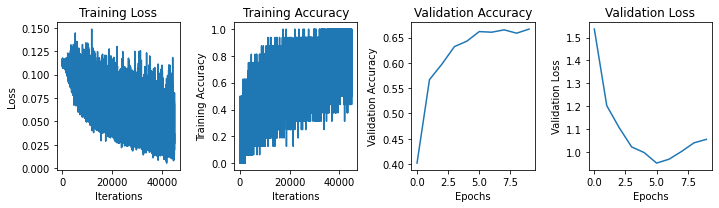

In [5]:
# resnet features extracted here
resnet50 = models.resnet50(pretrained=True).cuda()
num_ftrs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1000),
    nn.ReLU(True),
    nn.Dropout(0.4),
    nn.Linear(1000, 50),
    nn.ReLU(True),
    nn.Dropout(0.4),
    nn.Linear(50, 6)
)
resnet50.fc = resnet50.fc.cuda()
resnet50.cuda()

train.train(model=resnet50, batch_size=batch_size, train_loader=train_loader, val_loader=val_loader, num_epochs=10, lr=0.0001)

#### Combined Test Accuracy

In [6]:
train.get_accuracy(resnet50, test_loader)

0.6488257782632442

#### FER test set

In [7]:
#load tensors
fer_path = '../ProcessedData/FER/'
fer_test_dataset = torchvision.datasets.DatasetFolder(fer_path + 'test', loader=torch.load, extensions=('.tensor'))
print(fer_test_dataset)
fer_test_loader = torch.utils.data.DataLoader(fer_test_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)
train.get_accuracy(resnet50, fer_test_loader)

Dataset DatasetFolder
    Number of datapoints: 5304
    Root location: ../ProcessedData/FER/test


0.7999622926093515